In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74218, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74217, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831         0.96595    17   
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831         0.96611    17   
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614         0.96623    17   
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624         0.96689    17   
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813         0.96708    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00186   0.967140  0.00234    0.967260  
2020-01-01 17:15:00    2     1   0.00225   0.966810  0.00300    0.966942  
2020-01-01 17:30:00    2     1  -0.00092   0.965630  0.00102    0.965640  
2020-01-01 17:45:00    2     1  -0.00013   0.966170  0.00014    0.966167  
2020-01-01 18:00:00    2     1   0.00124   0.967455  0.00135    0.967483

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831         0.96595    17   
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831         0.96611    17   
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614         0.96623    17   
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624         0.96689    17   
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813         0.96708    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00186   0.967140  0.00234    0.967260   
2020-01-01 17:15:00    2     1   0.00225   0.966810  0.00300    0.966942   
2020-01-01 17:30:00    2     1  -0.00092   0.965630  0.00102    0.965640   
2020-01-01 17:45:00    2     1  -0.00013   0.966170  0.00014    0.966167   
2020-01-01 18:00:00    2     1   0.00124   0.967455  0.00135    0.967483   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.515009  
2020-01-01 17:15:00 -25.514841  
2020-01-01 17:30:00 -25.514833  
2020-01-01 17:45:00 -25.514837  
2020-01-01 18:00:00 -25.515291

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96597  0.96831         0.96595    17    2   
2020-01-01 17:15:00  0.96820  0.96531  0.96831         0.96611    17    2   
2020-01-01 17:30:00  0.96519  0.96512  0.96614         0.96623    17    2   
2020-01-01 17:45:00  0.96610  0.96610  0.96624         0.96689    17    2   
2020-01-01 18:00:00  0.96813  0.96678  0.96813         0.96708    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00186   0.967140  0.00234    0.967260 -25.515009  
2020-01-01 17:15:00     1   0.00225   0.966810  0.00300    0.966942 -25.514841  
2020-01-01 17:30:00     1  -0.00092   0.965630  0.00102    0.965640 -25.514833  
2020-01-01 17:45:00     1  -0.00013   0.966170  0.00014

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44530
44530
14843
14843
14844
14844


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44530, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44505, 24, 12)
(14818, 24, 12)
(14819, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44505, 1)
(14818, 1)
(14819, 1)


array([[0.81508493],
       [0.8169284 ],
       [0.81763124],
       ...,
       [0.41935205],
       [0.42181063],
       [0.42163515]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.81508493, 0.8169284 , 0.81763124, ..., 0.41935205, 0.42181063,
       0.42163515], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 350.0013 - mae: 2.6189 - mse: 350.0013 - root_mean_squared_error: 18.7083 - mape: 9217.0723
Epoch 1: val_mse improved from inf to 0.06972, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 47s 110ms/step - loss: 349.3015 - mae: 2.6140 - mse: 349.3015 - root_mean_squared_error: 18.6896 - mape: 9198.8516 - val_loss: 0.0697 - val_mae: 0.2426 - val_mse: 0.0697 - val_root_mean_squared_error: 0.2640 - val_mape: 25863.9609
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.1960 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 9374.6631
Epoch 2: val_mse did not improve from 0.06972
348/348 [==============================] - 8s 22ms/step - loss: 0.0609 - mae: 0.1960 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 9374.6631 - val_loss: 0.0825 - val_mae: 0.2703 - val_mse: 0.0825 - val_root_mean_squared_error: 0.2872 - val_mape: 28541.4336
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0589 - mae: 0.1998 - mse: 0.0589 - root_mean_squared_error: 0.2427 - mape: 9571.7070
Epoch 3: val_mse did not improve from 0.06972
348/348 [==============================] - 7s 20ms/st

348/348 [==============================] - 34s 99ms/step - loss: 0.0396 - mae: 0.1669 - mse: 0.0396 - root_mean_squared_error: 0.1991 - mape: 9435.0576 - val_loss: 0.0618 - val_mae: 0.2333 - val_mse: 0.0618 - val_root_mean_squared_error: 0.2486 - val_mape: 26418.2012
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0242 - mae: 0.1270 - mse: 0.0242 - root_mean_squared_error: 0.1555 - mape: 8103.4712
Epoch 10: val_mse improved from 0.06182 to 0.04060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 36s 102ms/step - loss: 0.0242 - mae: 0.1269 - mse: 0.0242 - root_mean_squared_error: 0.1555 - mape: 8064.3452 - val_loss: 0.0406 - val_mae: 0.1848 - val_mse: 0.0406 - val_root_mean_squared_error: 0.2015 - val_mape: 23344.9805
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0122 - mae: 0.0860 - mse: 0.0122 - root_mean_squared_error: 0.1103 - mape: 7182.4028
Epoch 11: val_mse improved from 0.04060 to 0.02488, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0122 - mae: 0.0860 - mse: 0.0122 - root_mean_squared_error: 0.1103 - mape: 7168.1382 - val_loss: 0.0249 - val_mae: 0.1418 - val_mse: 0.0249 - val_root_mean_squared_error: 0.1577 - val_mape: 20028.6816
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0076 - mae: 0.0672 - mse: 0.0076 - root_mean_squared_error: 0.0874 - mape: 6054.5791
Epoch 12: val_mse improved from 0.02488 to 0.01729, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 99ms/step - loss: 0.0076 - mae: 0.0672 - mse: 0.0076 - root_mean_squared_error: 0.0874 - mape: 6042.5195 - val_loss: 0.0173 - val_mae: 0.1146 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1315 - val_mape: 17908.0449
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0590 - mse: 0.0058 - root_mean_squared_error: 0.0765 - mape: 6305.7622
Epoch 13: val_mse improved from 0.01729 to 0.01207, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 98ms/step - loss: 0.0058 - mae: 0.0590 - mse: 0.0058 - root_mean_squared_error: 0.0764 - mape: 6275.1406 - val_loss: 0.0121 - val_mae: 0.0924 - val_mse: 0.0121 - val_root_mean_squared_error: 0.1099 - val_mape: 16161.9102
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0504 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 5037.4312
Epoch 14: val_mse improved from 0.01207 to 0.00902, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 98ms/step - loss: 0.0043 - mae: 0.0504 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 5037.4312 - val_loss: 0.0090 - val_mae: 0.0779 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0950 - val_mape: 14869.2109
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0463 - mse: 0.0037 - root_mean_squared_error: 0.0607 - mape: 4892.5264
Epoch 15: val_mse improved from 0.00902 to 0.00717, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0037 - mae: 0.0463 - mse: 0.0037 - root_mean_squared_error: 0.0607 - mape: 4892.5264 - val_loss: 0.0072 - val_mae: 0.0695 - val_mse: 0.0072 - val_root_mean_squared_error: 0.0847 - val_mape: 13793.2637
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0416 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 4808.5825
Epoch 16: val_mse improved from 0.00717 to 0.00633, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 96ms/step - loss: 0.0030 - mae: 0.0416 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 4785.2227 - val_loss: 0.0063 - val_mae: 0.0674 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0796 - val_mape: 12955.0850
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0400 - mse: 0.0027 - root_mean_squared_error: 0.0524 - mape: 4377.2866
Epoch 17: val_mse improved from 0.00633 to 0.00463, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0027 - mae: 0.0400 - mse: 0.0027 - root_mean_squared_error: 0.0524 - mape: 4343.5093 - val_loss: 0.0046 - val_mae: 0.0527 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0681 - val_mape: 12262.7422
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0372 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 4092.5935
Epoch 18: val_mse improved from 0.00463 to 0.00392, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 99ms/step - loss: 0.0024 - mae: 0.0372 - mse: 0.0024 - root_mean_squared_error: 0.0490 - mape: 4072.7073 - val_loss: 0.0039 - val_mae: 0.0472 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0626 - val_mape: 11695.3584
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0353 - mse: 0.0022 - root_mean_squared_error: 0.0464 - mape: 3764.0271
Epoch 19: val_mse improved from 0.00392 to 0.00354, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0022 - mae: 0.0353 - mse: 0.0022 - root_mean_squared_error: 0.0464 - mape: 3756.5322 - val_loss: 0.0035 - val_mae: 0.0453 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 11278.6328
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0343 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 3735.7083
Epoch 20: val_mse improved from 0.00354 to 0.00293, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0020 - mae: 0.0343 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 3728.2520 - val_loss: 0.0029 - val_mae: 0.0395 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 10779.5723
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0323 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 3767.0615
Epoch 21: val_mse improved from 0.00293 to 0.00258, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0018 - mae: 0.0323 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 3759.5503 - val_loss: 0.0026 - val_mae: 0.0369 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0508 - val_mape: 10348.3281
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0306 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 3472.9128
Epoch 22: val_mse did not improve from 0.00258
348/348 [==============================] - 8s 24ms/step - loss: 0.0016 - mae: 0.0306 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 3456.0386 - val_loss: 0.0029 - val_mae: 0.0444 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 9856.5410
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 3332.8354
Epoch 23: val_mse improved from 0.00258 to 0.00191, saving model to /content/drive/MyDrive/modelweights

348/348 [==============================] - 33s 95ms/step - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 3307.1030 - val_loss: 0.0019 - val_mae: 0.0310 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 9522.7764
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 3078.7490
Epoch 24: val_mse improved from 0.00191 to 0.00175, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 96ms/step - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 3078.7490 - val_loss: 0.0017 - val_mae: 0.0306 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 9117.4414
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0347 - mape: 3055.0840
Epoch 25: val_mse improved from 0.00175 to 0.00147, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0347 - mape: 3055.0840 - val_loss: 0.0015 - val_mae: 0.0270 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 8791.9766
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0243 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3015.3018
Epoch 26: val_mse improved from 0.00147 to 0.00137, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 35s 100ms/step - loss: 0.0010 - mae: 0.0243 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 3015.3018 - val_loss: 0.0014 - val_mae: 0.0274 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 8402.6855
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 8.5796e-04 - mae: 0.0223 - mse: 8.5796e-04 - root_mean_squared_error: 0.0293 - mape: 2906.8020
Epoch 27: val_mse improved from 0.00137 to 0.00109, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 8.5688e-04 - mae: 0.0223 - mse: 8.5688e-04 - root_mean_squared_error: 0.0293 - mape: 2892.6665 - val_loss: 0.0011 - val_mae: 0.0226 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 8018.8931
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 7.3271e-04 - mae: 0.0206 - mse: 7.3271e-04 - root_mean_squared_error: 0.0271 - mape: 2461.3584
Epoch 28: val_mse improved from 0.00109 to 0.00103, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 7.3271e-04 - mae: 0.0206 - mse: 7.3271e-04 - root_mean_squared_error: 0.0271 - mape: 2461.3584 - val_loss: 0.0010 - val_mae: 0.0230 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 7759.0312
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 7.5312e-04 - mae: 0.0211 - mse: 7.5312e-04 - root_mean_squared_error: 0.0274 - mape: 2669.7612
Epoch 29: val_mse improved from 0.00103 to 0.00098, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 7.5280e-04 - mae: 0.0211 - mse: 7.5280e-04 - root_mean_squared_error: 0.0274 - mape: 2664.4321 - val_loss: 9.7739e-04 - val_mae: 0.0229 - val_mse: 9.7739e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 7486.0908
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 6.7800e-04 - mae: 0.0200 - mse: 6.7800e-04 - root_mean_squared_error: 0.0260 - mape: 2471.4951
Epoch 30: val_mse improved from 0.00098 to 0.00091, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 35s 100ms/step - loss: 6.7743e-04 - mae: 0.0200 - mse: 6.7743e-04 - root_mean_squared_error: 0.0260 - mape: 2466.5657 - val_loss: 9.0868e-04 - val_mae: 0.0225 - val_mse: 9.0868e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 7251.2383
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 5.7916e-04 - mae: 0.0184 - mse: 5.7916e-04 - root_mean_squared_error: 0.0241 - mape: 2432.4351
Epoch 31: val_mse did not improve from 0.00091
348/348 [==============================] - 7s 20ms/step - loss: 5.7916e-04 - mae: 0.0184 - mse: 5.7916e-04 - root_mean_squared_error: 0.0241 - mape: 2432.4351 - val_loss: 0.0010 - val_mae: 0.0259 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0319 - val_mape: 7010.0835
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 5.1445e-04 - mae: 0.0174 - mse: 5.1445e-04 - root_mean_squared_error: 0.0227 - mape: 2401.5591
Epoch 32: val_mse improved from 0.00091 to 0.00087, saving mode

348/348 [==============================] - 34s 96ms/step - loss: 5.1444e-04 - mae: 0.0174 - mse: 5.1444e-04 - root_mean_squared_error: 0.0227 - mape: 2389.8828 - val_loss: 8.6634e-04 - val_mae: 0.0222 - val_mse: 8.6634e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 6891.8447
Epoch 33/75
346/348 [============================>.] - ETA: 0s - loss: 4.6325e-04 - mae: 0.0165 - mse: 4.6325e-04 - root_mean_squared_error: 0.0215 - mape: 2329.0007
Epoch 33: val_mse improved from 0.00087 to 0.00080, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 4.6320e-04 - mae: 0.0165 - mse: 4.6320e-04 - root_mean_squared_error: 0.0215 - mape: 2317.6775 - val_loss: 8.0018e-04 - val_mae: 0.0215 - val_mse: 8.0018e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 6715.2803
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 4.1565e-04 - mae: 0.0156 - mse: 4.1565e-04 - root_mean_squared_error: 0.0204 - mape: 2190.9536
Epoch 34: val_mse did not improve from 0.00080
348/348 [==============================] - 7s 20ms/step - loss: 4.1555e-04 - mae: 0.0156 - mse: 4.1555e-04 - root_mean_squared_error: 0.0204 - mape: 2186.5823 - val_loss: 0.0010 - val_mae: 0.0259 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 6498.2739
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 4.0347e-04 - mae: 0.0154 - mse: 4.0347e-04 - root_mean_squared_error: 0.0201 - mape: 2150.1323
Epoch 35: val_mse improved from 0.00080 to 0.00052, saving model

348/348 [==============================] - 33s 95ms/step - loss: 4.0352e-04 - mae: 0.0154 - mse: 4.0352e-04 - root_mean_squared_error: 0.0201 - mape: 2145.8438 - val_loss: 5.2414e-04 - val_mae: 0.0159 - val_mse: 5.2414e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 6166.0581
Epoch 36/75
345/348 [============================>.] - ETA: 0s - loss: 3.6107e-04 - mae: 0.0145 - mse: 3.6107e-04 - root_mean_squared_error: 0.0190 - mape: 2100.8535
Epoch 36: val_mse did not improve from 0.00052
348/348 [==============================] - 8s 23ms/step - loss: 3.6110e-04 - mae: 0.0145 - mse: 3.6110e-04 - root_mean_squared_error: 0.0190 - mape: 2084.6128 - val_loss: 5.3286e-04 - val_mae: 0.0171 - val_mse: 5.3286e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 5965.6787
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 3.4204e-04 - mae: 0.0142 - mse: 3.4204e-04 - root_mean_squared_error: 0.0185 - mape: 1981.6508
Epoch 37: val_mse did not improve from 0.00052
348/348 [

348/348 [==============================] - 33s 96ms/step - loss: 3.1127e-04 - mae: 0.0136 - mse: 3.1127e-04 - root_mean_squared_error: 0.0176 - mape: 2004.2216 - val_loss: 4.7593e-04 - val_mae: 0.0171 - val_mse: 4.7593e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 5596.6855
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 3.2771e-04 - mae: 0.0139 - mse: 3.2771e-04 - root_mean_squared_error: 0.0181 - mape: 1870.6315
Epoch 39: val_mse improved from 0.00048 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 3.2797e-04 - mae: 0.0139 - mse: 3.2797e-04 - root_mean_squared_error: 0.0181 - mape: 1856.1792 - val_loss: 4.5301e-04 - val_mae: 0.0155 - val_mse: 4.5301e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5365.5542
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 2.4995e-04 - mae: 0.0120 - mse: 2.4995e-04 - root_mean_squared_error: 0.0158 - mape: 1807.4973
Epoch 40: val_mse did not improve from 0.00045
348/348 [==============================] - 7s 19ms/step - loss: 2.4989e-04 - mae: 0.0120 - mse: 2.4989e-04 - root_mean_squared_error: 0.0158 - mape: 1803.8894 - val_loss: 6.1804e-04 - val_mae: 0.0214 - val_mse: 6.1804e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 5148.2534
Epoch 41/75
348/348 [==============================] - ETA: 0s - loss: 3.0281e-04 - mae: 0.0134 - mse: 3.0281e-04 - root_mean_squared_error: 0.0174 - mape: 1733.2314
Epoch 41: val_mse did not improve from 0.00045
348/348 [

348/348 [==============================] - 34s 97ms/step - loss: 1.8131e-04 - mae: 0.0103 - mse: 1.8131e-04 - root_mean_squared_error: 0.0135 - mape: 1412.6580 - val_loss: 3.5822e-04 - val_mae: 0.0151 - val_mse: 3.5822e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 4161.7466
Epoch 46/75
345/348 [============================>.] - ETA: 0s - loss: 1.6657e-04 - mae: 0.0099 - mse: 1.6657e-04 - root_mean_squared_error: 0.0129 - mape: 1386.7551
Epoch 46: val_mse did not improve from 0.00036
348/348 [==============================] - 7s 19ms/step - loss: 1.6595e-04 - mae: 0.0099 - mse: 1.6595e-04 - root_mean_squared_error: 0.0129 - mape: 1376.0237 - val_loss: 5.9746e-04 - val_mae: 0.0222 - val_mse: 5.9746e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 4001.1760
Epoch 47/75
346/348 [============================>.] - ETA: 0s - loss: 1.8139e-04 - mae: 0.0103 - mse: 1.8139e-04 - root_mean_squared_error: 0.0135 - mape: 1328.2161
Epoch 47: val_mse improved from 0.00036 to 0.00034, savi

348/348 [==============================] - 33s 94ms/step - loss: 1.8201e-04 - mae: 0.0103 - mse: 1.8201e-04 - root_mean_squared_error: 0.0135 - mape: 1321.7772 - val_loss: 3.4341e-04 - val_mae: 0.0155 - val_mse: 3.4341e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3848.1890
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 1.4806e-04 - mae: 0.0093 - mse: 1.4806e-04 - root_mean_squared_error: 0.0122 - mape: 1263.2023
Epoch 48: val_mse did not improve from 0.00034
348/348 [==============================] - 7s 19ms/step - loss: 1.4780e-04 - mae: 0.0093 - mse: 1.4780e-04 - root_mean_squared_error: 0.0122 - mape: 1257.0570 - val_loss: 6.1211e-04 - val_mae: 0.0222 - val_mse: 6.1211e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 3725.9287
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 1.4585e-04 - mae: 0.0093 - mse: 1.4585e-04 - root_mean_squared_error: 0.0121 - mape: 1258.3839
Epoch 49: val_mse did not improve from 0.00034
348/348 [

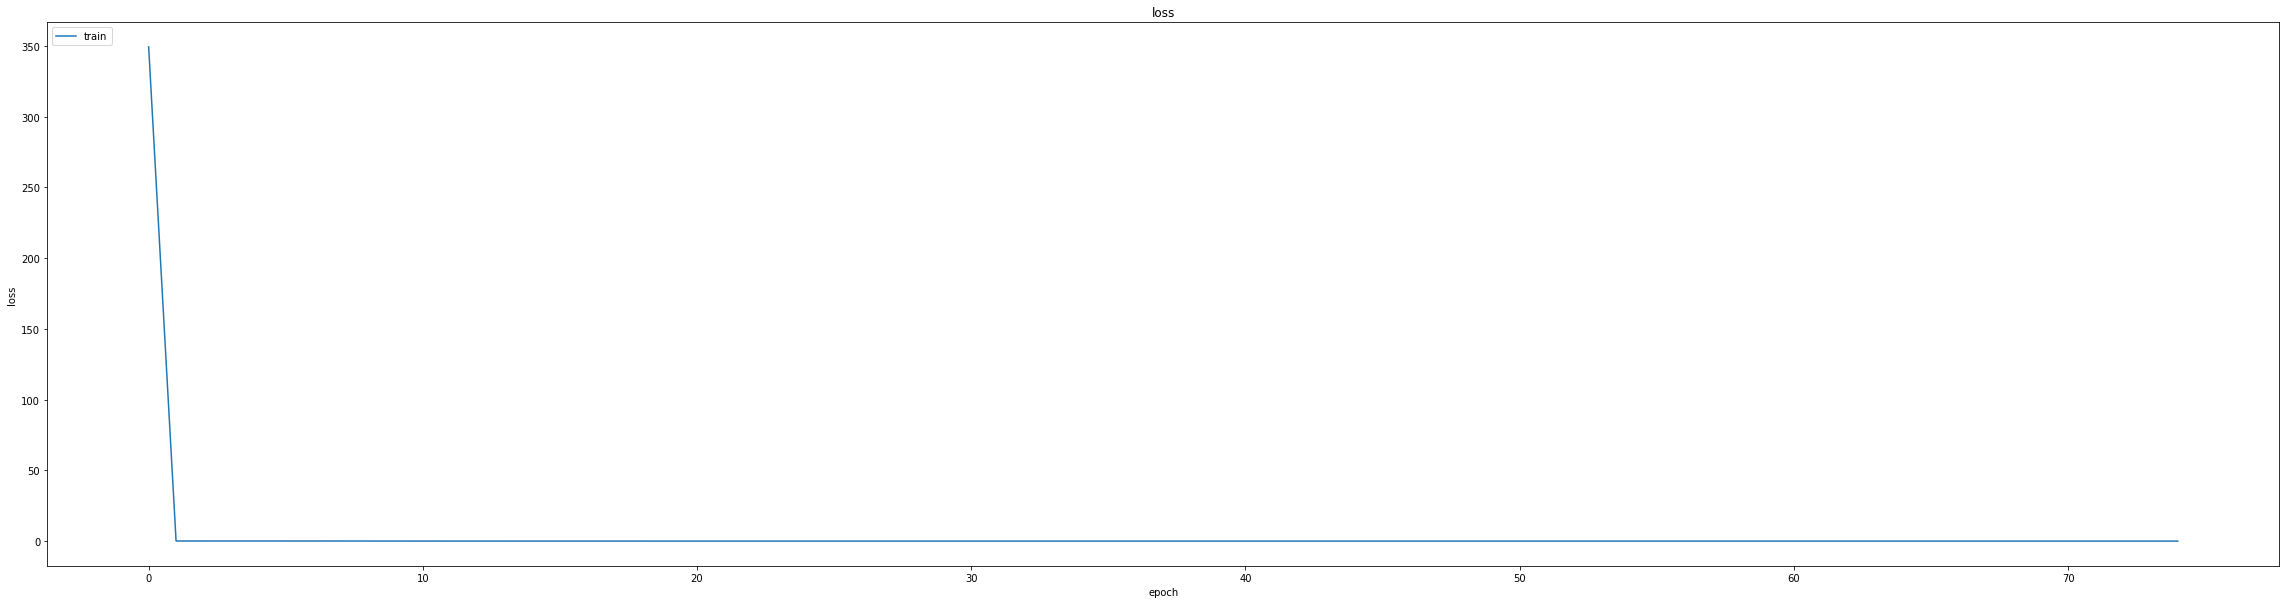

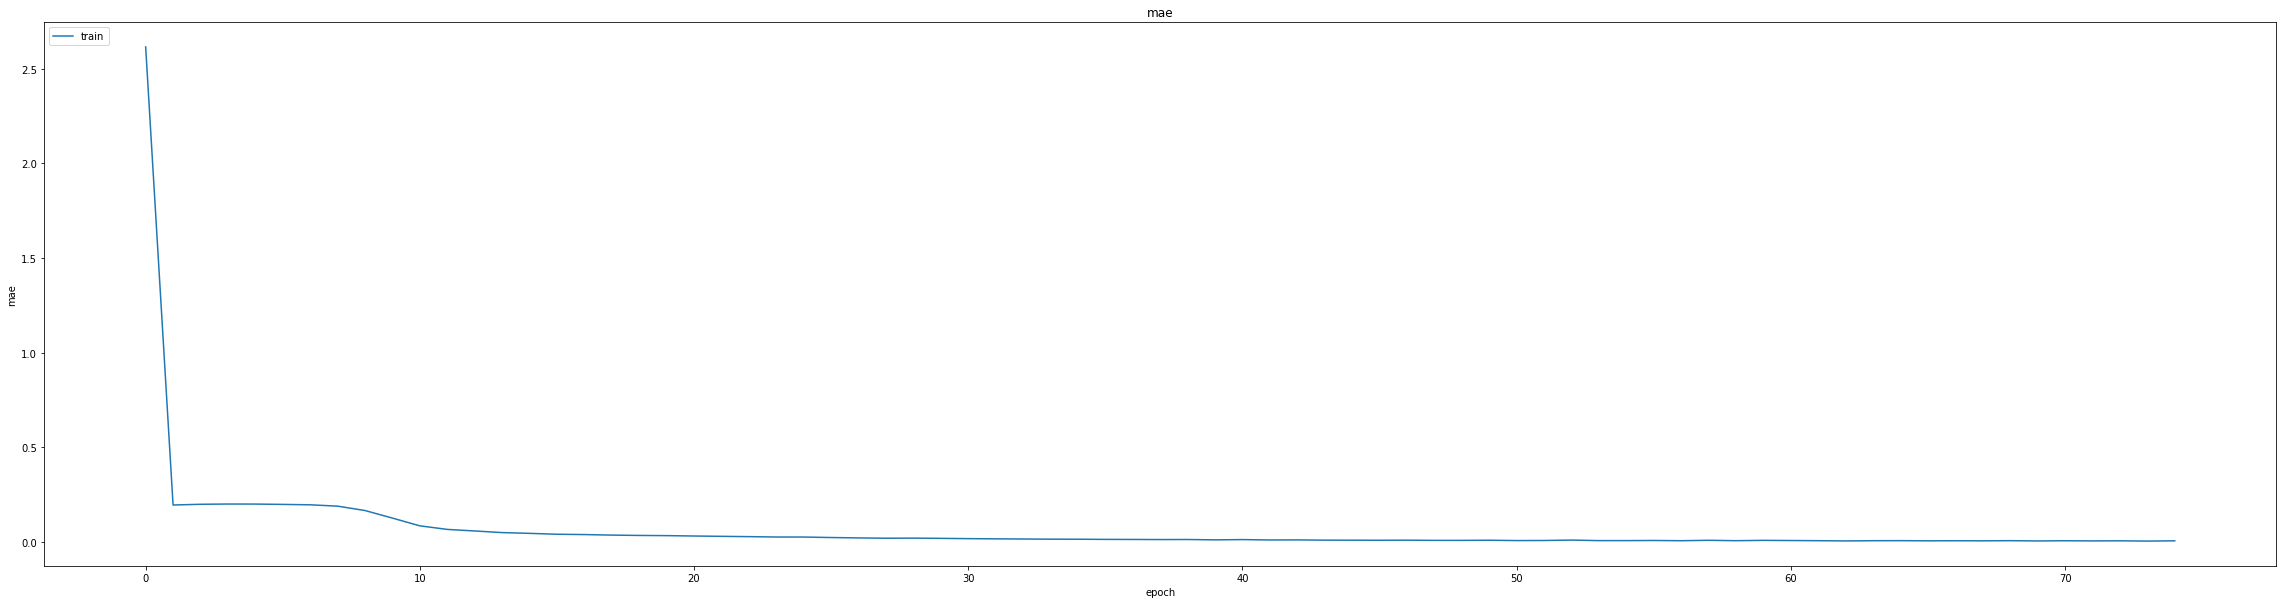

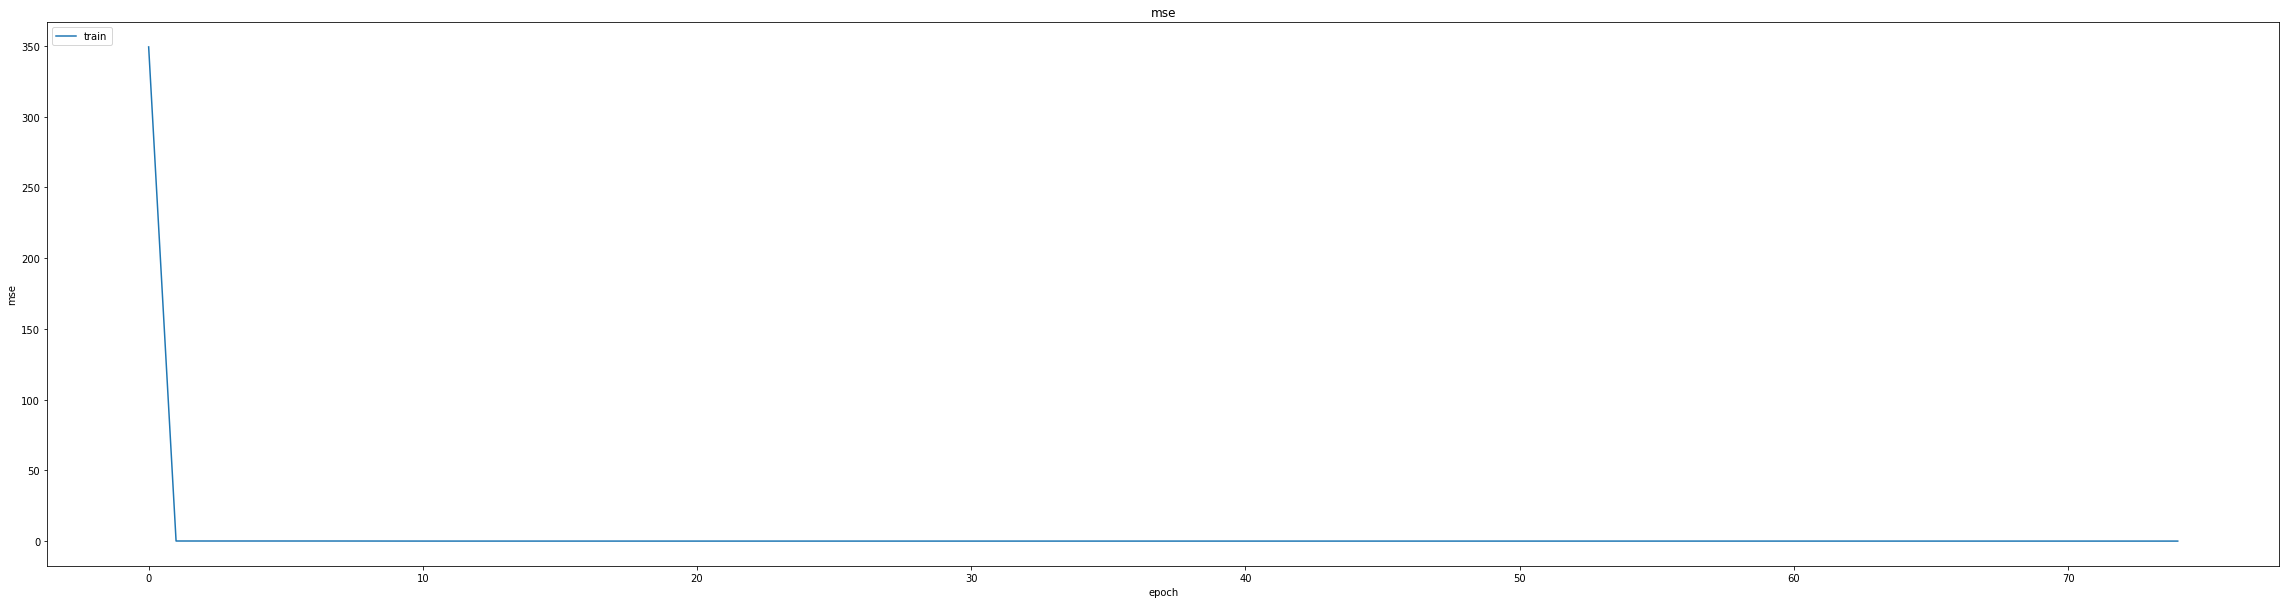

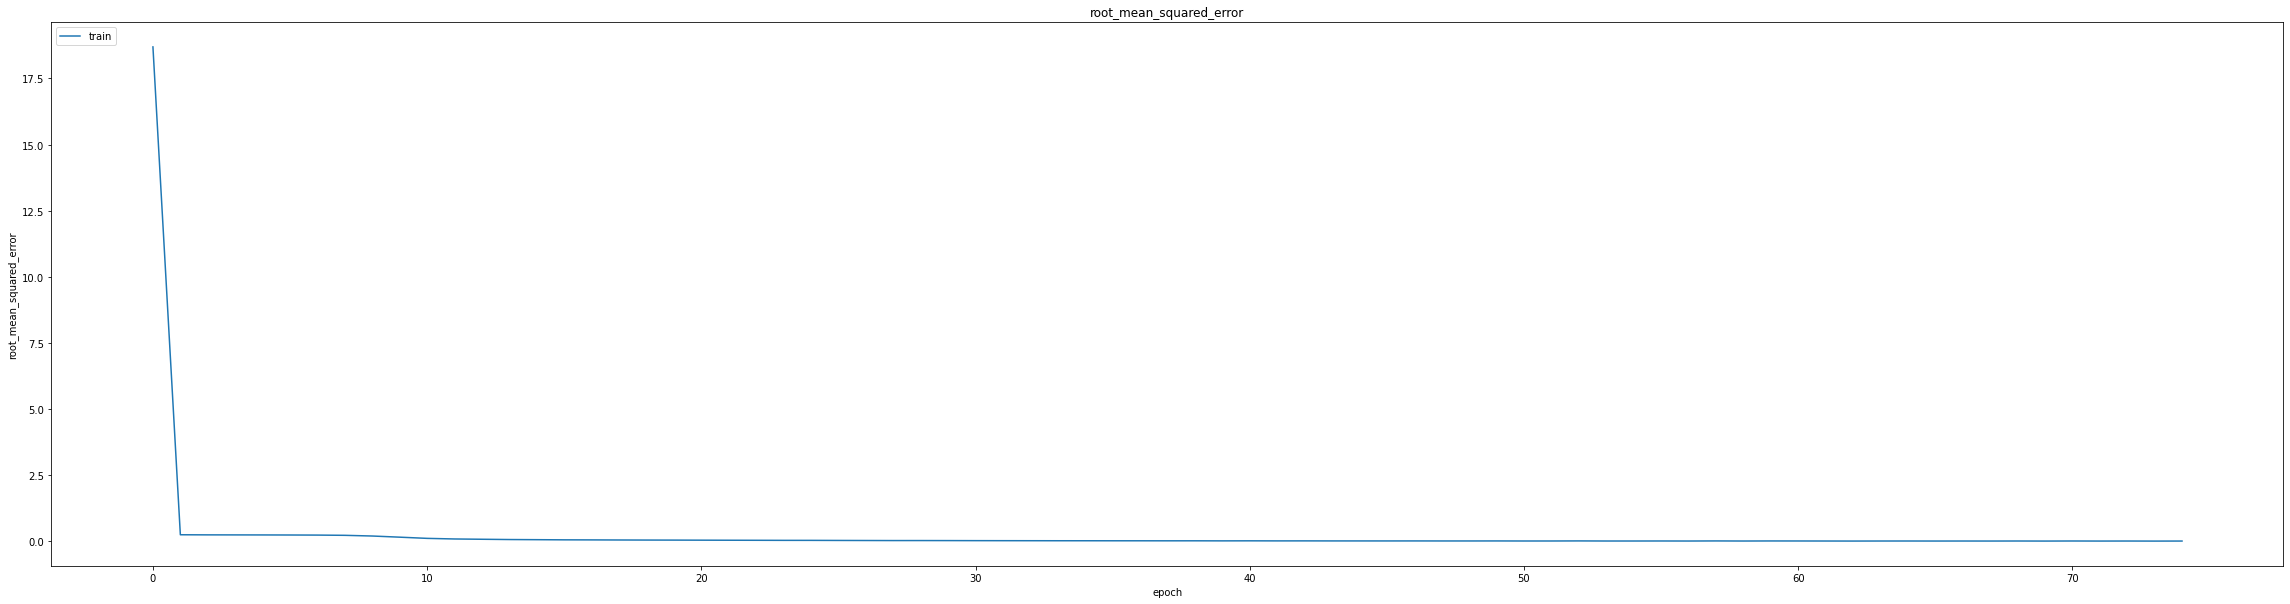

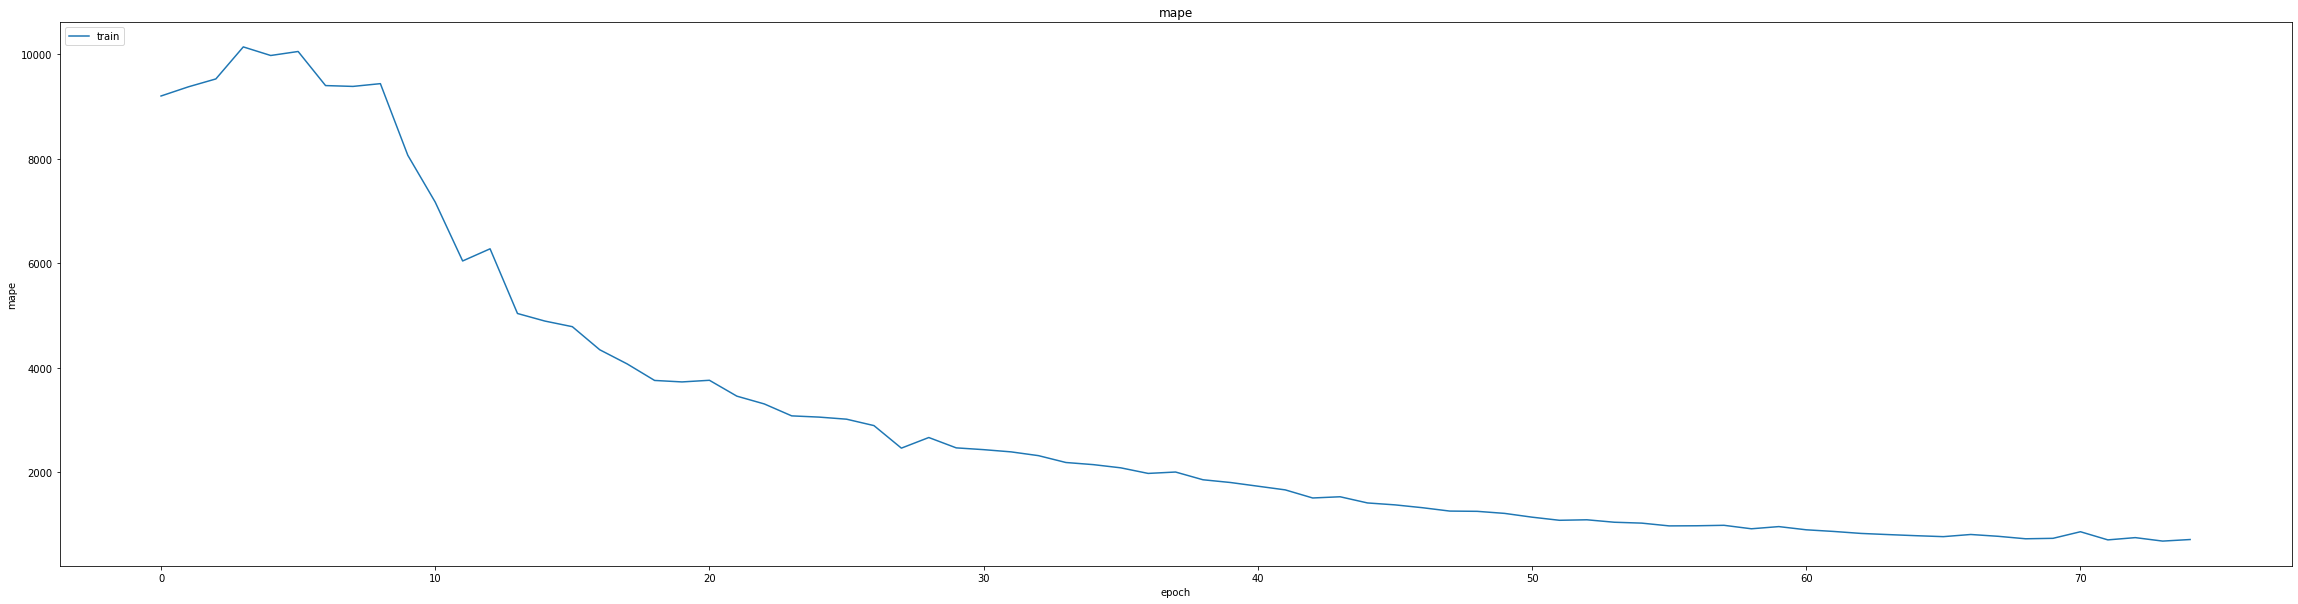

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015069489367306232
0.01853129081428051
464/464 [==============================] - 4s 6ms/step
0.9860997132451573


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 0.0073 - mae: 0.0381 - mse: 0.0073 - root_mean_squared_error: 0.0855 - mape: 1872.5481
Epoch 1: val_mse did not improve from 0.00034
348/348 [==============================] - 15s 25ms/step - loss: 0.0073 - mae: 0.0381 - mse: 0.0073 - root_mean_squared_error: 0.0854 - mape: 1868.8093 - val_loss: 9.8369e-04 - val_mae: 0.0293 - val_mse: 9.8369e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 5593.4463 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 2.1402e-04 - mae: 0.0110 - mse: 2.1402e-04 - root_mean_squared_error: 0.0146 - mape: 1692.5367
Epoch 2: val_mse did not improve from 0.00034
348/348 [==============================] - 7s 20ms/step - loss: 2.1383e-04 - mae: 0.0110 - mse: 2.1383e-04 - root_mean_squared_error: 0.0146 - mape: 1689.1575 - val_loss: 3.7946e-04 - val_mae: 0.0163 - val_mse: 3.7946e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 4634.4492 - lr: 0.0010
lr 

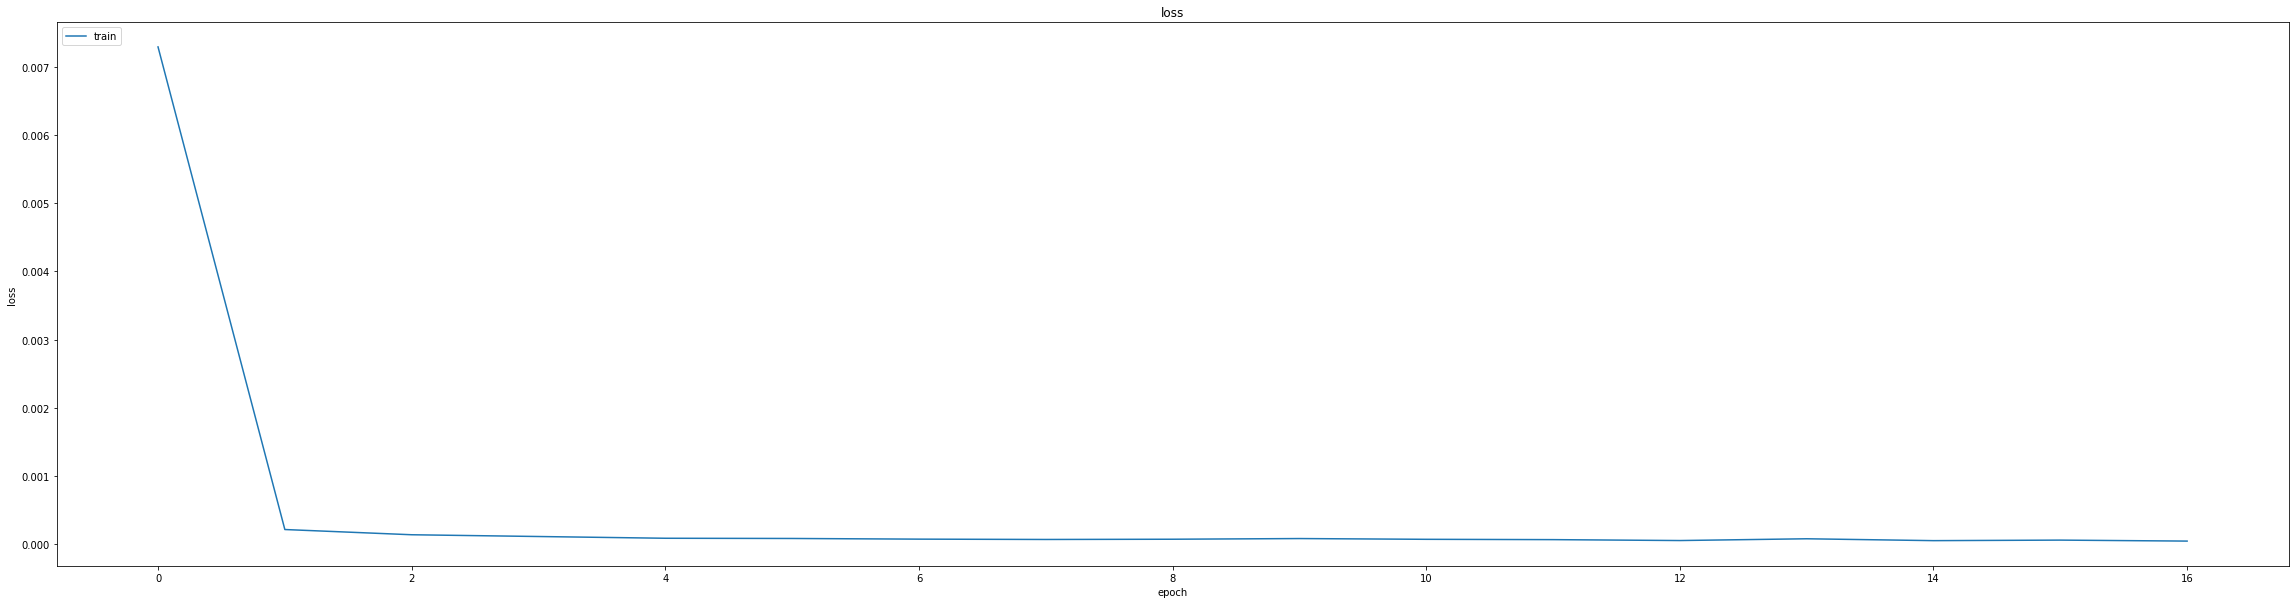

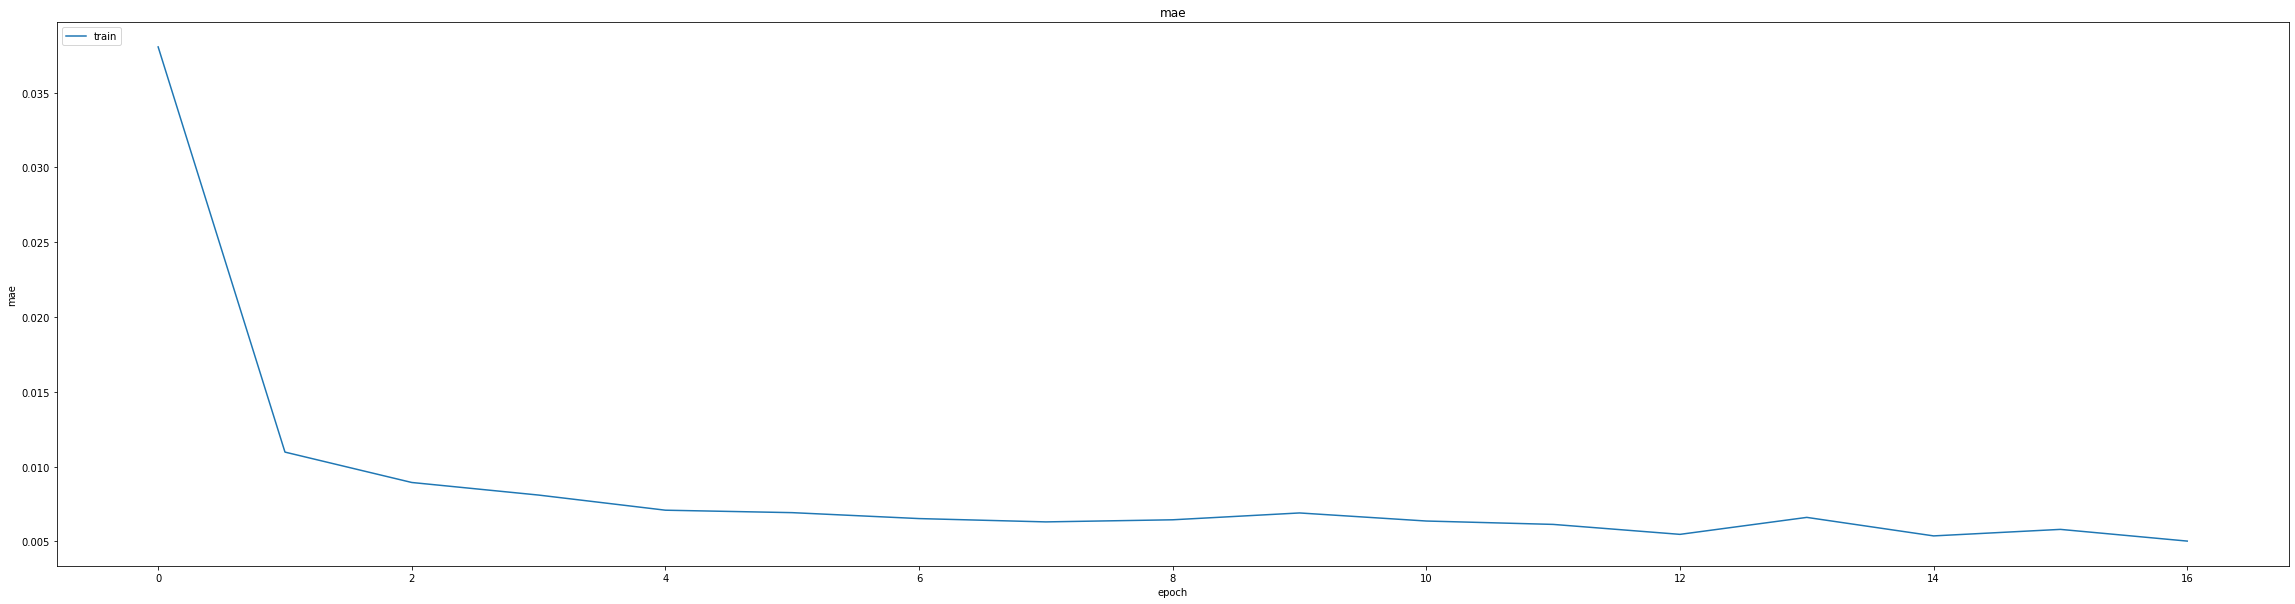

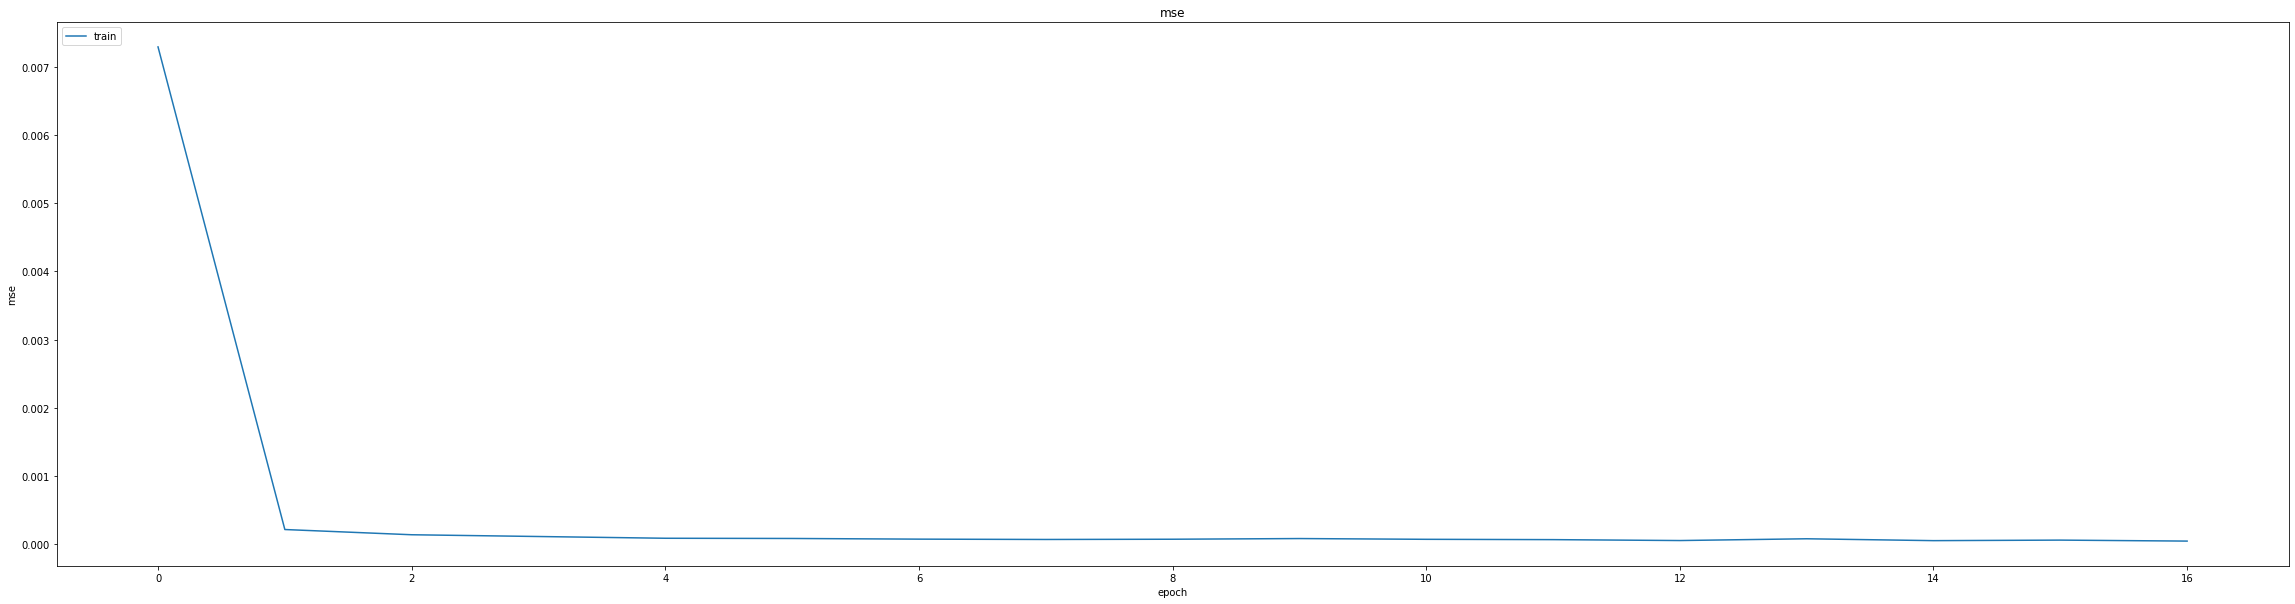

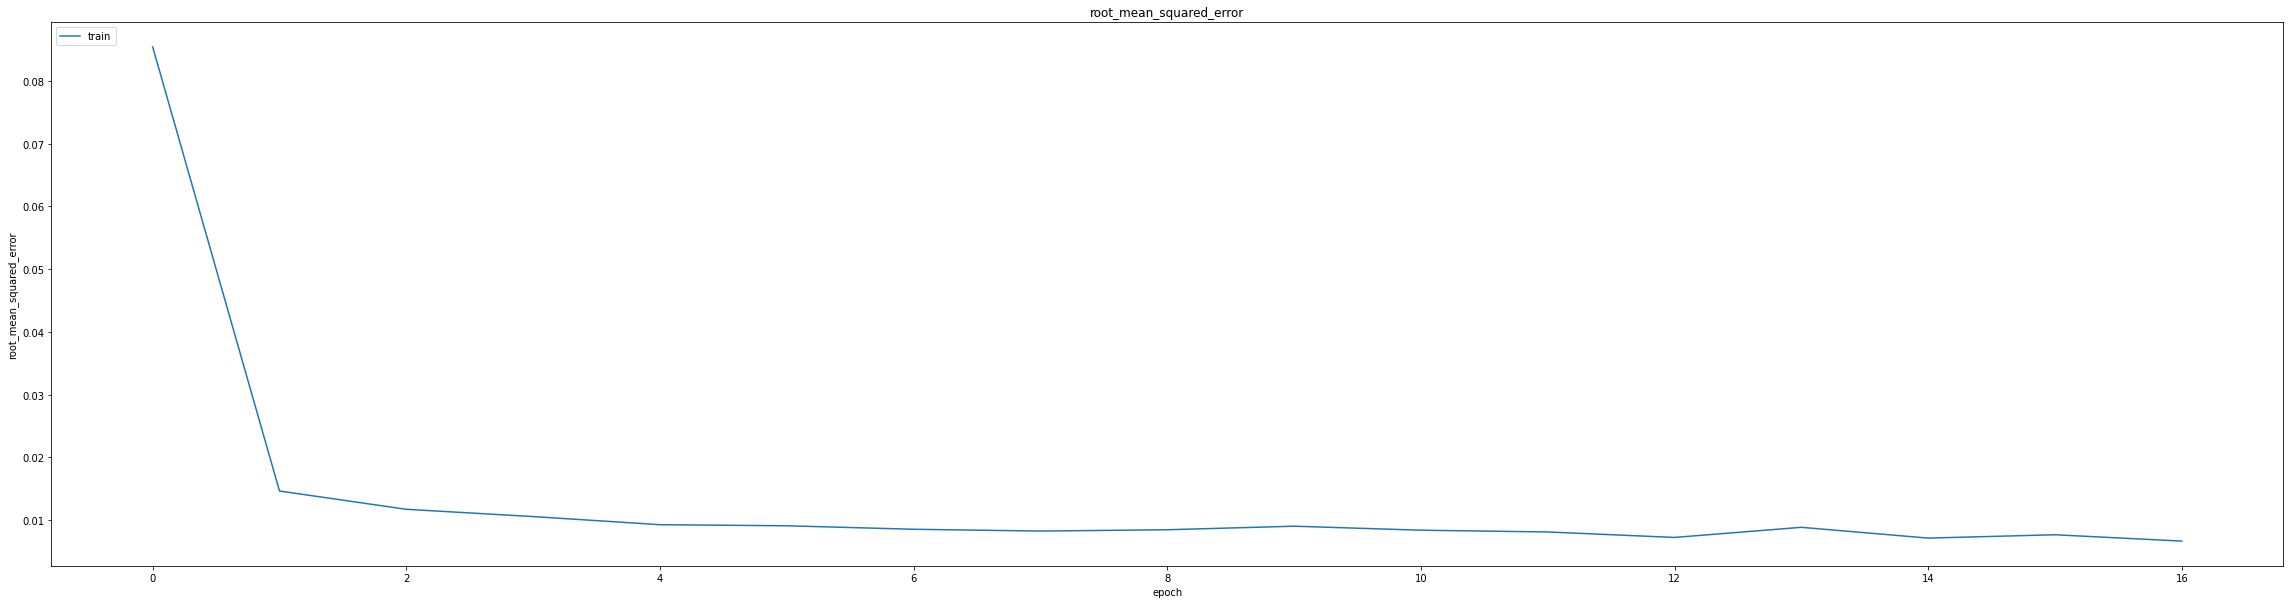

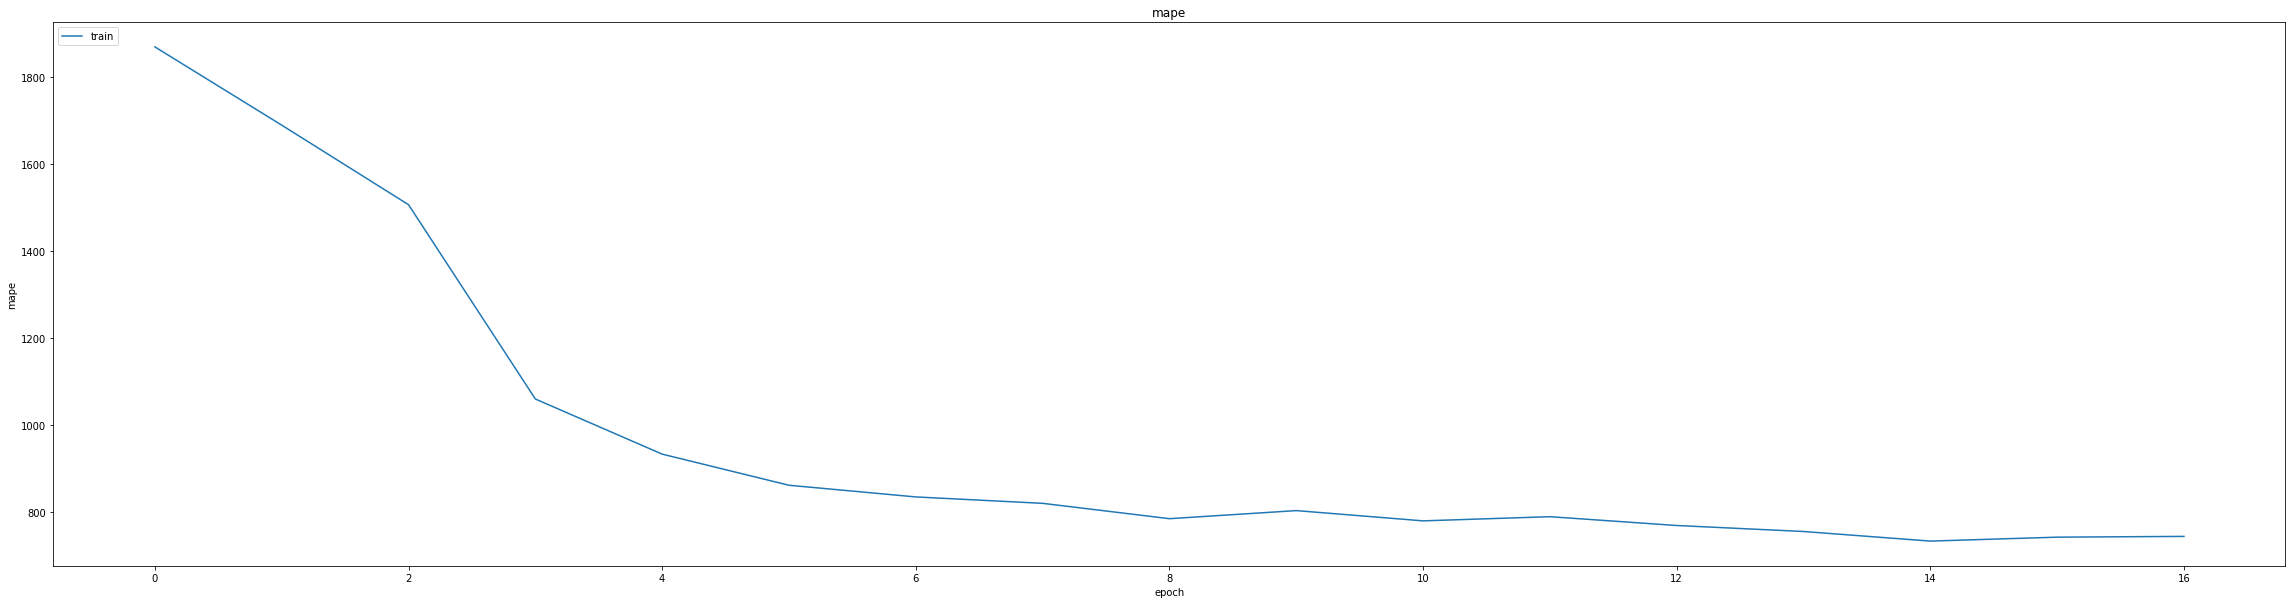

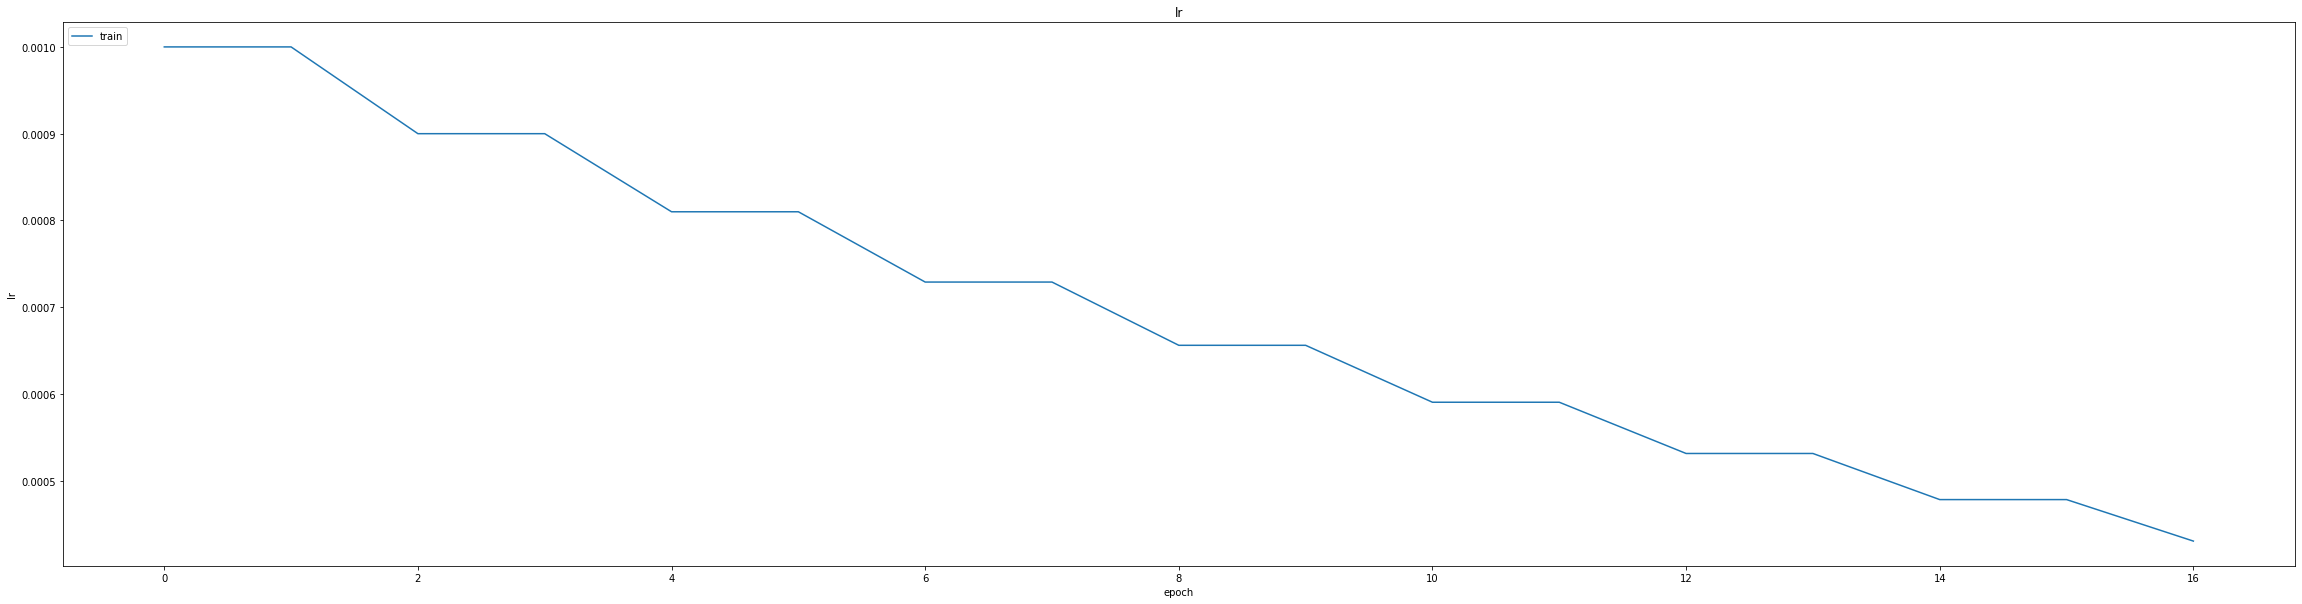

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016329091042280197
0.019479820504784584
464/464 [==============================] - 5s 6ms/step
0.9806601766271031


464/464 [==============================] - 3s 6ms/step


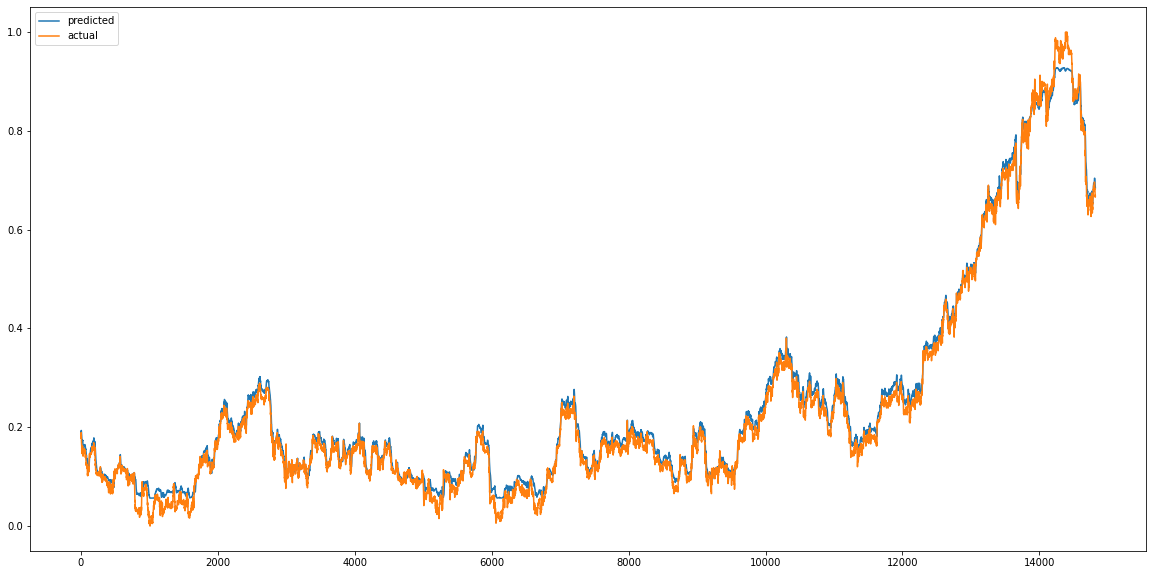

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


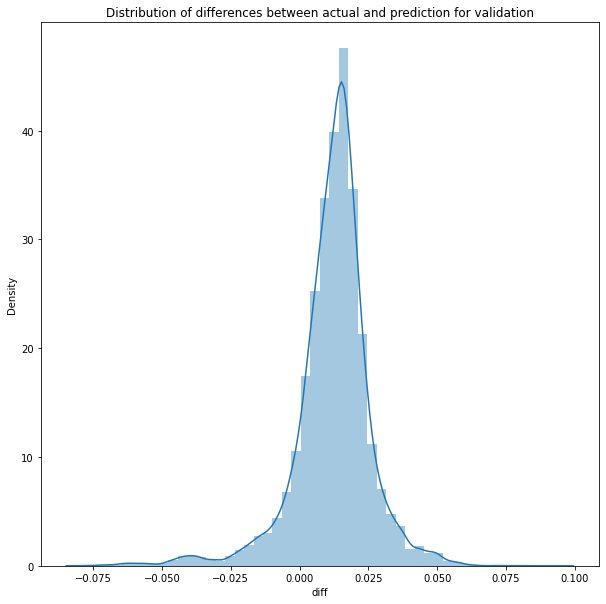

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 7ms/step


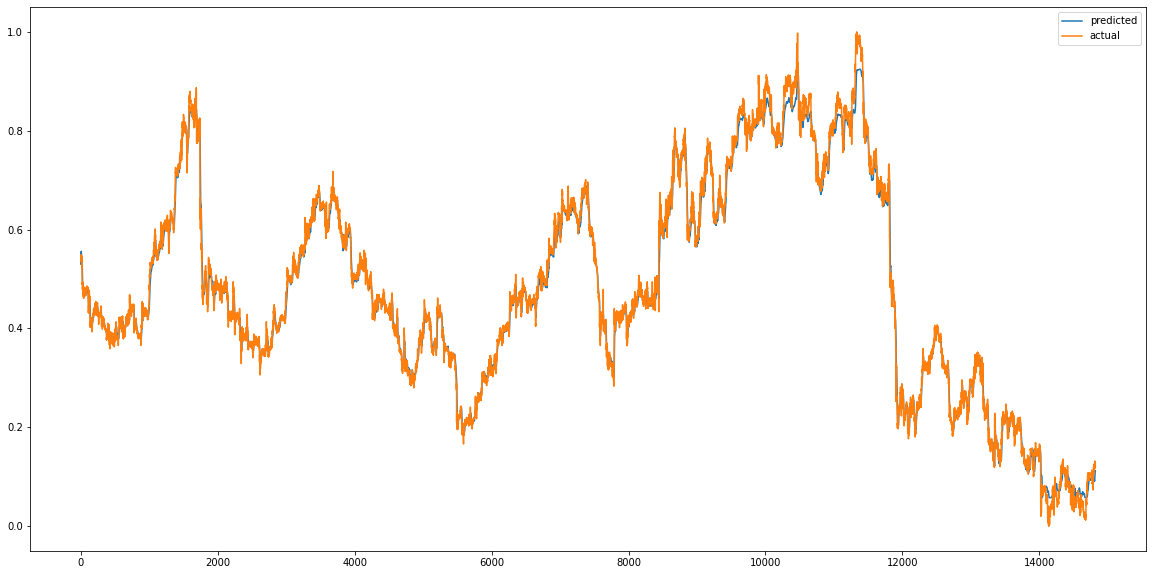

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


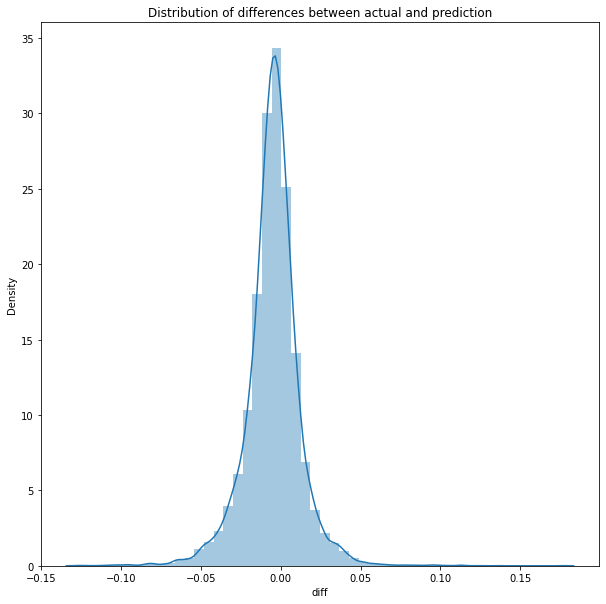

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00032057780262399743
RMSE :  0.017904686610605545
MAE :  0.012517975871410035
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9933974519879356


count    14819.000000
mean        -0.004994
std          0.017195
min         -0.126781
25%         -0.012711
50%         -0.004445
75%          0.003497
max          0.175845
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 534.8703 - mae: 5.2867 - mse: 534.8703 - root_mean_squared_error: 23.1273 - mape: 42334.1484
Epoch 1: val_mse improved from inf to 0.97087, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 24s 58ms/step - loss: 534.8703 - mae: 5.2867 - mse: 534.8703 - root_mean_squared_error: 23.1273 - mape: 42334.1484 - val_loss: 0.9709 - val_mae: 0.9598 - val_mse: 0.9709 - val_root_mean_squared_error: 0.9853 - val_mape: 81767.7891
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.3746 - mae: 0.5524 - mse: 0.3746 - root_mean_squared_error: 0.6121 - mape: 24146.7227
Epoch 2: val_mse improved from 0.97087 to 0.40161, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.3734 - mae: 0.5512 - mse: 0.3734 - root_mean_squared_error: 0.6111 - mape: 23961.1445 - val_loss: 0.4016 - val_mae: 0.6009 - val_mse: 0.4016 - val_root_mean_squared_error: 0.6337 - val_mape: 56701.2852
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.1523 - mae: 0.3388 - mse: 0.1523 - root_mean_squared_error: 0.3902 - mape: 16259.1924
Epoch 3: val_mse improved from 0.40161 to 0.23323, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.1521 - mae: 0.3386 - mse: 0.1521 - root_mean_squared_error: 0.3900 - mape: 16180.7227 - val_loss: 0.2332 - val_mae: 0.4581 - val_mse: 0.2332 - val_root_mean_squared_error: 0.4829 - val_mape: 45436.2305
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0909 - mae: 0.2694 - mse: 0.0909 - root_mean_squared_error: 0.3015 - mape: 14216.4521
Epoch 4: val_mse improved from 0.23323 to 0.16319, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0908 - mae: 0.2693 - mse: 0.0908 - root_mean_squared_error: 0.3014 - mape: 14107.1543 - val_loss: 0.1632 - val_mae: 0.3861 - val_mse: 0.1632 - val_root_mean_squared_error: 0.4040 - val_mape: 39183.5391
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0702 - mae: 0.2373 - mse: 0.0702 - root_mean_squared_error: 0.2649 - mape: 12879.8037
Epoch 5: val_mse improved from 0.16319 to 0.12922, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0702 - mae: 0.2373 - mse: 0.0702 - root_mean_squared_error: 0.2649 - mape: 12817.5498 - val_loss: 0.1292 - val_mae: 0.3440 - val_mse: 0.1292 - val_root_mean_squared_error: 0.3595 - val_mape: 35435.6758
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0629 - mae: 0.2214 - mse: 0.0629 - root_mean_squared_error: 0.2508 - mape: 11714.3184
Epoch 6: val_mse improved from 0.12922 to 0.11151, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0629 - mae: 0.2214 - mse: 0.0629 - root_mean_squared_error: 0.2508 - mape: 11691.0498 - val_loss: 0.1115 - val_mae: 0.3190 - val_mse: 0.1115 - val_root_mean_squared_error: 0.3339 - val_mape: 33155.4922
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0603 - mae: 0.2125 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 10856.5156
Epoch 7: val_mse improved from 0.11151 to 0.10172, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0603 - mae: 0.2125 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 10856.5156 - val_loss: 0.1017 - val_mae: 0.3039 - val_mse: 0.1017 - val_root_mean_squared_error: 0.3189 - val_mape: 31755.2129
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.2075 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 11140.2041
Epoch 8: val_mse improved from 0.10172 to 0.09672, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0595 - mae: 0.2076 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 11086.4023 - val_loss: 0.0967 - val_mae: 0.2957 - val_mse: 0.0967 - val_root_mean_squared_error: 0.3110 - val_mape: 30988.6367
Epoch 9/75
345/348 [============================>.] - ETA: 0s - loss: 0.0593 - mae: 0.2054 - mse: 0.0593 - root_mean_squared_error: 0.2436 - mape: 10374.0967
Epoch 9: val_mse improved from 0.09672 to 0.09396, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0593 - mae: 0.2054 - mse: 0.0593 - root_mean_squared_error: 0.2435 - mape: 10294.3877 - val_loss: 0.0940 - val_mae: 0.2911 - val_mse: 0.0940 - val_root_mean_squared_error: 0.3065 - val_mape: 30547.5645
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0592 - mae: 0.2042 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 10191.9932
Epoch 10: val_mse improved from 0.09396 to 0.09266, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0592 - mae: 0.2042 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 10191.9932 - val_loss: 0.0927 - val_mae: 0.2888 - val_mse: 0.0927 - val_root_mean_squared_error: 0.3044 - val_mape: 30334.8926
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2036 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10478.6240
Epoch 11: val_mse improved from 0.09266 to 0.09218, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0592 - mae: 0.2036 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10398.3760 - val_loss: 0.0922 - val_mae: 0.2880 - val_mse: 0.0922 - val_root_mean_squared_error: 0.3036 - val_mape: 30257.9219
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0592 - mae: 0.2035 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10490.0615
Epoch 12: val_mse improved from 0.09218 to 0.09172, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0592 - mae: 0.2035 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10490.0615 - val_loss: 0.0917 - val_mae: 0.2872 - val_mse: 0.0917 - val_root_mean_squared_error: 0.3029 - val_mape: 30181.2969
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 0.0591 - mae: 0.2031 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10380.7959
Epoch 13: val_mse did not improve from 0.09172
348/348 [==============================] - 5s 14ms/step - loss: 0.0591 - mae: 0.2031 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10380.7959 - val_loss: 0.0923 - val_mae: 0.2882 - val_mse: 0.0923 - val_root_mean_squared_error: 0.3038 - val_mape: 30274.1543
Epoch 14/75
344/348 [============================>.] - ETA: 0s - loss: 0.0591 - mae: 0.2033 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10518.4434
Epoch 14: val_mse did not improve from 0.09172
348/348 [==============================] - 5s 14ms/

348/348 [==============================] - 16s 46ms/step - loss: 0.0543 - mae: 0.1965 - mse: 0.0543 - root_mean_squared_error: 0.2331 - mape: 10260.9629 - val_loss: 0.0680 - val_mae: 0.2437 - val_mse: 0.0680 - val_root_mean_squared_error: 0.2608 - val_mape: 27880.7852
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 0.0237 - mae: 0.1240 - mse: 0.0237 - root_mean_squared_error: 0.1540 - mape: 9324.4912
Epoch 18: val_mse improved from 0.06799 to 0.04693, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0237 - mae: 0.1240 - mse: 0.0237 - root_mean_squared_error: 0.1539 - mape: 9305.9414 - val_loss: 0.0469 - val_mae: 0.1988 - val_mse: 0.0469 - val_root_mean_squared_error: 0.2166 - val_mape: 25065.8984
Epoch 19/75
344/348 [============================>.] - ETA: 0s - loss: 0.0137 - mae: 0.0913 - mse: 0.0137 - root_mean_squared_error: 0.1171 - mape: 8222.3584
Epoch 19: val_mse improved from 0.04693 to 0.03193, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0137 - mae: 0.0912 - mse: 0.0137 - root_mean_squared_error: 0.1170 - mape: 8135.4736 - val_loss: 0.0319 - val_mae: 0.1613 - val_mse: 0.0319 - val_root_mean_squared_error: 0.1787 - val_mape: 22045.0840
Epoch 20/75
345/348 [============================>.] - ETA: 0s - loss: 0.0099 - mae: 0.0763 - mse: 0.0099 - root_mean_squared_error: 0.0994 - mape: 7061.2100
Epoch 20: val_mse improved from 0.03193 to 0.02241, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.0099 - mae: 0.0762 - mse: 0.0099 - root_mean_squared_error: 0.0993 - mape: 7006.7661 - val_loss: 0.0224 - val_mae: 0.1314 - val_mse: 0.0224 - val_root_mean_squared_error: 0.1497 - val_mape: 19813.5137
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0623 - mse: 0.0069 - root_mean_squared_error: 0.0829 - mape: 6472.4023
Epoch 21: val_mse improved from 0.02241 to 0.01610, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0069 - mae: 0.0623 - mse: 0.0069 - root_mean_squared_error: 0.0829 - mape: 6472.4023 - val_loss: 0.0161 - val_mae: 0.1083 - val_mse: 0.0161 - val_root_mean_squared_error: 0.1269 - val_mape: 17885.3594
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0518 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 5636.2656
Epoch 22: val_mse improved from 0.01610 to 0.01160, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0049 - mae: 0.0518 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 5636.2656 - val_loss: 0.0116 - val_mae: 0.0895 - val_mse: 0.0116 - val_root_mean_squared_error: 0.1077 - val_mape: 16164.2783
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0449 - mse: 0.0037 - root_mean_squared_error: 0.0604 - mape: 5478.5107
Epoch 23: val_mse improved from 0.01160 to 0.00838, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0036 - mae: 0.0449 - mse: 0.0036 - root_mean_squared_error: 0.0604 - mape: 5451.8926 - val_loss: 0.0084 - val_mae: 0.0767 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0916 - val_mape: 14652.4316
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0409 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 4786.3374
Epoch 24: val_mse improved from 0.00838 to 0.00620, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 21s 60ms/step - loss: 0.0030 - mae: 0.0410 - mse: 0.0030 - root_mean_squared_error: 0.0545 - mape: 4763.0952 - val_loss: 0.0062 - val_mae: 0.0638 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 13453.2441
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0371 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 4335.4331
Epoch 25: val_mse improved from 0.00620 to 0.00477, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0024 - mae: 0.0371 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 4314.3696 - val_loss: 0.0048 - val_mae: 0.0547 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0691 - val_mape: 12428.9082
Epoch 26/75
344/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0345 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 4096.9780
Epoch 26: val_mse improved from 0.00477 to 0.00375, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0021 - mae: 0.0345 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 4053.6296 - val_loss: 0.0037 - val_mae: 0.0475 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 11571.4658
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0327 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 3794.1257
Epoch 27: val_mse improved from 0.00375 to 0.00299, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0018 - mae: 0.0327 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 3794.1257 - val_loss: 0.0030 - val_mae: 0.0405 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0547 - val_mape: 10860.2139
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0310 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 3511.9697
Epoch 28: val_mse improved from 0.00299 to 0.00255, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0016 - mae: 0.0310 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 3511.9697 - val_loss: 0.0026 - val_mae: 0.0374 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 10252.2051
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 3370.1045
Epoch 29: val_mse improved from 0.00255 to 0.00210, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0374 - mape: 3363.4006 - val_loss: 0.0021 - val_mae: 0.0332 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 9691.6904
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3293.6899
Epoch 30: val_mse improved from 0.00210 to 0.00180, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0013 - mae: 0.0281 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3277.7019 - val_loss: 0.0018 - val_mae: 0.0311 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 9253.7451
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 3288.1934
Epoch 31: val_mse improved from 0.00180 to 0.00151, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 3262.8201 - val_loss: 0.0015 - val_mae: 0.0279 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 8766.2969
Epoch 32/75
344/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 3094.1145
Epoch 32: val_mse did not improve from 0.00151
348/348 [==============================] - 5s 14ms/step - loss: 0.0012 - mae: 0.0263 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3061.3516 - val_loss: 0.0017 - val_mae: 0.0328 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 8305.3613
Epoch 33/75
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 2780.8918
Epoch 33: val_mse improved from 0.00151 to 0.00116, saving model to /content/drive/MyDrive/modelweights/

348/348 [==============================] - 16s 46ms/step - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 2767.3774 - val_loss: 0.0012 - val_mae: 0.0240 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 7991.4136
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 8.9165e-04 - mae: 0.0228 - mse: 8.9165e-04 - root_mean_squared_error: 0.0299 - mape: 2723.9961
Epoch 34: val_mse improved from 0.00116 to 0.00110, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 8.9171e-04 - mae: 0.0228 - mse: 8.9171e-04 - root_mean_squared_error: 0.0299 - mape: 2710.7427 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 7798.8770
Epoch 35/75
345/348 [============================>.] - ETA: 0s - loss: 8.4381e-04 - mae: 0.0223 - mse: 8.4381e-04 - root_mean_squared_error: 0.0290 - mape: 2460.3638
Epoch 35: val_mse did not improve from 0.00110
348/348 [==============================] - 5s 13ms/step - loss: 8.4463e-04 - mae: 0.0223 - mse: 8.4463e-04 - root_mean_squared_error: 0.0291 - mape: 2441.3699 - val_loss: 0.0013 - val_mae: 0.0284 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 7399.2583
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 8.1036e-04 - mae: 0.0218 - mse: 8.1036e-04 - root_mean_squared_error: 0.0285 - mape: 2470.1697
Epoch 36: val_mse improved from 0.00110 to 0.00095, saving model to /con

348/348 [==============================] - 16s 45ms/step - loss: 8.1035e-04 - mae: 0.0218 - mse: 8.1035e-04 - root_mean_squared_error: 0.0285 - mape: 2458.1672 - val_loss: 9.5454e-04 - val_mae: 0.0227 - val_mse: 9.5454e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 7188.0410
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 8.1620e-04 - mae: 0.0219 - mse: 8.1620e-04 - root_mean_squared_error: 0.0286 - mape: 2484.0962
Epoch 37: val_mse improved from 0.00095 to 0.00087, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 8.1620e-04 - mae: 0.0219 - mse: 8.1620e-04 - root_mean_squared_error: 0.0286 - mape: 2484.0962 - val_loss: 8.6690e-04 - val_mae: 0.0213 - val_mse: 8.6690e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 6943.3330
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 7.1078e-04 - mae: 0.0204 - mse: 7.1078e-04 - root_mean_squared_error: 0.0267 - mape: 2475.3101
Epoch 38: val_mse improved from 0.00087 to 0.00080, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 7.1056e-04 - mae: 0.0204 - mse: 7.1056e-04 - root_mean_squared_error: 0.0267 - mape: 2470.3701 - val_loss: 7.9914e-04 - val_mae: 0.0207 - val_mse: 7.9914e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 6725.0093
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 6.8360e-04 - mae: 0.0200 - mse: 6.8360e-04 - root_mean_squared_error: 0.0261 - mape: 2309.0957
Epoch 39: val_mse did not improve from 0.00080
348/348 [==============================] - 5s 13ms/step - loss: 6.8325e-04 - mae: 0.0200 - mse: 6.8325e-04 - root_mean_squared_error: 0.0261 - mape: 2304.4893 - val_loss: 8.9555e-04 - val_mae: 0.0230 - val_mse: 8.9555e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 6605.2974
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 6.1771e-04 - mae: 0.0190 - mse: 6.1771e-04 - root_mean_squared_error: 0.0249 - mape: 2302.7717
Epoch 40: val_mse did not improve from 0.00080
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 5.1837e-04 - mae: 0.0175 - mse: 5.1837e-04 - root_mean_squared_error: 0.0228 - mape: 2114.7676 - val_loss: 7.2984e-04 - val_mae: 0.0217 - val_mse: 7.2984e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 5666.3247
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 5.1766e-04 - mae: 0.0175 - mse: 5.1766e-04 - root_mean_squared_error: 0.0228 - mape: 1796.0979
Epoch 45: val_mse did not improve from 0.00073
348/348 [==============================] - 5s 13ms/step - loss: 5.1873e-04 - mae: 0.0175 - mse: 5.1873e-04 - root_mean_squared_error: 0.0228 - mape: 1787.3730 - val_loss: 0.0016 - val_mae: 0.0357 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 5599.3276
Epoch 46/75
344/348 [============================>.] - ETA: 0s - loss: 4.7865e-04 - mae: 0.0167 - mse: 4.7865e-04 - root_mean_squared_error: 0.0219 - mape: 1876.0325
Epoch 46: val_mse improved from 0.00073 to 0.00054, saving model

348/348 [==============================] - 16s 47ms/step - loss: 4.7737e-04 - mae: 0.0167 - mse: 4.7737e-04 - root_mean_squared_error: 0.0218 - mape: 1856.1715 - val_loss: 5.3944e-04 - val_mae: 0.0177 - val_mse: 5.3944e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 5094.0488
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 4.0454e-04 - mae: 0.0154 - mse: 4.0454e-04 - root_mean_squared_error: 0.0201 - mape: 1652.8191
Epoch 47: val_mse did not improve from 0.00054
348/348 [==============================] - 5s 13ms/step - loss: 4.0454e-04 - mae: 0.0154 - mse: 4.0454e-04 - root_mean_squared_error: 0.0201 - mape: 1652.8191 - val_loss: 7.2587e-04 - val_mae: 0.0224 - val_mse: 7.2587e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4897.5430
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 4.1860e-04 - mae: 0.0157 - mse: 4.1860e-04 - root_mean_squared_error: 0.0205 - mape: 1540.6453
Epoch 48: val_mse did not improve from 0.00054
348/348 [

348/348 [==============================] - 16s 45ms/step - loss: 3.1435e-04 - mae: 0.0136 - mse: 3.1435e-04 - root_mean_squared_error: 0.0177 - mape: 1350.6653 - val_loss: 5.3495e-04 - val_mae: 0.0192 - val_mse: 5.3495e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 3880.3784
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 3.4574e-04 - mae: 0.0142 - mse: 3.4574e-04 - root_mean_squared_error: 0.0186 - mape: 1321.9493
Epoch 52: val_mse did not improve from 0.00053
348/348 [==============================] - 5s 13ms/step - loss: 3.4565e-04 - mae: 0.0142 - mse: 3.4565e-04 - root_mean_squared_error: 0.0186 - mape: 1319.3160 - val_loss: 0.0012 - val_mae: 0.0311 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 4286.7017
Epoch 53/75
344/348 [============================>.] - ETA: 0s - loss: 2.5554e-04 - mae: 0.0123 - mse: 2.5554e-04 - root_mean_squared_error: 0.0160 - mape: 1198.1835
Epoch 53: val_mse did not improve from 0.00053
348/348 [========

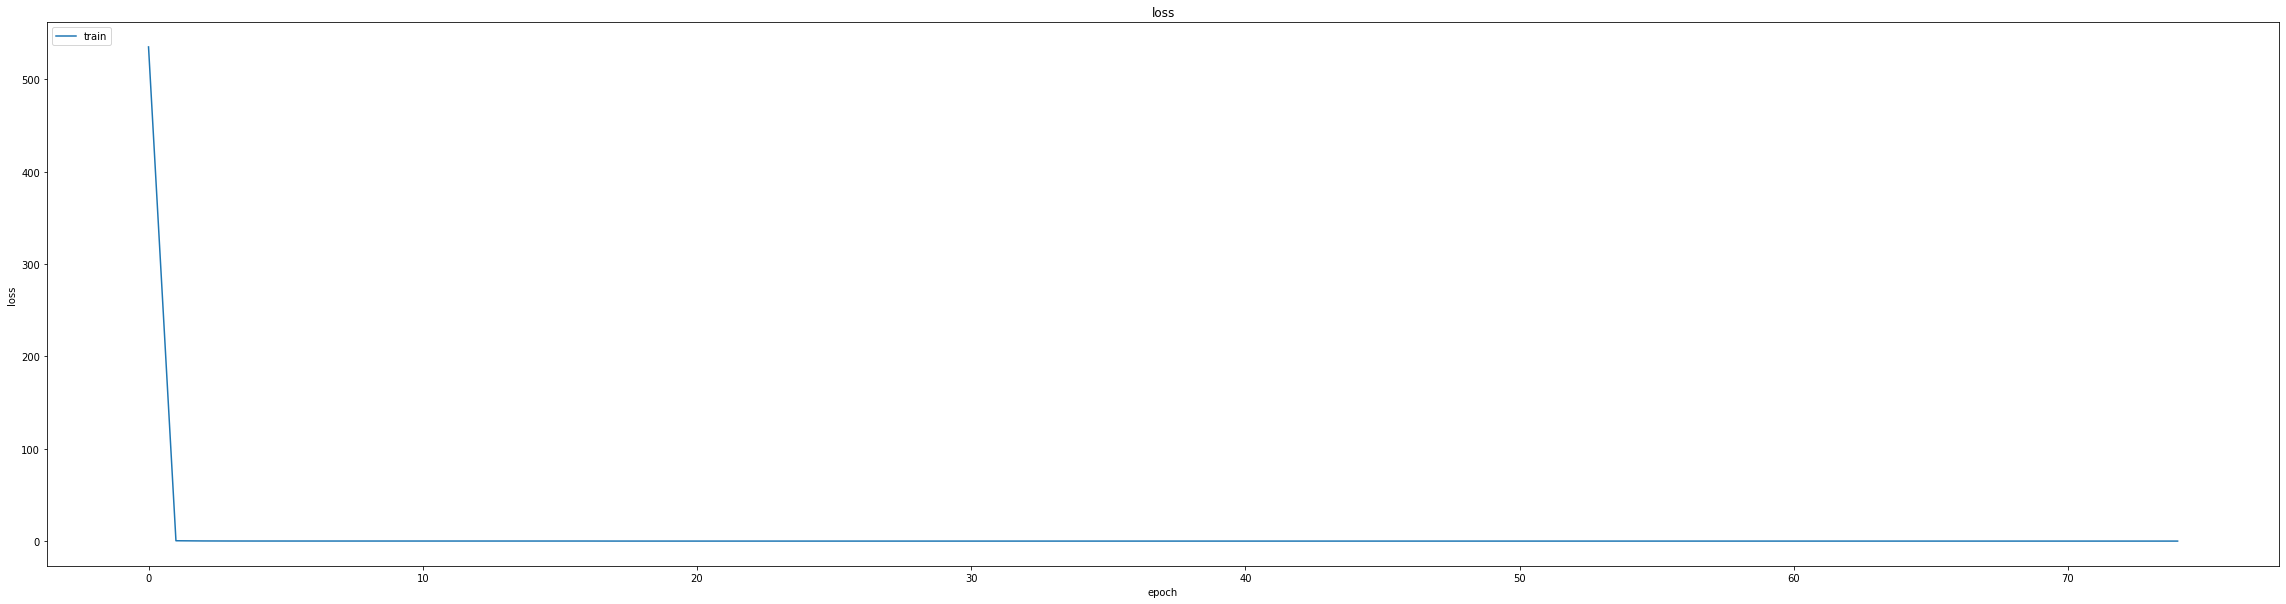

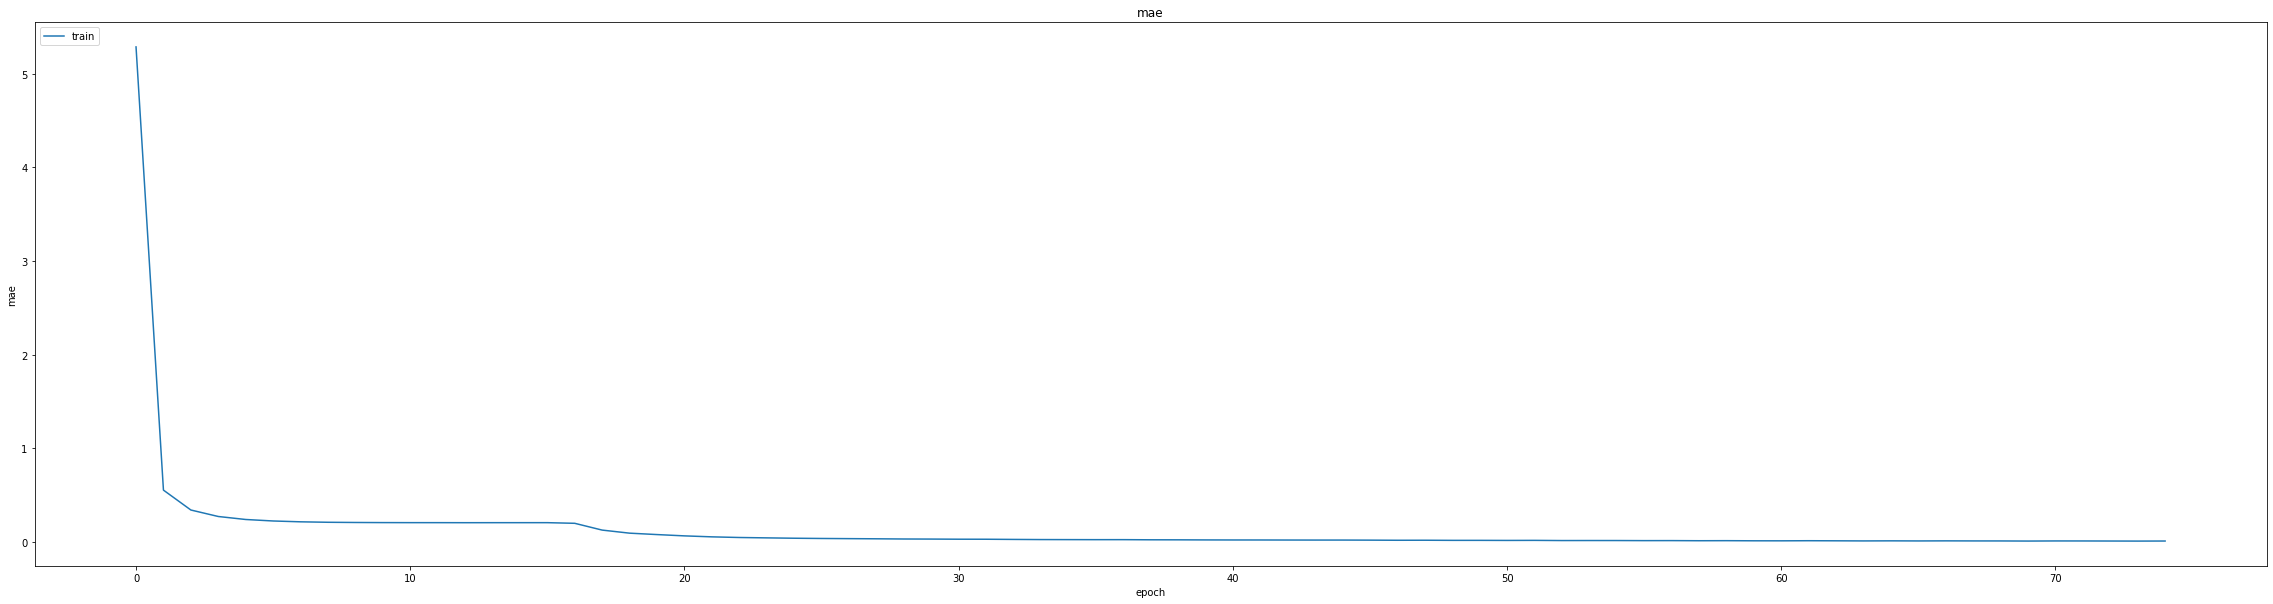

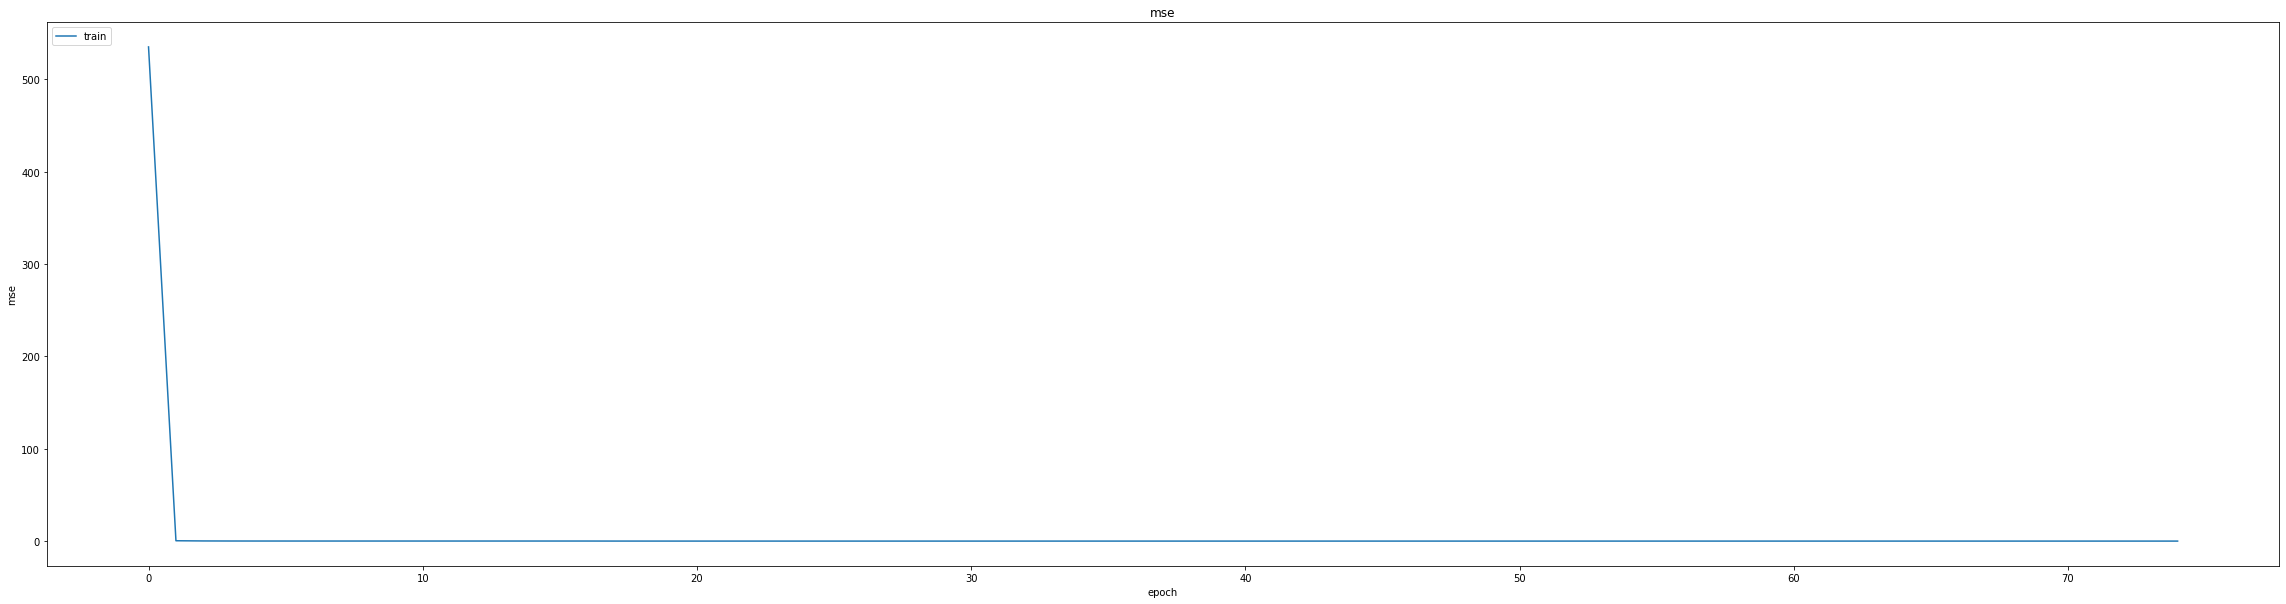

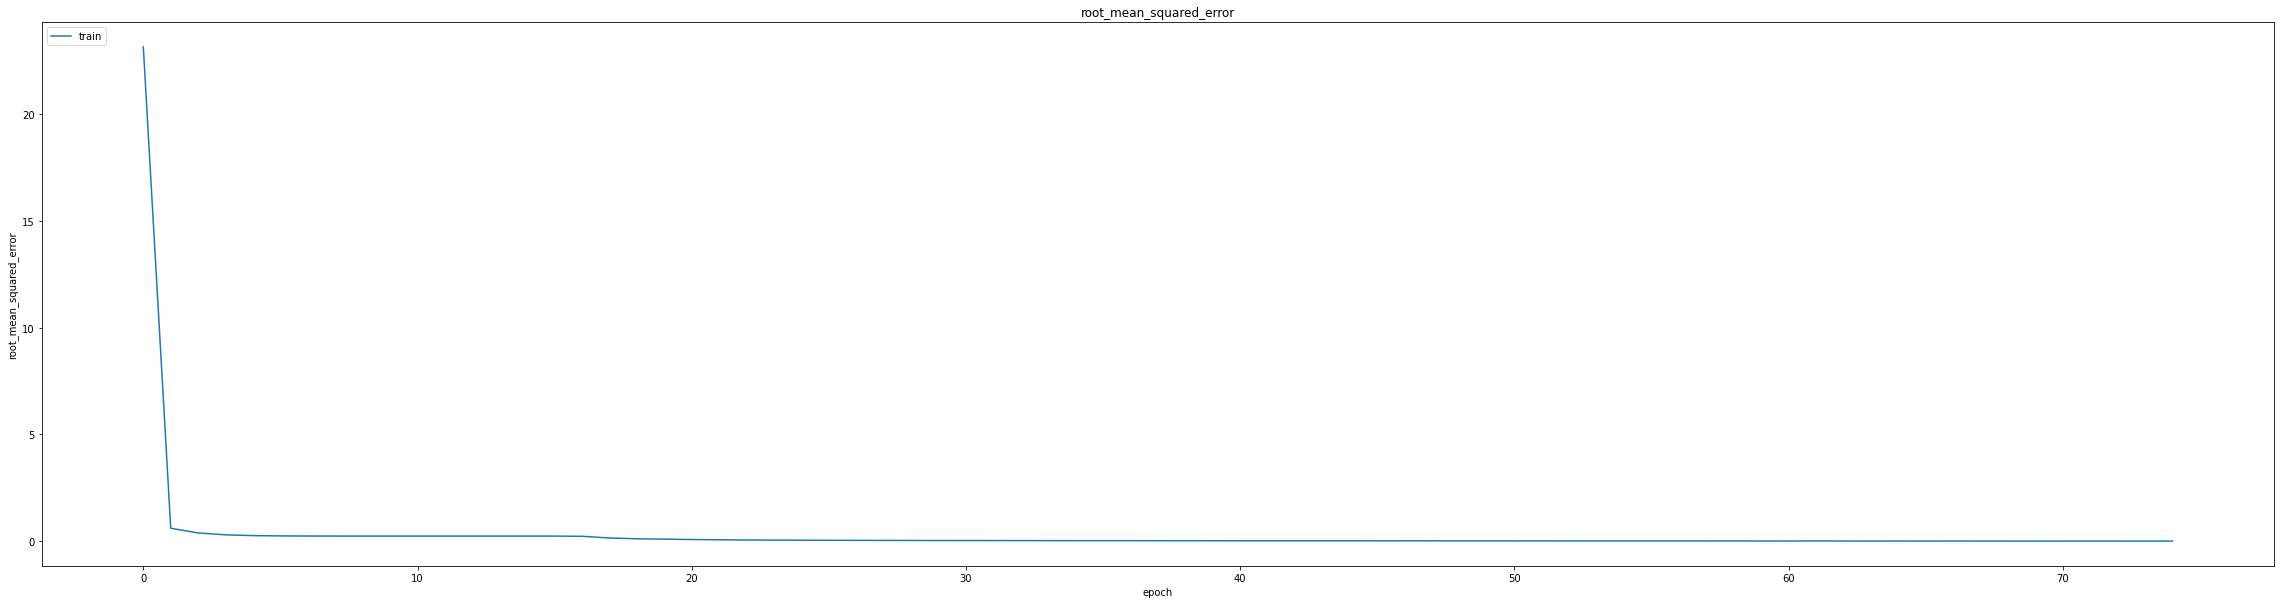

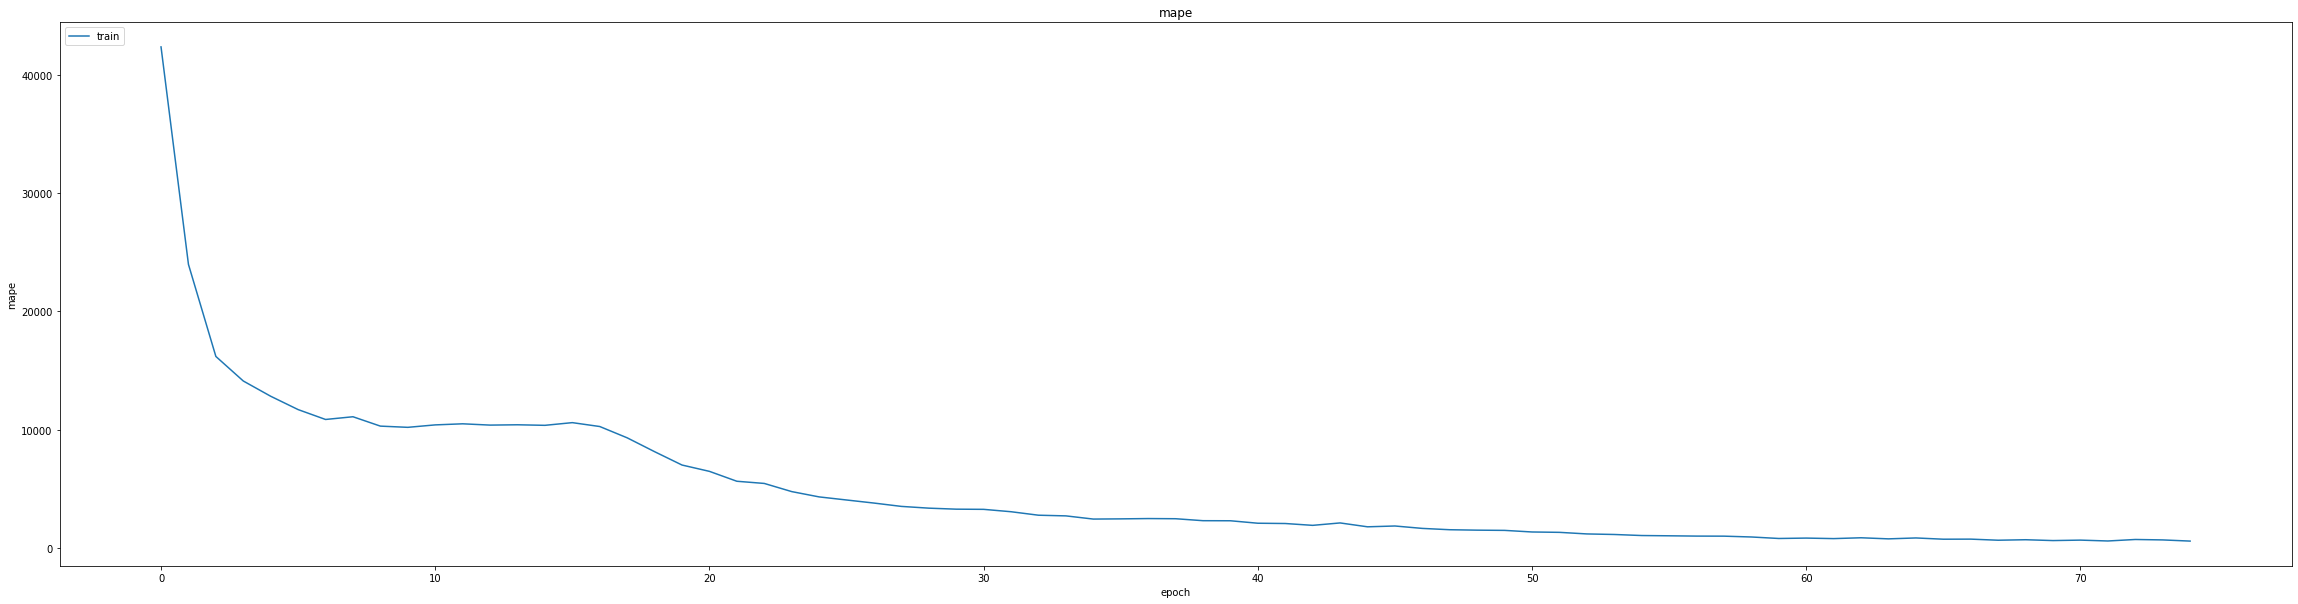

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01773139275610447
0.023129045963287354
464/464 [==============================] - 3s 4ms/step
0.9832359962757786


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


347/348 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0298 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 4928.3647
Epoch 1: val_mse did not improve from 0.00053
348/348 [==============================] - 11s 16ms/step - loss: 0.0045 - mae: 0.0298 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 4918.5181 - val_loss: 9.9925e-04 - val_mae: 0.0266 - val_mse: 9.9925e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 6122.1997 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 2.8531e-04 - mae: 0.0129 - mse: 2.8531e-04 - root_mean_squared_error: 0.0169 - mape: 1486.1201
Epoch 2: val_mse did not improve from 0.00053
348/348 [==============================] - 4s 13ms/step - loss: 2.8569e-04 - mae: 0.0129 - mse: 2.8569e-04 - root_mean_squared_error: 0.0169 - mape: 1483.1570 - val_loss: 7.8112e-04 - val_mae: 0.0241 - val_mse: 7.8112e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 4296.0098 - lr: 0.0010
lr changed to 

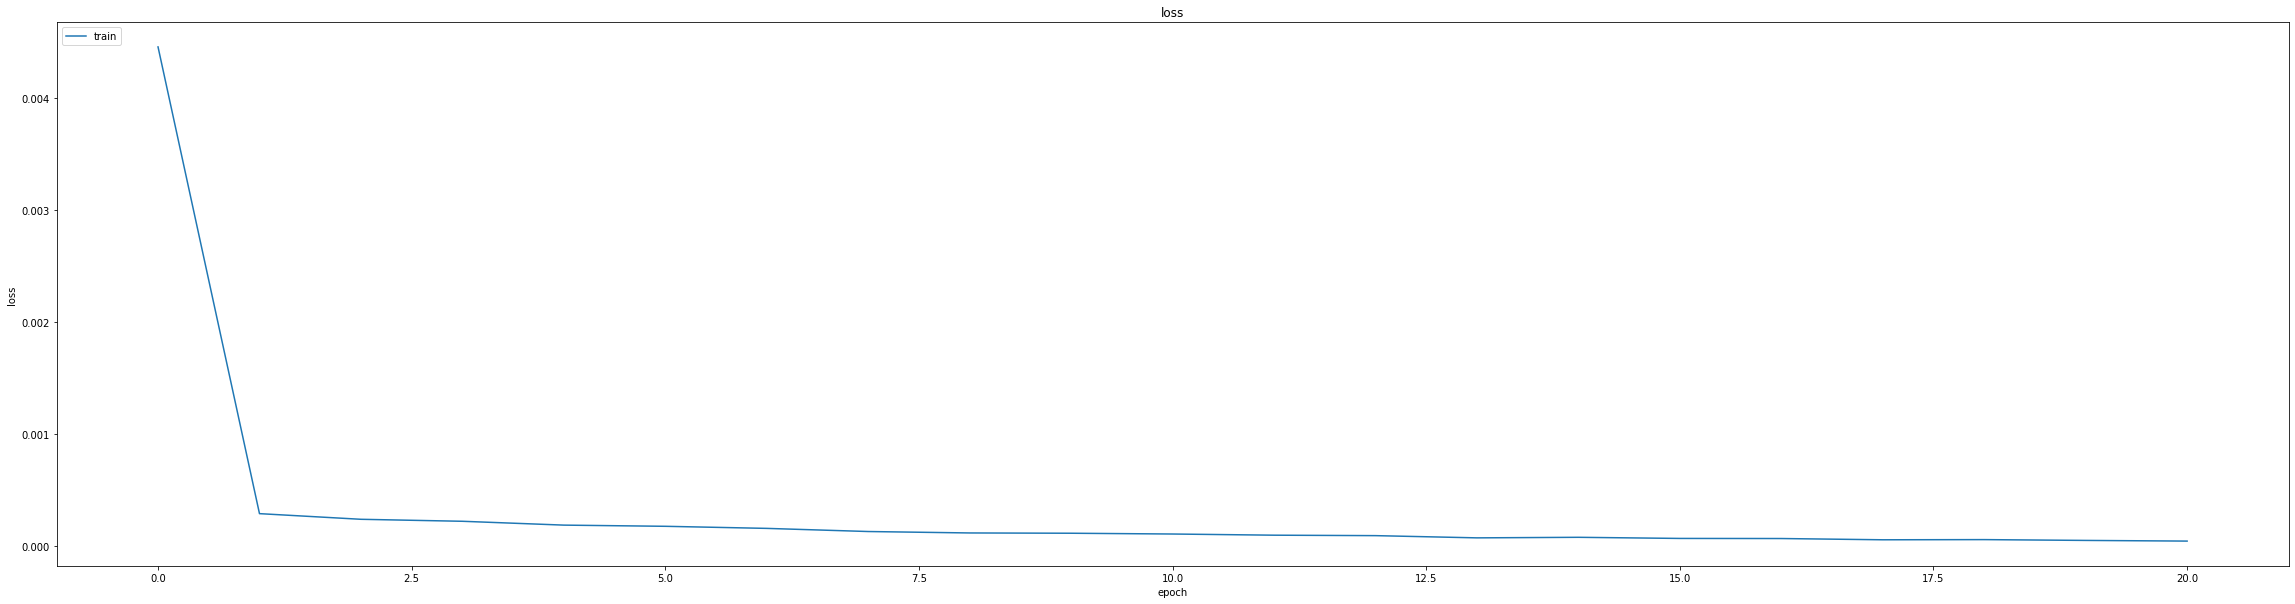

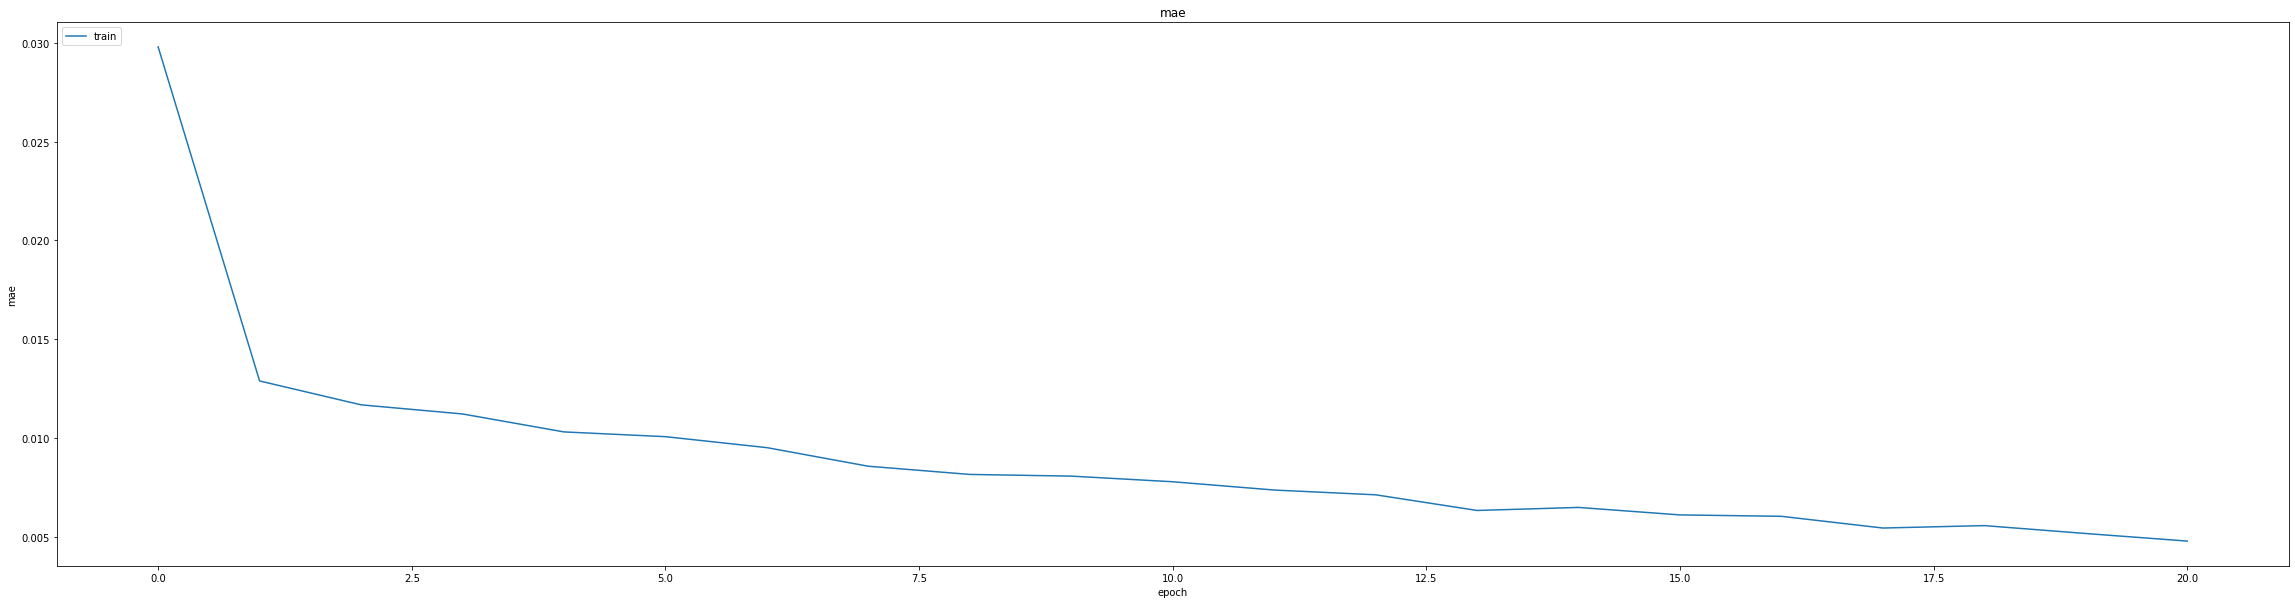

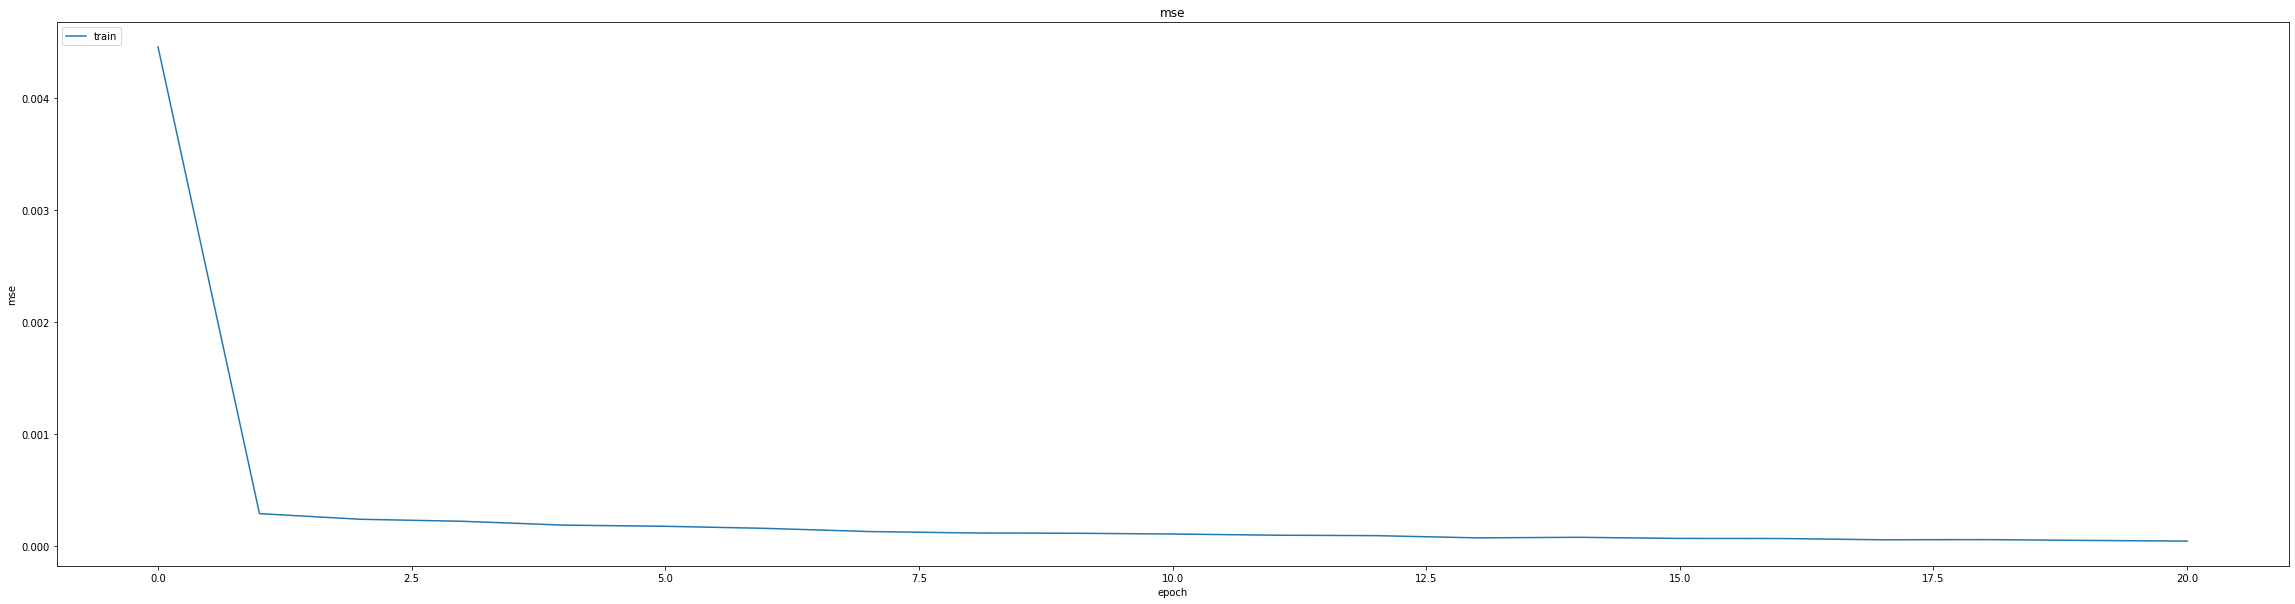

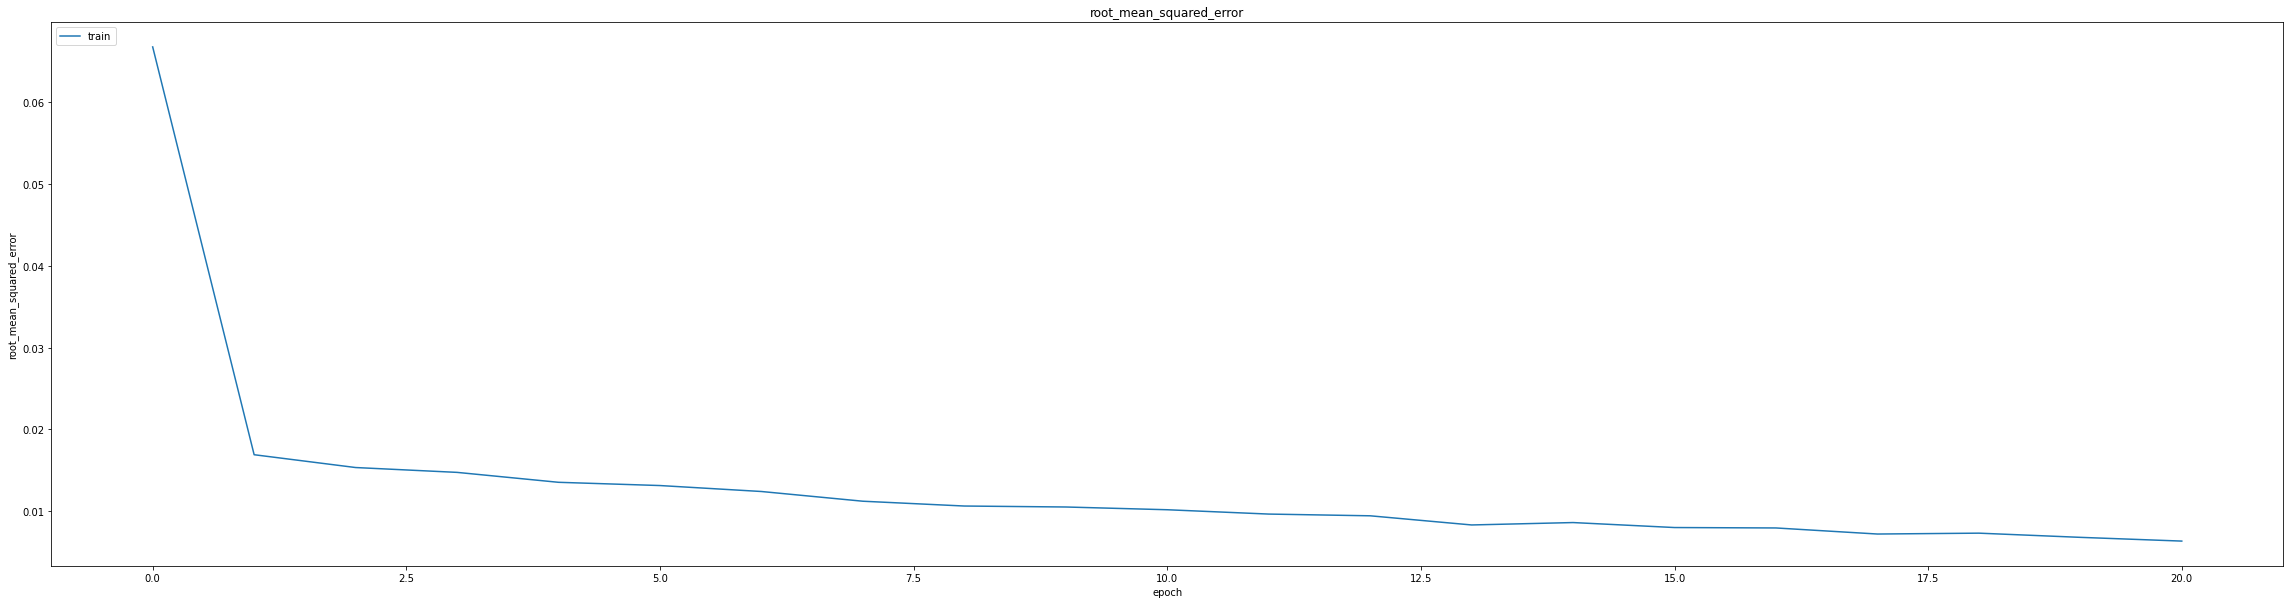

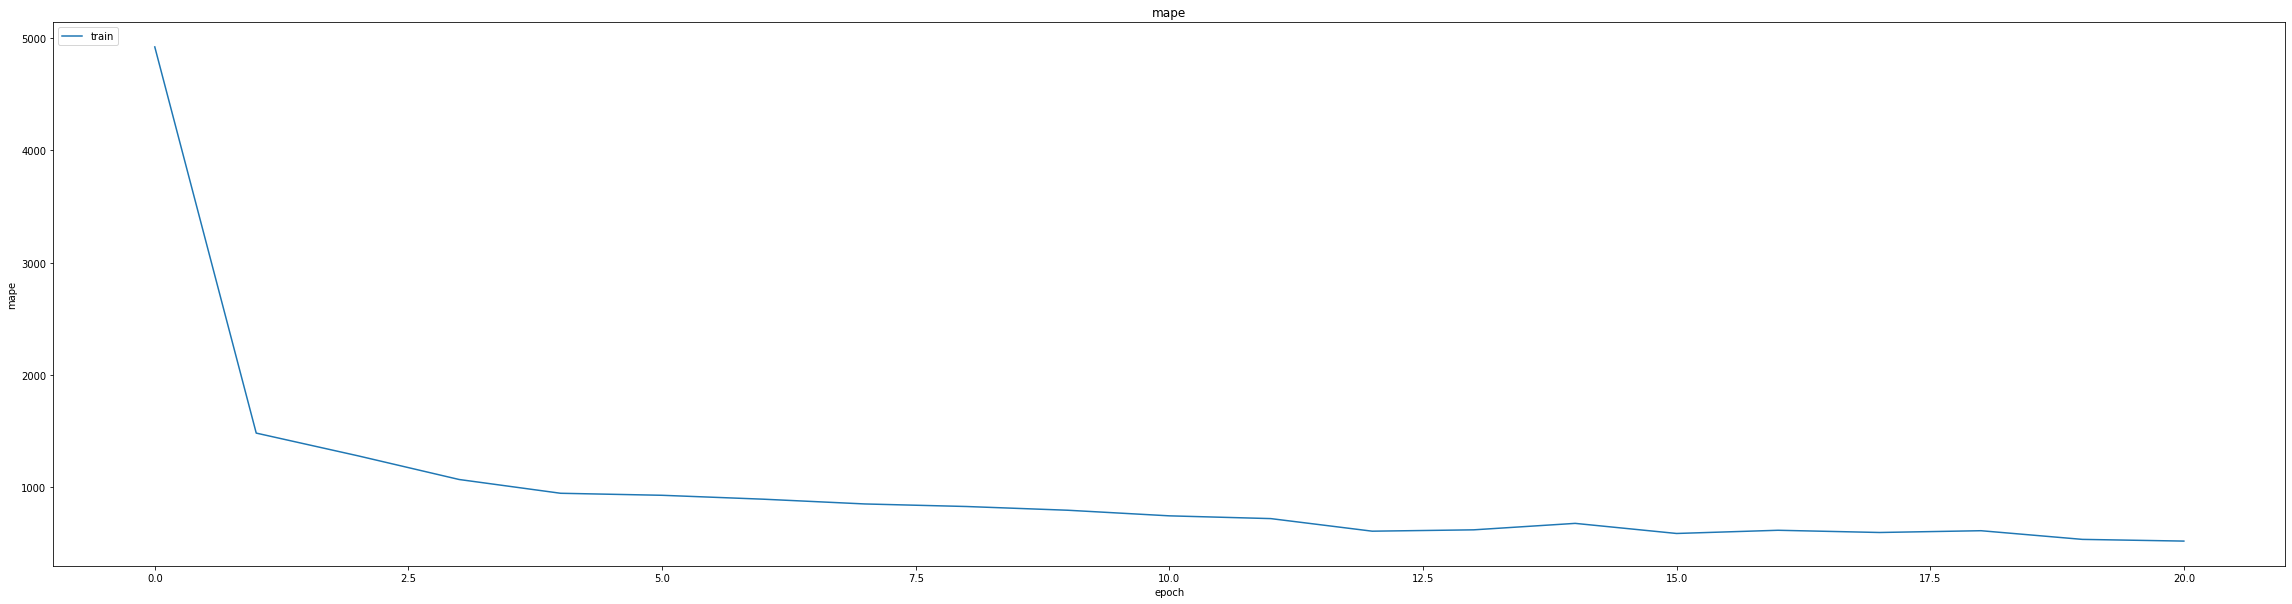

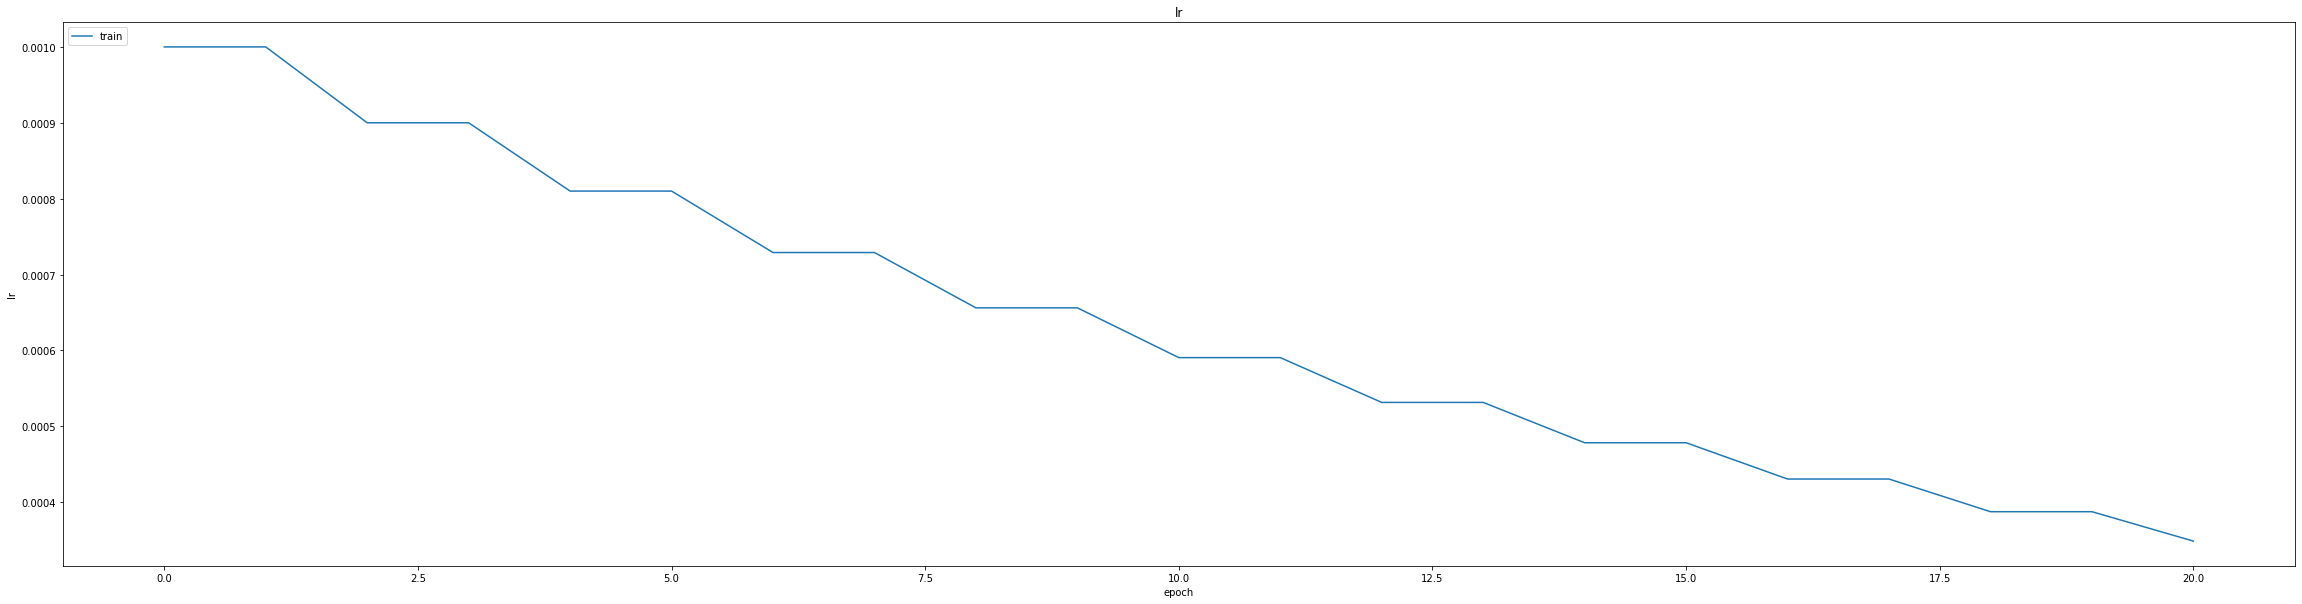

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.020088231191039085
0.023274105042219162
464/464 [==============================] - 3s 4ms/step
0.9790809666423812


464/464 [==============================] - 2s 4ms/step


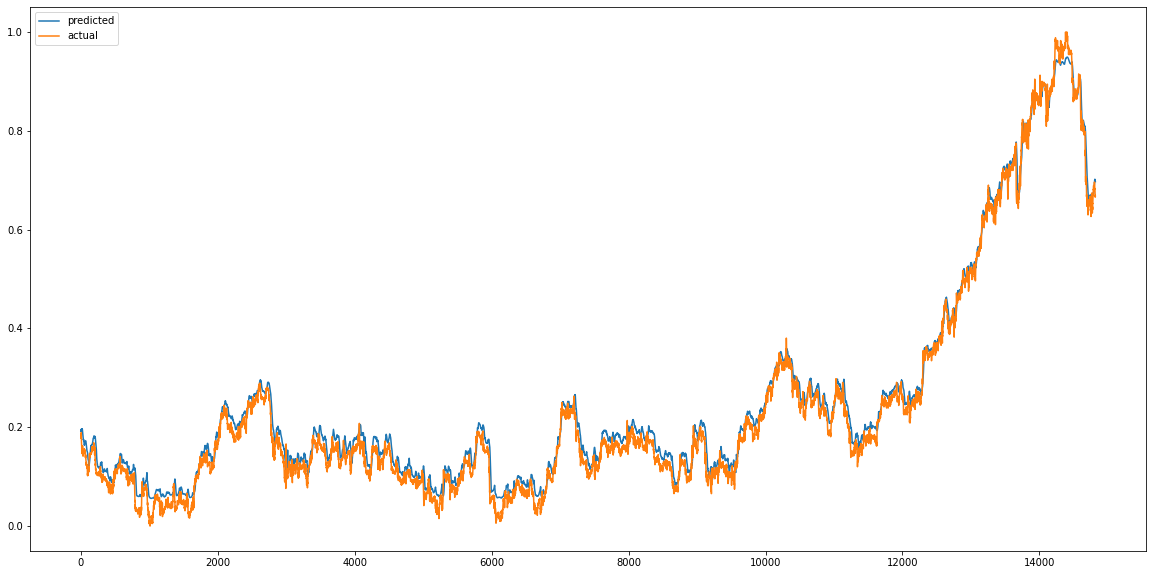

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


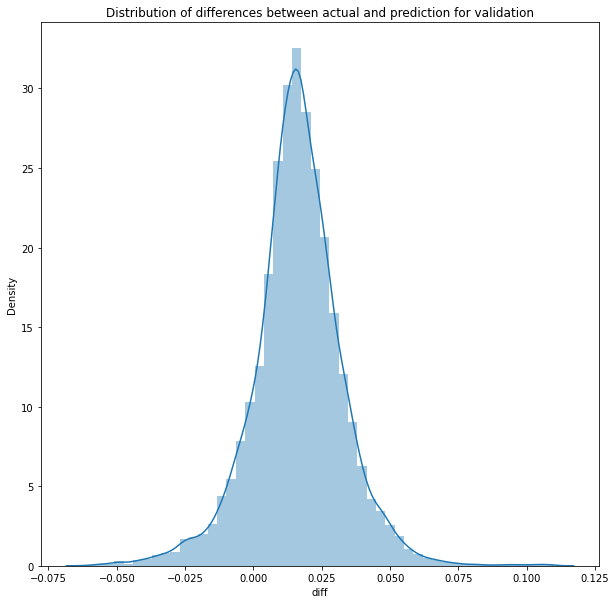

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


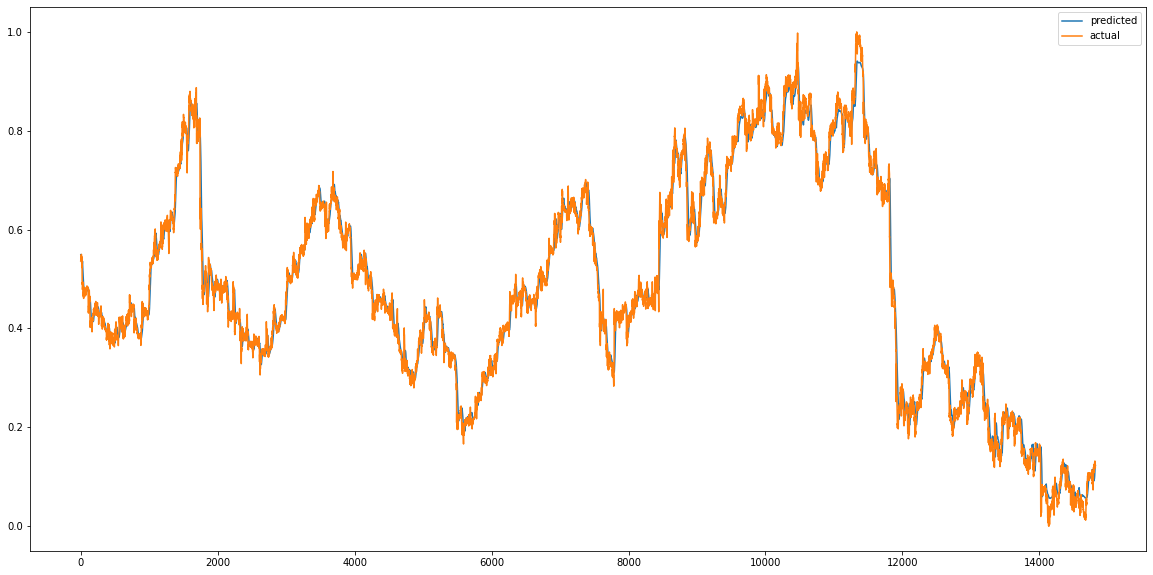

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


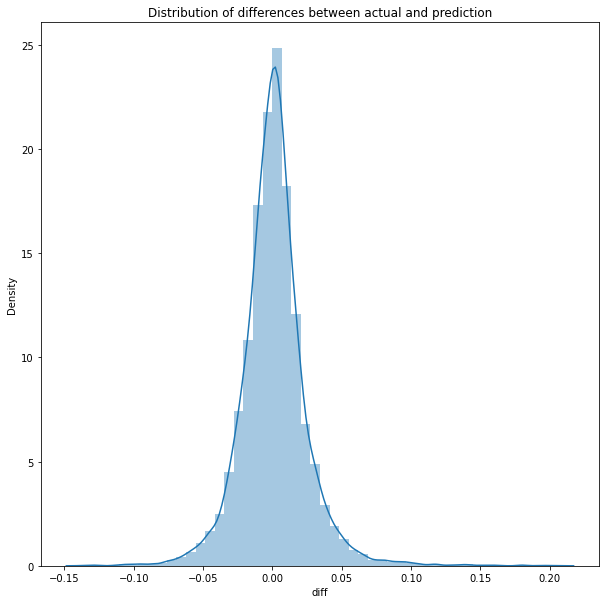

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005696750373263698
RMSE :  0.02386786620807084
MAE :  0.016573587857974637
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9882671015970935


count    14819.000000
mean         0.001130
std          0.023842
min         -0.138116
25%         -0.011098
50%          0.000722
75%          0.012149
max          0.206764
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 506.6646 - mae: 3.8168 - mse: 506.6646 - root_mean_squared_error: 22.5092 - mape: 13749.7373
Epoch 1: val_mse improved from inf to 0.10612, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 39s 87ms/step - loss: 505.6515 - mae: 3.8096 - mse: 505.6515 - root_mean_squared_error: 22.4867 - mape: 13722.4590 - val_loss: 0.1061 - val_mae: 0.3105 - val_mse: 0.1061 - val_root_mean_squared_error: 0.3258 - val_mape: 32177.5332
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0624 - mae: 0.2121 - mse: 0.0624 - root_mean_squared_error: 0.2498 - mape: 11544.3721
Epoch 2: val_mse improved from 0.10612 to 0.09707, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0624 - mae: 0.2120 - mse: 0.0624 - root_mean_squared_error: 0.2497 - mape: 11456.0781 - val_loss: 0.0971 - val_mae: 0.2959 - val_mse: 0.0971 - val_root_mean_squared_error: 0.3116 - val_mape: 30814.0020
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0613 - mae: 0.2071 - mse: 0.0613 - root_mean_squared_error: 0.2477 - mape: 10432.5273
Epoch 3: val_mse improved from 0.09707 to 0.09228, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 0.0613 - mae: 0.2071 - mse: 0.0613 - root_mean_squared_error: 0.2477 - mape: 10432.5273 - val_loss: 0.0923 - val_mae: 0.2878 - val_mse: 0.0923 - val_root_mean_squared_error: 0.3038 - val_mape: 30048.3477
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0598 - mae: 0.2030 - mse: 0.0598 - root_mean_squared_error: 0.2445 - mape: 11791.8379
Epoch 4: val_mse improved from 0.09228 to 0.08958, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0598 - mae: 0.2030 - mse: 0.0598 - root_mean_squared_error: 0.2445 - mape: 11791.8379 - val_loss: 0.0896 - val_mae: 0.2835 - val_mse: 0.0896 - val_root_mean_squared_error: 0.2993 - val_mape: 29623.9023
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.0571 - mae: 0.1979 - mse: 0.0571 - root_mean_squared_error: 0.2390 - mape: 11582.7764
Epoch 5: val_mse improved from 0.08958 to 0.08646, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0572 - mae: 0.1980 - mse: 0.0572 - root_mean_squared_error: 0.2391 - mape: 11493.6650 - val_loss: 0.0865 - val_mae: 0.2786 - val_mse: 0.0865 - val_root_mean_squared_error: 0.2940 - val_mape: 29132.7734
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0526 - mae: 0.1897 - mse: 0.0526 - root_mean_squared_error: 0.2294 - mape: 10271.9482
Epoch 6: val_mse improved from 0.08646 to 0.08167, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0526 - mae: 0.1897 - mse: 0.0526 - root_mean_squared_error: 0.2294 - mape: 10271.9482 - val_loss: 0.0817 - val_mae: 0.2707 - val_mse: 0.0817 - val_root_mean_squared_error: 0.2858 - val_mape: 28379.6035
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1766 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 10521.2266
Epoch 7: val_mse improved from 0.08167 to 0.07411, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0459 - mae: 0.1766 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 10521.2266 - val_loss: 0.0741 - val_mae: 0.2576 - val_mse: 0.0741 - val_root_mean_squared_error: 0.2722 - val_mape: 27032.5977
Epoch 8/75
348/348 [==============================] - ETA: 0s - loss: 0.0368 - mae: 0.1575 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 9902.5029
Epoch 8: val_mse improved from 0.07411 to 0.06246, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0368 - mae: 0.1575 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 9902.5029 - val_loss: 0.0625 - val_mae: 0.2355 - val_mse: 0.0625 - val_root_mean_squared_error: 0.2499 - val_mape: 25058.1309
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0254 - mae: 0.1285 - mse: 0.0254 - root_mean_squared_error: 0.1595 - mape: 9387.4473
Epoch 9: val_mse improved from 0.06246 to 0.04071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0254 - mae: 0.1285 - mse: 0.0254 - root_mean_squared_error: 0.1595 - mape: 9387.4473 - val_loss: 0.0407 - val_mae: 0.1860 - val_mse: 0.0407 - val_root_mean_squared_error: 0.2018 - val_mape: 21892.6172
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0125 - mae: 0.0861 - mse: 0.0125 - root_mean_squared_error: 0.1119 - mape: 7374.7349
Epoch 10: val_mse improved from 0.04071 to 0.02224, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 0.0125 - mae: 0.0861 - mse: 0.0125 - root_mean_squared_error: 0.1119 - mape: 7360.0322 - val_loss: 0.0222 - val_mae: 0.1340 - val_mse: 0.0222 - val_root_mean_squared_error: 0.1491 - val_mape: 17778.6426
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0085 - mae: 0.0719 - mse: 0.0085 - root_mean_squared_error: 0.0923 - mape: 7032.5225
Epoch 11: val_mse improved from 0.02224 to 0.01351, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 88ms/step - loss: 0.0085 - mae: 0.0718 - mse: 0.0085 - root_mean_squared_error: 0.0922 - mape: 6998.3765 - val_loss: 0.0135 - val_mae: 0.1017 - val_mse: 0.0135 - val_root_mean_squared_error: 0.1162 - val_mape: 15569.5693
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0579 - mse: 0.0056 - root_mean_squared_error: 0.0748 - mape: 5507.1133
Epoch 12: val_mse improved from 0.01351 to 0.00836, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 0.0056 - mae: 0.0579 - mse: 0.0056 - root_mean_squared_error: 0.0748 - mape: 5480.4009 - val_loss: 0.0084 - val_mae: 0.0771 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0914 - val_mape: 13486.0479
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0040 - mae: 0.0486 - mse: 0.0040 - root_mean_squared_error: 0.0630 - mape: 4933.8413
Epoch 13: val_mse improved from 0.00836 to 0.00586, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0040 - mae: 0.0486 - mse: 0.0040 - root_mean_squared_error: 0.0630 - mape: 4924.0552 - val_loss: 0.0059 - val_mae: 0.0626 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0766 - val_mape: 12140.1406
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0437 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 4318.1509
Epoch 14: val_mse improved from 0.00586 to 0.00442, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0032 - mae: 0.0437 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 4297.1895 - val_loss: 0.0044 - val_mae: 0.0533 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0665 - val_mape: 11143.8486
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0413 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 4603.0850
Epoch 15: val_mse improved from 0.00442 to 0.00353, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0029 - mae: 0.0413 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 4593.9023 - val_loss: 0.0035 - val_mae: 0.0470 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0594 - val_mape: 10349.3818
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0386 - mse: 0.0025 - root_mean_squared_error: 0.0502 - mape: 3846.1213
Epoch 16: val_mse improved from 0.00353 to 0.00302, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 88ms/step - loss: 0.0025 - mae: 0.0386 - mse: 0.0025 - root_mean_squared_error: 0.0502 - mape: 3827.4663 - val_loss: 0.0030 - val_mae: 0.0432 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 9728.7363
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0369 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3834.6318
Epoch 17: val_mse improved from 0.00302 to 0.00254, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0023 - mae: 0.0369 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 3816.0178 - val_loss: 0.0025 - val_mae: 0.0388 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 9225.5723
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 3351.5542
Epoch 18: val_mse improved from 0.00254 to 0.00225, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 3335.2751 - val_loss: 0.0022 - val_mae: 0.0368 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0474 - val_mape: 8797.0547
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0329 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 3263.9502
Epoch 19: val_mse improved from 0.00225 to 0.00190, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0018 - mae: 0.0329 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 3257.4832 - val_loss: 0.0019 - val_mae: 0.0336 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 8419.7783
Epoch 20/75
346/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 3308.4961
Epoch 20: val_mse improved from 0.00190 to 0.00164, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 88ms/step - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0408 - mape: 3292.4221 - val_loss: 0.0016 - val_mae: 0.0311 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 8091.3184
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3003.8459
Epoch 21: val_mse improved from 0.00164 to 0.00155, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0015 - mae: 0.0296 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 3003.8459 - val_loss: 0.0015 - val_mae: 0.0306 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 7757.4668
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 2821.0957
Epoch 22: val_mse improved from 0.00155 to 0.00140, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 2815.4685 - val_loss: 0.0014 - val_mae: 0.0289 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 7423.8730
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2811.5649
Epoch 23: val_mse improved from 0.00140 to 0.00123, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2797.9082 - val_loss: 0.0012 - val_mae: 0.0271 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 7118.4082
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2504.0918
Epoch 24: val_mse improved from 0.00123 to 0.00114, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2491.9346 - val_loss: 0.0011 - val_mae: 0.0260 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 6850.0190
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 8.9484e-04 - mae: 0.0230 - mse: 8.9484e-04 - root_mean_squared_error: 0.0299 - mape: 2676.7820
Epoch 25: val_mse improved from 0.00114 to 0.00093, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 31s 89ms/step - loss: 8.9489e-04 - mae: 0.0230 - mse: 8.9489e-04 - root_mean_squared_error: 0.0299 - mape: 2663.7747 - val_loss: 9.3010e-04 - val_mae: 0.0233 - val_mse: 9.3010e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 6596.9487
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 8.1228e-04 - mae: 0.0220 - mse: 8.1228e-04 - root_mean_squared_error: 0.0285 - mape: 2401.8833
Epoch 26: val_mse improved from 0.00093 to 0.00087, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 8.1228e-04 - mae: 0.0220 - mse: 8.1228e-04 - root_mean_squared_error: 0.0285 - mape: 2401.8833 - val_loss: 8.7348e-04 - val_mae: 0.0223 - val_mse: 8.7348e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 6321.3696
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 7.0221e-04 - mae: 0.0203 - mse: 7.0221e-04 - root_mean_squared_error: 0.0265 - mape: 2336.7891
Epoch 27: val_mse improved from 0.00087 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 7.0247e-04 - mae: 0.0203 - mse: 7.0247e-04 - root_mean_squared_error: 0.0265 - mape: 2332.1277 - val_loss: 7.2234e-04 - val_mae: 0.0202 - val_mse: 7.2234e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 6124.6509
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 6.2155e-04 - mae: 0.0191 - mse: 6.2155e-04 - root_mean_squared_error: 0.0249 - mape: 2255.3845
Epoch 28: val_mse improved from 0.00072 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 6.2155e-04 - mae: 0.0191 - mse: 6.2155e-04 - root_mean_squared_error: 0.0249 - mape: 2255.3845 - val_loss: 6.2421e-04 - val_mae: 0.0187 - val_mse: 6.2421e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 5894.0581
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 5.3772e-04 - mae: 0.0177 - mse: 5.3772e-04 - root_mean_squared_error: 0.0232 - mape: 2277.3169
Epoch 29: val_mse did not improve from 0.00062
348/348 [==============================] - 6s 17ms/step - loss: 5.3745e-04 - mae: 0.0177 - mse: 5.3745e-04 - root_mean_squared_error: 0.0232 - mape: 2266.3171 - val_loss: 6.2478e-04 - val_mae: 0.0188 - val_mse: 6.2478e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 5660.9307
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 4.6335e-04 - mae: 0.0164 - mse: 4.6335e-04 - root_mean_squared_error: 0.0215 - mape: 2085.0994
Epoch 30: val_mse improved from 0.00062 to 0.00058, savi

348/348 [==============================] - 30s 87ms/step - loss: 4.6335e-04 - mae: 0.0164 - mse: 4.6335e-04 - root_mean_squared_error: 0.0215 - mape: 2085.0994 - val_loss: 5.7591e-04 - val_mae: 0.0182 - val_mse: 5.7591e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 5448.7803
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 4.2682e-04 - mae: 0.0157 - mse: 4.2682e-04 - root_mean_squared_error: 0.0207 - mape: 2148.9326
Epoch 31: val_mse improved from 0.00058 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 4.2670e-04 - mae: 0.0157 - mse: 4.2670e-04 - root_mean_squared_error: 0.0207 - mape: 2138.5857 - val_loss: 5.3584e-04 - val_mae: 0.0177 - val_mse: 5.3584e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 5294.4043
Epoch 32/75
348/348 [==============================] - ETA: 0s - loss: 3.7907e-04 - mae: 0.0148 - mse: 3.7907e-04 - root_mean_squared_error: 0.0195 - mape: 2083.9460
Epoch 32: val_mse did not improve from 0.00054
348/348 [==============================] - 6s 17ms/step - loss: 3.7907e-04 - mae: 0.0148 - mse: 3.7907e-04 - root_mean_squared_error: 0.0195 - mape: 2083.9460 - val_loss: 6.9022e-04 - val_mae: 0.0219 - val_mse: 6.9022e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 5103.0425
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 3.2943e-04 - mae: 0.0138 - mse: 3.2943e-04 - root_mean_squared_error: 0.0182 - mape: 1863.8076
Epoch 33: val_mse did not improve from 0.00054
348/348 [

348/348 [==============================] - 29s 83ms/step - loss: 2.4582e-04 - mae: 0.0104 - mse: 2.4582e-04 - root_mean_squared_error: 0.0157 - mape: 991.8167 - val_loss: 4.7560e-04 - val_mae: 0.0161 - val_mse: 4.7560e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2848.8123
Epoch 55/75
348/348 [==============================] - ETA: 0s - loss: 1.4011e-04 - mae: 0.0084 - mse: 1.4011e-04 - root_mean_squared_error: 0.0118 - mape: 1164.6262
Epoch 55: val_mse did not improve from 0.00048
348/348 [==============================] - 6s 17ms/step - loss: 1.4011e-04 - mae: 0.0084 - mse: 1.4011e-04 - root_mean_squared_error: 0.0118 - mape: 1164.6262 - val_loss: 0.0015 - val_mae: 0.0371 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 3571.9727
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 1.1154e-04 - mae: 0.0079 - mse: 1.1154e-04 - root_mean_squared_error: 0.0106 - mape: 1127.7646
Epoch 56: val_mse did not improve from 0.00048
348/348 [=========

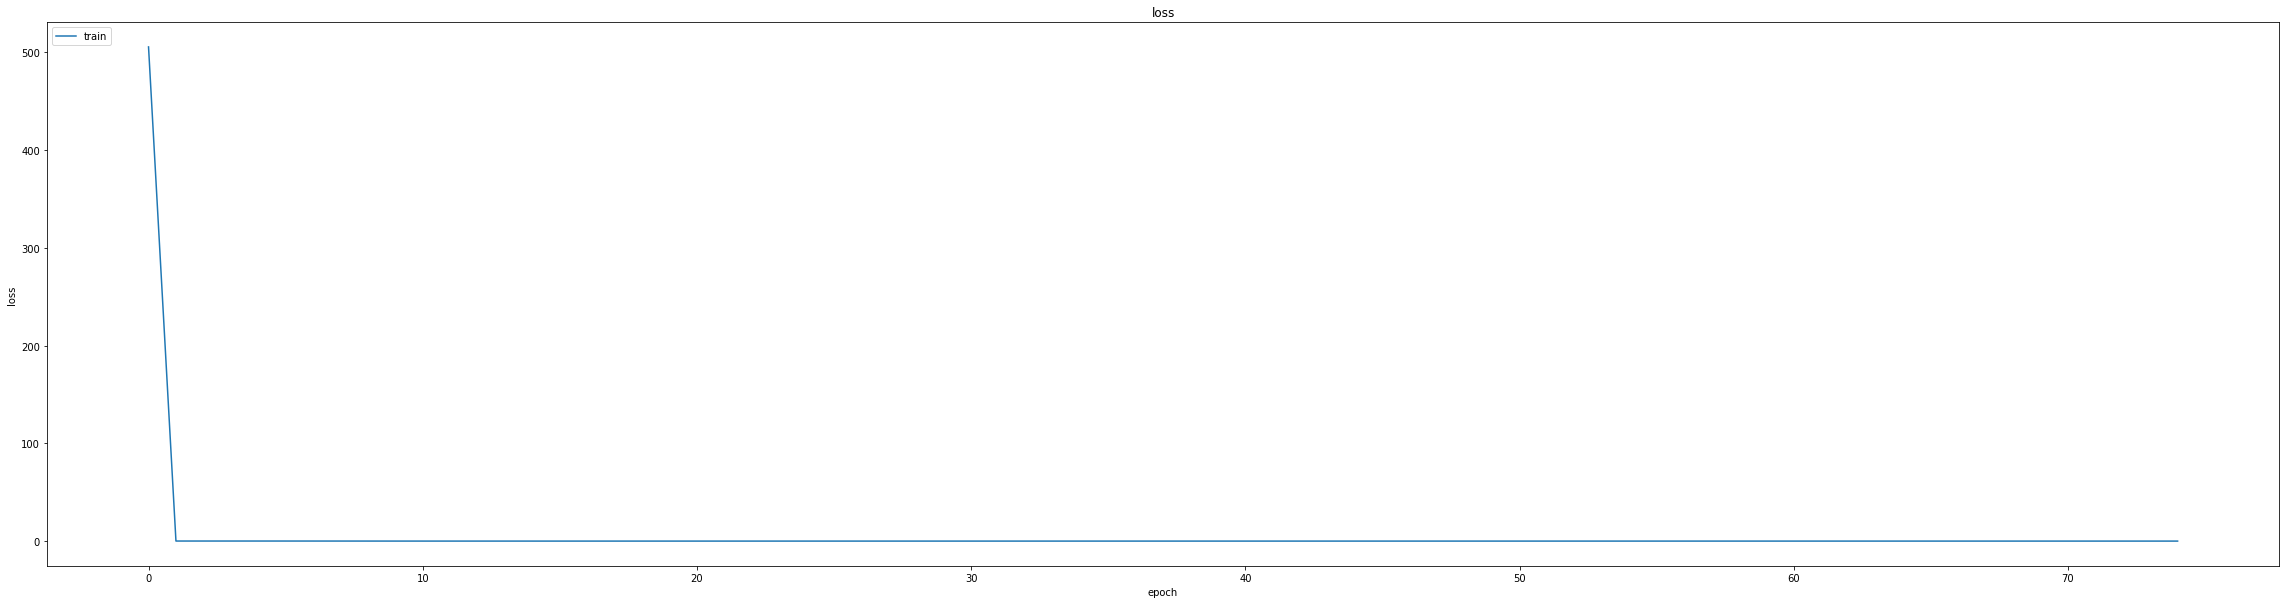

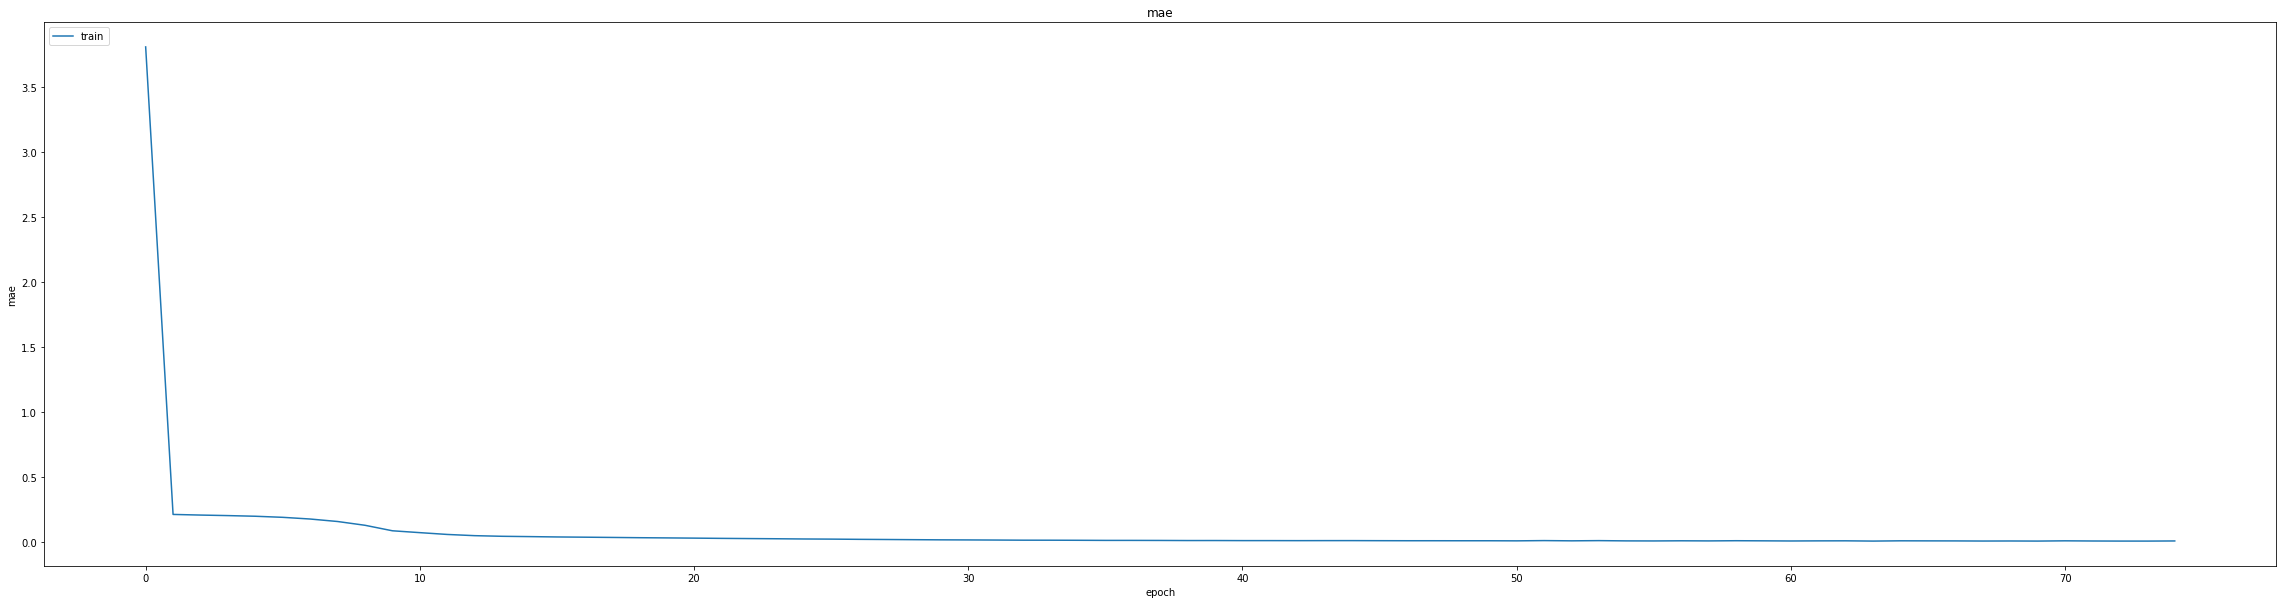

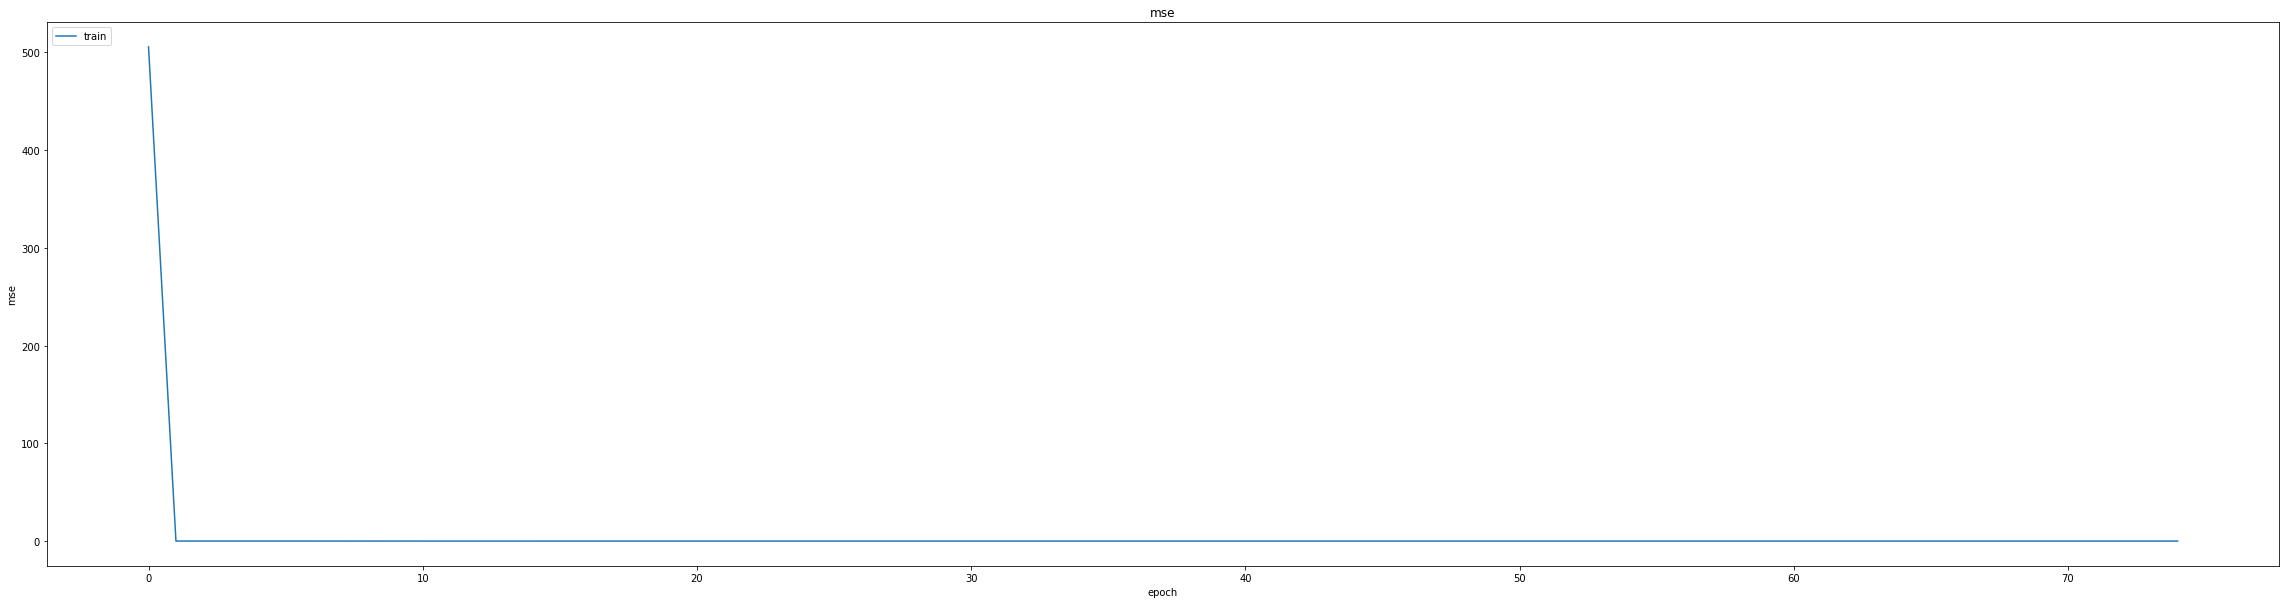

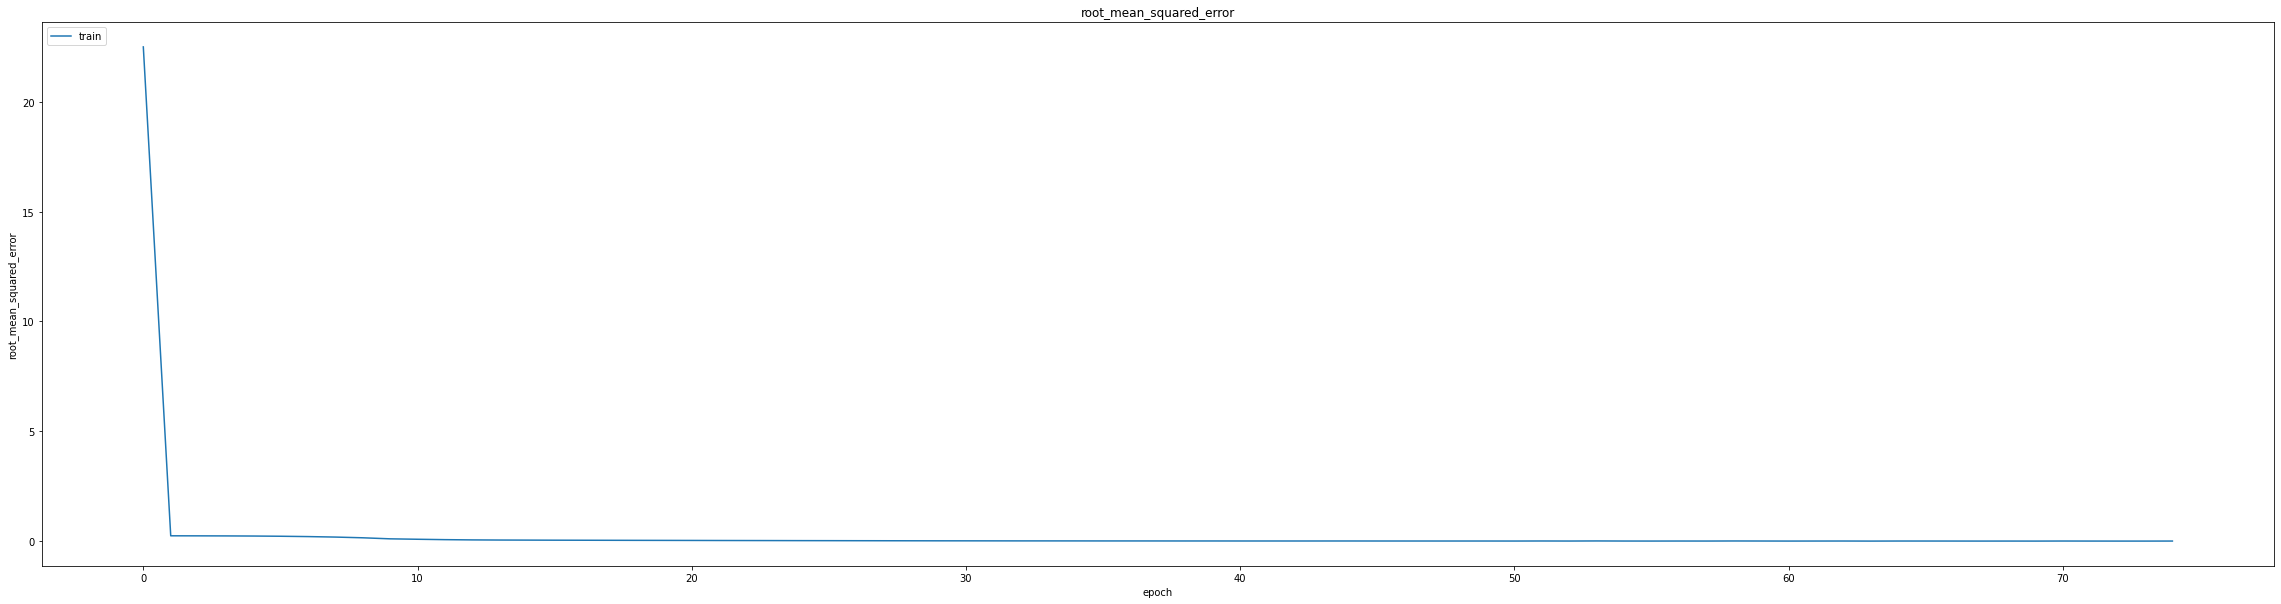

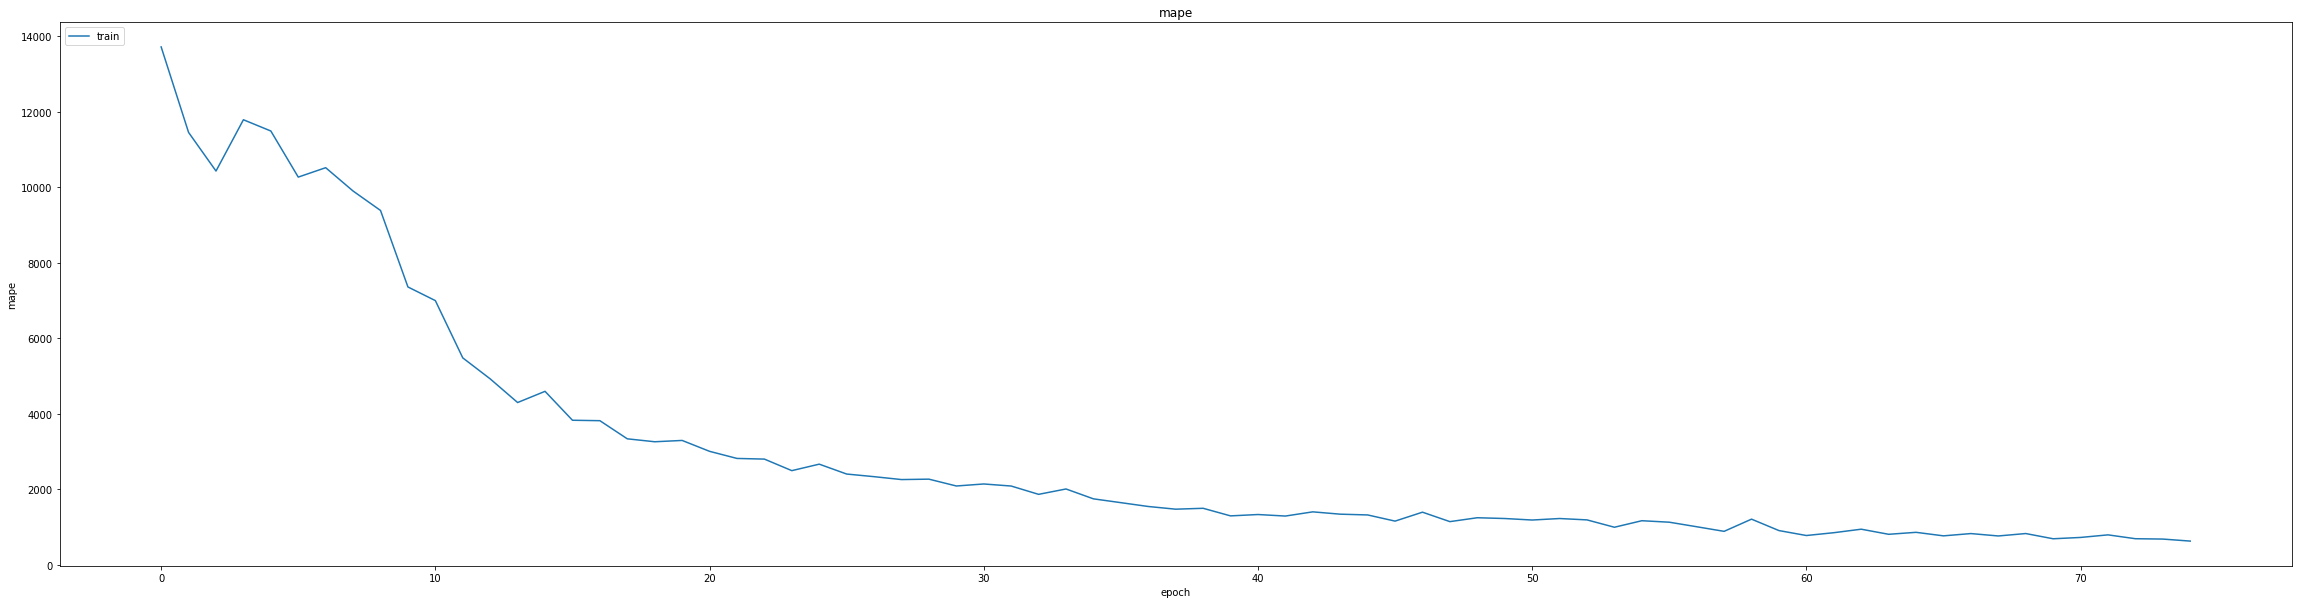

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016055699437856674
0.0218083243817091
464/464 [==============================] - 4s 6ms/step
0.9625945303294015


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0222 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 1059.9629
Epoch 1: val_mse did not improve from 0.00048
348/348 [==============================] - 15s 25ms/step - loss: 0.0026 - mae: 0.0222 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 1059.9629 - val_loss: 0.0021 - val_mae: 0.0446 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 4242.3008 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 1.0123e-04 - mae: 0.0075 - mse: 1.0123e-04 - root_mean_squared_error: 0.0101 - mape: 1024.3558
Epoch 2: val_mse did not improve from 0.00048
348/348 [==============================] - 6s 17ms/step - loss: 1.0117e-04 - mae: 0.0075 - mse: 1.0117e-04 - root_mean_squared_error: 0.0101 - mape: 1022.3122 - val_loss: 0.0017 - val_mae: 0.0396 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 3816.0801 - lr: 0.0010
lr changed to 0.00090000004274

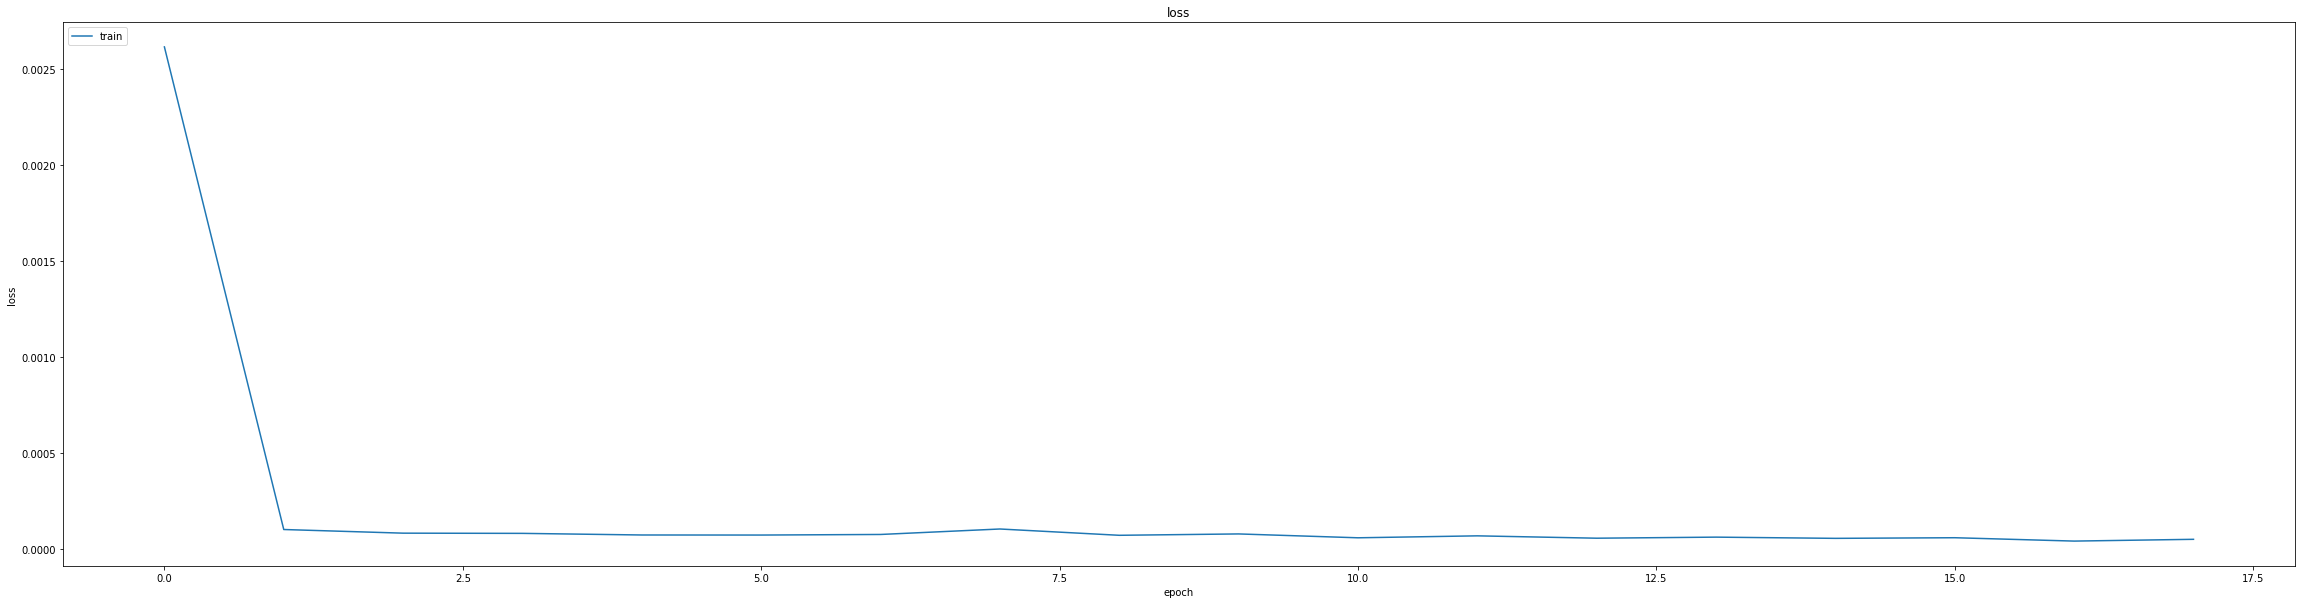

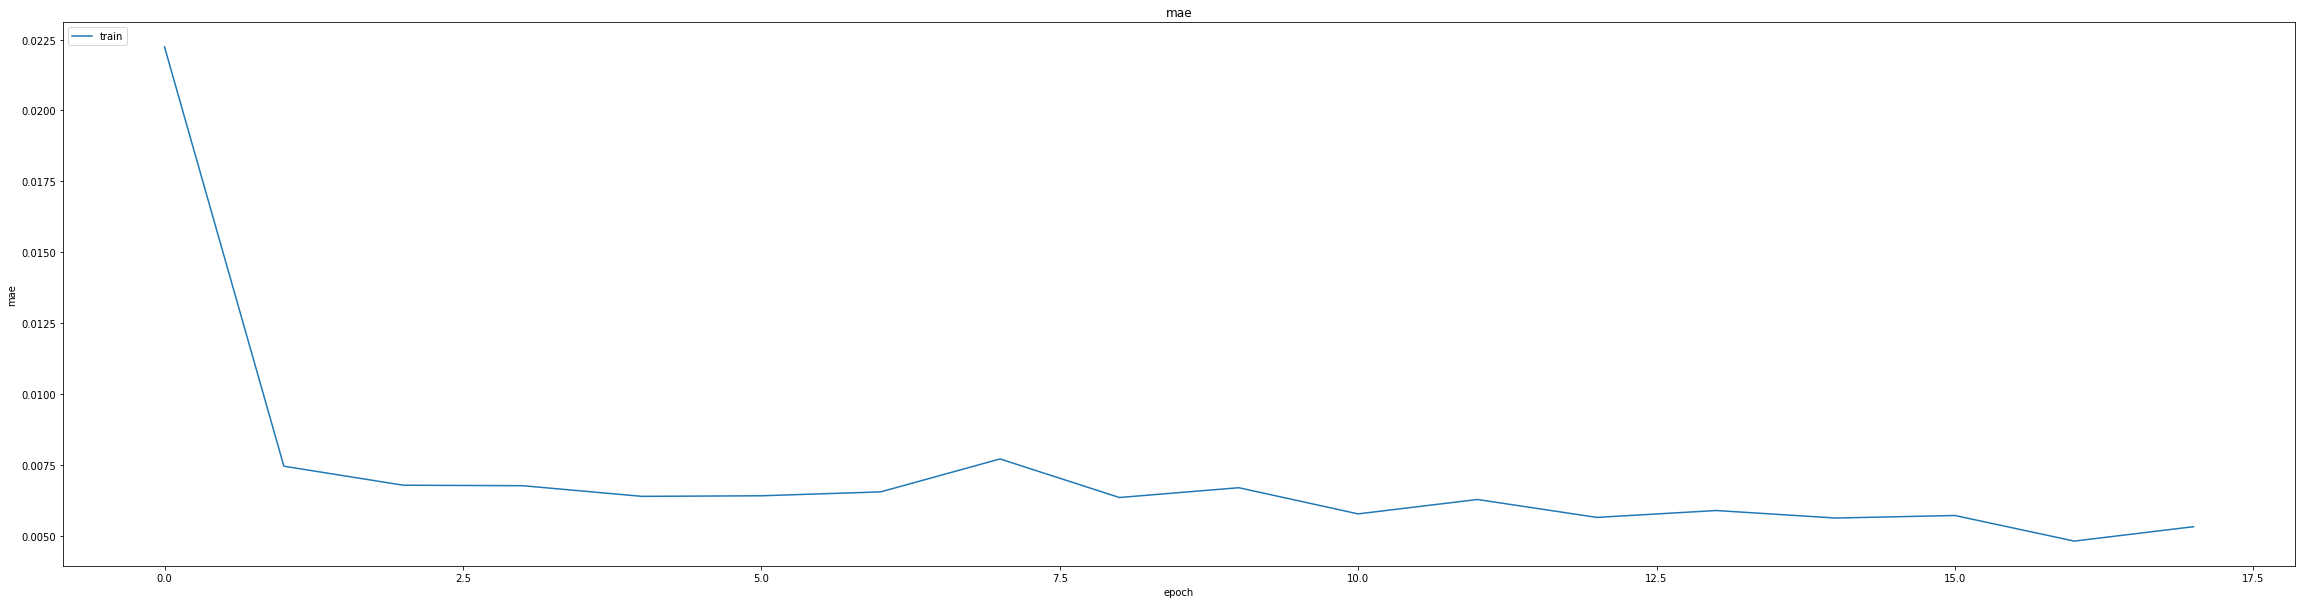

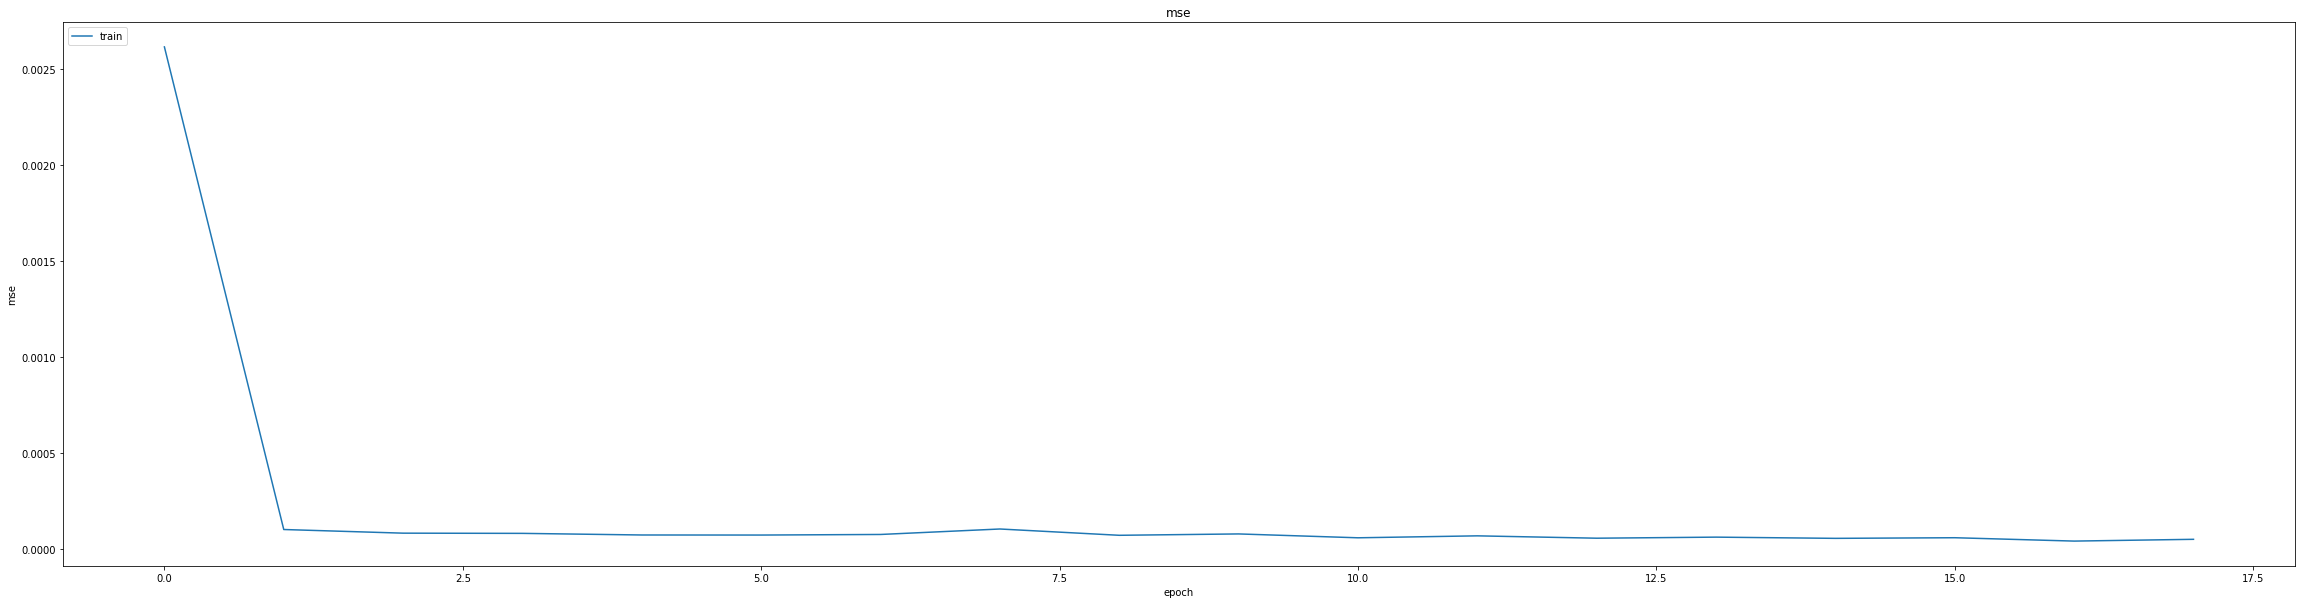

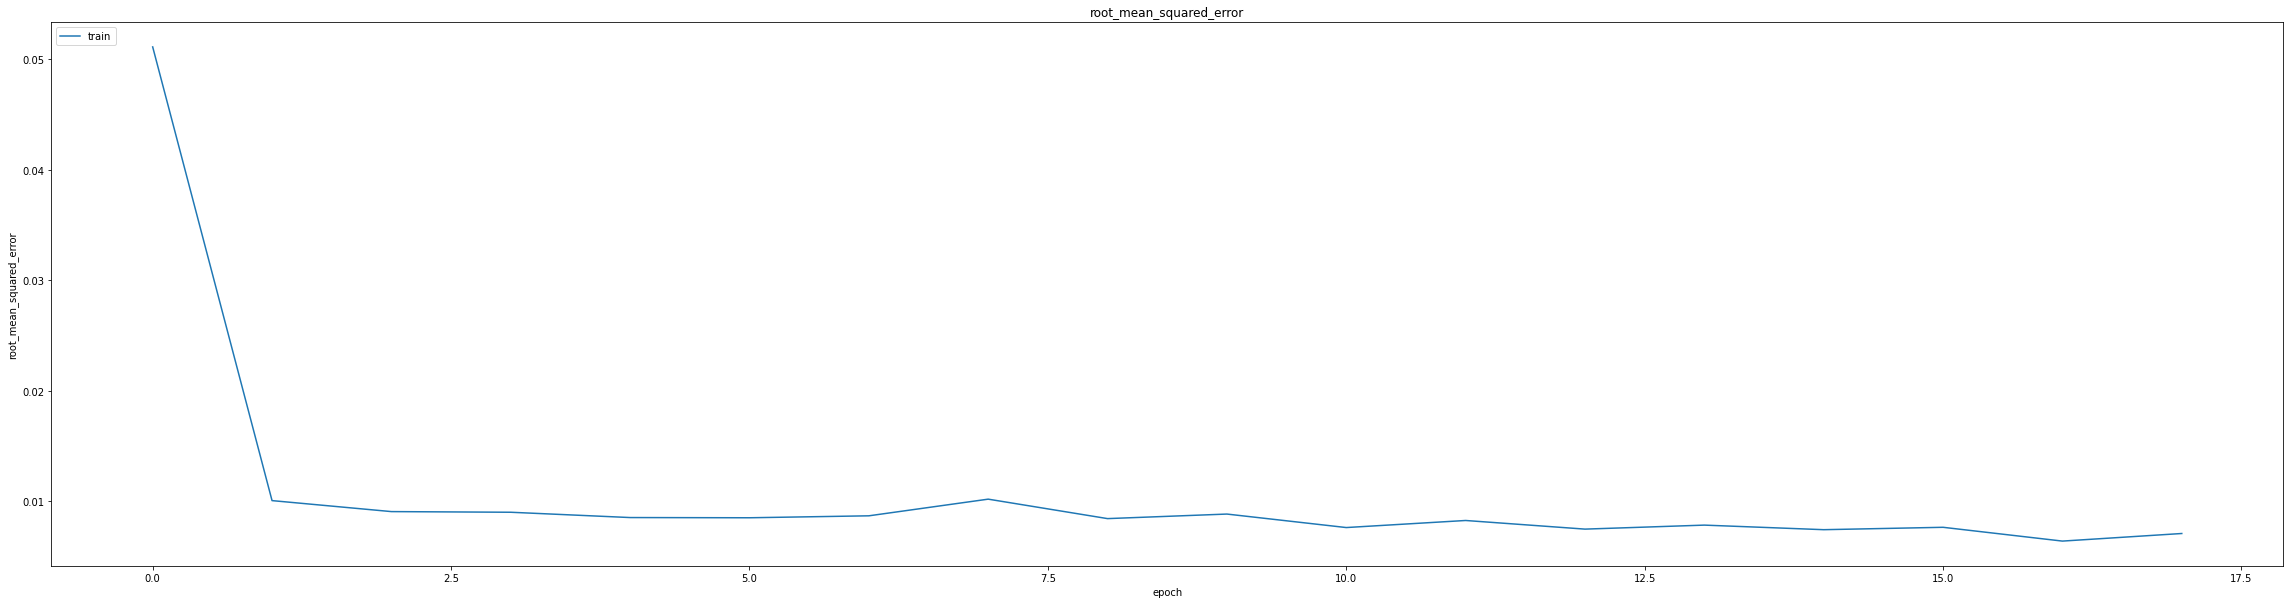

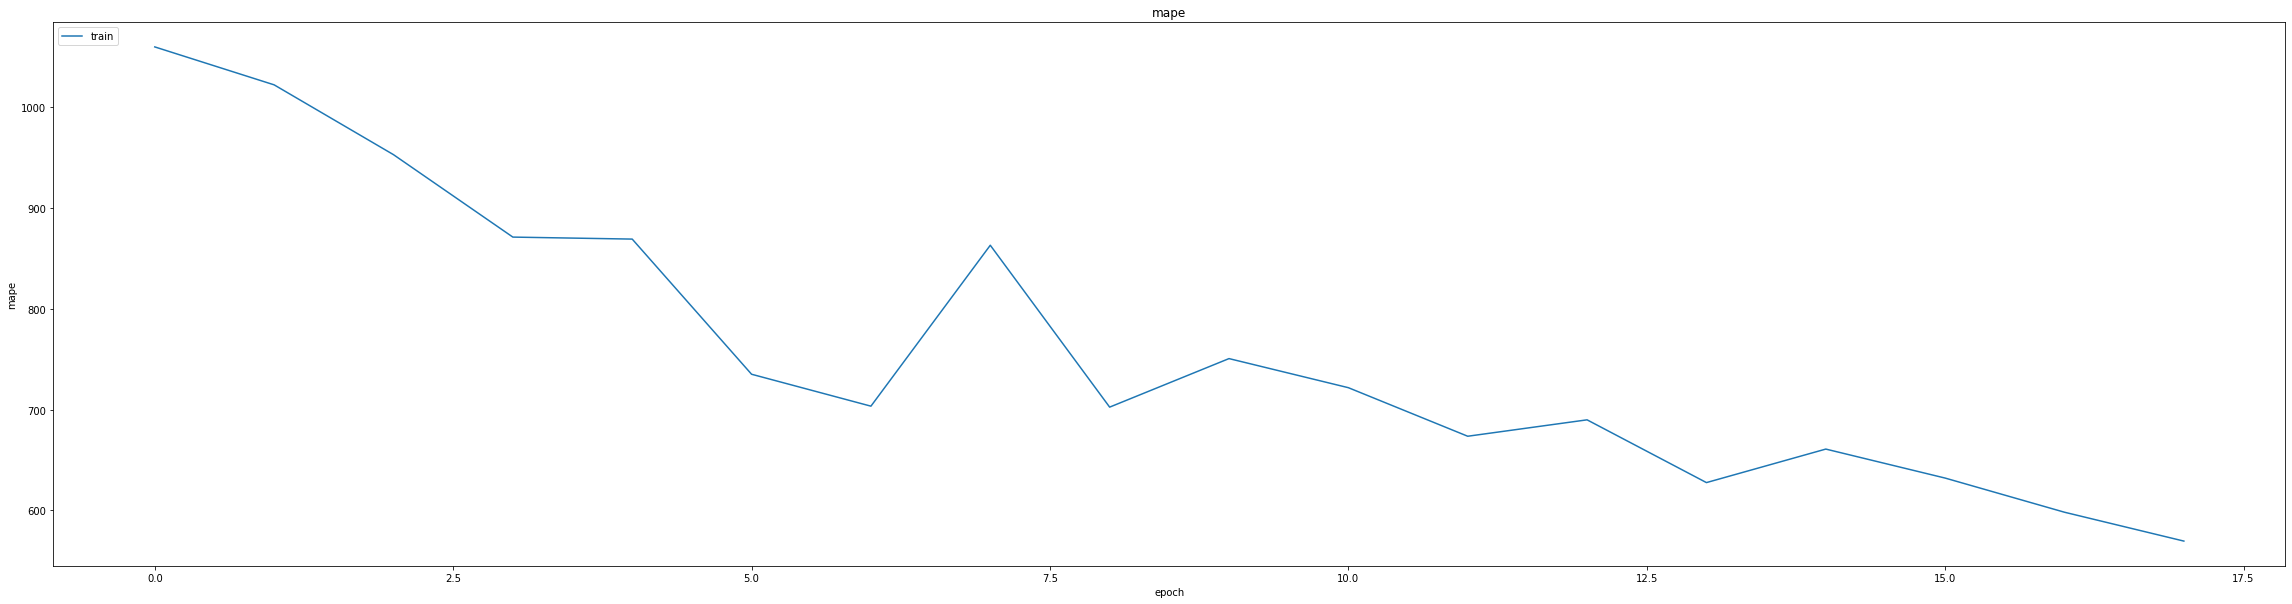

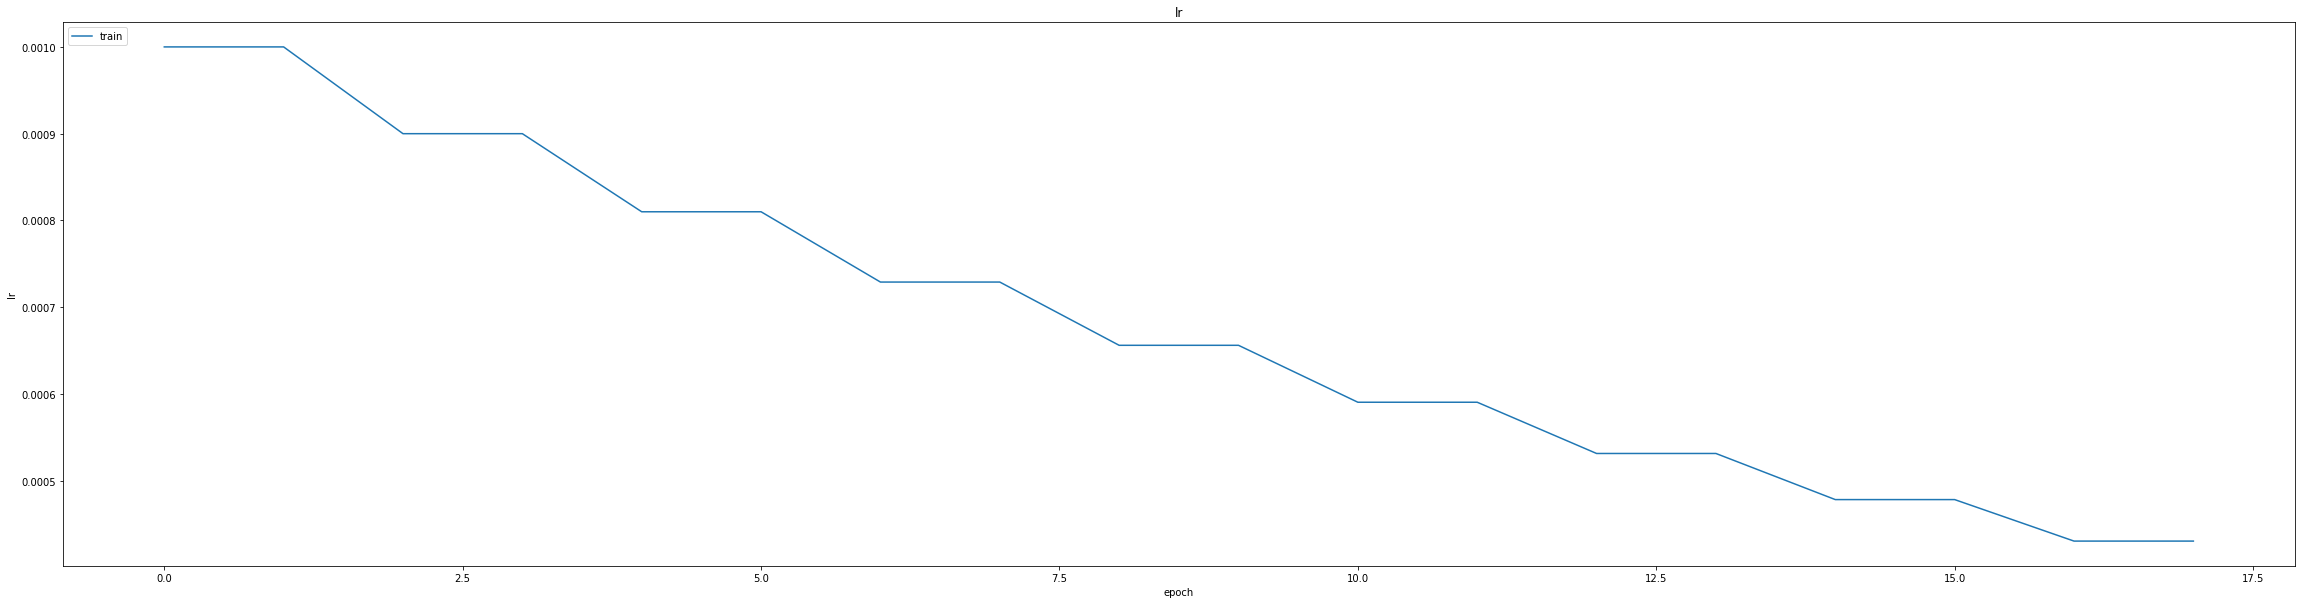

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03860413655638695
0.039701275527477264
464/464 [==============================] - 4s 6ms/step
0.9507621788863891


464/464 [==============================] - 3s 6ms/step


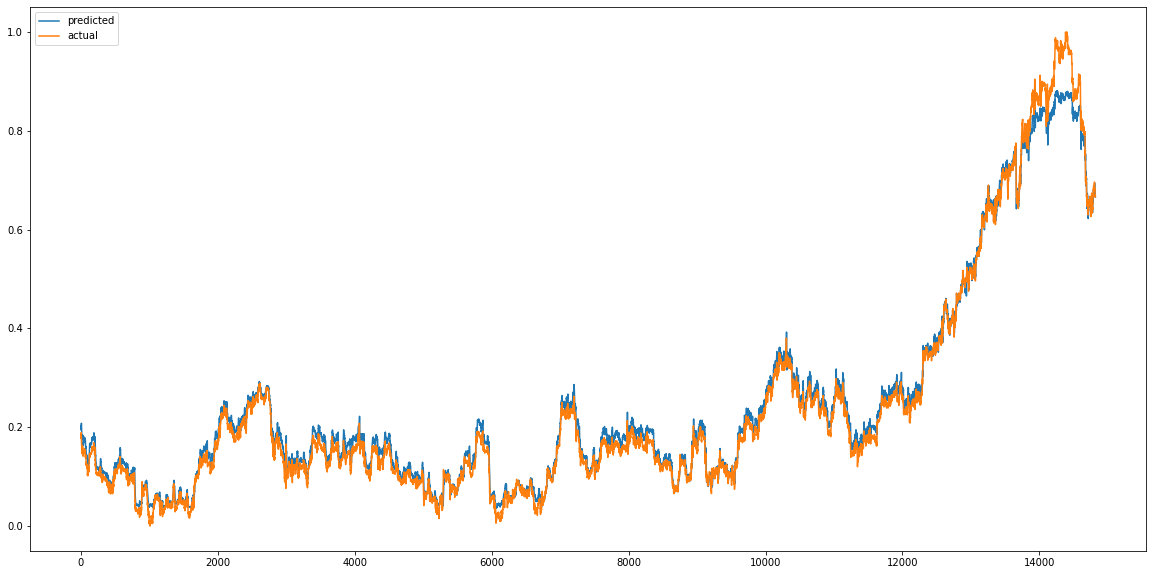

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


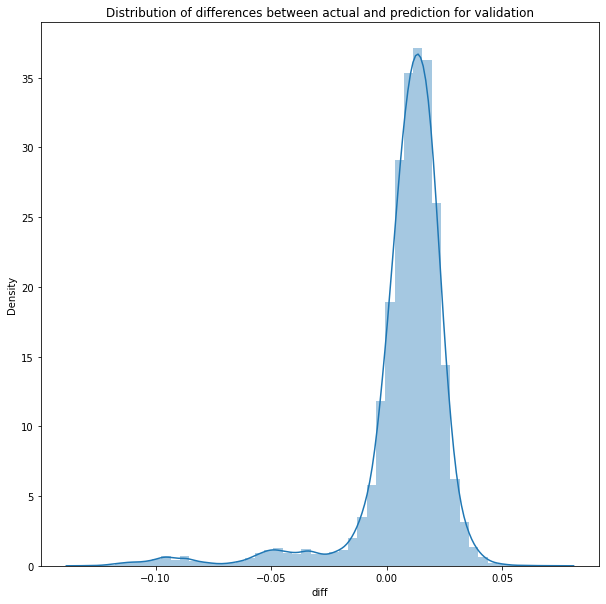

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 7ms/step


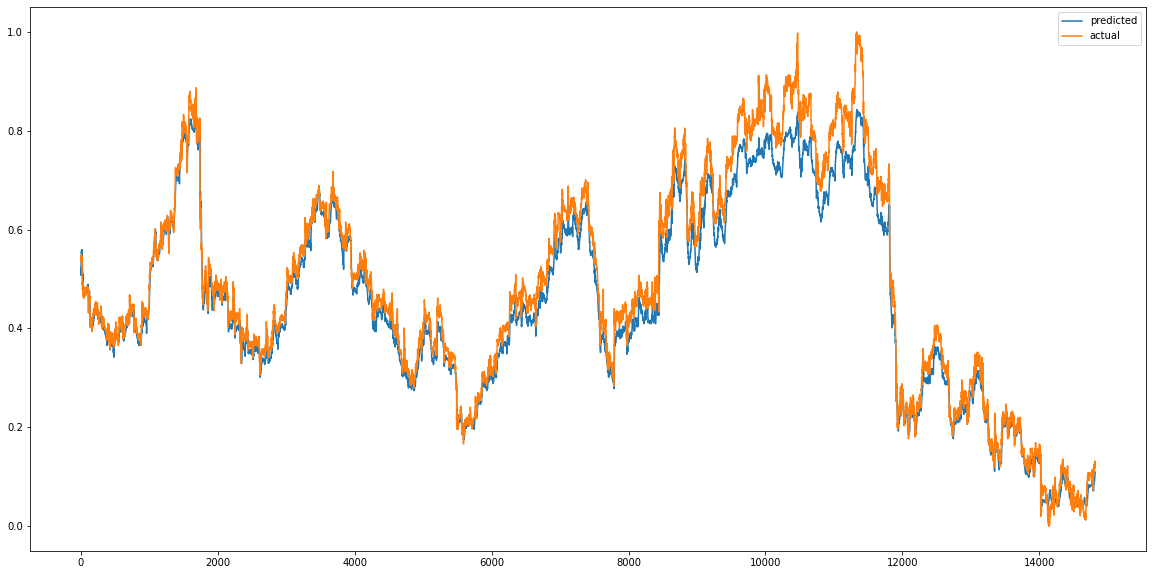

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


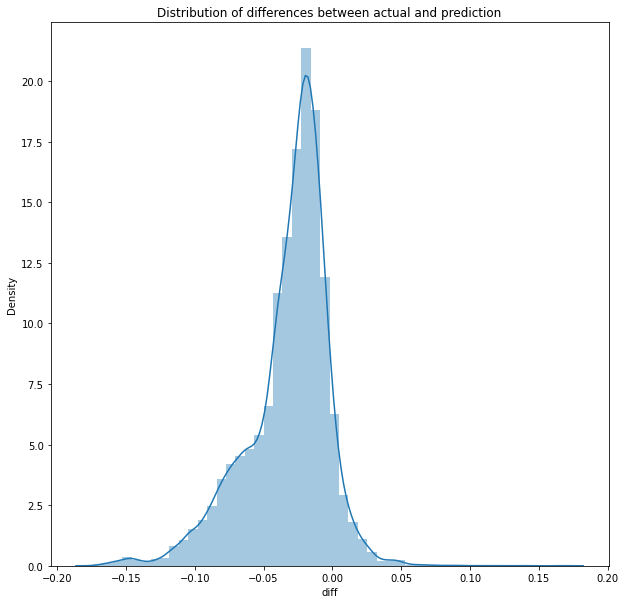

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0019269189851001867
RMSE :  0.04389668535436573
MAE :  0.034041663788536056
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9603136118043764


count    14819.000000
mean        -0.032073
std          0.029971
min         -0.173096
25%         -0.044750
50%         -0.025289
75%         -0.013244
max          0.168951
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 272.5580 - mae: 2.2117 - mse: 272.5580 - root_mean_squared_error: 16.5093 - mape: 12160.6055
Epoch 1: val_mse improved from inf to 0.10717, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 16s 37ms/step - loss: 269.6619 - mae: 2.1905 - mse: 269.6619 - root_mean_squared_error: 16.4214 - mape: 12032.3613 - val_loss: 0.1072 - val_mae: 0.3124 - val_mse: 0.1072 - val_root_mean_squared_error: 0.3274 - val_mape: 32499.7578
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0606 - mae: 0.2118 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 10881.4922
Epoch 2: val_mse improved from 0.10717 to 0.09642, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0606 - mae: 0.2117 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 10797.7676 - val_loss: 0.0964 - val_mae: 0.2952 - val_mse: 0.0964 - val_root_mean_squared_error: 0.3105 - val_mape: 30891.1582
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0578 - mae: 0.2014 - mse: 0.0578 - root_mean_squared_error: 0.2404 - mape: 9295.1680
Epoch 3: val_mse improved from 0.09642 to 0.07897, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0578 - mae: 0.2014 - mse: 0.0578 - root_mean_squared_error: 0.2404 - mape: 9295.1680 - val_loss: 0.0790 - val_mae: 0.2655 - val_mse: 0.0790 - val_root_mean_squared_error: 0.2810 - val_mape: 27504.7695
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1796 - mse: 0.0487 - root_mean_squared_error: 0.2207 - mape: 9175.9336
Epoch 4: val_mse improved from 0.07897 to 0.06796, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0487 - mae: 0.1795 - mse: 0.0487 - root_mean_squared_error: 0.2206 - mape: 9131.4971 - val_loss: 0.0680 - val_mae: 0.2457 - val_mse: 0.0680 - val_root_mean_squared_error: 0.2607 - val_mape: 25312.5020
Epoch 5/75
344/348 [============================>.] - ETA: 0s - loss: 0.0382 - mae: 0.1585 - mse: 0.0382 - root_mean_squared_error: 0.1955 - mape: 10027.4199
Epoch 5: val_mse improved from 0.06796 to 0.06039, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 36ms/step - loss: 0.0382 - mae: 0.1584 - mse: 0.0382 - root_mean_squared_error: 0.1954 - mape: 9921.5156 - val_loss: 0.0604 - val_mae: 0.2314 - val_mse: 0.0604 - val_root_mean_squared_error: 0.2458 - val_mape: 24477.8086
Epoch 6/75
344/348 [============================>.] - ETA: 0s - loss: 0.0275 - mae: 0.1345 - mse: 0.0275 - root_mean_squared_error: 0.1659 - mape: 8991.4639
Epoch 6: val_mse improved from 0.06039 to 0.05081, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0275 - mae: 0.1344 - mse: 0.0275 - root_mean_squared_error: 0.1658 - mape: 8896.5625 - val_loss: 0.0508 - val_mae: 0.2106 - val_mse: 0.0508 - val_root_mean_squared_error: 0.2254 - val_mape: 23544.9160
Epoch 7/75
344/348 [============================>.] - ETA: 0s - loss: 0.0194 - mae: 0.1109 - mse: 0.0194 - root_mean_squared_error: 0.1392 - mape: 9006.5498
Epoch 7: val_mse improved from 0.05081 to 0.04067, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0193 - mae: 0.1107 - mse: 0.0193 - root_mean_squared_error: 0.1390 - mape: 8911.3125 - val_loss: 0.0407 - val_mae: 0.1862 - val_mse: 0.0407 - val_root_mean_squared_error: 0.2017 - val_mape: 22257.6367
Epoch 8/75
343/348 [============================>.] - ETA: 0s - loss: 0.0147 - mae: 0.0944 - mse: 0.0147 - root_mean_squared_error: 0.1213 - mape: 7521.1836
Epoch 8: val_mse improved from 0.04067 to 0.03085, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 36ms/step - loss: 0.0147 - mae: 0.0942 - mse: 0.0147 - root_mean_squared_error: 0.1211 - mape: 7420.1792 - val_loss: 0.0308 - val_mae: 0.1609 - val_mse: 0.0308 - val_root_mean_squared_error: 0.1756 - val_mape: 20901.3828
Epoch 9/75
345/348 [============================>.] - ETA: 0s - loss: 0.0087 - mae: 0.0717 - mse: 0.0087 - root_mean_squared_error: 0.0935 - mape: 6536.3682
Epoch 9: val_mse improved from 0.03085 to 0.01799, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0087 - mae: 0.0716 - mse: 0.0087 - root_mean_squared_error: 0.0934 - mape: 6485.9473 - val_loss: 0.0180 - val_mae: 0.1212 - val_mse: 0.0180 - val_root_mean_squared_error: 0.1341 - val_mape: 17736.5859
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0504 - mse: 0.0048 - root_mean_squared_error: 0.0694 - mape: 5738.7886
Epoch 10: val_mse improved from 0.01799 to 0.01072, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0048 - mae: 0.0504 - mse: 0.0048 - root_mean_squared_error: 0.0694 - mape: 5738.7886 - val_loss: 0.0107 - val_mae: 0.0923 - val_mse: 0.0107 - val_root_mean_squared_error: 0.1036 - val_mape: 15207.1348
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0359 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 4836.8911
Epoch 11: val_mse improved from 0.01072 to 0.00511, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0025 - mae: 0.0359 - mse: 0.0025 - root_mean_squared_error: 0.0503 - mape: 4813.3901 - val_loss: 0.0051 - val_mae: 0.0662 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0715 - val_mape: 11250.4326
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3273.8218
Epoch 12: val_mse improved from 0.00511 to 0.00320, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3248.5225 - val_loss: 0.0032 - val_mae: 0.0532 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 9017.8252
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 9.6076e-04 - mae: 0.0229 - mse: 9.6076e-04 - root_mean_squared_error: 0.0310 - mape: 3003.4937
Epoch 13: val_mse improved from 0.00320 to 0.00262, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 9.6076e-04 - mae: 0.0229 - mse: 9.6076e-04 - root_mean_squared_error: 0.0310 - mape: 3003.4937 - val_loss: 0.0026 - val_mae: 0.0485 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0512 - val_mape: 8066.0269
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 7.7197e-04 - mae: 0.0205 - mse: 7.7197e-04 - root_mean_squared_error: 0.0278 - mape: 2746.2681
Epoch 14: val_mse improved from 0.00262 to 0.00221, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 36ms/step - loss: 7.7197e-04 - mae: 0.0205 - mse: 7.7197e-04 - root_mean_squared_error: 0.0278 - mape: 2746.2681 - val_loss: 0.0022 - val_mae: 0.0445 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 7434.0962
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 6.6236e-04 - mae: 0.0191 - mse: 6.6236e-04 - root_mean_squared_error: 0.0257 - mape: 2538.0566
Epoch 15: val_mse did not improve from 0.00221
348/348 [==============================] - 4s 11ms/step - loss: 6.6236e-04 - mae: 0.0191 - mse: 6.6236e-04 - root_mean_squared_error: 0.0257 - mape: 2538.0566 - val_loss: 0.0029 - val_mae: 0.0527 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0543 - val_mape: 6927.1377
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 5.7179e-04 - mae: 0.0178 - mse: 5.7179e-04 - root_mean_squared_error: 0.0239 - mape: 2369.6919
Epoch 16: val_mse did not improve from 0.00221
348/348 [================

348/348 [==============================] - 12s 33ms/step - loss: 3.2357e-04 - mae: 0.0137 - mse: 3.2357e-04 - root_mean_squared_error: 0.0180 - mape: 1814.0616 - val_loss: 0.0021 - val_mae: 0.0447 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 4826.6958
Epoch 23/75
344/348 [============================>.] - ETA: 0s - loss: 2.9825e-04 - mae: 0.0131 - mse: 2.9825e-04 - root_mean_squared_error: 0.0173 - mape: 1474.7140
Epoch 23: val_mse did not improve from 0.00209
348/348 [==============================] - 4s 11ms/step - loss: 2.9831e-04 - mae: 0.0131 - mse: 2.9831e-04 - root_mean_squared_error: 0.0173 - mape: 1459.1105 - val_loss: 0.0026 - val_mae: 0.0498 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0508 - val_mape: 4804.6772
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 2.6763e-04 - mae: 0.0125 - mse: 2.6763e-04 - root_mean_squared_error: 0.0164 - mape: 1796.8553
Epoch 24: val_mse did not improve from 0.00209
348/348 [================

348/348 [==============================] - 12s 35ms/step - loss: 1.7203e-04 - mae: 0.0102 - mse: 1.7203e-04 - root_mean_squared_error: 0.0131 - mape: 1103.9233 - val_loss: 0.0021 - val_mae: 0.0447 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 3916.3369
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 1.6026e-04 - mae: 0.0098 - mse: 1.6026e-04 - root_mean_squared_error: 0.0127 - mape: 1317.5929
Epoch 30: val_mse did not improve from 0.00209
348/348 [==============================] - 5s 15ms/step - loss: 1.6023e-04 - mae: 0.0098 - mse: 1.6023e-04 - root_mean_squared_error: 0.0127 - mape: 1314.9644 - val_loss: 0.0022 - val_mae: 0.0457 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 4021.4473
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 1.4731e-04 - mae: 0.0094 - mse: 1.4731e-04 - root_mean_squared_error: 0.0121 - mape: 1051.5945
Epoch 31: val_mse improved from 0.00209 to 0.00190, saving model to /con

348/348 [==============================] - 12s 35ms/step - loss: 1.4731e-04 - mae: 0.0094 - mse: 1.4731e-04 - root_mean_squared_error: 0.0121 - mape: 1051.5945 - val_loss: 0.0019 - val_mae: 0.0426 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 3857.0742
Epoch 32/75
344/348 [============================>.] - ETA: 0s - loss: 1.3444e-04 - mae: 0.0090 - mse: 1.3444e-04 - root_mean_squared_error: 0.0116 - mape: 931.5035
Epoch 32: val_mse did not improve from 0.00190
348/348 [==============================] - 4s 11ms/step - loss: 1.3431e-04 - mae: 0.0090 - mse: 1.3431e-04 - root_mean_squared_error: 0.0116 - mape: 921.6431 - val_loss: 0.0023 - val_mae: 0.0467 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 4215.1309
Epoch 33/75
346/348 [============================>.] - ETA: 0s - loss: 1.2684e-04 - mae: 0.0088 - mse: 1.2684e-04 - root_mean_squared_error: 0.0113 - mape: 1080.1575
Epoch 33: val_mse improved from 0.00190 to 0.00175, saving model to /conte

348/348 [==============================] - 12s 34ms/step - loss: 1.2685e-04 - mae: 0.0088 - mse: 1.2685e-04 - root_mean_squared_error: 0.0113 - mape: 1074.9167 - val_loss: 0.0017 - val_mae: 0.0409 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 3850.4087
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 1.2318e-04 - mae: 0.0086 - mse: 1.2318e-04 - root_mean_squared_error: 0.0111 - mape: 969.1544
Epoch 34: val_mse did not improve from 0.00175
348/348 [==============================] - 4s 12ms/step - loss: 1.2309e-04 - mae: 0.0086 - mse: 1.2309e-04 - root_mean_squared_error: 0.0111 - mape: 961.6625 - val_loss: 0.0021 - val_mae: 0.0444 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0454 - val_mape: 3971.9282
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 1.1110e-04 - mae: 0.0082 - mse: 1.1110e-04 - root_mean_squared_error: 0.0105 - mape: 867.4216
Epoch 35: val_mse improved from 0.00175 to 0.00175, saving model to /conten

348/348 [==============================] - 12s 36ms/step - loss: 1.1106e-04 - mae: 0.0082 - mse: 1.1106e-04 - root_mean_squared_error: 0.0105 - mape: 865.6913 - val_loss: 0.0017 - val_mae: 0.0407 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 3623.9624
Epoch 36/75
343/348 [============================>.] - ETA: 0s - loss: 1.0615e-04 - mae: 0.0080 - mse: 1.0615e-04 - root_mean_squared_error: 0.0103 - mape: 924.9072
Epoch 36: val_mse did not improve from 0.00175
348/348 [==============================] - 4s 11ms/step - loss: 1.0601e-04 - mae: 0.0080 - mse: 1.0601e-04 - root_mean_squared_error: 0.0103 - mape: 912.4612 - val_loss: 0.0021 - val_mae: 0.0453 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 3714.5132
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 9.8959e-05 - mae: 0.0077 - mse: 9.8959e-05 - root_mean_squared_error: 0.0099 - mape: 758.9908
Epoch 37: val_mse did not improve from 0.00175
348/348 [====================

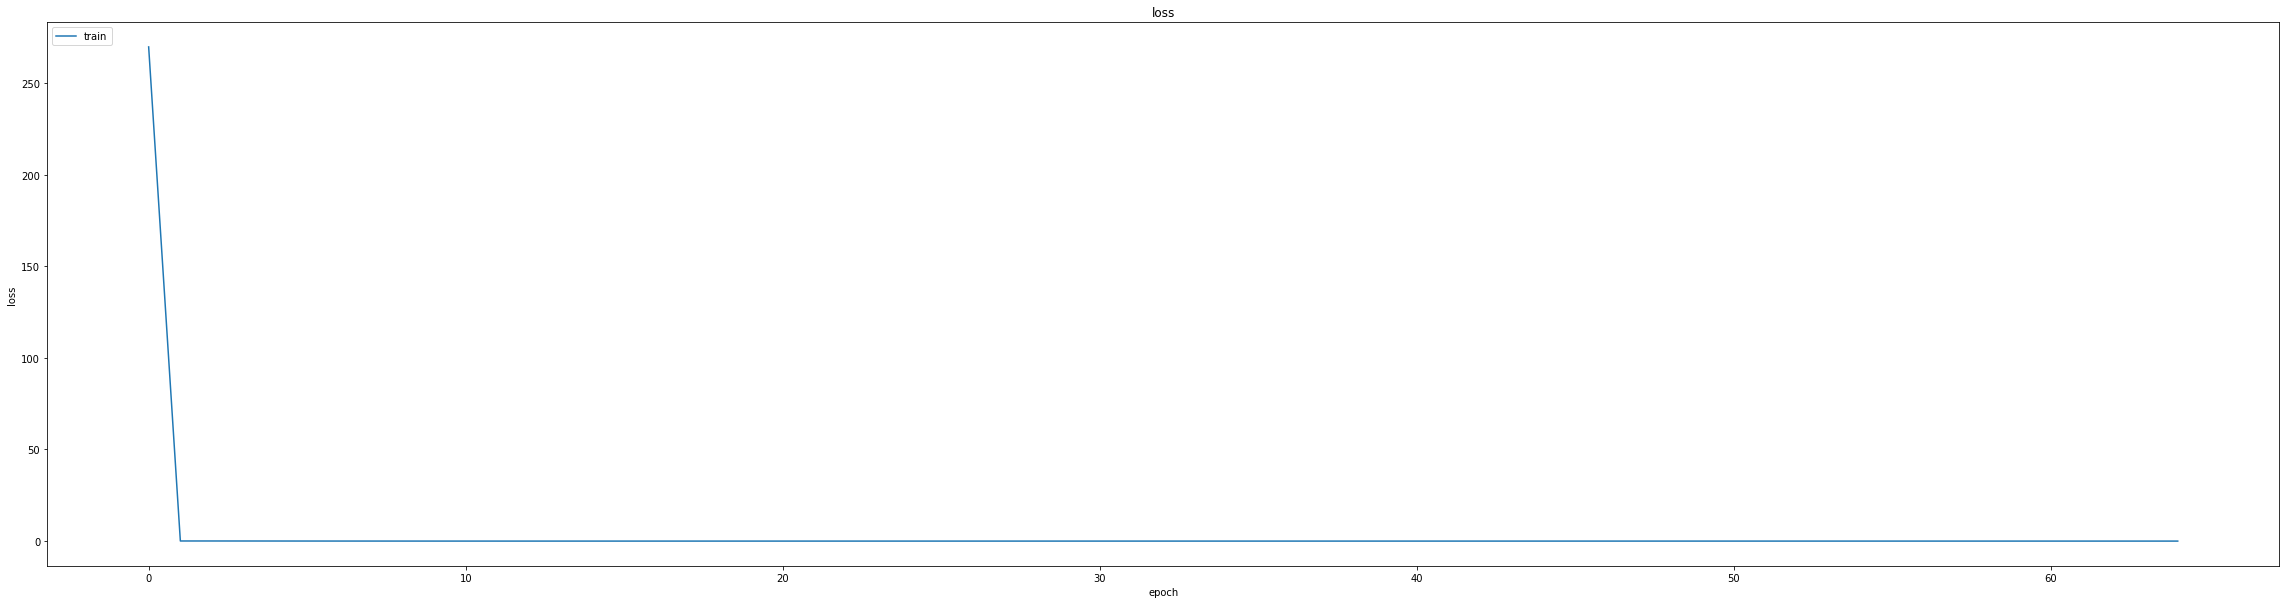

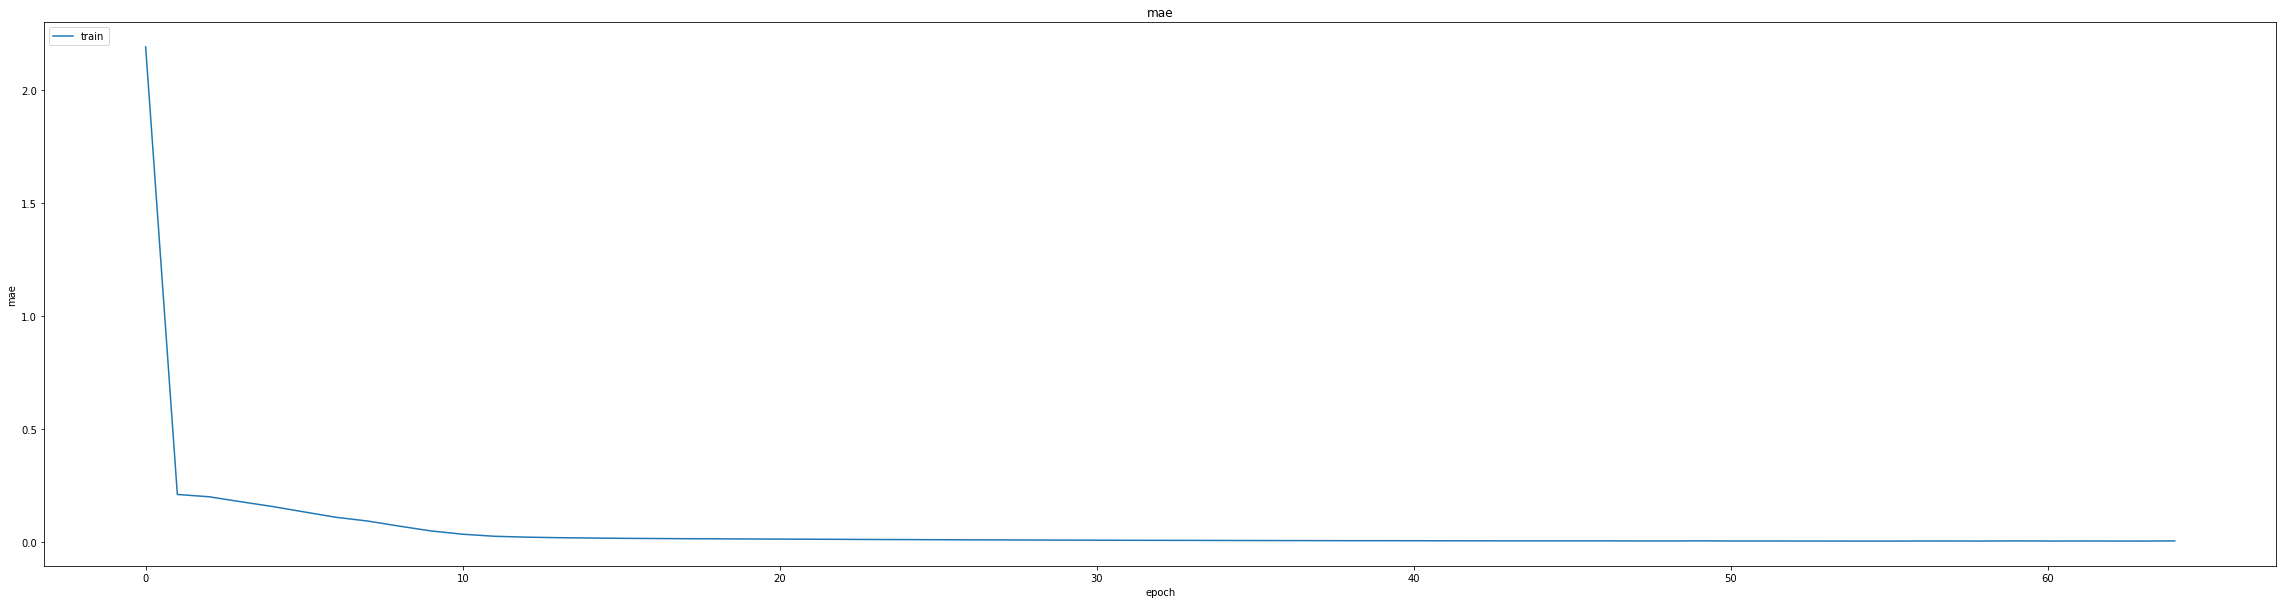

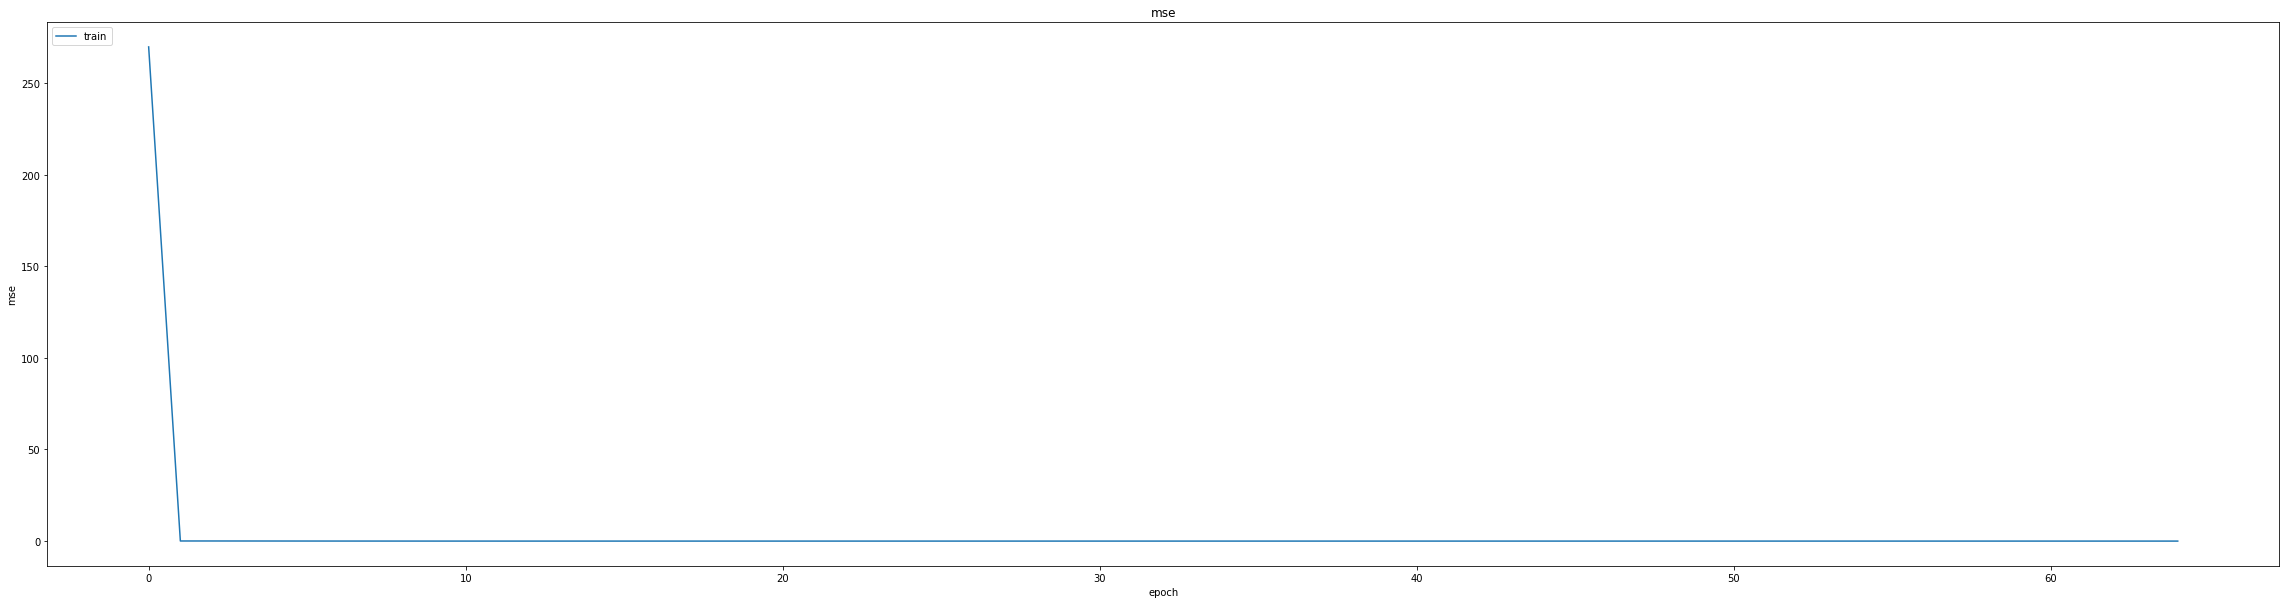

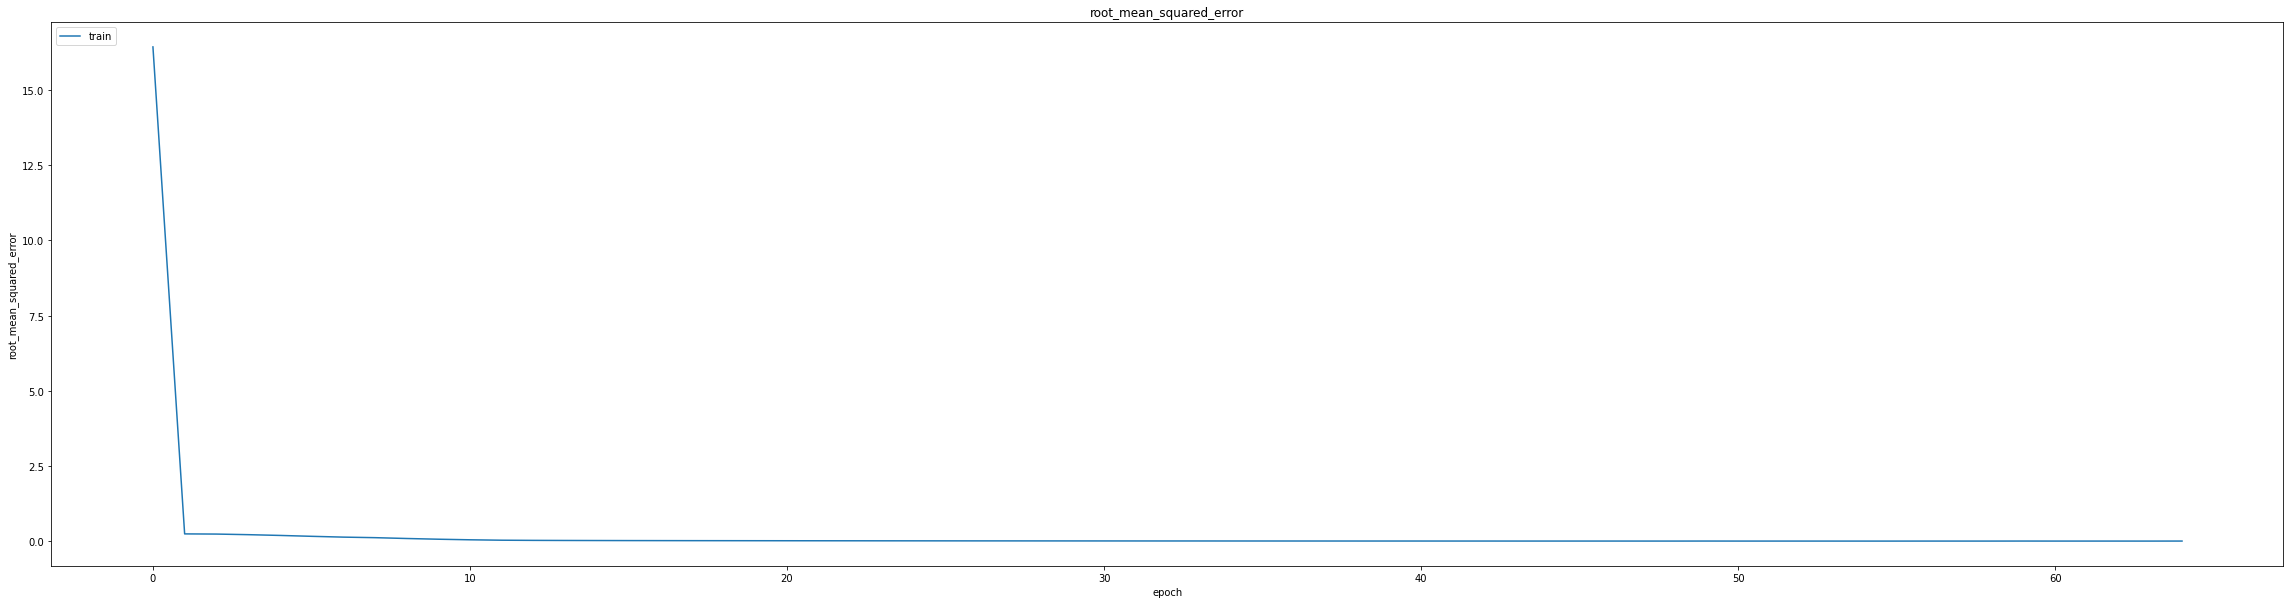

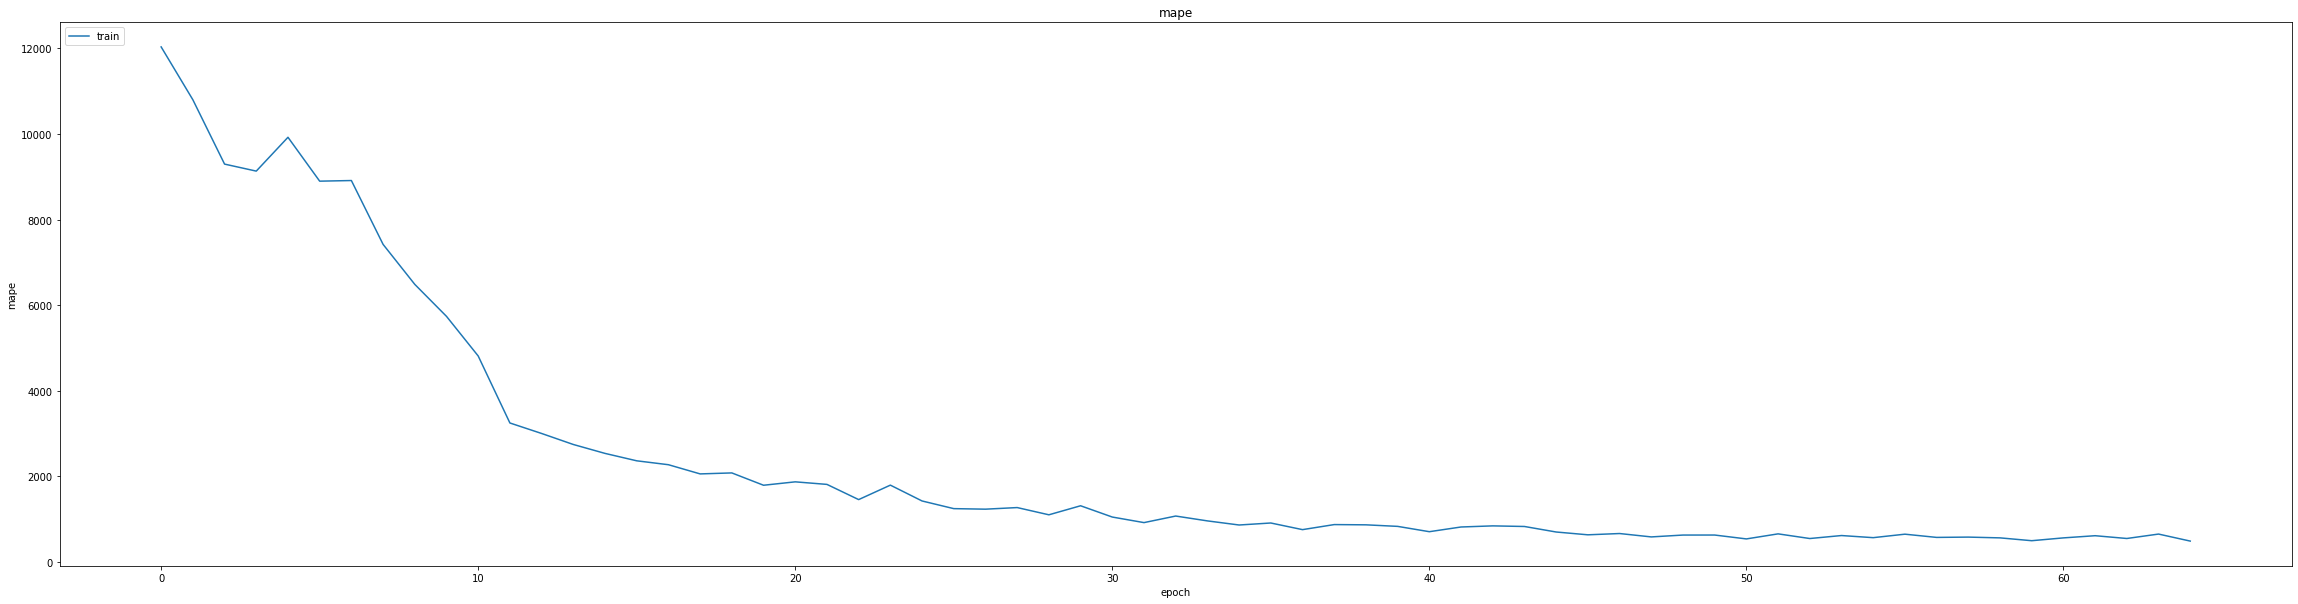

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.040689826011657715
0.041775189340114594
464/464 [==============================] - 2s 4ms/step
0.9513821172883812


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0151 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 2259.3586
Epoch 1: val_mse improved from 0.00175 to 0.00113, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 17s 37ms/step - loss: 0.0010 - mae: 0.0150 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 2248.3567 - val_loss: 0.0011 - val_mae: 0.0313 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 3729.9460 - lr: 0.0010
Epoch 2/25
343/348 [============================>.] - ETA: 0s - loss: 9.6884e-05 - mae: 0.0076 - mse: 9.6884e-05 - root_mean_squared_error: 0.0098 - mape: 913.3127
Epoch 2: val_mse did not improve from 0.00113
348/348 [==============================] - 4s 11ms/step - loss: 9.6801e-05 - mae: 0.0076 - mse: 9.6801e-05 - root_mean_squared_error: 0.0098 - mape: 901.0168 - val_loss: 0.0012 - val_mae: 0.0313 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 3029.4092 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 8.0097e-05 - mae: 0.0069 - mse: 8.0097e-05 - root_mean_squared_error: 0.0089 - mape: 776.6031
Epoch 3: val_mse did not

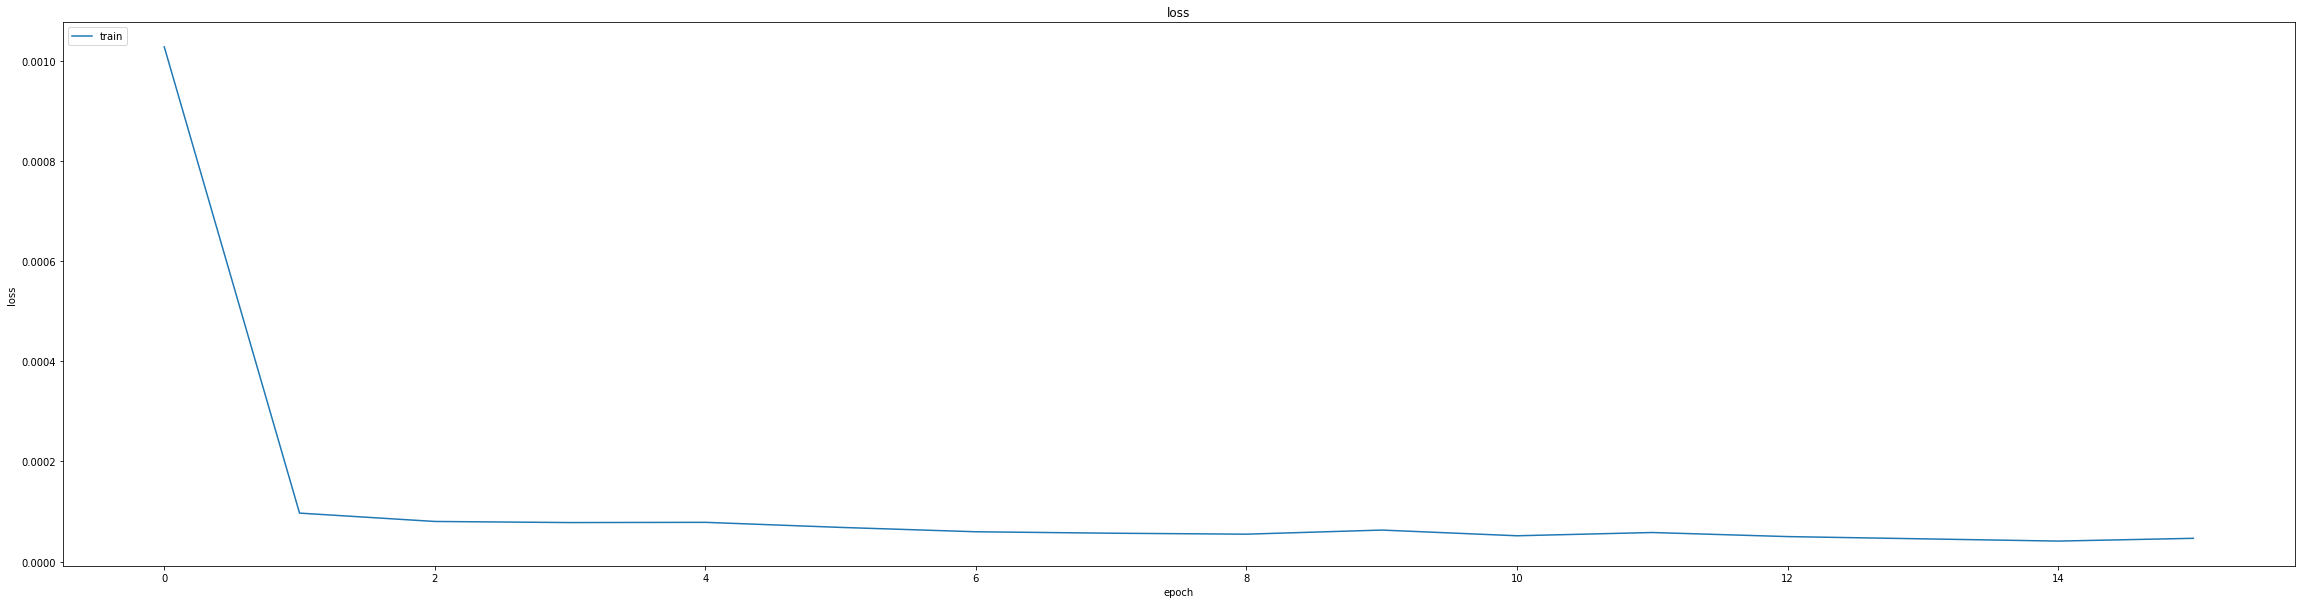

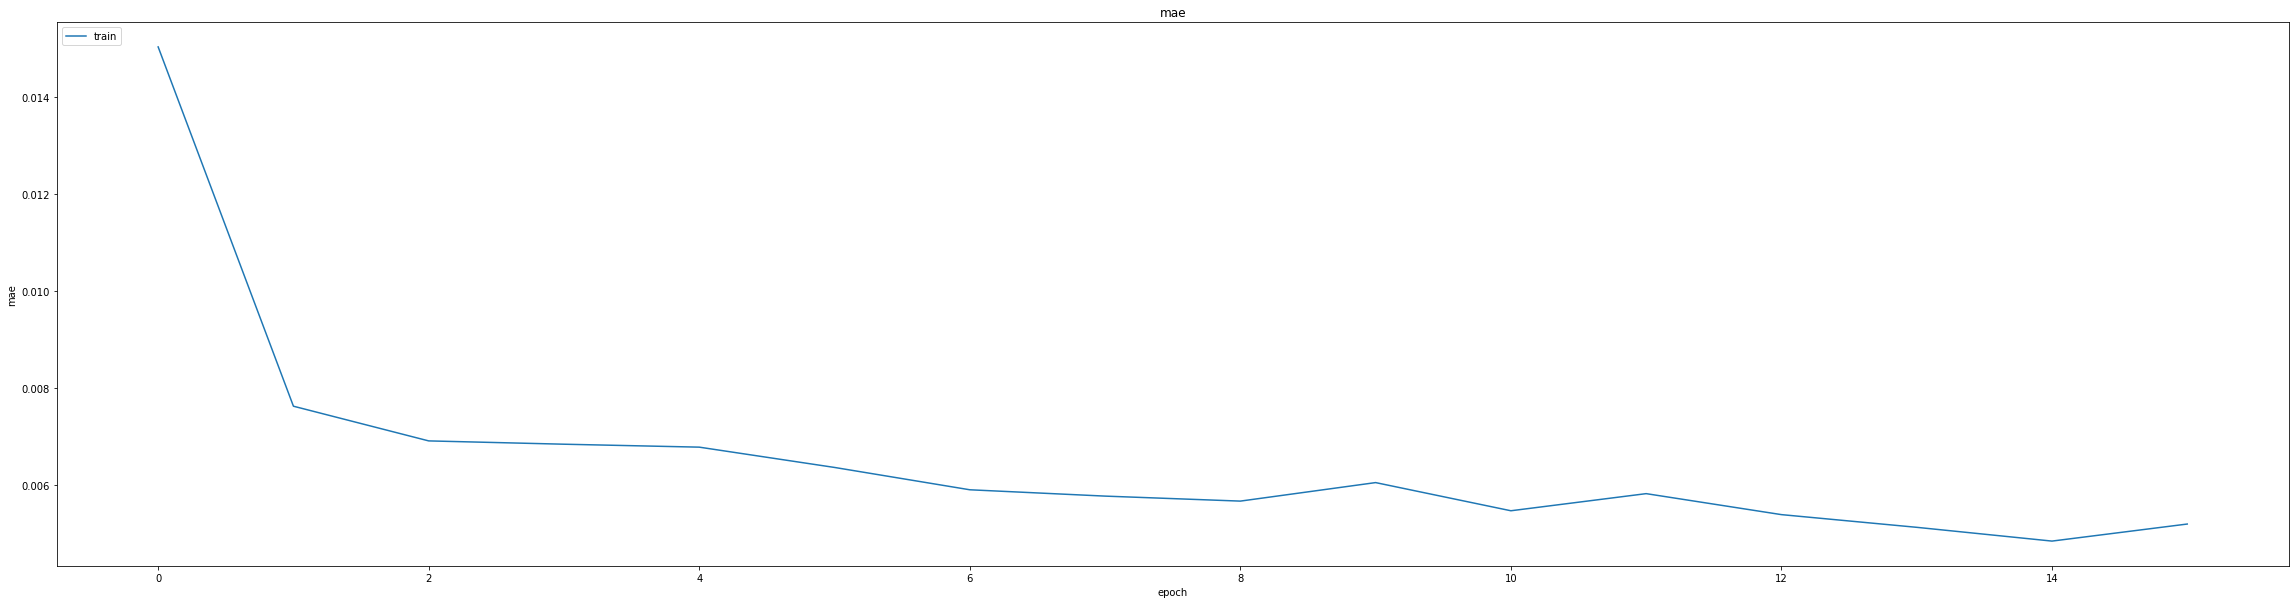

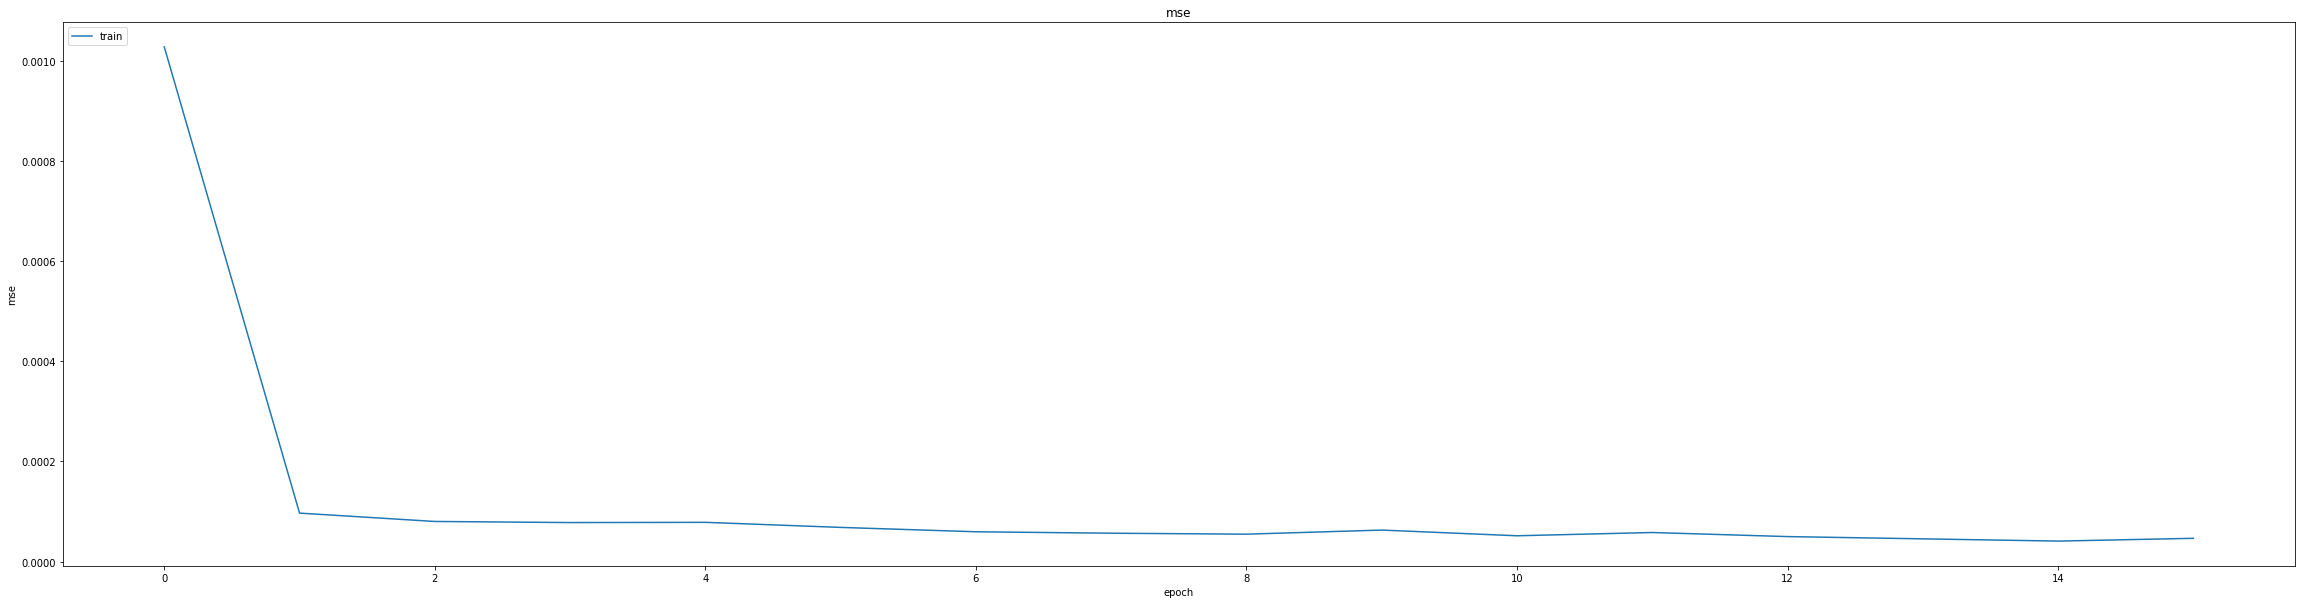

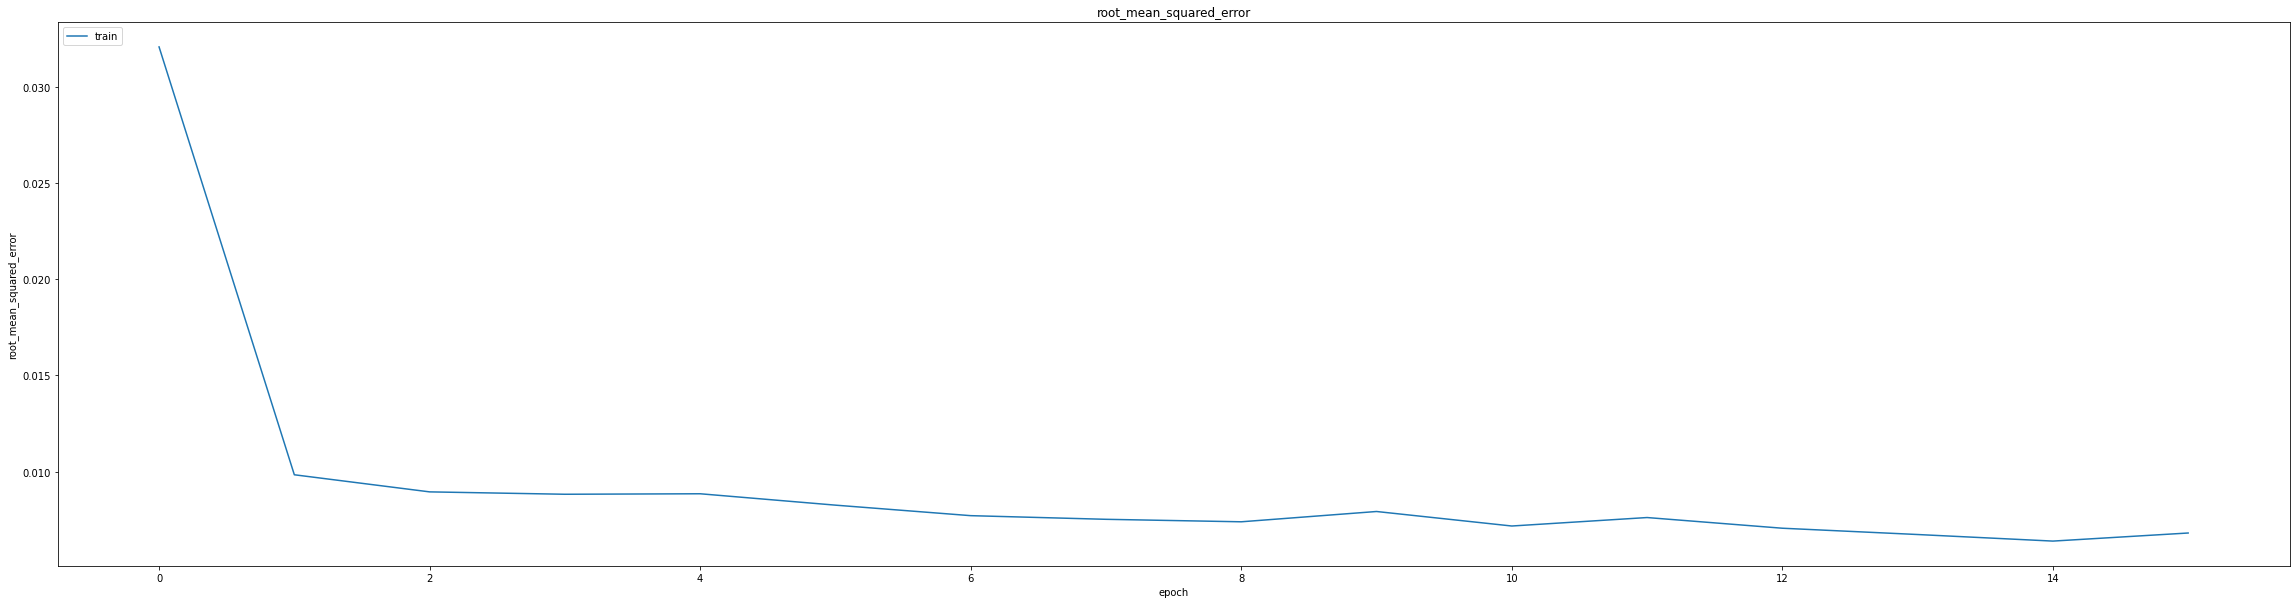

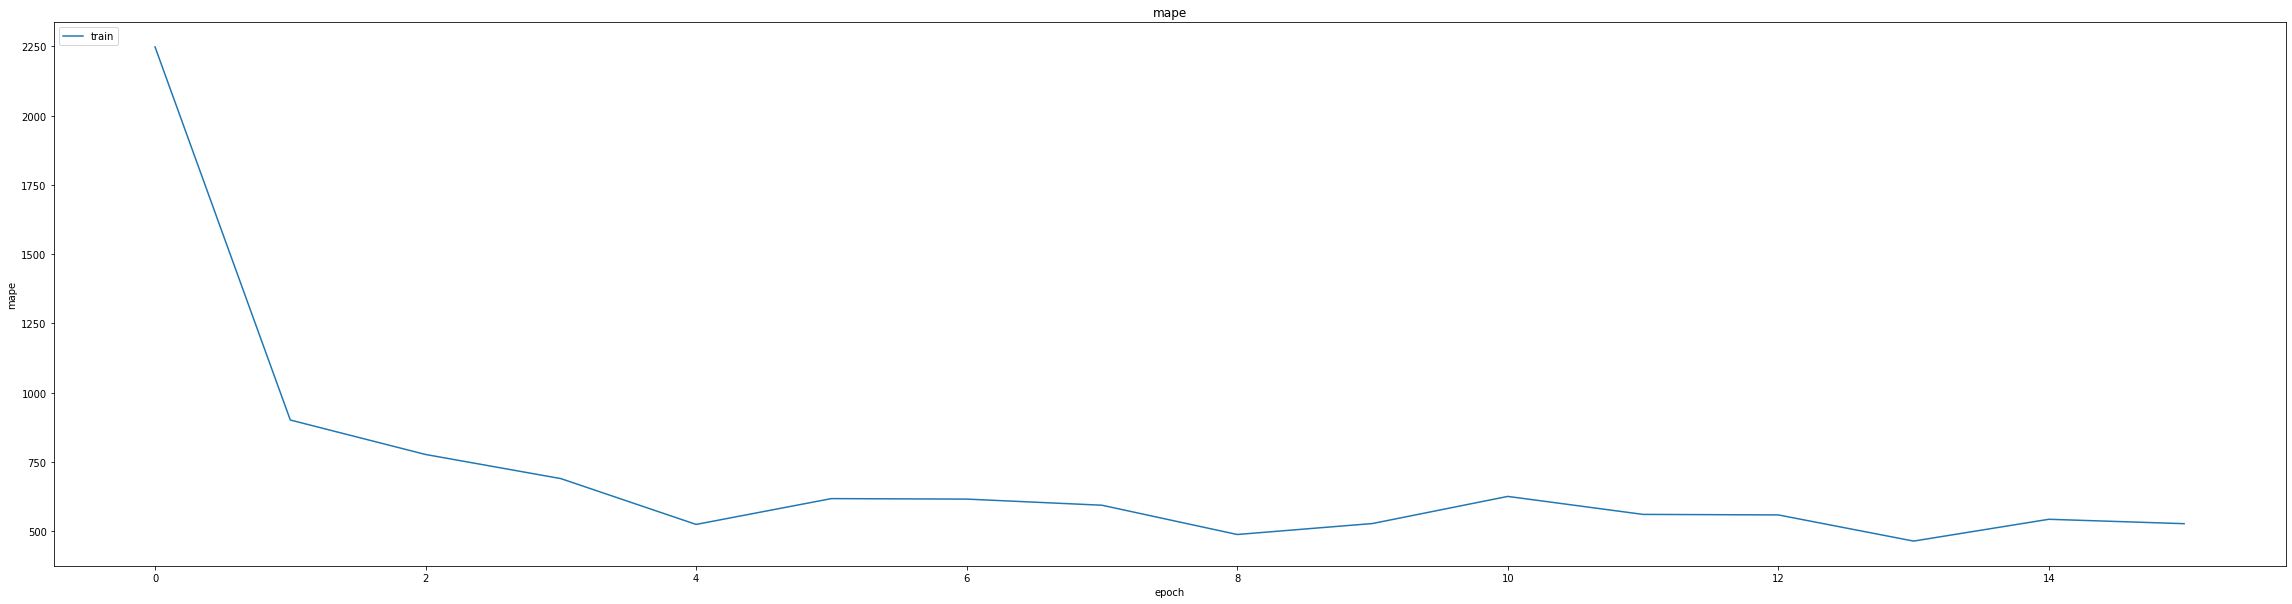

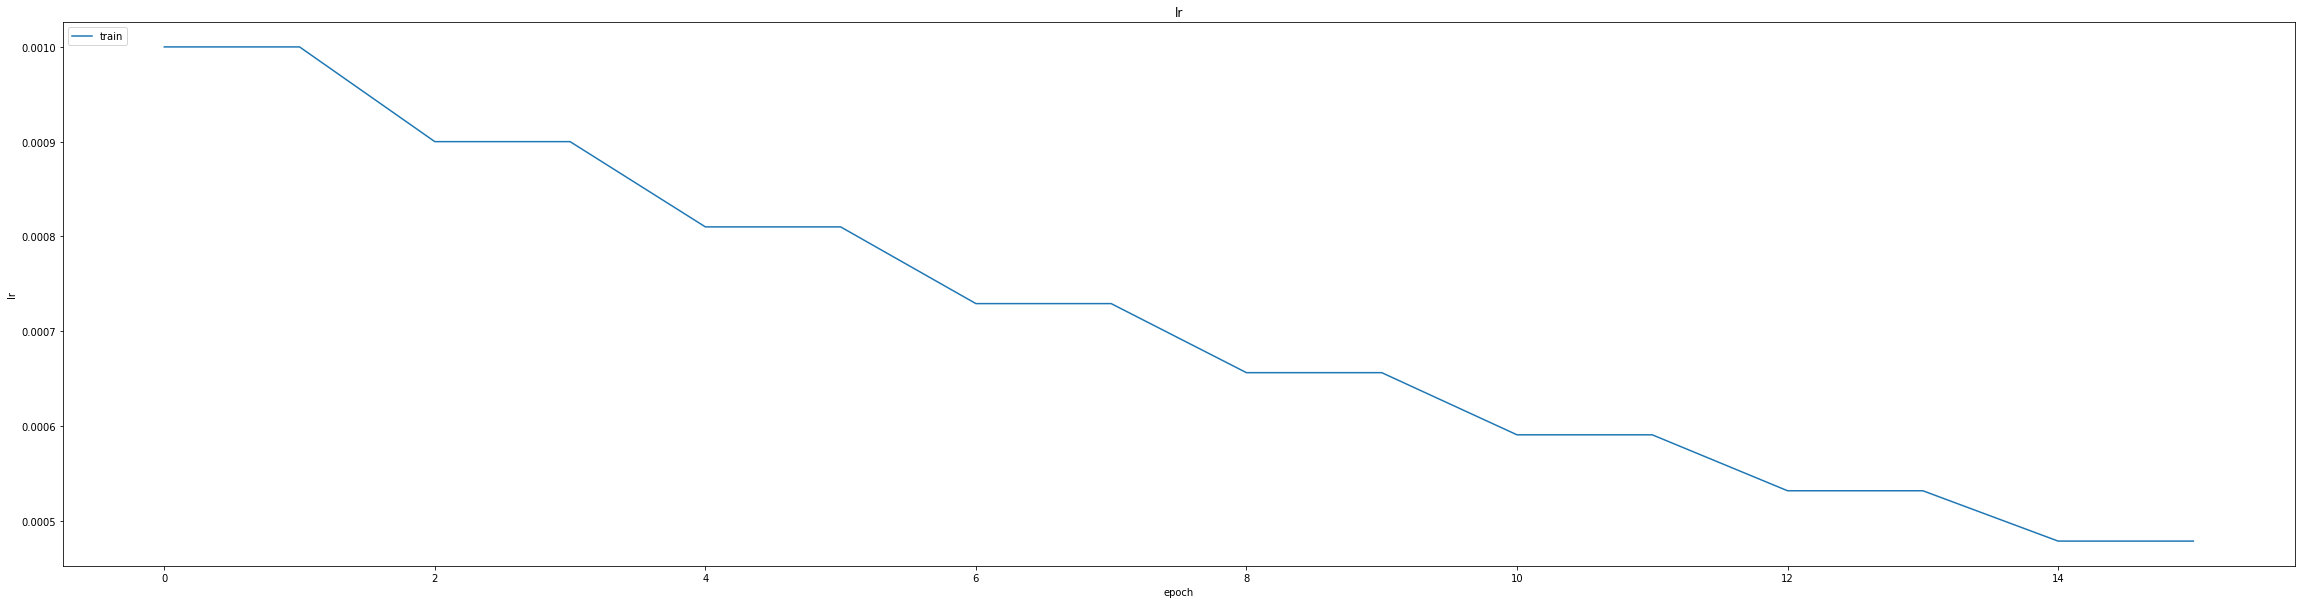

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.031252872198820114
0.033656079322099686
464/464 [==============================] - 2s 4ms/step
0.9633225812247714


464/464 [==============================] - 2s 4ms/step


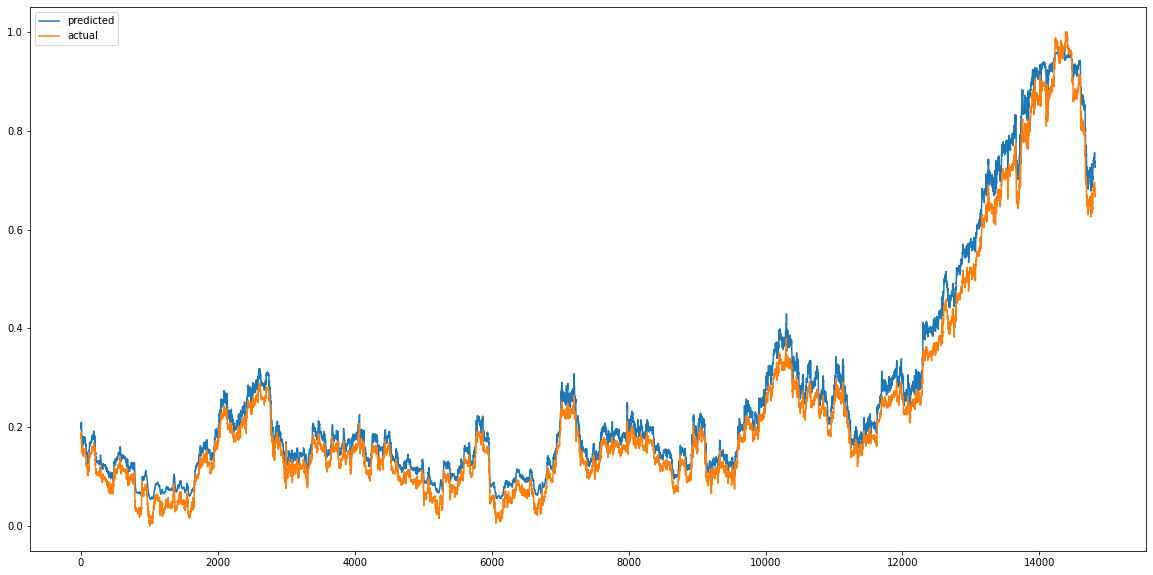

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


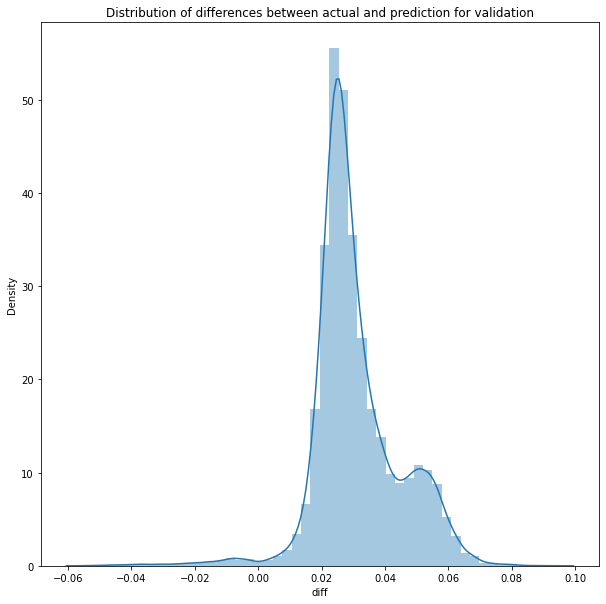

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


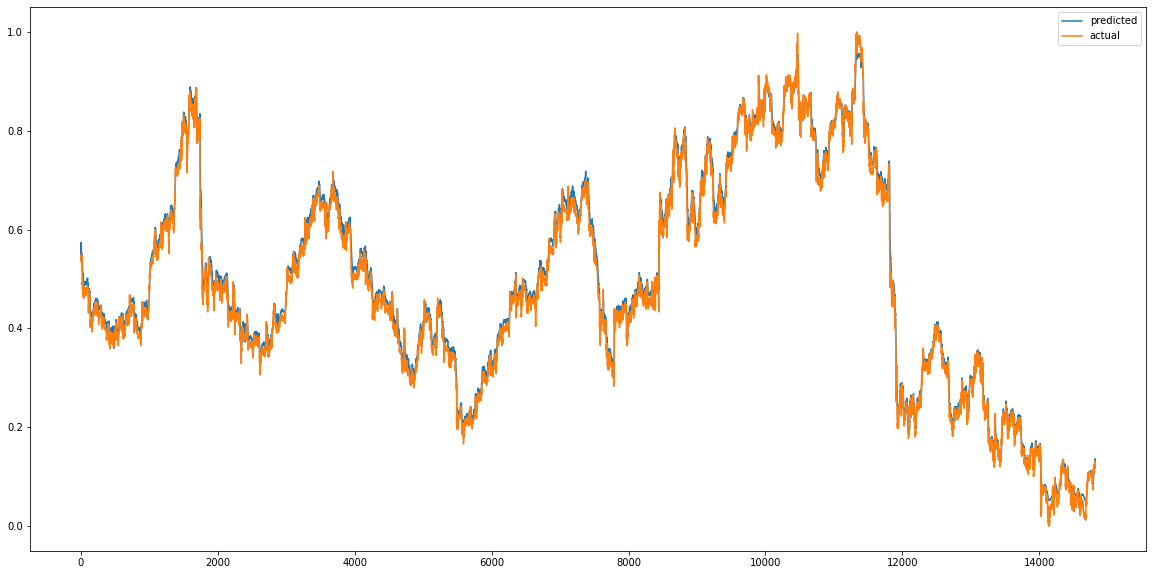

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


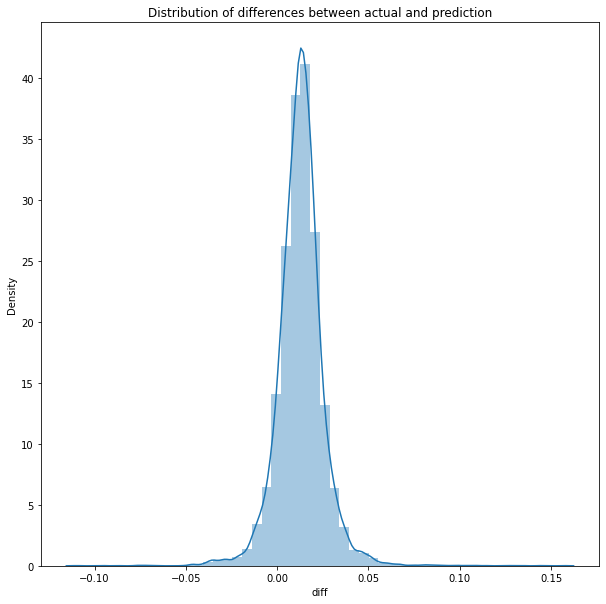

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00032629417311667646
RMSE :  0.01806361461935779
MAE :  0.014749782985350696
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9932797189057502


count    14819.000000
mean         0.012813
std          0.012733
min         -0.109842
25%          0.006236
50%          0.012939
75%          0.019195
max          0.156727
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 237.0979 - mae: 2.0184 - mse: 237.0979 - root_mean_squared_error: 15.3980 - mape: 1857.1833
Epoch 1: val_mse improved from inf to 0.00525, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 15s 33ms/step - loss: 234.5781 - mae: 1.9975 - mse: 234.5781 - root_mean_squared_error: 15.3159 - mape: 1837.6514 - val_loss: 0.0052 - val_mae: 0.0613 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0725 - val_mape: 8723.9580
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0040 - mae: 0.0467 - mse: 0.0040 - root_mean_squared_error: 0.0635 - mape: 2083.3369
Epoch 2: val_mse improved from 0.00525 to 0.00458, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0040 - mae: 0.0467 - mse: 0.0040 - root_mean_squared_error: 0.0635 - mape: 2073.2625 - val_loss: 0.0046 - val_mae: 0.0539 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0677 - val_mape: 8183.2529
Epoch 3/75
343/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0402 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 2160.8611
Epoch 3: val_mse improved from 0.00458 to 0.00392, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0030 - mae: 0.0402 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 2131.8669 - val_loss: 0.0039 - val_mae: 0.0500 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0626 - val_mape: 7946.2876
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0358 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 2032.8760
Epoch 4: val_mse improved from 0.00392 to 0.00306, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0023 - mae: 0.0358 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 2032.8760 - val_loss: 0.0031 - val_mae: 0.0445 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 7605.0259
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 1853.0139
Epoch 5: val_mse improved from 0.00306 to 0.00180, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0016 - mae: 0.0300 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 1849.3397 - val_loss: 0.0018 - val_mae: 0.0341 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 6872.8081
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 9.5612e-04 - mae: 0.0235 - mse: 9.5612e-04 - root_mean_squared_error: 0.0309 - mape: 1772.2775
Epoch 6: val_mse improved from 0.00180 to 0.00119, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 9.5612e-04 - mae: 0.0235 - mse: 9.5612e-04 - root_mean_squared_error: 0.0309 - mape: 1772.2775 - val_loss: 0.0012 - val_mae: 0.0275 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 6202.4141
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 6.7633e-04 - mae: 0.0199 - mse: 6.7633e-04 - root_mean_squared_error: 0.0260 - mape: 1974.1729
Epoch 7: val_mse improved from 0.00119 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 6.7609e-04 - mae: 0.0199 - mse: 6.7609e-04 - root_mean_squared_error: 0.0260 - mape: 1964.6016 - val_loss: 8.3281e-04 - val_mae: 0.0227 - val_mse: 8.3281e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 5777.9922
Epoch 8/75
344/348 [============================>.] - ETA: 0s - loss: 5.4954e-04 - mae: 0.0180 - mse: 5.4954e-04 - root_mean_squared_error: 0.0234 - mape: 1787.9788
Epoch 8: val_mse improved from 0.00083 to 0.00067, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 5.4900e-04 - mae: 0.0179 - mse: 5.4900e-04 - root_mean_squared_error: 0.0234 - mape: 1769.0410 - val_loss: 6.7159e-04 - val_mae: 0.0205 - val_mse: 6.7159e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 5452.2344
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 4.7438e-04 - mae: 0.0167 - mse: 4.7438e-04 - root_mean_squared_error: 0.0218 - mape: 1780.7109
Epoch 9: val_mse improved from 0.00067 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 4.7402e-04 - mae: 0.0167 - mse: 4.7402e-04 - root_mean_squared_error: 0.0218 - mape: 1777.1572 - val_loss: 6.2361e-04 - val_mae: 0.0197 - val_mse: 6.2361e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 5119.9077
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 4.2100e-04 - mae: 0.0157 - mse: 4.2100e-04 - root_mean_squared_error: 0.0205 - mape: 1587.8826
Epoch 10: val_mse improved from 0.00062 to 0.00055, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 4.2100e-04 - mae: 0.0157 - mse: 4.2100e-04 - root_mean_squared_error: 0.0205 - mape: 1587.8826 - val_loss: 5.5323e-04 - val_mae: 0.0185 - val_mse: 5.5323e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 4791.2520
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 3.7607e-04 - mae: 0.0148 - mse: 3.7607e-04 - root_mean_squared_error: 0.0194 - mape: 1637.9052
Epoch 11: val_mse improved from 0.00055 to 0.00048, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 3.7619e-04 - mae: 0.0148 - mse: 3.7619e-04 - root_mean_squared_error: 0.0194 - mape: 1629.9475 - val_loss: 4.7671e-04 - val_mae: 0.0171 - val_mse: 4.7671e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 4522.8345
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 3.4652e-04 - mae: 0.0141 - mse: 3.4652e-04 - root_mean_squared_error: 0.0186 - mape: 1519.8755
Epoch 12: val_mse improved from 0.00048 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 3.4648e-04 - mae: 0.0141 - mse: 3.4648e-04 - root_mean_squared_error: 0.0186 - mape: 1516.8457 - val_loss: 4.2521e-04 - val_mae: 0.0163 - val_mse: 4.2521e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 4299.4551
Epoch 13/75
344/348 [============================>.] - ETA: 0s - loss: 3.2439e-04 - mae: 0.0136 - mse: 3.2439e-04 - root_mean_squared_error: 0.0180 - mape: 1651.9832
Epoch 13: val_mse improved from 0.00043 to 0.00039, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 3.2412e-04 - mae: 0.0136 - mse: 3.2412e-04 - root_mean_squared_error: 0.0180 - mape: 1634.4711 - val_loss: 3.8558e-04 - val_mae: 0.0151 - val_mse: 3.8558e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 4137.0747
Epoch 14/75
343/348 [============================>.] - ETA: 0s - loss: 3.0228e-04 - mae: 0.0131 - mse: 3.0228e-04 - root_mean_squared_error: 0.0174 - mape: 1449.7201
Epoch 14: val_mse did not improve from 0.00039
348/348 [==============================] - 4s 10ms/step - loss: 3.0247e-04 - mae: 0.0131 - mse: 3.0247e-04 - root_mean_squared_error: 0.0174 - mape: 1430.2023 - val_loss: 4.3740e-04 - val_mae: 0.0161 - val_mse: 4.3740e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3982.7288
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 2.8750e-04 - mae: 0.0128 - mse: 2.8750e-04 - root_mean_squared_error: 0.0170 - mape: 1470.7263
Epoch 15: val_mse improved from 0.00039 to 0.00030, savi

348/348 [==============================] - 11s 32ms/step - loss: 2.8762e-04 - mae: 0.0128 - mse: 2.8762e-04 - root_mean_squared_error: 0.0170 - mape: 1467.7948 - val_loss: 3.0207e-04 - val_mae: 0.0133 - val_mse: 3.0207e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 3906.0637
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 2.6679e-04 - mae: 0.0123 - mse: 2.6679e-04 - root_mean_squared_error: 0.0163 - mape: 1481.5916
Epoch 16: val_mse did not improve from 0.00030
348/348 [==============================] - 4s 11ms/step - loss: 2.6666e-04 - mae: 0.0123 - mse: 2.6666e-04 - root_mean_squared_error: 0.0163 - mape: 1478.6354 - val_loss: 3.3832e-04 - val_mae: 0.0142 - val_mse: 3.3832e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3793.6406
Epoch 17/75
343/348 [============================>.] - ETA: 0s - loss: 2.5109e-04 - mae: 0.0119 - mse: 2.5109e-04 - root_mean_squared_error: 0.0158 - mape: 1542.5621
Epoch 17: val_mse did not improve from 0.00030
348/348 [

348/348 [==============================] - 11s 32ms/step - loss: 2.4702e-04 - mae: 0.0118 - mse: 2.4702e-04 - root_mean_squared_error: 0.0157 - mape: 1442.7449 - val_loss: 2.9905e-04 - val_mae: 0.0127 - val_mse: 2.9905e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 3711.7573
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 2.2845e-04 - mae: 0.0114 - mse: 2.2845e-04 - root_mean_squared_error: 0.0151 - mape: 1494.5546
Epoch 19: val_mse improved from 0.00030 to 0.00028, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.2845e-04 - mae: 0.0114 - mse: 2.2845e-04 - root_mean_squared_error: 0.0151 - mape: 1491.5724 - val_loss: 2.8171e-04 - val_mae: 0.0125 - val_mse: 2.8171e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 3628.2468
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 2.1798e-04 - mae: 0.0111 - mse: 2.1798e-04 - root_mean_squared_error: 0.0148 - mape: 1377.0216
Epoch 20: val_mse improved from 0.00028 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 2.1790e-04 - mae: 0.0111 - mse: 2.1790e-04 - root_mean_squared_error: 0.0148 - mape: 1358.4739 - val_loss: 2.6332e-04 - val_mae: 0.0118 - val_mse: 2.6332e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 3595.7546
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 2.1055e-04 - mae: 0.0109 - mse: 2.1055e-04 - root_mean_squared_error: 0.0145 - mape: 1356.9993
Epoch 21: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 11ms/step - loss: 2.1052e-04 - mae: 0.0109 - mse: 2.1052e-04 - root_mean_squared_error: 0.0145 - mape: 1346.5082 - val_loss: 2.7133e-04 - val_mae: 0.0117 - val_mse: 2.7133e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3560.7615
Epoch 22/75
343/348 [============================>.] - ETA: 0s - loss: 1.9970e-04 - mae: 0.0106 - mse: 1.9970e-04 - root_mean_squared_error: 0.0141 - mape: 1342.1813
Epoch 22: val_mse did not improve from 0.00026
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 1.8088e-04 - mae: 0.0101 - mse: 1.8088e-04 - root_mean_squared_error: 0.0134 - mape: 1296.5300 - val_loss: 1.8854e-04 - val_mae: 0.0099 - val_mse: 1.8854e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 3470.2078
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 1.7885e-04 - mae: 0.0100 - mse: 1.7885e-04 - root_mean_squared_error: 0.0134 - mape: 1256.4586
Epoch 25: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 10ms/step - loss: 1.7851e-04 - mae: 0.0100 - mse: 1.7851e-04 - root_mean_squared_error: 0.0134 - mape: 1239.5367 - val_loss: 1.9207e-04 - val_mae: 0.0098 - val_mse: 1.9207e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 3420.8738
Epoch 26/75
343/348 [============================>.] - ETA: 0s - loss: 1.7258e-04 - mae: 0.0098 - mse: 1.7258e-04 - root_mean_squared_error: 0.0131 - mape: 1203.6466
Epoch 26: val_mse improved from 0.00019 to 0.00018, savi

348/348 [==============================] - 11s 31ms/step - loss: 1.7247e-04 - mae: 0.0098 - mse: 1.7247e-04 - root_mean_squared_error: 0.0131 - mape: 1187.4371 - val_loss: 1.8220e-04 - val_mae: 0.0098 - val_mse: 1.8220e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 3428.4673
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 1.6327e-04 - mae: 0.0095 - mse: 1.6327e-04 - root_mean_squared_error: 0.0128 - mape: 1183.2422
Epoch 27: val_mse did not improve from 0.00018
348/348 [==============================] - 5s 14ms/step - loss: 1.6326e-04 - mae: 0.0095 - mse: 1.6326e-04 - root_mean_squared_error: 0.0128 - mape: 1174.0930 - val_loss: 1.8676e-04 - val_mae: 0.0101 - val_mse: 1.8676e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 3408.2856
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 1.5290e-04 - mae: 0.0092 - mse: 1.5290e-04 - root_mean_squared_error: 0.0124 - mape: 1169.2384
Epoch 28: val_mse improved from 0.00018 to 0.00018, savi

348/348 [==============================] - 11s 32ms/step - loss: 1.5292e-04 - mae: 0.0092 - mse: 1.5292e-04 - root_mean_squared_error: 0.0124 - mape: 1163.5651 - val_loss: 1.7785e-04 - val_mae: 0.0098 - val_mse: 1.7785e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 3407.0950
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 1.5048e-04 - mae: 0.0092 - mse: 1.5048e-04 - root_mean_squared_error: 0.0123 - mape: 1165.3657
Epoch 29: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 11ms/step - loss: 1.5039e-04 - mae: 0.0092 - mse: 1.5039e-04 - root_mean_squared_error: 0.0123 - mape: 1156.3534 - val_loss: 1.9574e-04 - val_mae: 0.0108 - val_mse: 1.9574e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3415.4565
Epoch 30/75
345/348 [============================>.] - ETA: 0s - loss: 1.3814e-04 - mae: 0.0088 - mse: 1.3814e-04 - root_mean_squared_error: 0.0118 - mape: 1212.2729
Epoch 30: val_mse did not improve from 0.00018
348/348 [

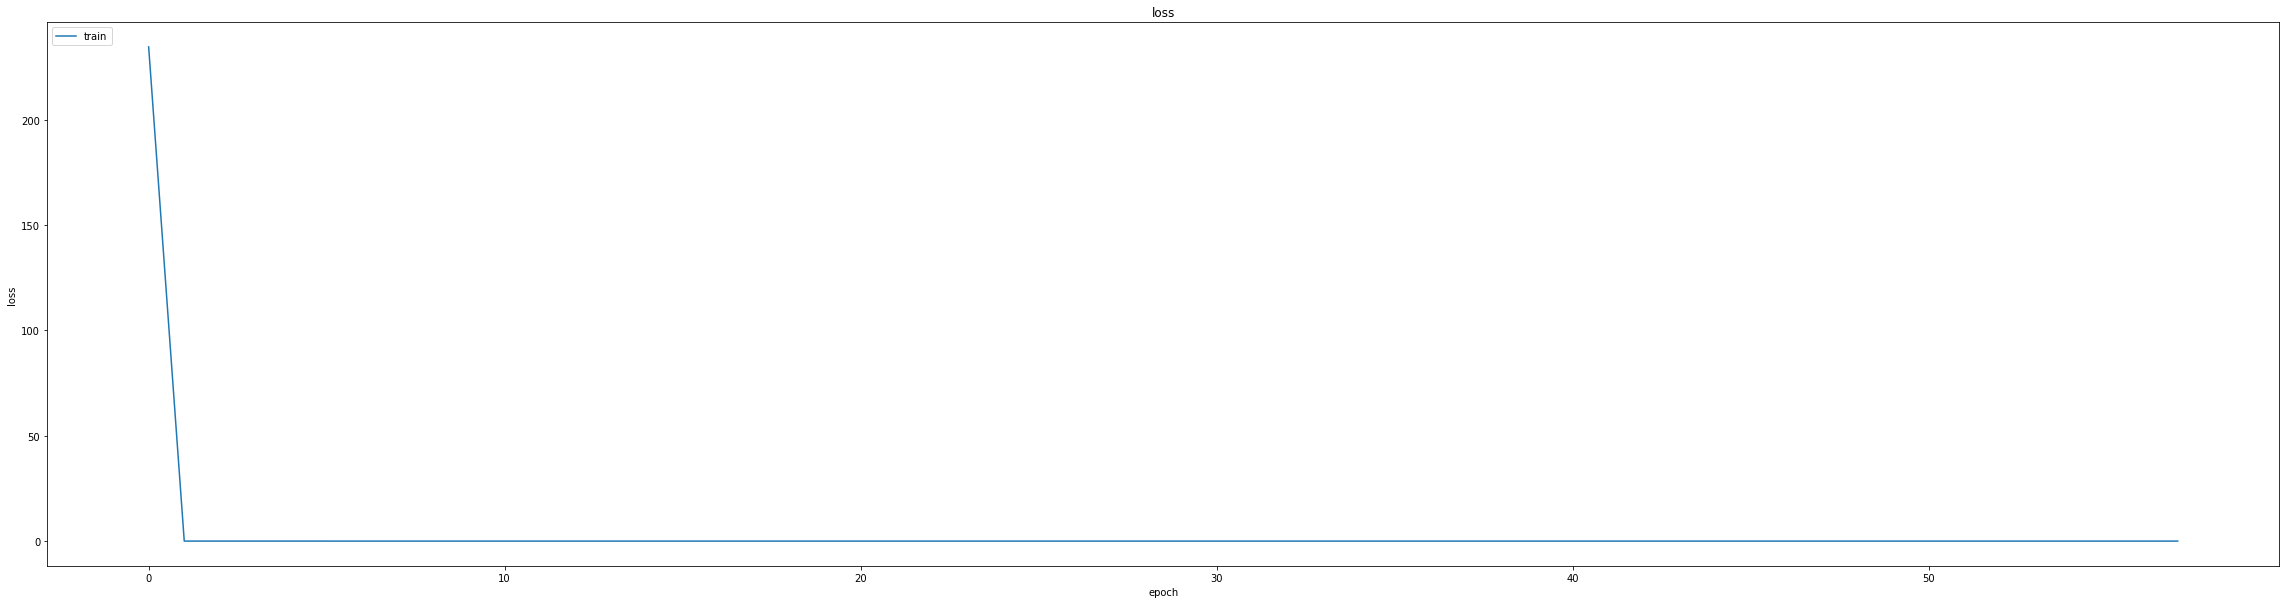

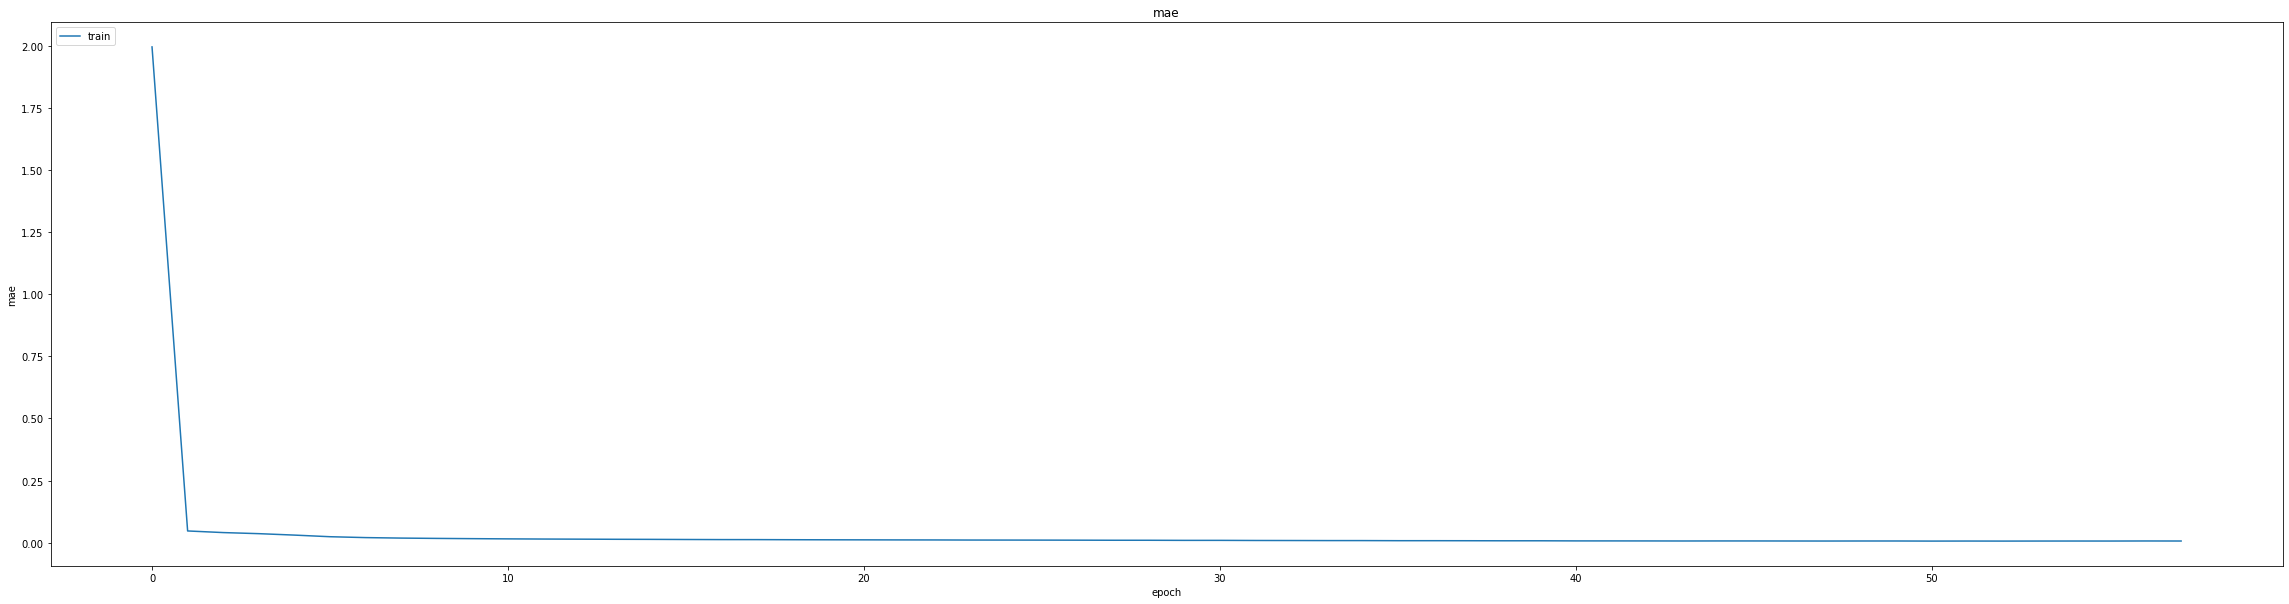

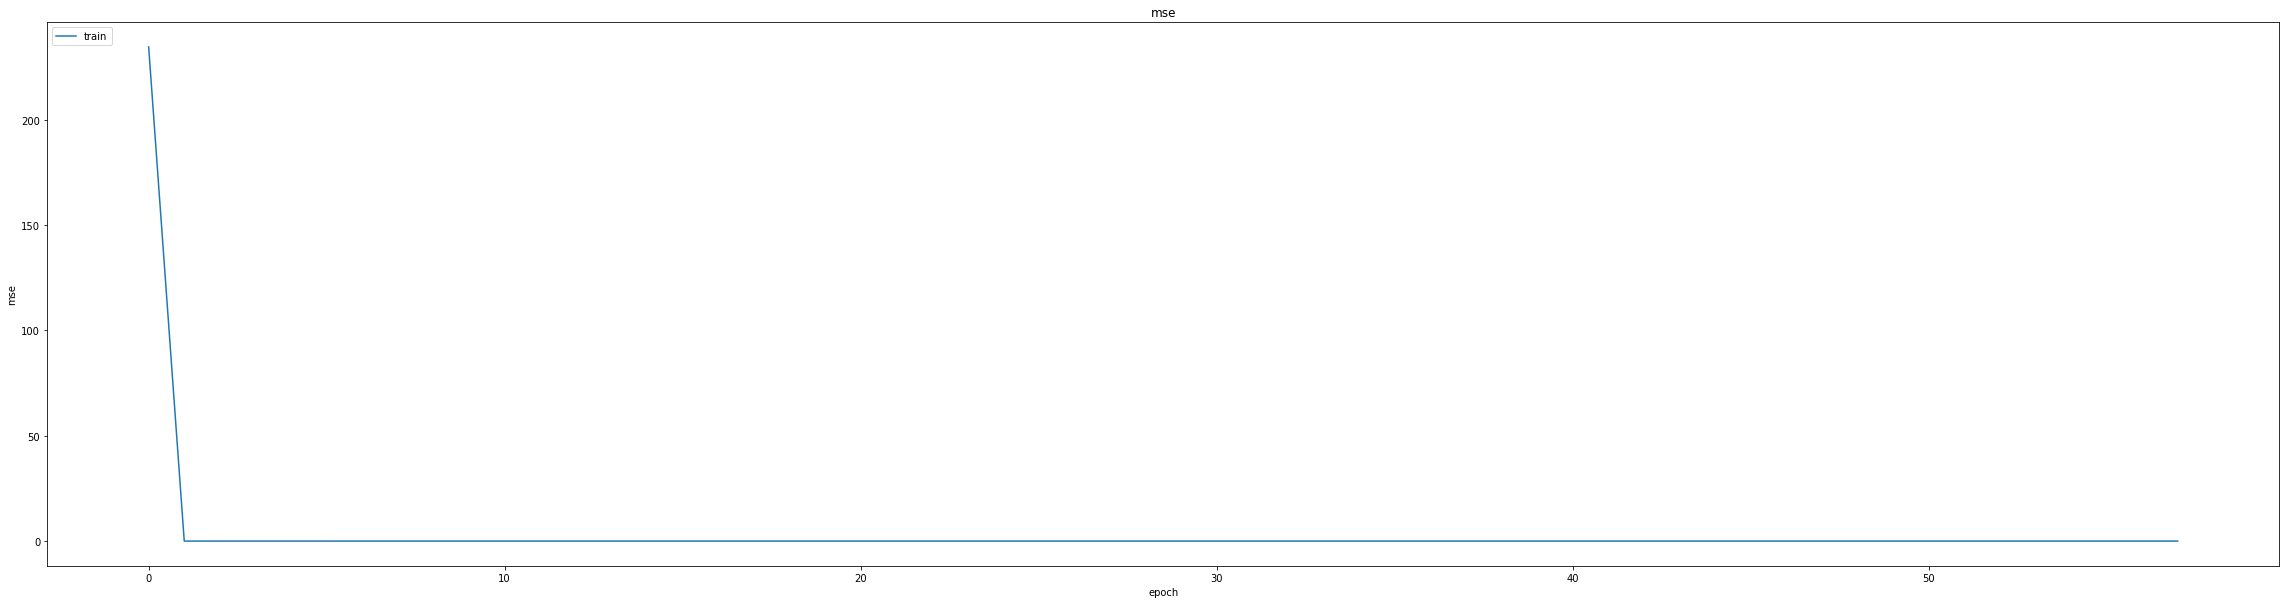

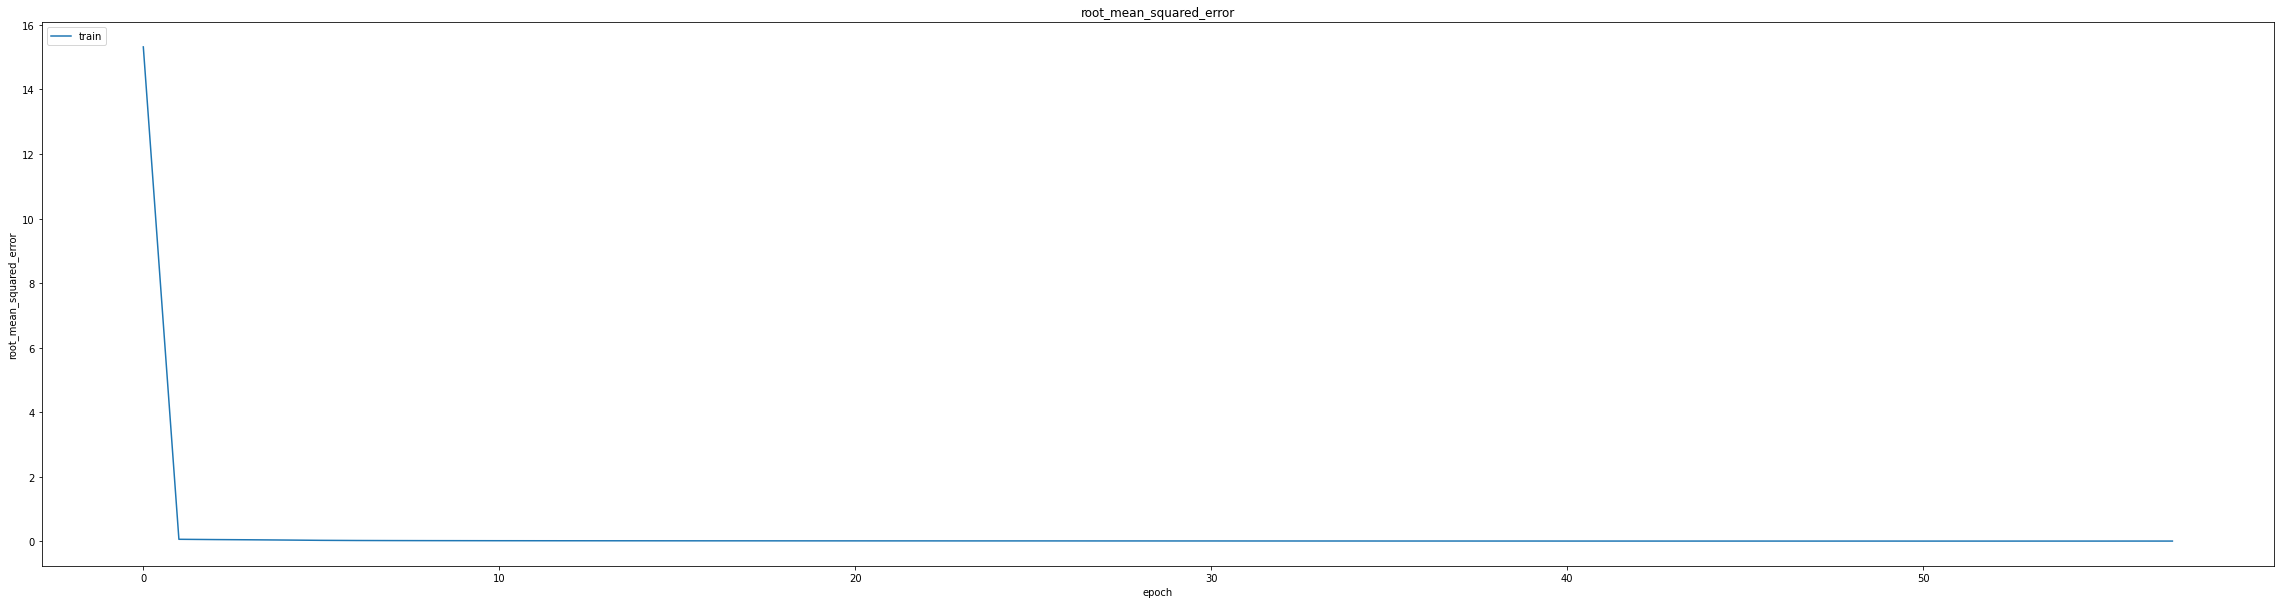

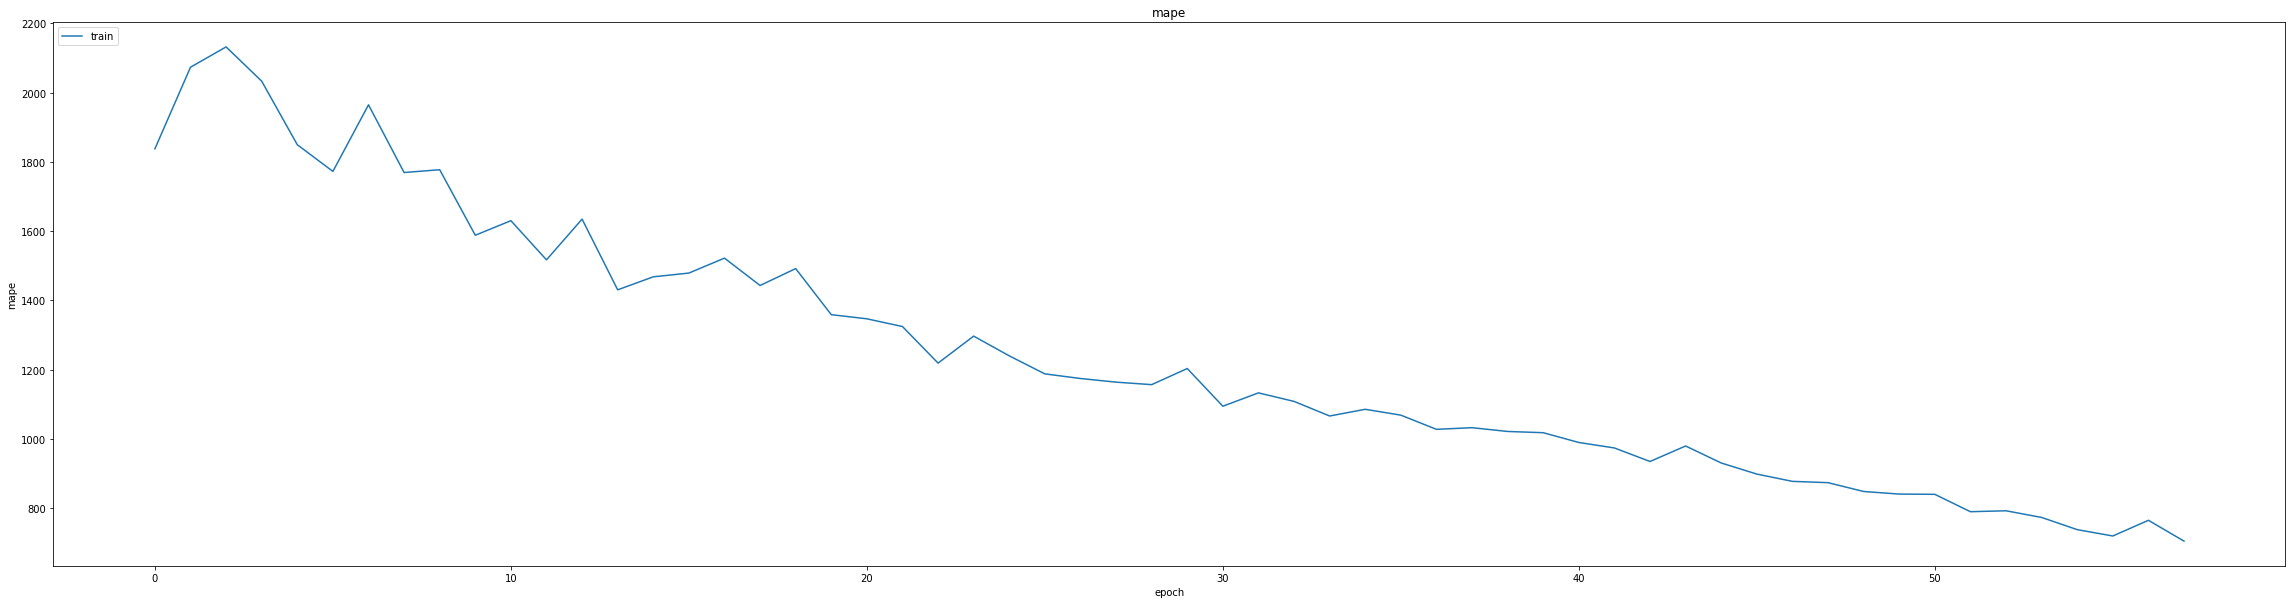

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00978110358119011
0.013335921801626682
464/464 [==============================] - 2s 4ms/step
0.9795512857281808


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


348/348 [==============================] - ETA: 0s - loss: 4.0201e-04 - mae: 0.0121 - mse: 4.0201e-04 - root_mean_squared_error: 0.0201 - mape: 1216.0790
Epoch 1: val_mse did not improve from 0.00018
348/348 [==============================] - 8s 12ms/step - loss: 4.0201e-04 - mae: 0.0121 - mse: 4.0201e-04 - root_mean_squared_error: 0.0201 - mape: 1216.0790 - val_loss: 1.9840e-04 - val_mae: 0.0111 - val_mse: 1.9840e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 2988.5510 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 1.5832e-04 - mae: 0.0095 - mse: 1.5832e-04 - root_mean_squared_error: 0.0126 - mape: 926.0260
Epoch 2: val_mse did not improve from 0.00018
348/348 [==============================] - 4s 10ms/step - loss: 1.5832e-04 - mae: 0.0095 - mse: 1.5832e-04 - root_mean_squared_error: 0.0126 - mape: 926.0260 - val_loss: 2.1458e-04 - val_mae: 0.0111 - val_mse: 2.1458e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 2824.8923 - lr: 0.0010
l

348/348 [==============================] - 10s 30ms/step - loss: 1.2820e-04 - mae: 0.0085 - mse: 1.2820e-04 - root_mean_squared_error: 0.0113 - mape: 871.0143 - val_loss: 1.3030e-04 - val_mae: 0.0087 - val_mse: 1.3030e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2600.5669 - lr: 9.0000e-04
Epoch 4/25
343/348 [============================>.] - ETA: 0s - loss: 1.2181e-04 - mae: 0.0083 - mse: 1.2181e-04 - root_mean_squared_error: 0.0110 - mape: 822.2663
Epoch 4: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 10ms/step - loss: 1.2136e-04 - mae: 0.0083 - mse: 1.2136e-04 - root_mean_squared_error: 0.0110 - mape: 811.1928 - val_loss: 2.1531e-04 - val_mae: 0.0122 - val_mse: 2.1531e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2564.7449 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
344/348 [============================>.] - ETA: 0s - loss: 9.5001e-05 - mae: 0.0073 - mse: 9.5001e-05 - root_mean_squared_error: 0.0097 - mape: 77

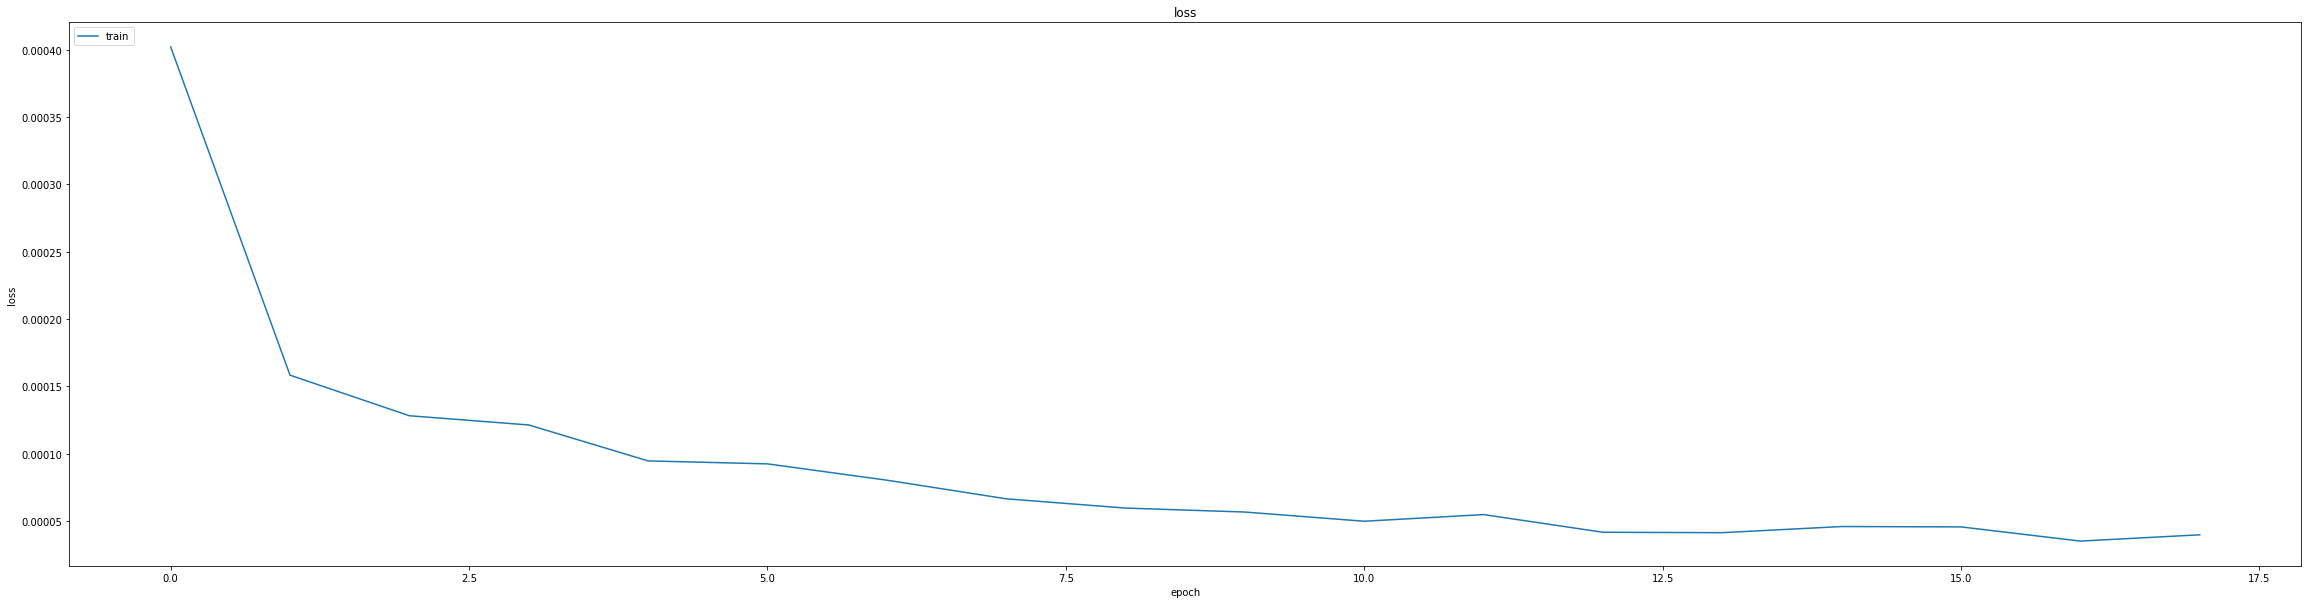

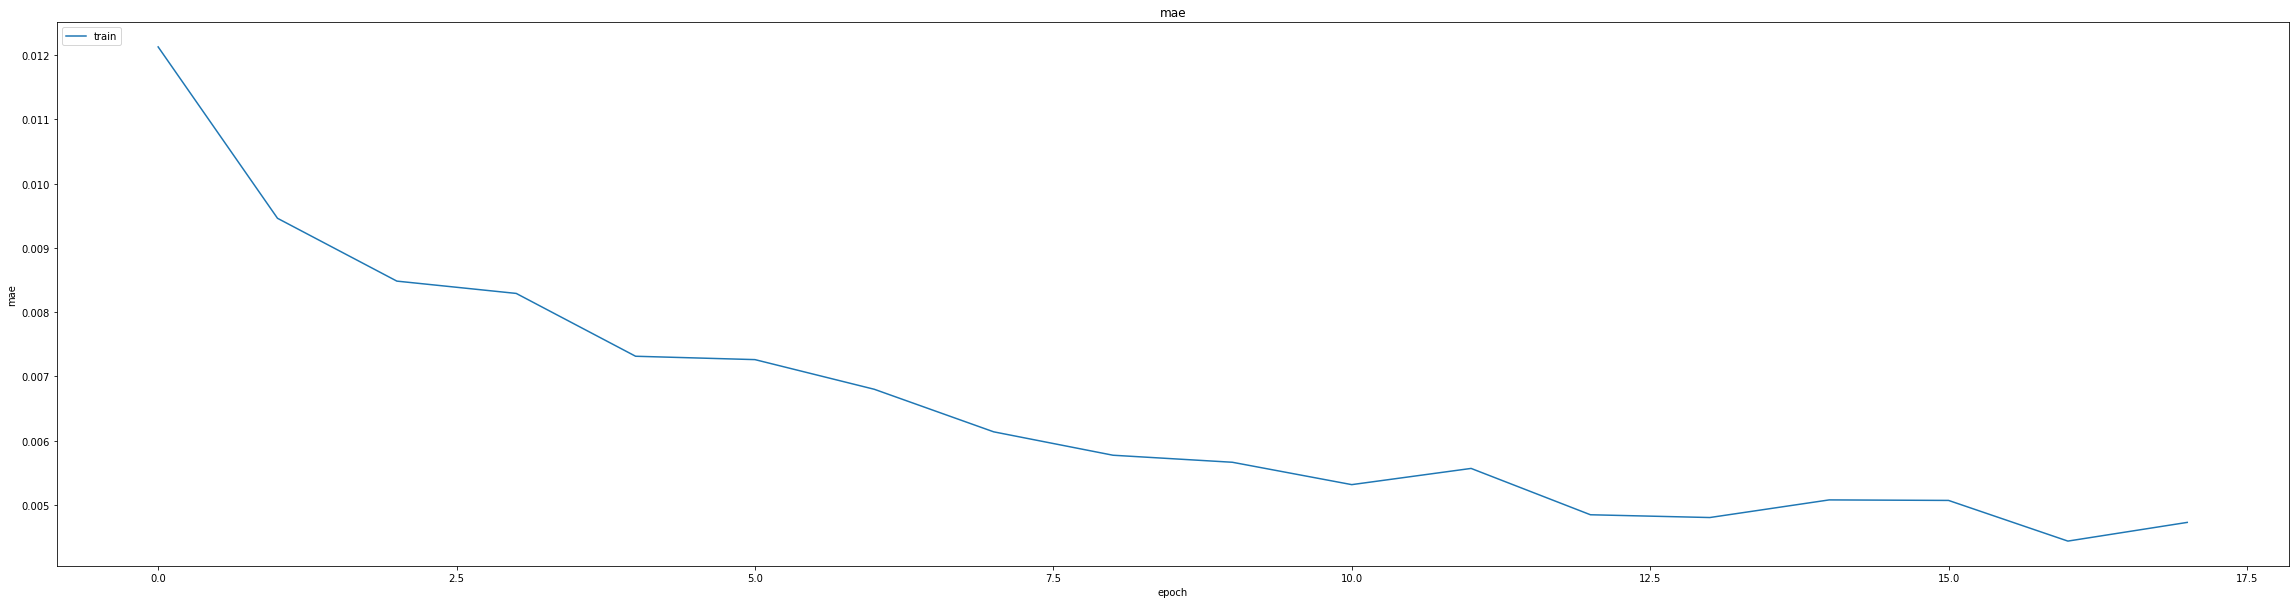

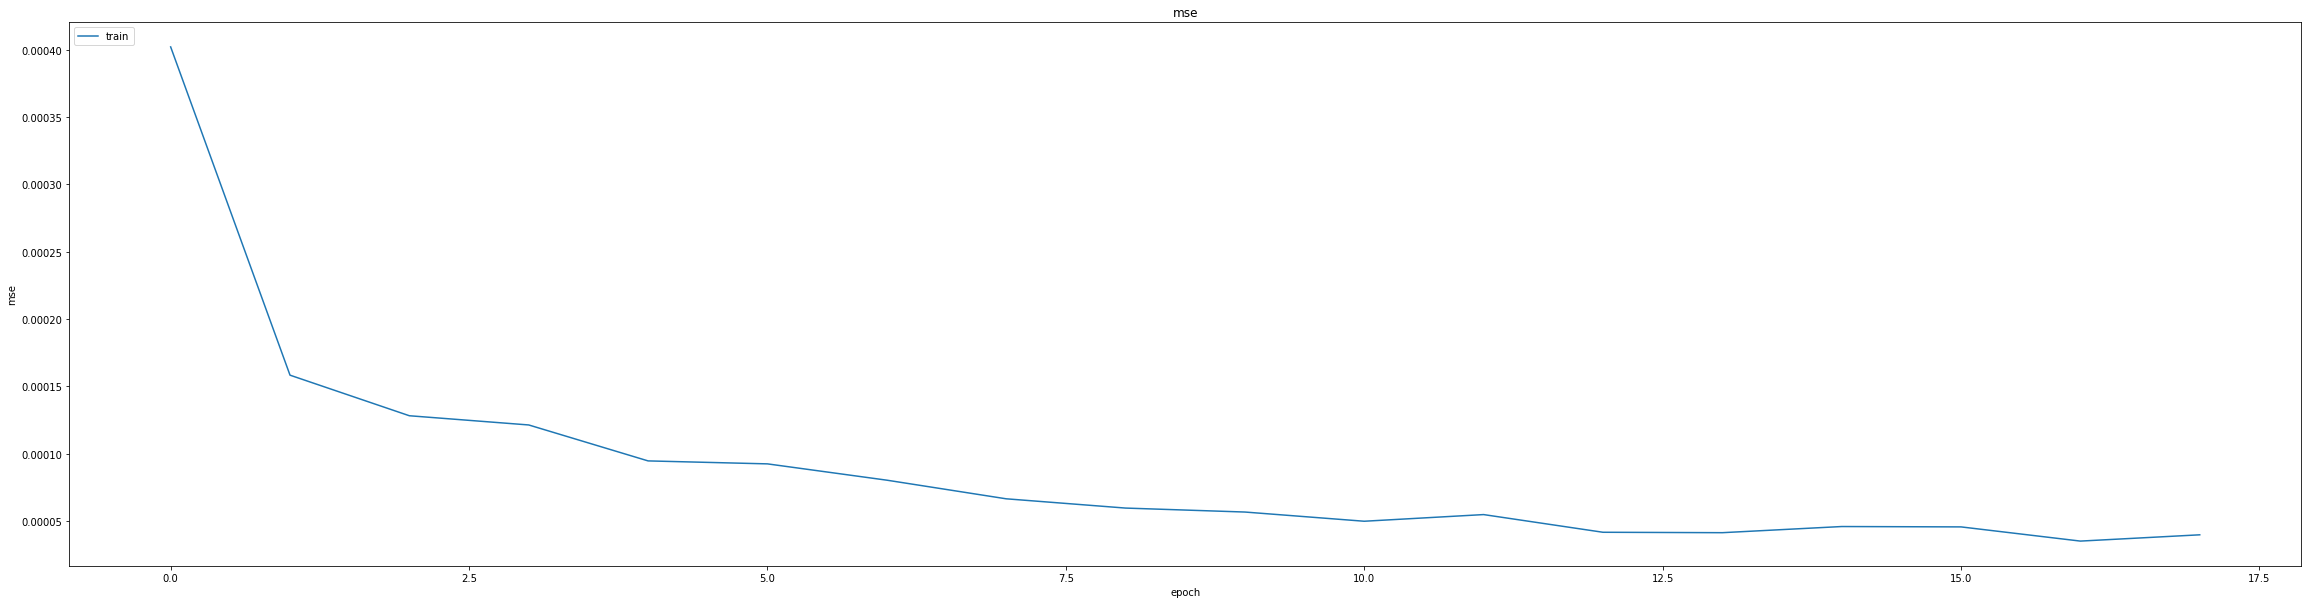

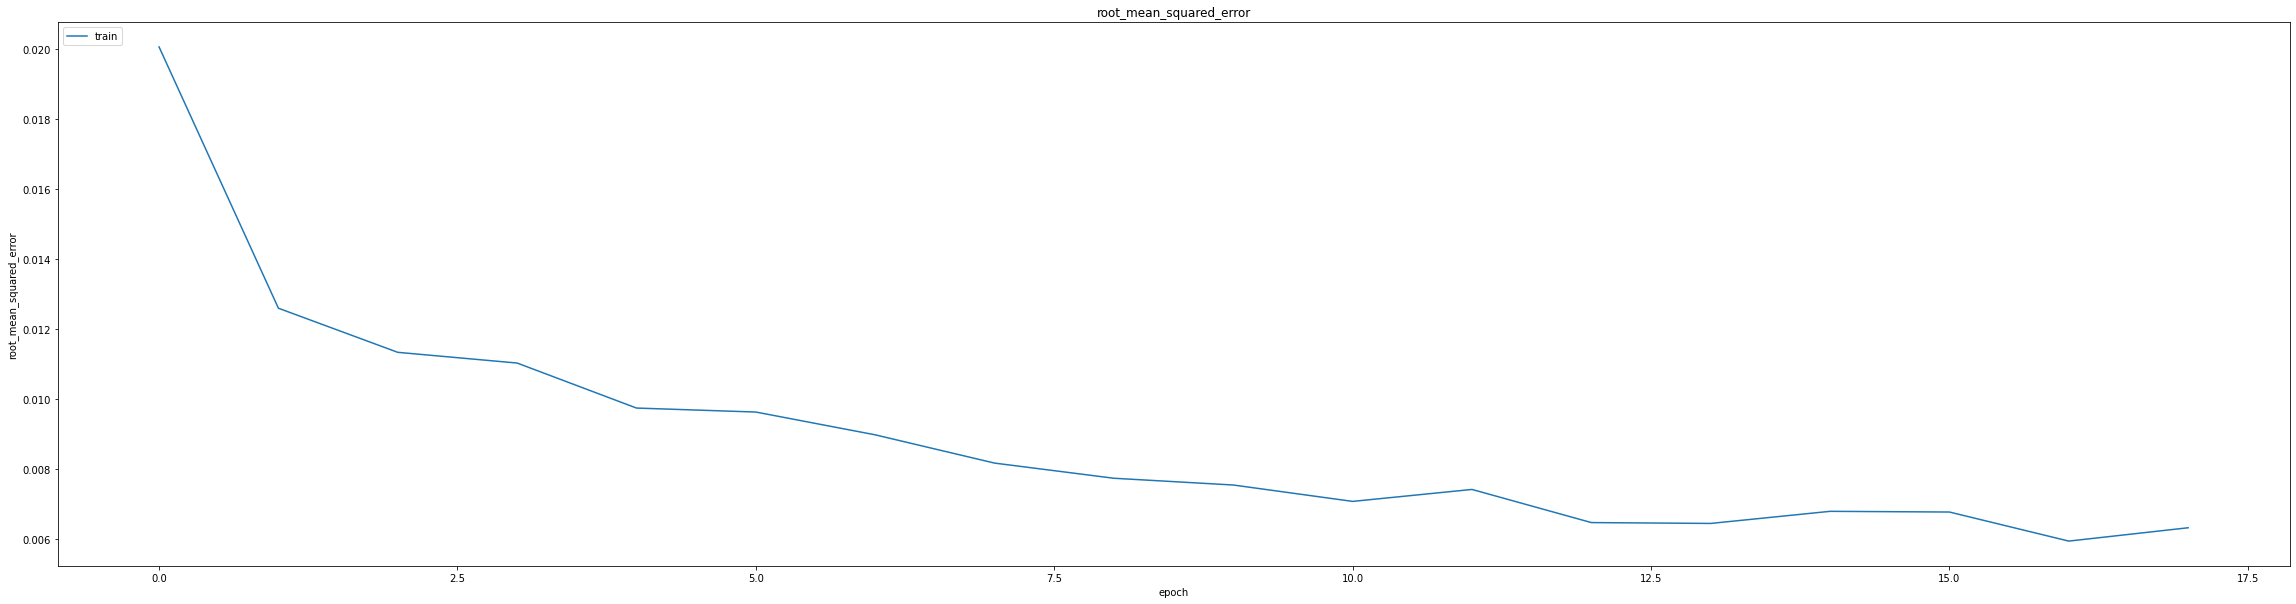

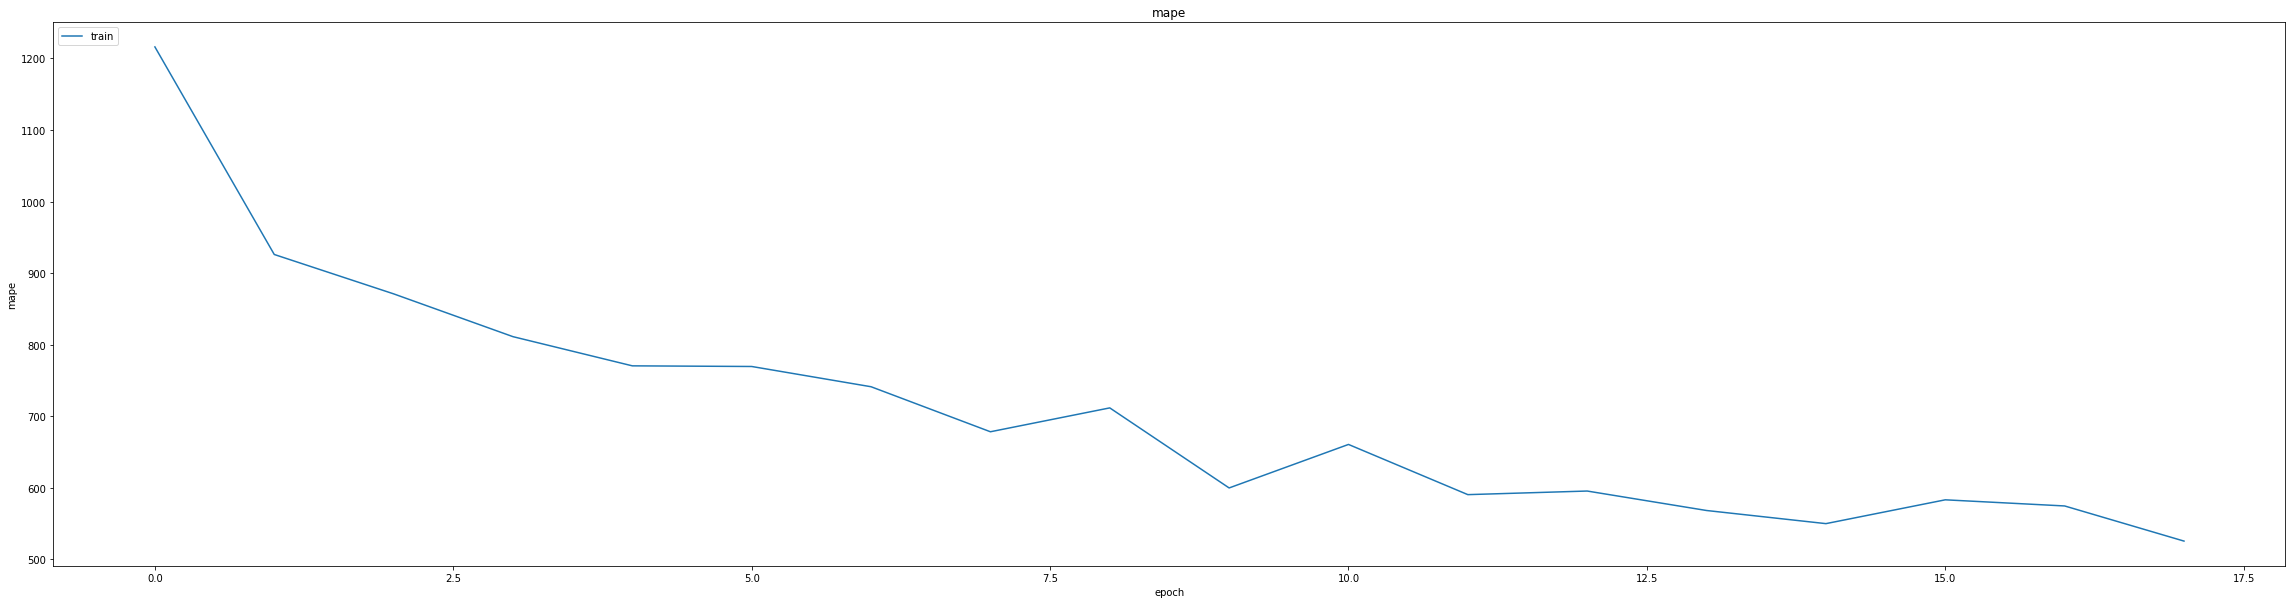

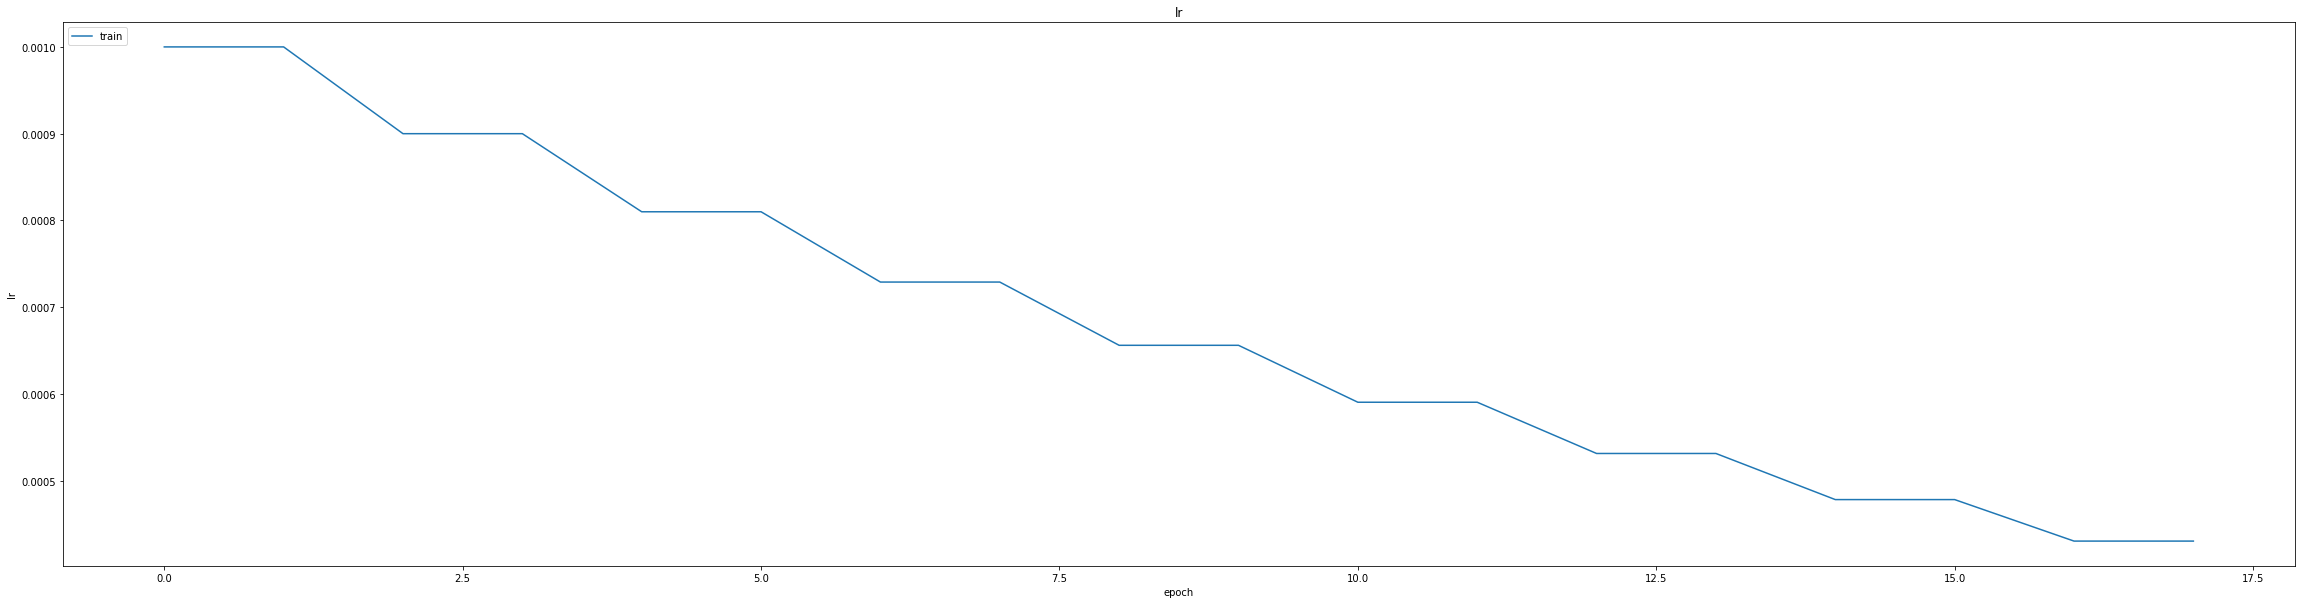

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008696517907083035
0.011414691805839539
464/464 [==============================] - 2s 3ms/step
0.9876782240085465


464/464 [==============================] - 2s 3ms/step


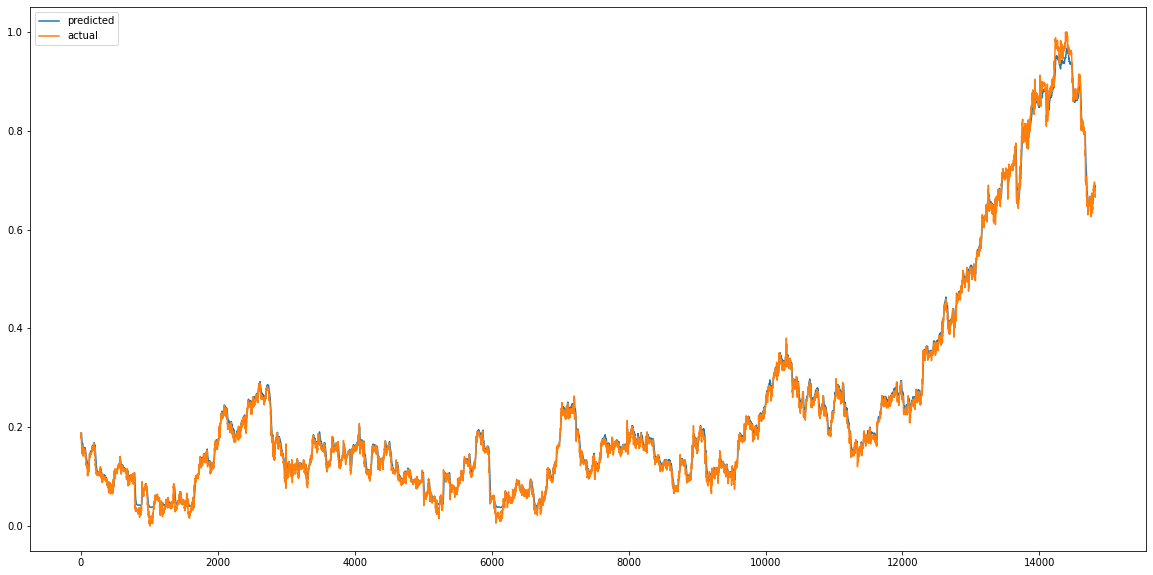

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


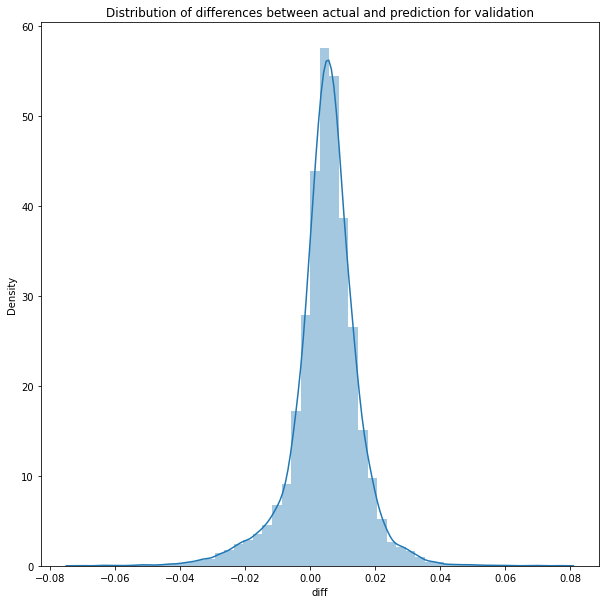

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


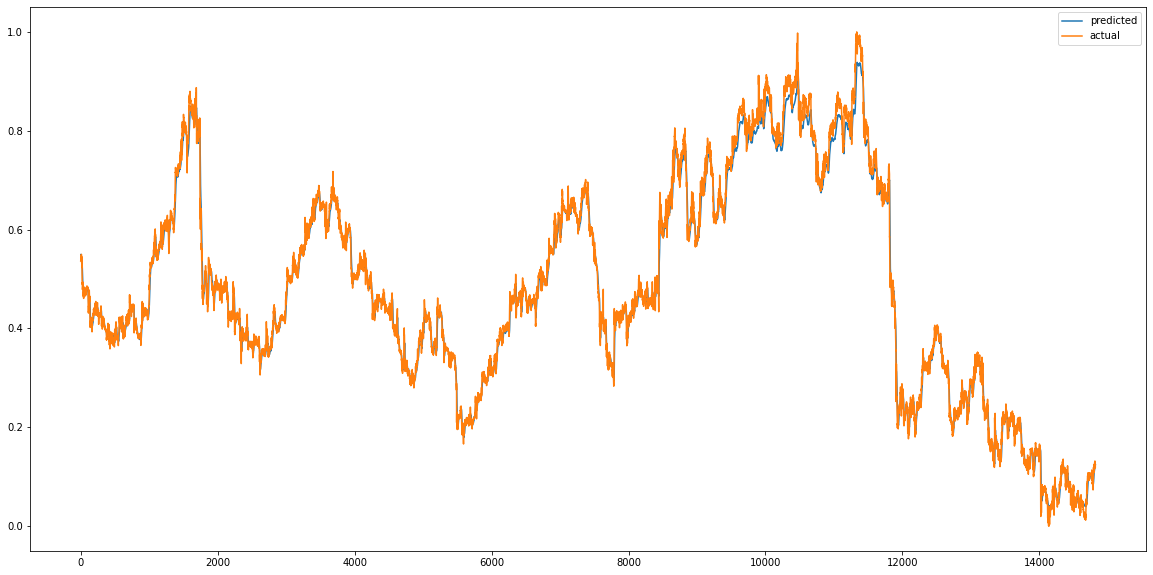

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


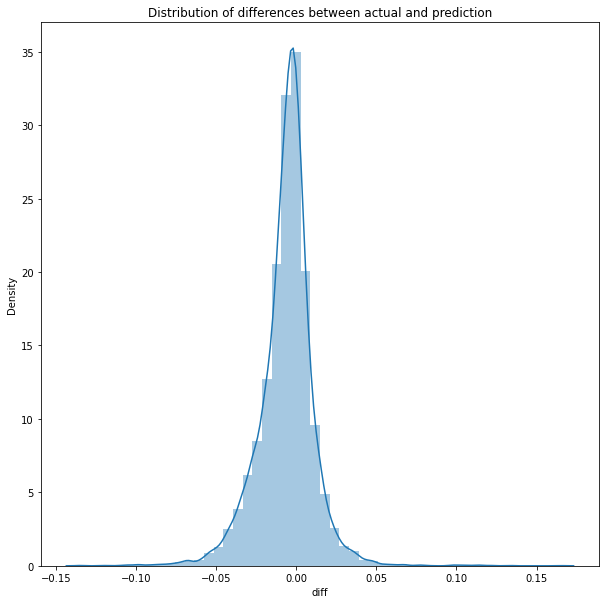

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00034144323931800186
RMSE :  0.01847818279263418
MAE :  0.0127576064536873
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9929677121595087


count    14819.000000
mean        -0.006313
std          0.017367
min         -0.136042
25%         -0.013881
50%         -0.004555
75%          0.002535
max          0.165504
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 601.5741 - mae: 7.1002 - mse: 601.5741 - root_mean_squared_error: 24.5270 - mape: 52409.1289
Epoch 1: val_mse improved from inf to 1.44802, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 52s 123ms/step - loss: 600.3734 - mae: 7.0881 - mse: 600.3734 - root_mean_squared_error: 24.5025 - mape: 52305.0586 - val_loss: 1.4480 - val_mae: 1.1821 - val_mse: 1.4480 - val_root_mean_squared_error: 1.2033 - val_mape: 97003.1250
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.5656 - mae: 0.6928 - mse: 0.5656 - root_mean_squared_error: 0.7520 - mape: 26143.6680
Epoch 2: val_mse improved from 1.44802 to 0.47638, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 0.5656 - mae: 0.6928 - mse: 0.5656 - root_mean_squared_error: 0.7520 - mape: 26143.6680 - val_loss: 0.4764 - val_mae: 0.6559 - val_mse: 0.4764 - val_root_mean_squared_error: 0.6902 - val_mape: 60799.6562
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.1877 - mae: 0.3749 - mse: 0.1877 - root_mean_squared_error: 0.4332 - mape: 16627.7500
Epoch 3: val_mse improved from 0.47638 to 0.25019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.1877 - mae: 0.3749 - mse: 0.1877 - root_mean_squared_error: 0.4332 - mape: 16627.7500 - val_loss: 0.2502 - val_mae: 0.4742 - val_mse: 0.2502 - val_root_mean_squared_error: 0.5002 - val_mape: 46747.6914
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.1003 - mae: 0.2810 - mse: 0.1003 - root_mean_squared_error: 0.3166 - mape: 14965.0684
Epoch 4: val_mse improved from 0.25019 to 0.16715, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 122ms/step - loss: 0.1003 - mae: 0.2810 - mse: 0.1003 - root_mean_squared_error: 0.3166 - mape: 14965.0684 - val_loss: 0.1672 - val_mae: 0.3906 - val_mse: 0.1672 - val_root_mean_squared_error: 0.4088 - val_mape: 39573.4375
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0733 - mae: 0.2422 - mse: 0.0733 - root_mean_squared_error: 0.2708 - mape: 13487.4541
Epoch 5: val_mse improved from 0.16715 to 0.12914, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 0.0733 - mae: 0.2421 - mse: 0.0733 - root_mean_squared_error: 0.2707 - mape: 13422.1523 - val_loss: 0.1291 - val_mae: 0.3438 - val_mse: 0.1291 - val_root_mean_squared_error: 0.3594 - val_mape: 35417.4844
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0642 - mae: 0.2237 - mse: 0.0642 - root_mean_squared_error: 0.2534 - mape: 10965.9766
Epoch 6: val_mse improved from 0.12914 to 0.10978, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0642 - mae: 0.2237 - mse: 0.0642 - root_mean_squared_error: 0.2533 - mape: 10944.1797 - val_loss: 0.1098 - val_mae: 0.3164 - val_mse: 0.1098 - val_root_mean_squared_error: 0.3313 - val_mape: 32909.4570
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2135 - mse: 0.0608 - root_mean_squared_error: 0.2467 - mape: 10712.0674
Epoch 7: val_mse improved from 0.10978 to 0.09934, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0609 - mae: 0.2135 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 10660.3213 - val_loss: 0.0993 - val_mae: 0.3001 - val_mse: 0.0993 - val_root_mean_squared_error: 0.3152 - val_mape: 31390.3789
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0598 - mae: 0.2082 - mse: 0.0598 - root_mean_squared_error: 0.2446 - mape: 10435.5127
Epoch 8: val_mse improved from 0.09934 to 0.09373, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0598 - mae: 0.2082 - mse: 0.0598 - root_mean_squared_error: 0.2446 - mape: 10385.1309 - val_loss: 0.0937 - val_mae: 0.2907 - val_mse: 0.0937 - val_root_mean_squared_error: 0.3061 - val_mape: 30515.0586
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.2054 - mse: 0.0595 - root_mean_squared_error: 0.2438 - mape: 10003.5020
Epoch 9: val_mse improved from 0.09373 to 0.09089, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 125ms/step - loss: 0.0594 - mae: 0.2054 - mse: 0.0594 - root_mean_squared_error: 0.2438 - mape: 9955.1104 - val_loss: 0.0909 - val_mae: 0.2858 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3015 - val_mape: 30049.0762
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0593 - mae: 0.2044 - mse: 0.0593 - root_mean_squared_error: 0.2436 - mape: 10485.2627
Epoch 10: val_mse improved from 0.09089 to 0.08949, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0593 - mae: 0.2044 - mse: 0.0593 - root_mean_squared_error: 0.2436 - mape: 10485.2627 - val_loss: 0.0895 - val_mae: 0.2834 - val_mse: 0.0895 - val_root_mean_squared_error: 0.2991 - val_mape: 29837.0586
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0581 - mae: 0.2026 - mse: 0.0581 - root_mean_squared_error: 0.2410 - mape: 10666.7900
Epoch 11: val_mse improved from 0.08949 to 0.08830, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 123ms/step - loss: 0.0581 - mae: 0.2026 - mse: 0.0581 - root_mean_squared_error: 0.2410 - mape: 10666.7900 - val_loss: 0.0883 - val_mae: 0.2817 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mape: 29704.4316
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0571 - mae: 0.2008 - mse: 0.0571 - root_mean_squared_error: 0.2390 - mape: 10575.0391
Epoch 12: val_mse improved from 0.08830 to 0.08633, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 123ms/step - loss: 0.0571 - mae: 0.2007 - mse: 0.0571 - root_mean_squared_error: 0.2389 - mape: 10523.7793 - val_loss: 0.0863 - val_mae: 0.2784 - val_mse: 0.0863 - val_root_mean_squared_error: 0.2938 - val_mape: 29439.4277
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0556 - mae: 0.1986 - mse: 0.0556 - root_mean_squared_error: 0.2357 - mape: 10310.3477
Epoch 13: val_mse improved from 0.08633 to 0.08369, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0555 - mae: 0.1985 - mse: 0.0555 - root_mean_squared_error: 0.2357 - mape: 10260.5156 - val_loss: 0.0837 - val_mae: 0.2742 - val_mse: 0.0837 - val_root_mean_squared_error: 0.2893 - val_mape: 29042.0410
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 0.0520 - mae: 0.1931 - mse: 0.0520 - root_mean_squared_error: 0.2280 - mape: 9688.9492
Epoch 14: val_mse improved from 0.08369 to 0.07453, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0520 - mae: 0.1931 - mse: 0.0520 - root_mean_squared_error: 0.2280 - mape: 9688.9492 - val_loss: 0.0745 - val_mae: 0.2576 - val_mse: 0.0745 - val_root_mean_squared_error: 0.2730 - val_mape: 27796.7168
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0457 - mae: 0.1807 - mse: 0.0457 - root_mean_squared_error: 0.2138 - mape: 10133.7793
Epoch 15: val_mse improved from 0.07453 to 0.06682, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 123ms/step - loss: 0.0457 - mae: 0.1807 - mse: 0.0457 - root_mean_squared_error: 0.2138 - mape: 10133.7793 - val_loss: 0.0668 - val_mae: 0.2425 - val_mse: 0.0668 - val_root_mean_squared_error: 0.2585 - val_mape: 27188.5215
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0340 - mae: 0.1544 - mse: 0.0340 - root_mean_squared_error: 0.1843 - mape: 9351.7324
Epoch 16: val_mse improved from 0.06682 to 0.05554, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0340 - mae: 0.1543 - mse: 0.0340 - root_mean_squared_error: 0.1843 - mape: 9306.4316 - val_loss: 0.0555 - val_mae: 0.2193 - val_mse: 0.0555 - val_root_mean_squared_error: 0.2357 - val_mape: 25976.0391
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 0.0225 - mae: 0.1200 - mse: 0.0225 - root_mean_squared_error: 0.1500 - mape: 8877.6924
Epoch 17: val_mse improved from 0.05554 to 0.04490, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0225 - mae: 0.1200 - mse: 0.0225 - root_mean_squared_error: 0.1499 - mape: 8834.7188 - val_loss: 0.0449 - val_mae: 0.1935 - val_mse: 0.0449 - val_root_mean_squared_error: 0.2119 - val_mape: 24470.3828
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0151 - mae: 0.0940 - mse: 0.0151 - root_mean_squared_error: 0.1227 - mape: 8289.3555
Epoch 18: val_mse improved from 0.04490 to 0.03425, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0151 - mae: 0.0940 - mse: 0.0151 - root_mean_squared_error: 0.1227 - mape: 8249.2129 - val_loss: 0.0343 - val_mae: 0.1662 - val_mse: 0.0343 - val_root_mean_squared_error: 0.1851 - val_mape: 22486.0781
Epoch 19/75
346/348 [============================>.] - ETA: 0s - loss: 0.0109 - mae: 0.0783 - mse: 0.0109 - root_mean_squared_error: 0.1042 - mape: 7506.2769
Epoch 19: val_mse improved from 0.03425 to 0.02563, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0109 - mae: 0.0782 - mse: 0.0109 - root_mean_squared_error: 0.1042 - mape: 7469.8701 - val_loss: 0.0256 - val_mae: 0.1413 - val_mse: 0.0256 - val_root_mean_squared_error: 0.1601 - val_mape: 20537.9531
Epoch 20/75
346/348 [============================>.] - ETA: 0s - loss: 0.0082 - mae: 0.0679 - mse: 0.0082 - root_mean_squared_error: 0.0907 - mape: 7255.6230
Epoch 20: val_mse improved from 0.02563 to 0.01931, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0082 - mae: 0.0679 - mse: 0.0082 - root_mean_squared_error: 0.0907 - mape: 7220.4487 - val_loss: 0.0193 - val_mae: 0.1204 - val_mse: 0.0193 - val_root_mean_squared_error: 0.1390 - val_mape: 18803.8828
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 0.0065 - mae: 0.0608 - mse: 0.0065 - root_mean_squared_error: 0.0807 - mape: 6493.2983
Epoch 21: val_mse improved from 0.01931 to 0.01446, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0065 - mae: 0.0608 - mse: 0.0065 - root_mean_squared_error: 0.0807 - mape: 6468.3491 - val_loss: 0.0145 - val_mae: 0.1023 - val_mse: 0.0145 - val_root_mean_squared_error: 0.1202 - val_mape: 17194.3379
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0053 - mae: 0.0552 - mse: 0.0053 - root_mean_squared_error: 0.0728 - mape: 6025.4546
Epoch 22: val_mse improved from 0.01446 to 0.01112, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0053 - mae: 0.0552 - mse: 0.0053 - root_mean_squared_error: 0.0728 - mape: 6013.4438 - val_loss: 0.0111 - val_mae: 0.0876 - val_mse: 0.0111 - val_root_mean_squared_error: 0.1055 - val_mape: 15893.1680
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0508 - mse: 0.0044 - root_mean_squared_error: 0.0666 - mape: 5431.6890
Epoch 23: val_mse improved from 0.01112 to 0.00874, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0044 - mae: 0.0508 - mse: 0.0044 - root_mean_squared_error: 0.0666 - mape: 5405.3198 - val_loss: 0.0087 - val_mae: 0.0767 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0935 - val_mape: 14767.0205
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0467 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 4804.4761
Epoch 24: val_mse improved from 0.00874 to 0.00696, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0037 - mae: 0.0467 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 4804.4761 - val_loss: 0.0070 - val_mae: 0.0677 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0834 - val_mape: 13798.7500
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0433 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 4824.2998
Epoch 25: val_mse improved from 0.00696 to 0.00567, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0032 - mae: 0.0433 - mse: 0.0032 - root_mean_squared_error: 0.0569 - mape: 4800.8560 - val_loss: 0.0057 - val_mae: 0.0602 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0753 - val_mape: 12974.4482
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0400 - mse: 0.0028 - root_mean_squared_error: 0.0527 - mape: 4528.3281
Epoch 26: val_mse improved from 0.00567 to 0.00445, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 123ms/step - loss: 0.0028 - mae: 0.0400 - mse: 0.0028 - root_mean_squared_error: 0.0527 - mape: 4506.3340 - val_loss: 0.0044 - val_mae: 0.0509 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0667 - val_mape: 12254.5469
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0378 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 3757.3372
Epoch 27: val_mse improved from 0.00445 to 0.00390, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0025 - mae: 0.0378 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 3739.0815 - val_loss: 0.0039 - val_mae: 0.0496 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0624 - val_mape: 11524.6064
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0357 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 3793.1272
Epoch 28: val_mse improved from 0.00390 to 0.00303, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0022 - mae: 0.0357 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 3774.7415 - val_loss: 0.0030 - val_mae: 0.0403 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0550 - val_mape: 10994.9062
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 4034.1704
Epoch 29: val_mse improved from 0.00303 to 0.00268, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 122ms/step - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 4014.5588 - val_loss: 0.0027 - val_mae: 0.0389 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mape: 10466.4043
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 3602.7471
Epoch 30: val_mse improved from 0.00268 to 0.00245, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 3602.7471 - val_loss: 0.0024 - val_mae: 0.0376 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0495 - val_mape: 10050.4502
Epoch 31/75
347/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 3073.3225
Epoch 31: val_mse improved from 0.00245 to 0.00220, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 3067.1951 - val_loss: 0.0022 - val_mae: 0.0365 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0469 - val_mape: 9539.3047
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 3441.2085
Epoch 32: val_mse improved from 0.00220 to 0.00174, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 3424.4978 - val_loss: 0.0017 - val_mae: 0.0315 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 9129.9033
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 3009.3677
Epoch 33: val_mse improved from 0.00174 to 0.00146, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0013 - mae: 0.0274 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 3003.3672 - val_loss: 0.0015 - val_mae: 0.0279 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 8726.6416
Epoch 34/75
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 2933.1196
Epoch 34: val_mse improved from 0.00146 to 0.00145, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 2933.1196 - val_loss: 0.0015 - val_mae: 0.0285 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 8339.1406
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2781.0042
Epoch 35: val_mse improved from 0.00145 to 0.00114, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2767.4954 - val_loss: 0.0011 - val_mae: 0.0236 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 8033.2788
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 9.7531e-04 - mae: 0.0239 - mse: 9.7531e-04 - root_mean_squared_error: 0.0312 - mape: 2827.1670
Epoch 36: val_mse did not improve from 0.00114
348/348 [==============================] - 7s 22ms/step - loss: 9.7405e-04 - mae: 0.0239 - mse: 9.7405e-04 - root_mean_squared_error: 0.0312 - mape: 2813.4165 - val_loss: 0.0012 - val_mae: 0.0273 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 7754.2217
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 8.3400e-04 - mae: 0.0220 - mse: 8.3400e-04 - root_mean_squared_error: 0.0289 - mape: 2617.4546
Epoch 37: val_mse did not improve from 0.00114
348/348 [=======================

348/348 [==============================] - 42s 121ms/step - loss: 7.5505e-04 - mae: 0.0209 - mse: 7.5505e-04 - root_mean_squared_error: 0.0275 - mape: 2504.2205 - val_loss: 8.3271e-04 - val_mae: 0.0209 - val_mse: 8.3271e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 7286.0977
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 6.7355e-04 - mae: 0.0197 - mse: 6.7355e-04 - root_mean_squared_error: 0.0260 - mape: 2573.4531
Epoch 39: val_mse improved from 0.00083 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 6.7374e-04 - mae: 0.0197 - mse: 6.7374e-04 - root_mean_squared_error: 0.0260 - mape: 2563.6470 - val_loss: 7.4311e-04 - val_mae: 0.0189 - val_mse: 7.4311e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 7077.8730
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 6.3076e-04 - mae: 0.0192 - mse: 6.3076e-04 - root_mean_squared_error: 0.0251 - mape: 2452.8884
Epoch 40: val_mse did not improve from 0.00074
348/348 [==============================] - 7s 21ms/step - loss: 6.3086e-04 - mae: 0.0192 - mse: 6.3086e-04 - root_mean_squared_error: 0.0251 - mape: 2440.9626 - val_loss: 8.4190e-04 - val_mae: 0.0212 - val_mse: 8.4190e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 6814.7847
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 5.6724e-04 - mae: 0.0182 - mse: 5.6724e-04 - root_mean_squared_error: 0.0238 - mape: 2253.1011
Epoch 41: val_mse improved from 0.00074 to 0.00060, sav

348/348 [==============================] - 41s 119ms/step - loss: 5.6743e-04 - mae: 0.0182 - mse: 5.6743e-04 - root_mean_squared_error: 0.0238 - mape: 2242.1516 - val_loss: 6.0338e-04 - val_mae: 0.0172 - val_mse: 6.0338e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 6697.5010
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 4.9771e-04 - mae: 0.0170 - mse: 4.9771e-04 - root_mean_squared_error: 0.0223 - mape: 2257.4509
Epoch 42: val_mse improved from 0.00060 to 0.00057, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 4.9741e-04 - mae: 0.0170 - mse: 4.9741e-04 - root_mean_squared_error: 0.0223 - mape: 2246.4824 - val_loss: 5.7055e-04 - val_mae: 0.0166 - val_mse: 5.7055e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 6509.2070
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 4.6837e-04 - mae: 0.0165 - mse: 4.6837e-04 - root_mean_squared_error: 0.0216 - mape: 2153.6763
Epoch 43: val_mse did not improve from 0.00057
348/348 [==============================] - 7s 22ms/step - loss: 4.6842e-04 - mae: 0.0165 - mse: 4.6842e-04 - root_mean_squared_error: 0.0216 - mape: 2143.2158 - val_loss: 6.1343e-04 - val_mae: 0.0187 - val_mse: 6.1343e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 6295.1279
Epoch 44/75
348/348 [==============================] - ETA: 0s - loss: 4.2518e-04 - mae: 0.0157 - mse: 4.2518e-04 - root_mean_squared_error: 0.0206 - mape: 2206.8870
Epoch 44: val_mse improved from 0.00057 to 0.00050, sav

348/348 [==============================] - 42s 120ms/step - loss: 4.2518e-04 - mae: 0.0157 - mse: 4.2518e-04 - root_mean_squared_error: 0.0206 - mape: 2206.8870 - val_loss: 4.9677e-04 - val_mae: 0.0159 - val_mse: 4.9677e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 6153.7261
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 3.9786e-04 - mae: 0.0152 - mse: 3.9786e-04 - root_mean_squared_error: 0.0199 - mape: 2179.3948
Epoch 45: val_mse improved from 0.00050 to 0.00049, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 3.9833e-04 - mae: 0.0152 - mse: 3.9833e-04 - root_mean_squared_error: 0.0200 - mape: 2168.7966 - val_loss: 4.9295e-04 - val_mae: 0.0175 - val_mse: 4.9295e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 5928.9194
Epoch 46/75
346/348 [============================>.] - ETA: 0s - loss: 3.5630e-04 - mae: 0.0144 - mse: 3.5630e-04 - root_mean_squared_error: 0.0189 - mape: 2129.6152
Epoch 46: val_mse did not improve from 0.00049
348/348 [==============================] - 7s 21ms/step - loss: 3.5746e-04 - mae: 0.0144 - mse: 3.5746e-04 - root_mean_squared_error: 0.0189 - mape: 2119.2690 - val_loss: 5.8722e-04 - val_mae: 0.0177 - val_mse: 5.8722e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 5731.8320
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 3.4322e-04 - mae: 0.0141 - mse: 3.4322e-04 - root_mean_squared_error: 0.0185 - mape: 1884.1331
Epoch 47: val_mse improved from 0.00049 to 0.00045, sav

348/348 [==============================] - 42s 121ms/step - loss: 3.4322e-04 - mae: 0.0141 - mse: 3.4322e-04 - root_mean_squared_error: 0.0185 - mape: 1884.1331 - val_loss: 4.5357e-04 - val_mae: 0.0171 - val_mse: 4.5357e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5595.6299
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 3.1803e-04 - mae: 0.0136 - mse: 3.1803e-04 - root_mean_squared_error: 0.0178 - mape: 1814.9951
Epoch 48: val_mse improved from 0.00045 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 3.1803e-04 - mae: 0.0136 - mse: 3.1803e-04 - root_mean_squared_error: 0.0178 - mape: 1814.9951 - val_loss: 3.1993e-04 - val_mae: 0.0126 - val_mse: 3.1993e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 5383.4175
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 2.7244e-04 - mae: 0.0125 - mse: 2.7244e-04 - root_mean_squared_error: 0.0165 - mape: 1831.4514
Epoch 49: val_mse did not improve from 0.00032
348/348 [==============================] - 8s 22ms/step - loss: 2.7244e-04 - mae: 0.0125 - mse: 2.7244e-04 - root_mean_squared_error: 0.0165 - mape: 1831.4514 - val_loss: 4.5437e-04 - val_mae: 0.0176 - val_mse: 4.5437e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5216.9902
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 2.5531e-04 - mae: 0.0122 - mse: 2.5531e-04 - root_mean_squared_error: 0.0160 - mape: 1742.3848
Epoch 50: val_mse did not improve from 0.00032
348/348 

348/348 [==============================] - 41s 119ms/step - loss: 2.4968e-04 - mae: 0.0119 - mse: 2.4968e-04 - root_mean_squared_error: 0.0158 - mape: 1818.2100 - val_loss: 2.5355e-04 - val_mae: 0.0116 - val_mse: 2.5355e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 4852.4199
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 2.2129e-04 - mae: 0.0113 - mse: 2.2129e-04 - root_mean_squared_error: 0.0149 - mape: 1541.6340
Epoch 52: val_mse did not improve from 0.00025
348/348 [==============================] - 7s 21ms/step - loss: 2.2116e-04 - mae: 0.0113 - mse: 2.2116e-04 - root_mean_squared_error: 0.0149 - mape: 1538.5581 - val_loss: 3.8219e-04 - val_mae: 0.0168 - val_mse: 3.8219e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 4702.4644
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 2.0706e-04 - mae: 0.0110 - mse: 2.0706e-04 - root_mean_squared_error: 0.0144 - mape: 1591.4700
Epoch 53: val_mse improved from 0.00025 to 0.00024, sav

348/348 [==============================] - 42s 122ms/step - loss: 2.0715e-04 - mae: 0.0110 - mse: 2.0715e-04 - root_mean_squared_error: 0.0144 - mape: 1583.7449 - val_loss: 2.3935e-04 - val_mae: 0.0121 - val_mse: 2.3935e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 4539.2427
Epoch 54/75
348/348 [==============================] - ETA: 0s - loss: 1.9277e-04 - mae: 0.0106 - mse: 1.9277e-04 - root_mean_squared_error: 0.0139 - mape: 1573.6305
Epoch 54: val_mse did not improve from 0.00024
348/348 [==============================] - 8s 22ms/step - loss: 1.9277e-04 - mae: 0.0106 - mse: 1.9277e-04 - root_mean_squared_error: 0.0139 - mape: 1573.6305 - val_loss: 7.2607e-04 - val_mae: 0.0253 - val_mse: 7.2607e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4412.5825
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 1.8868e-04 - mae: 0.0105 - mse: 1.8868e-04 - root_mean_squared_error: 0.0137 - mape: 1456.6177
Epoch 55: val_mse did not improve from 0.00024
348/348 

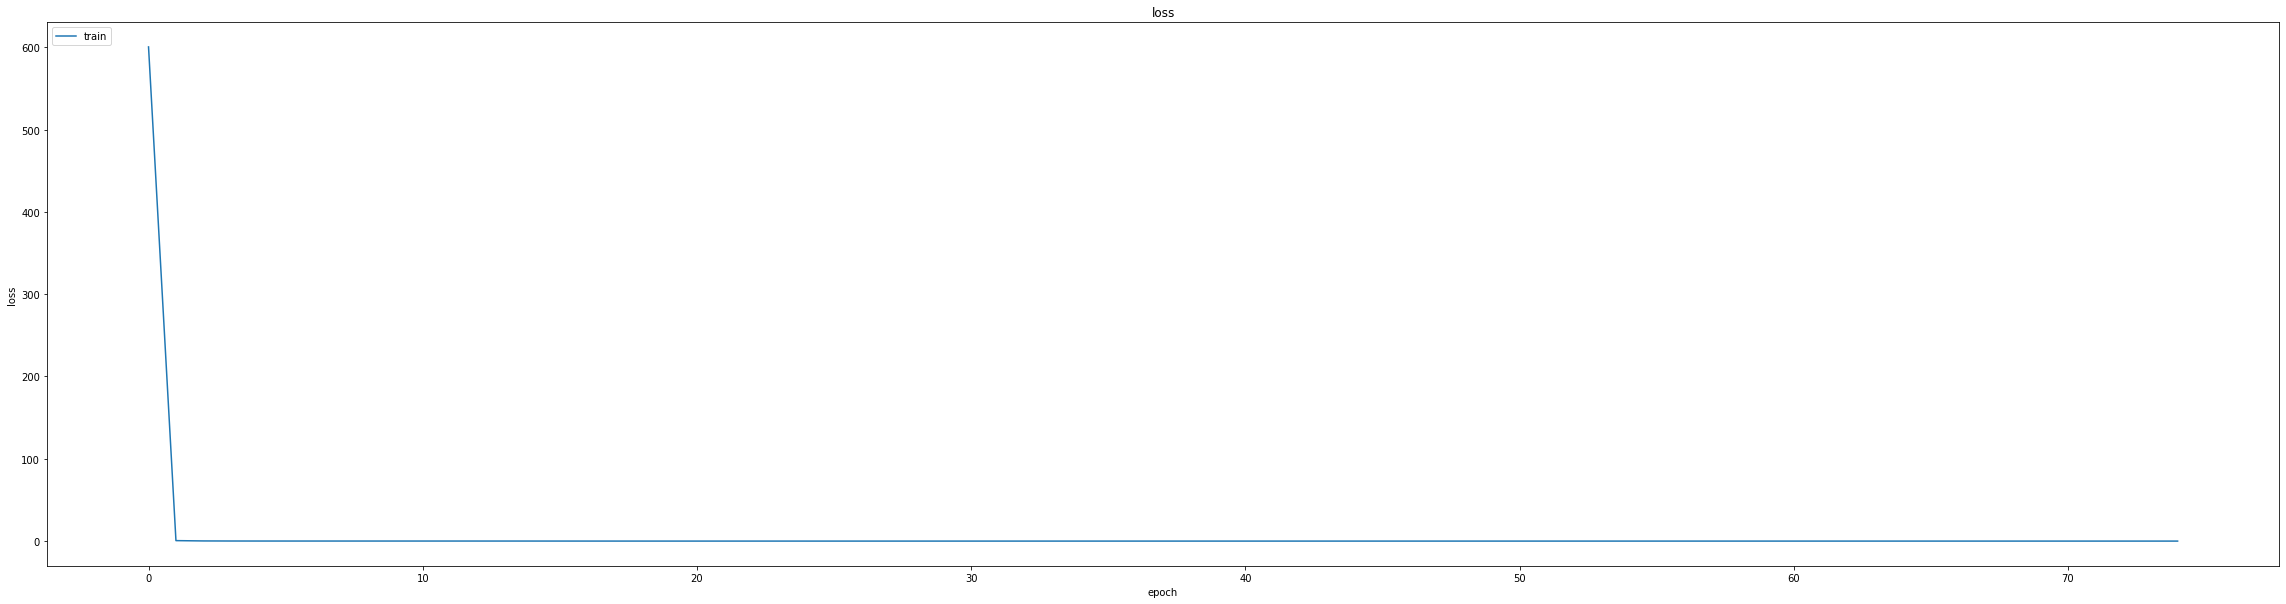

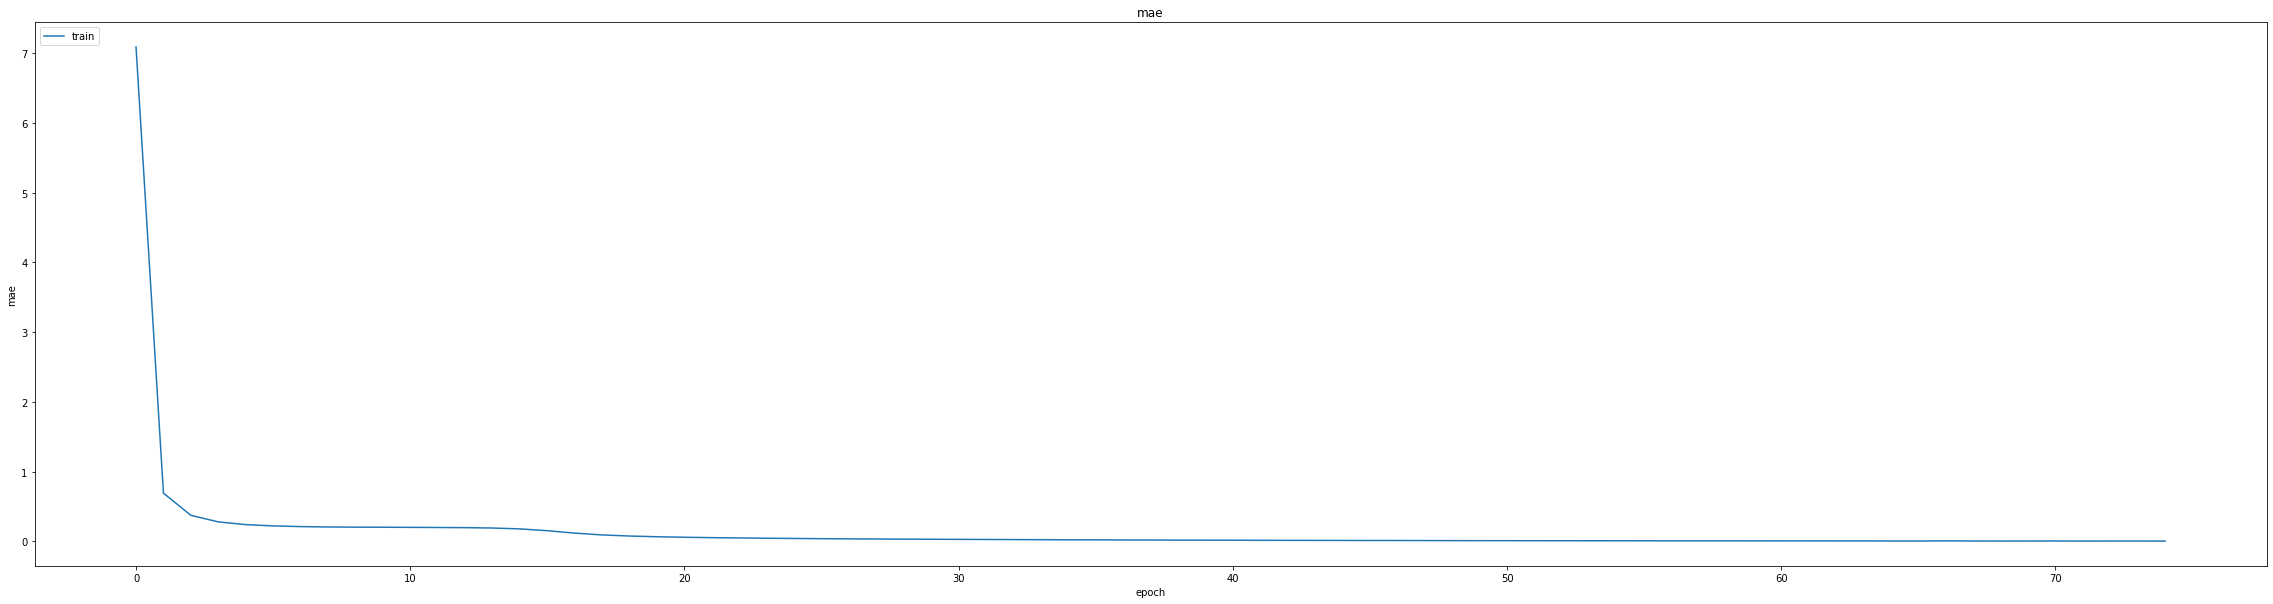

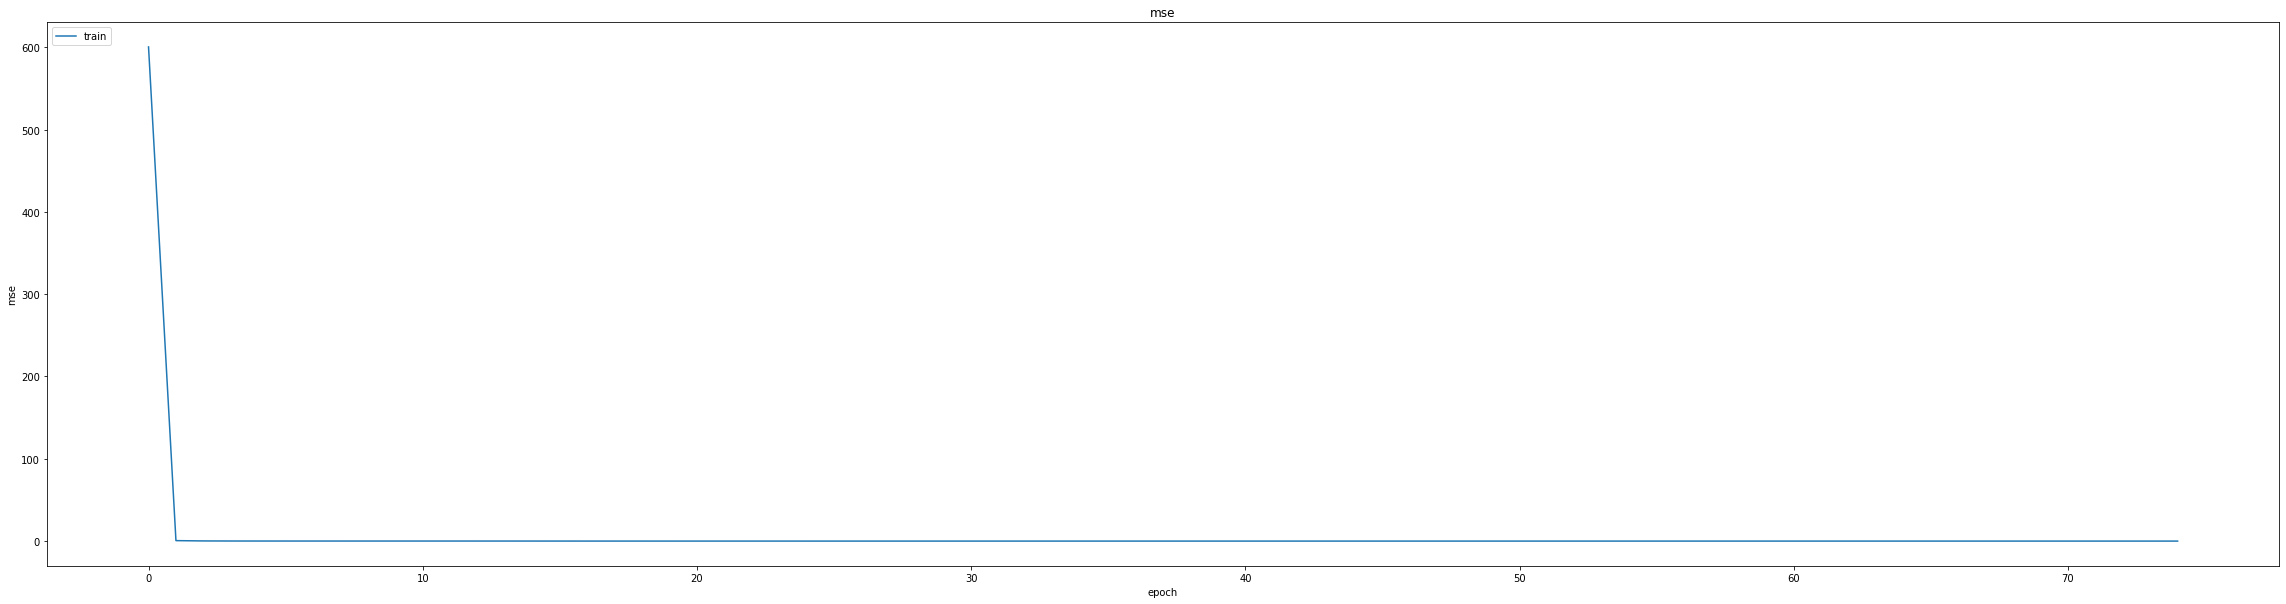

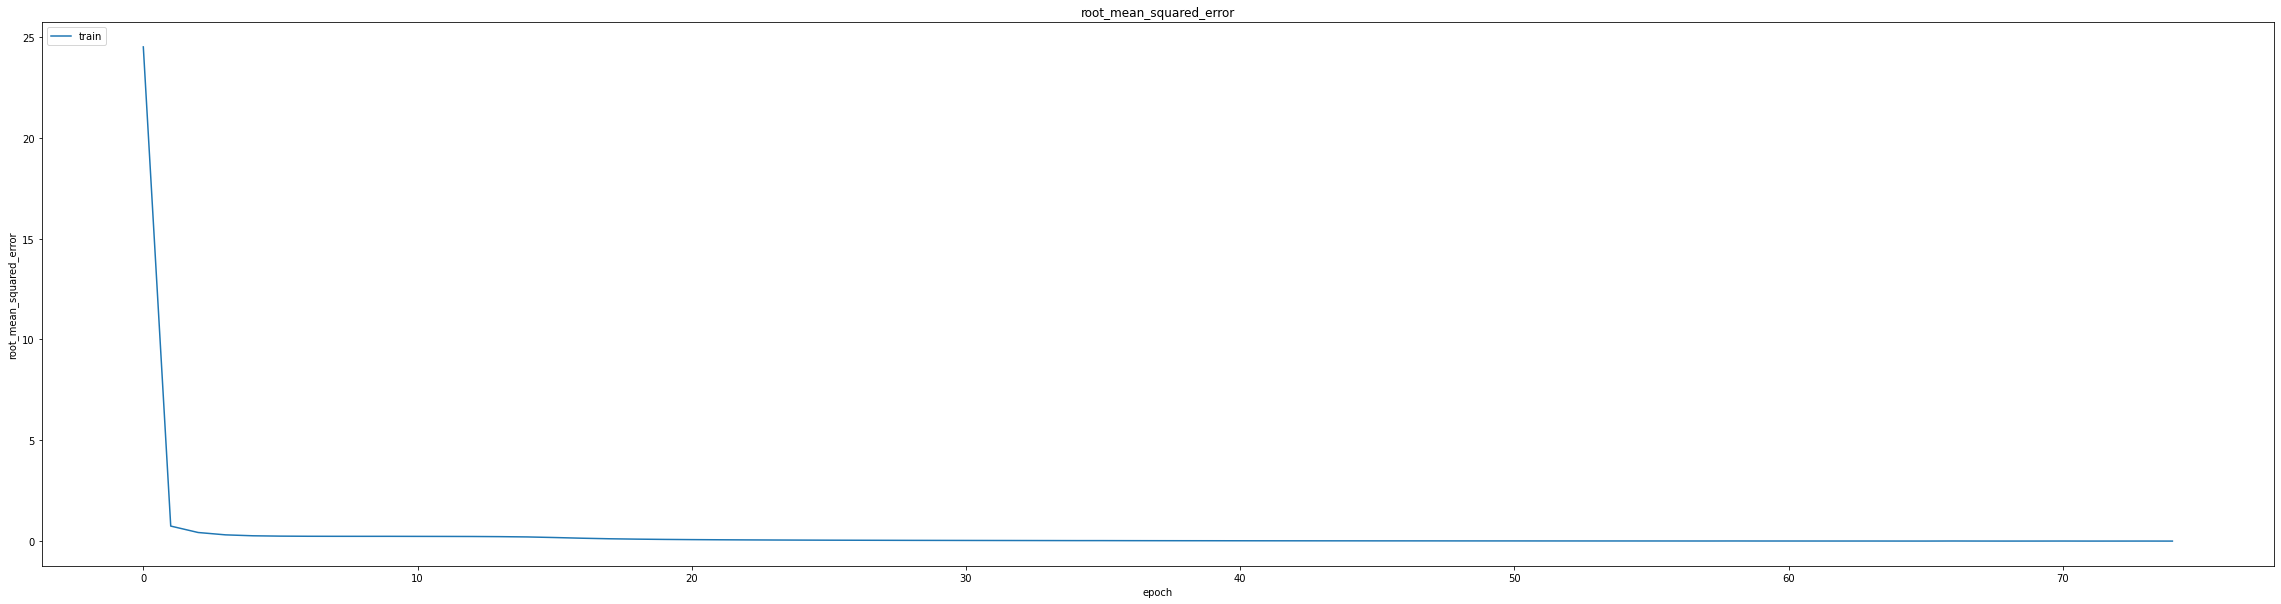

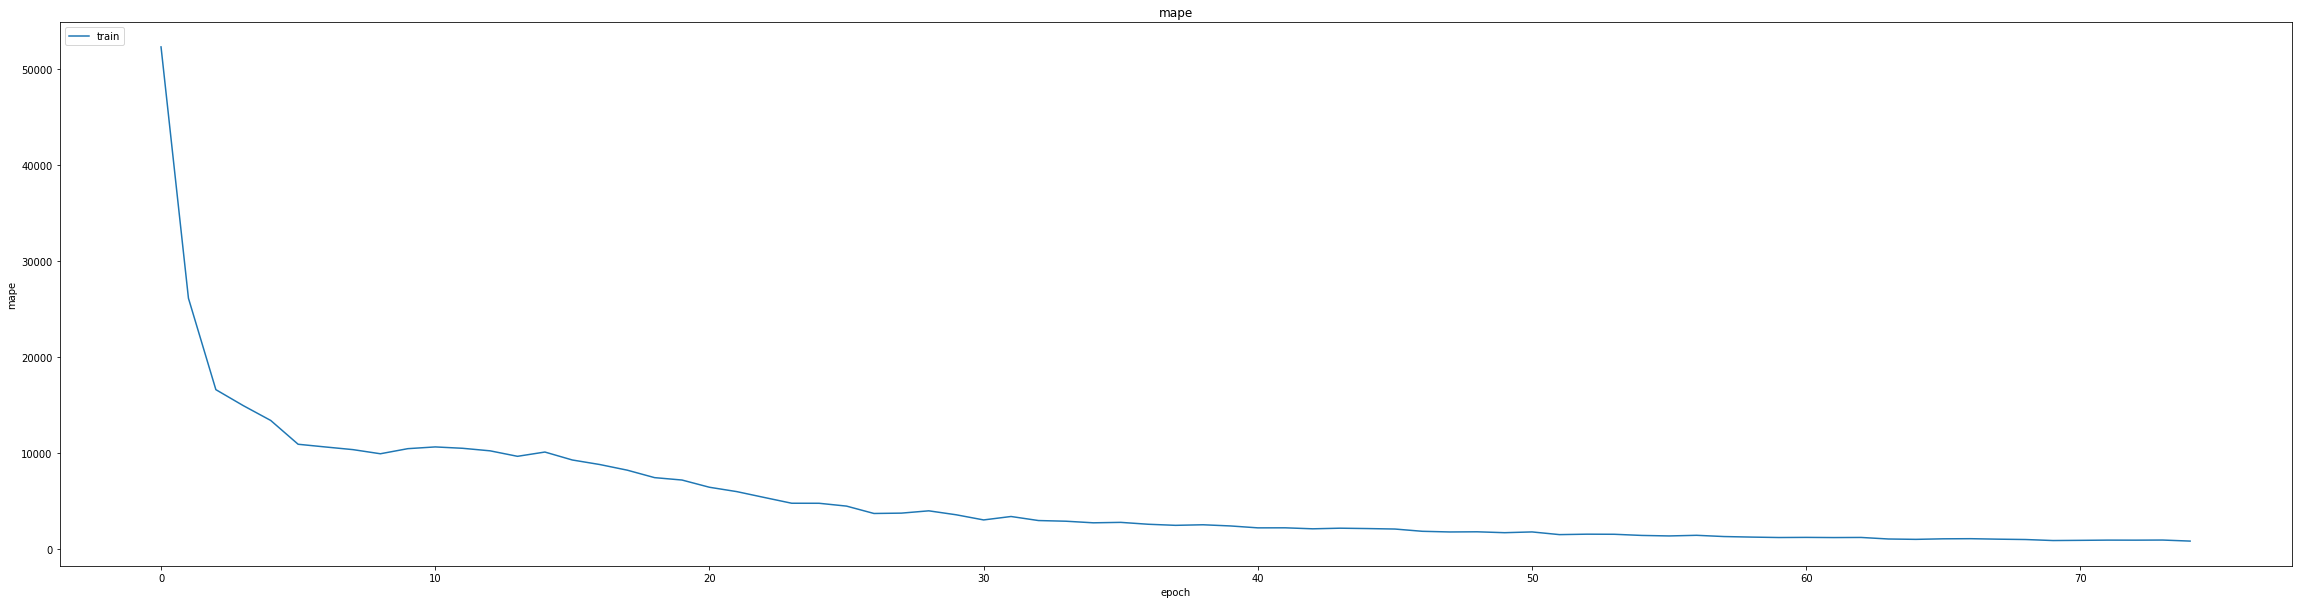

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011564528569579124
0.015470816753804684
464/464 [==============================] - 5s 7ms/step
0.9865930986079879


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0174 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 1659.8835
Epoch 1: val_mse improved from 0.00024 to 0.00023, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 51s 125ms/step - loss: 0.0011 - mae: 0.0174 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1651.8164 - val_loss: 2.2695e-04 - val_mae: 0.0111 - val_mse: 2.2695e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 4651.7837 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 1.6595e-04 - mae: 0.0098 - mse: 1.6595e-04 - root_mean_squared_error: 0.0129 - mape: 1612.0796
Epoch 2: val_mse did not improve from 0.00023
348/348 [==============================] - 7s 21ms/step - loss: 1.6596e-04 - mae: 0.0098 - mse: 1.6596e-04 - root_mean_squared_error: 0.0129 - mape: 1608.8710 - val_loss: 2.7468e-04 - val_mae: 0.0141 - val_mse: 2.7468e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 4189.6191 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
347/348 [============================>.] - ETA: 0s - loss: 1.4150e-04 - mae: 0.0091 - mse: 1.4150e-04 - root_mean_squared_error: 0.0119 - mape: 1433.8524
Epoc

348/348 [==============================] - 43s 124ms/step - loss: 1.4138e-04 - mae: 0.0091 - mse: 1.4138e-04 - root_mean_squared_error: 0.0119 - mape: 1430.9897 - val_loss: 1.9490e-04 - val_mae: 0.0114 - val_mse: 1.9490e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 3960.8745 - lr: 9.0000e-04
Epoch 4/25
346/348 [============================>.] - ETA: 0s - loss: 1.2636e-04 - mae: 0.0086 - mse: 1.2636e-04 - root_mean_squared_error: 0.0112 - mape: 1337.2307
Epoch 4: val_mse did not improve from 0.00019
348/348 [==============================] - 7s 21ms/step - loss: 1.2619e-04 - mae: 0.0086 - mse: 1.2619e-04 - root_mean_squared_error: 0.0112 - mape: 1330.7217 - val_loss: 4.3773e-04 - val_mae: 0.0194 - val_mse: 4.3773e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3605.4988 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
348/348 [==============================] - ETA: 0s - loss: 1.1147e-04 - mae: 0.0081 - mse: 1.1147e-04 - root_mean_squared_error: 0.0106 - mape

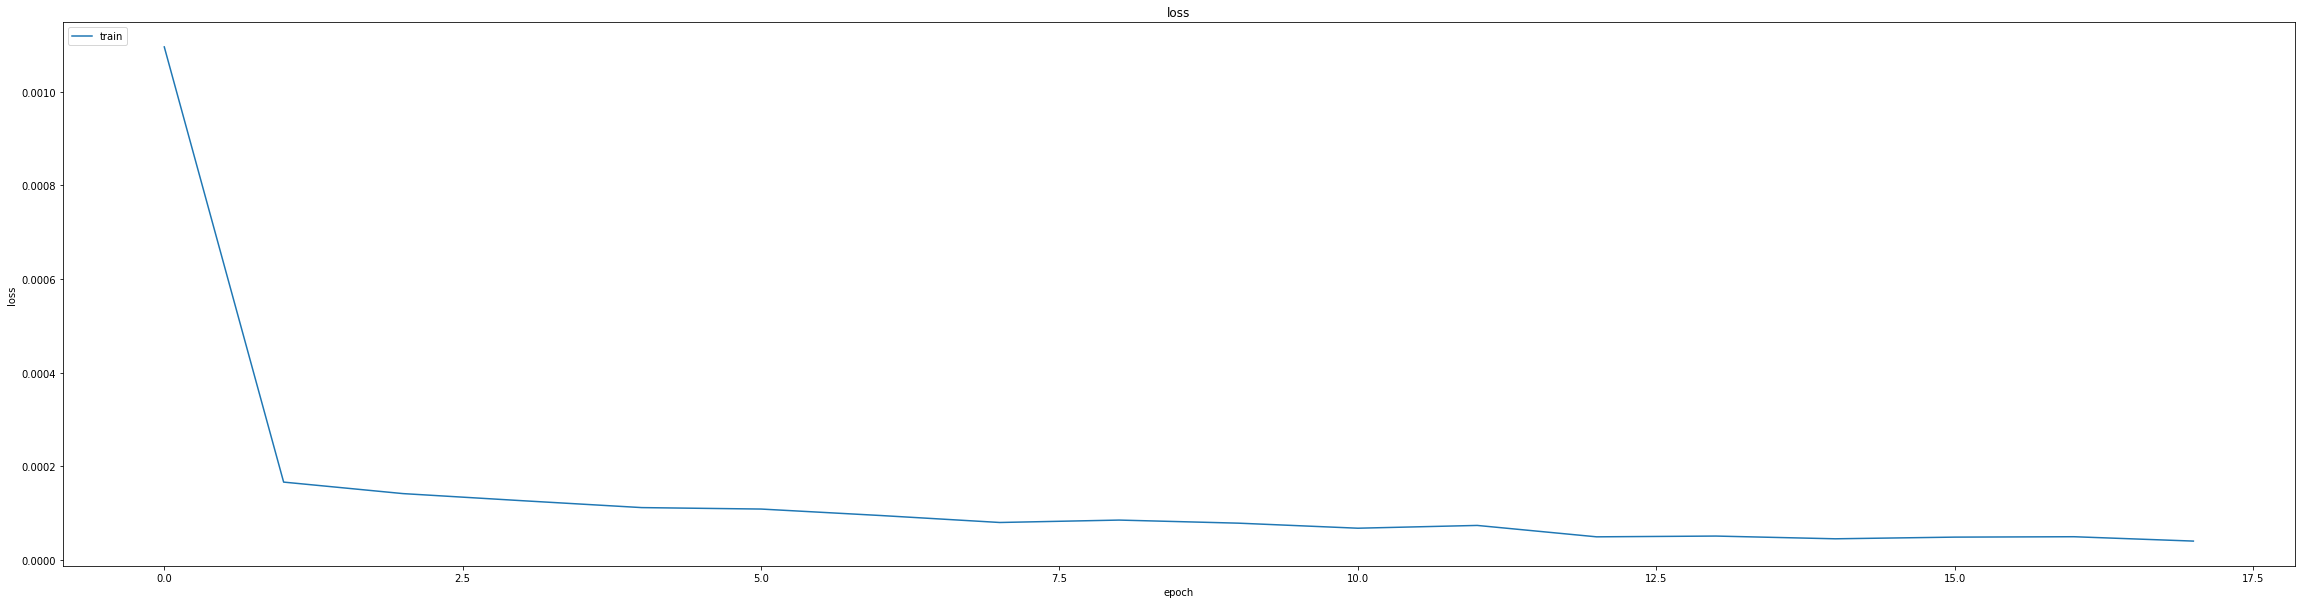

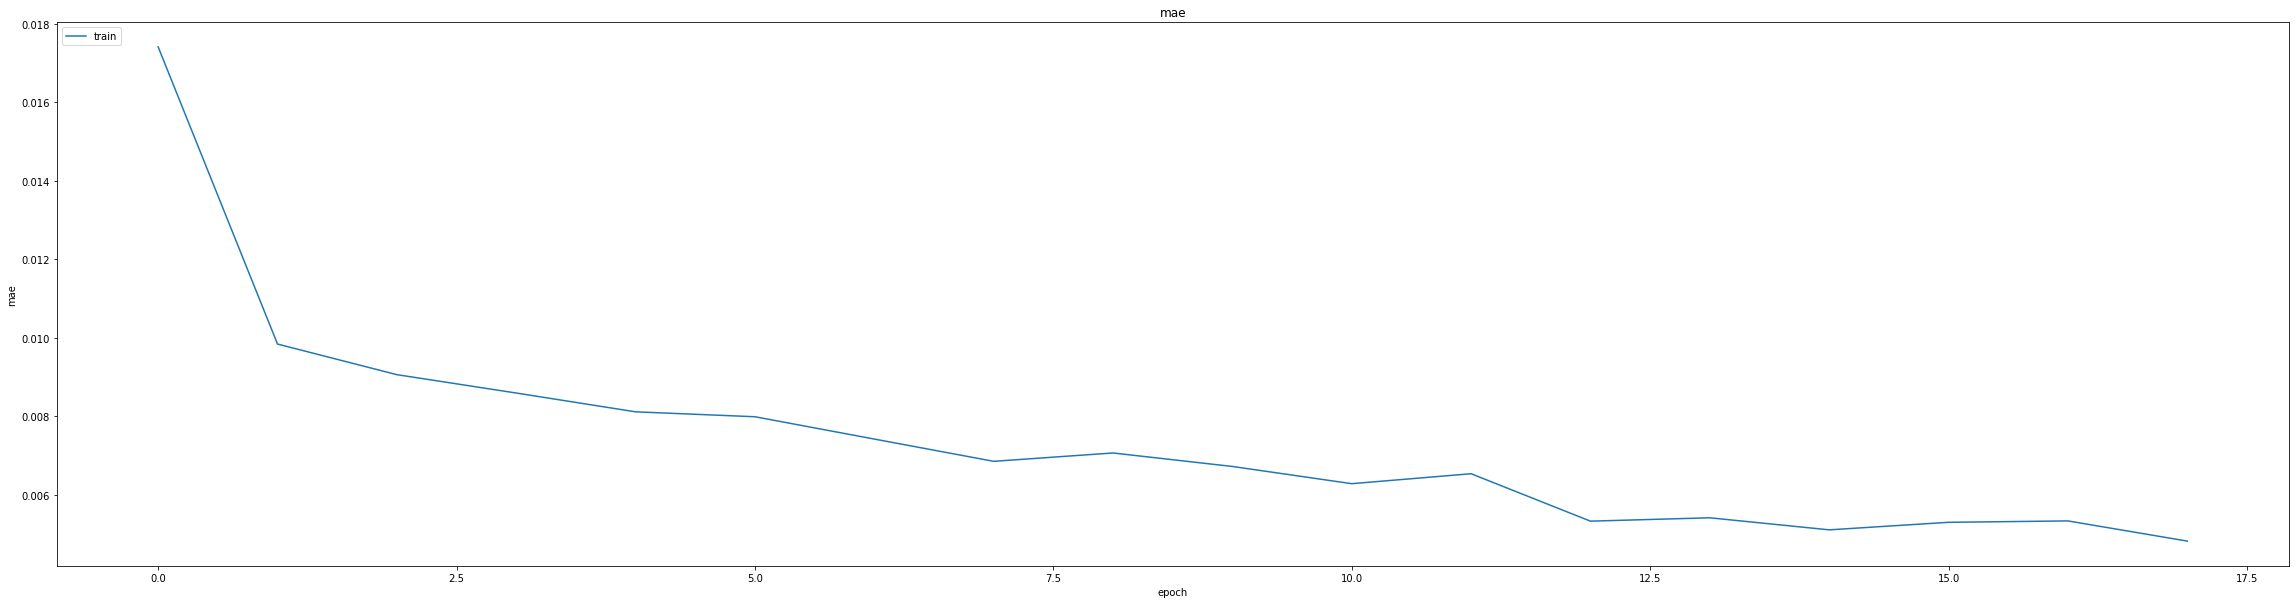

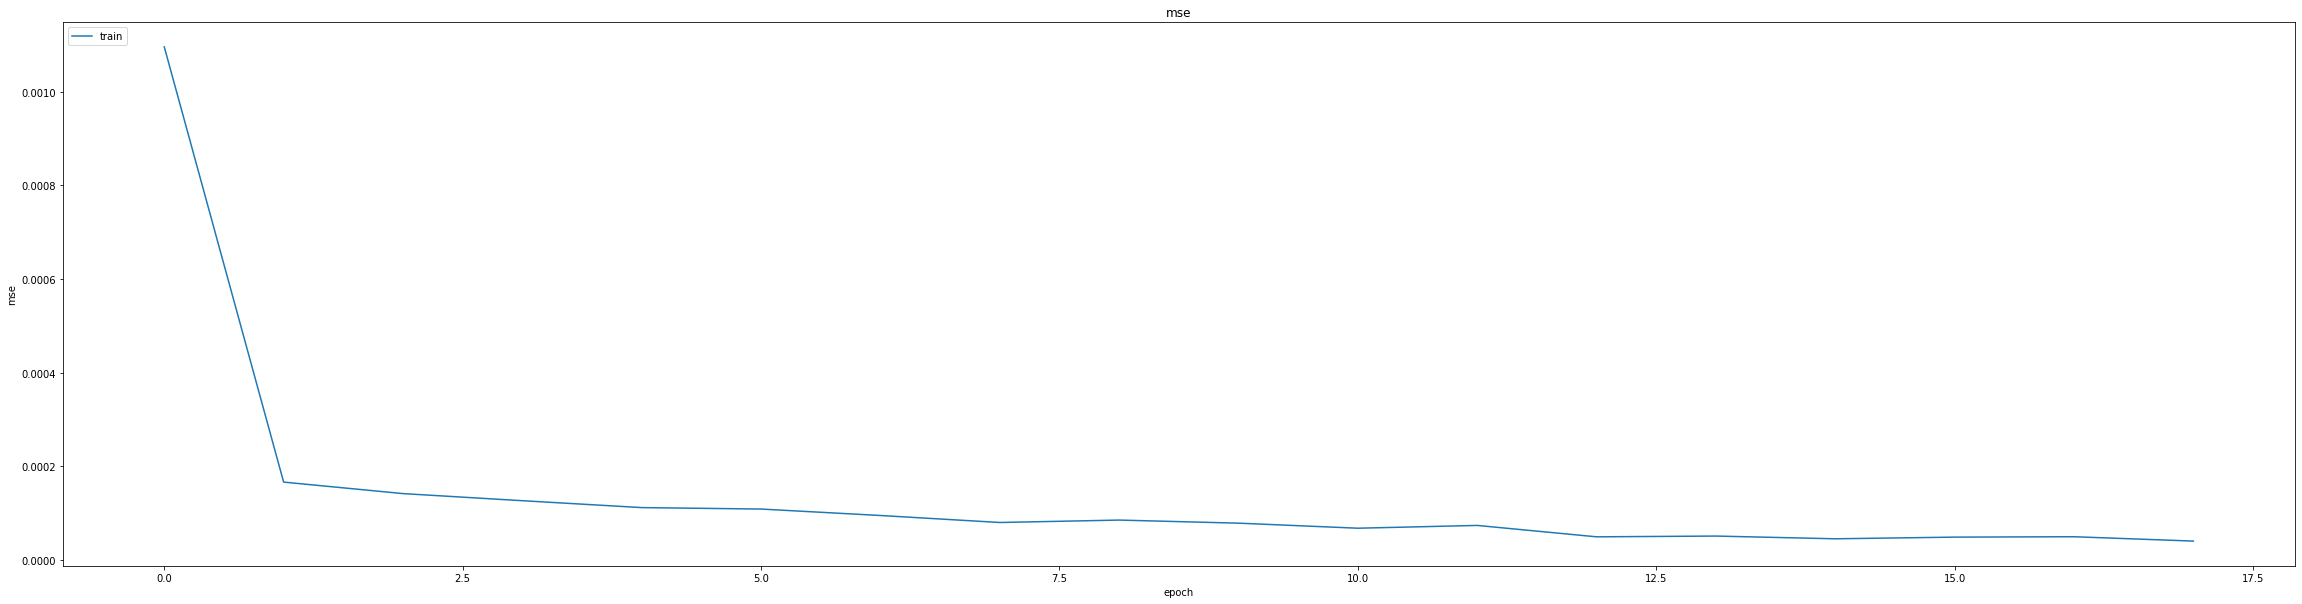

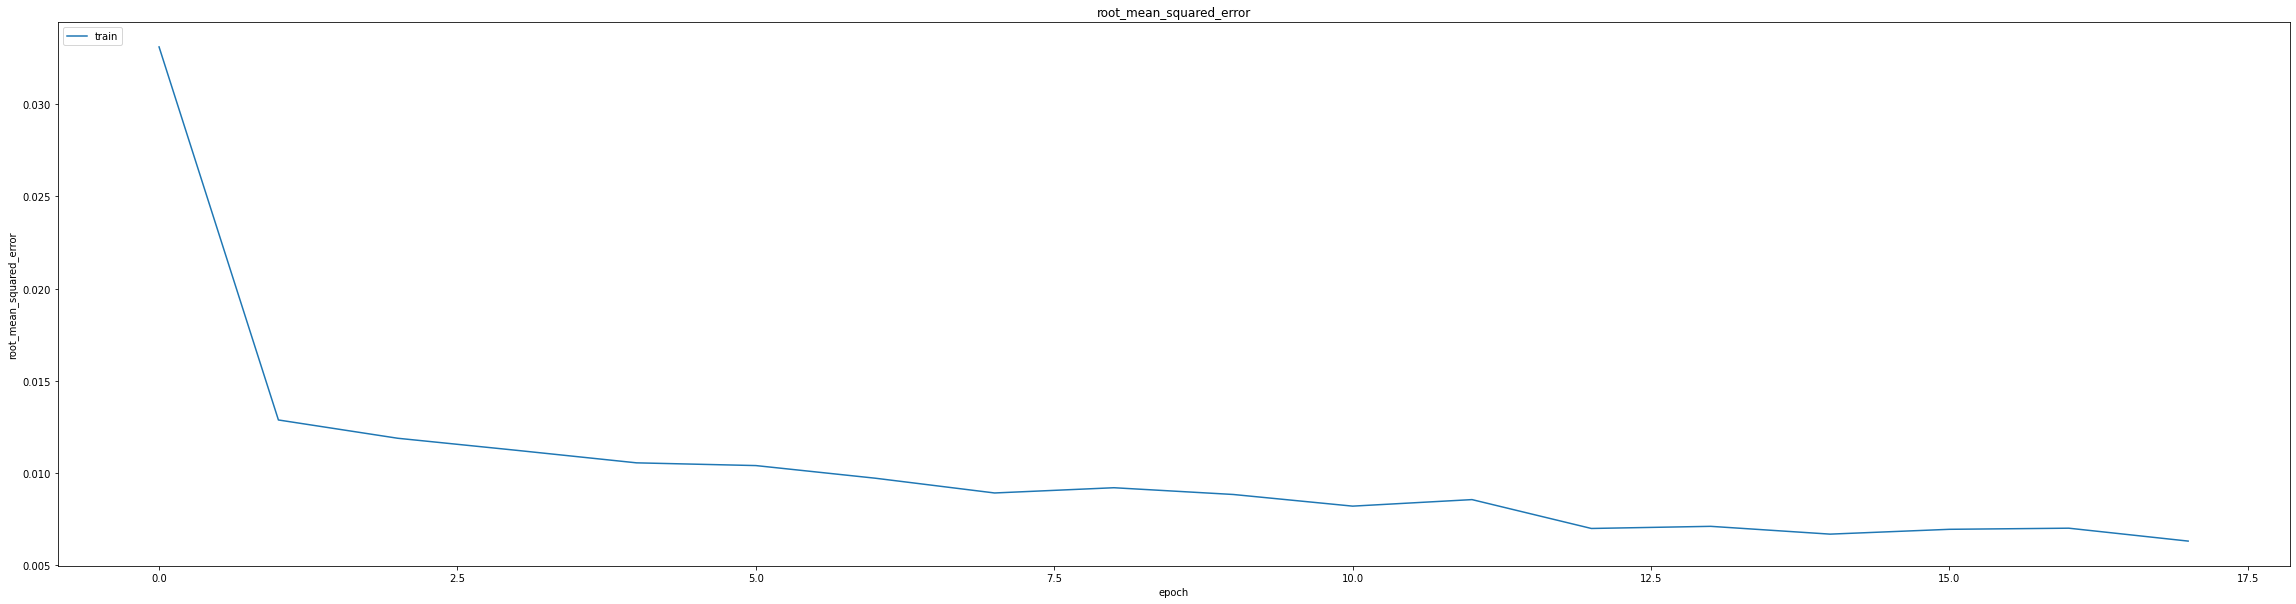

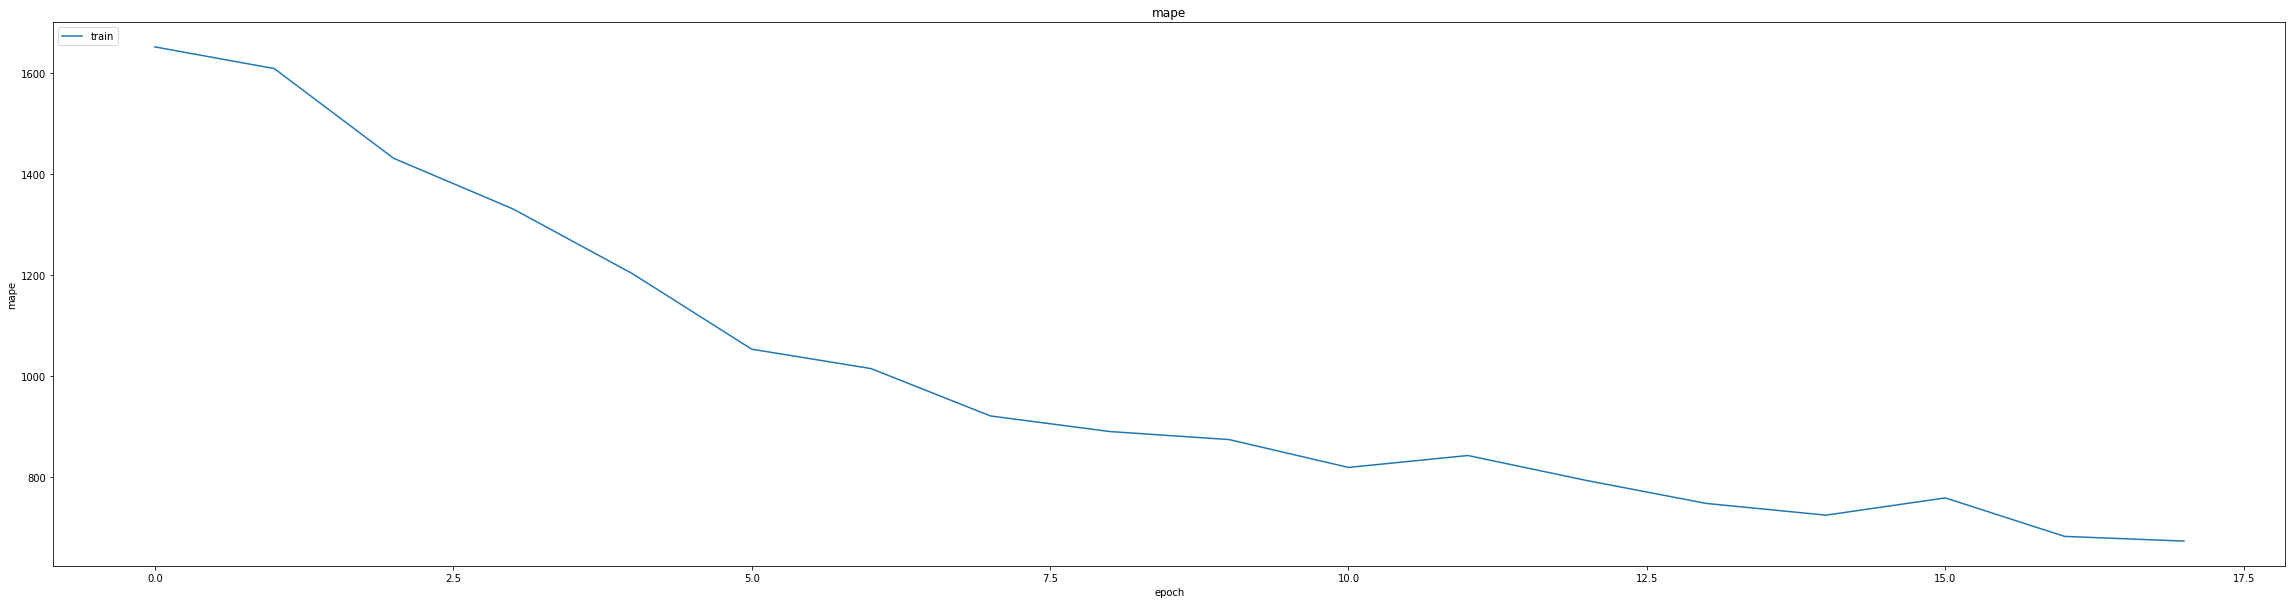

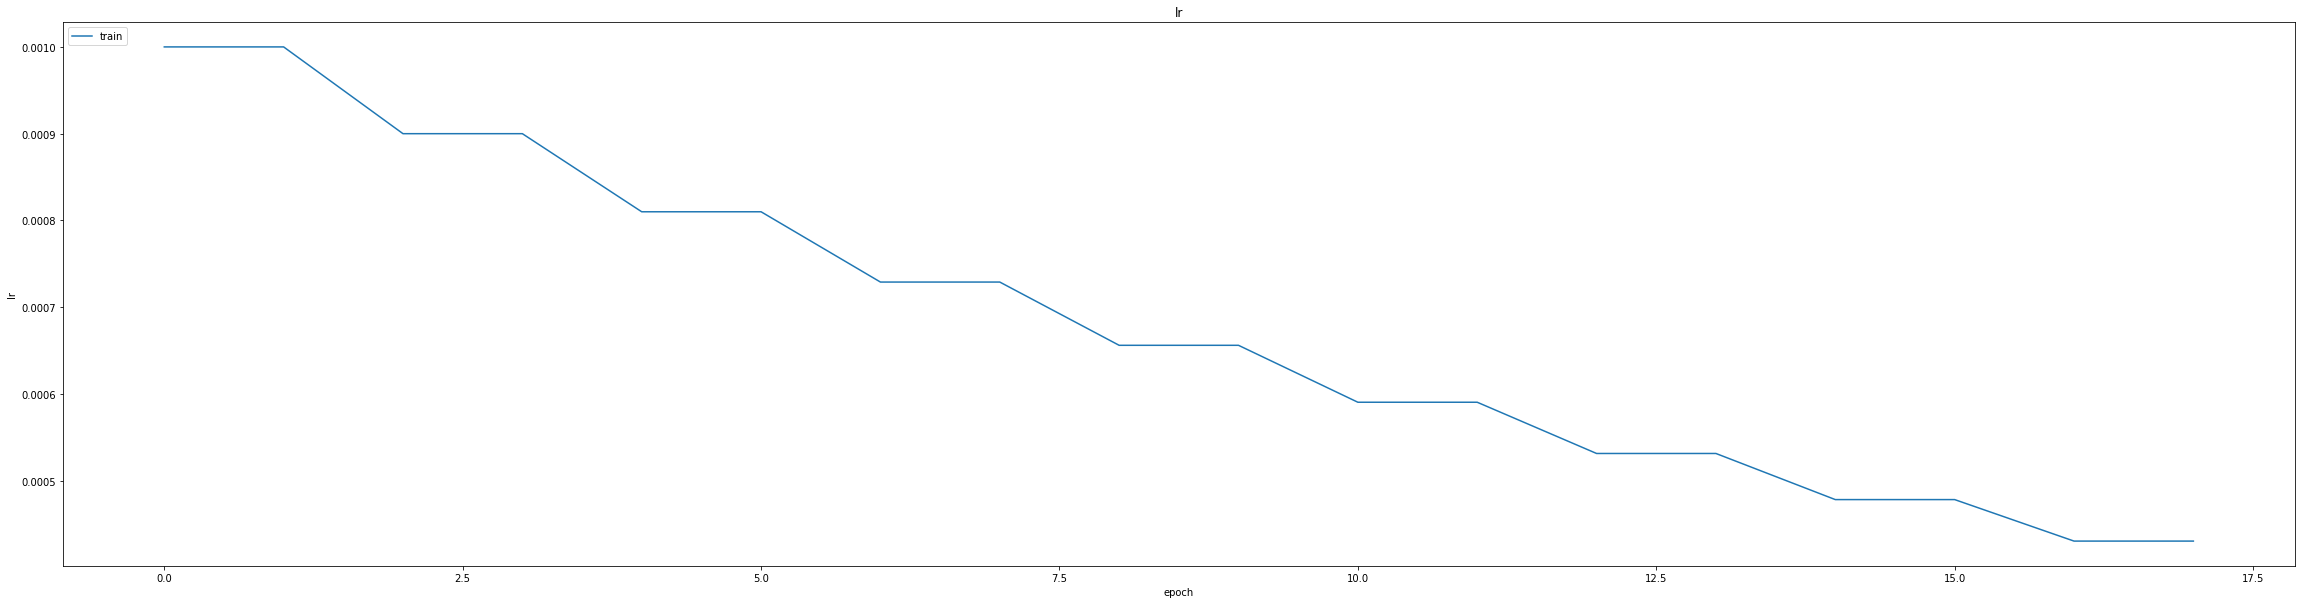

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011095304042100906
0.01396082155406475
464/464 [==============================] - 5s 7ms/step
0.97915766559786


464/464 [==============================] - 3s 7ms/step


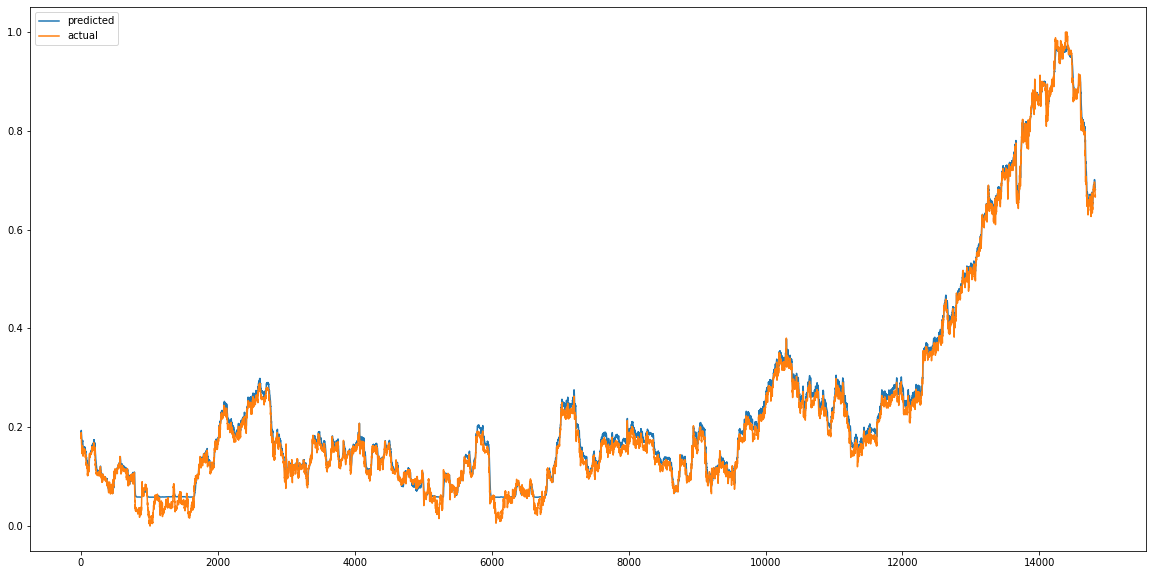

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


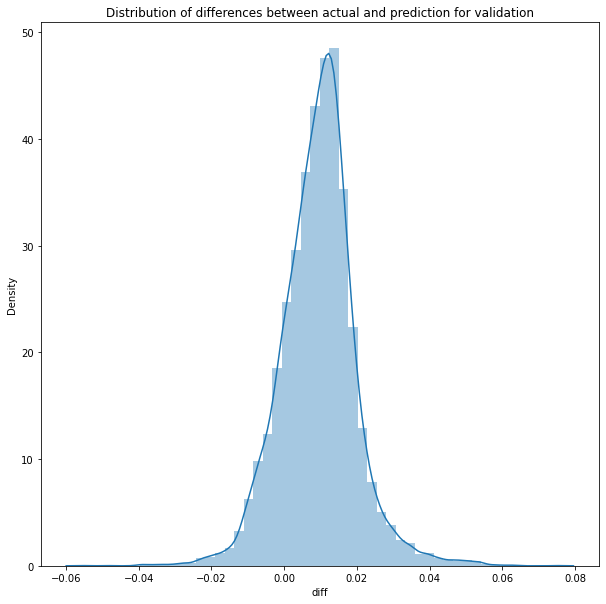

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 4s 9ms/step


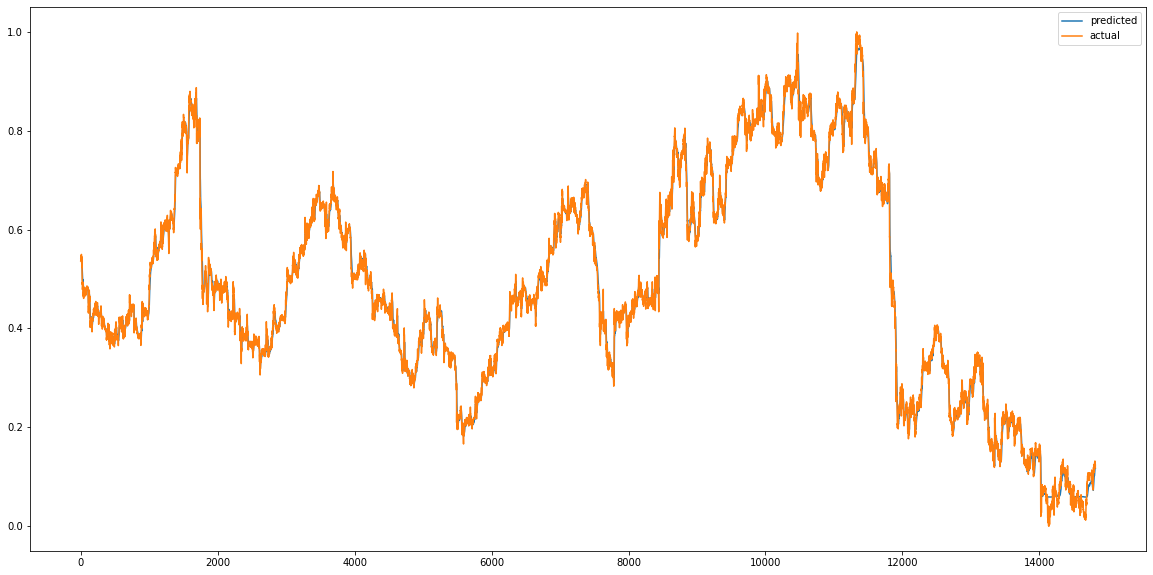

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


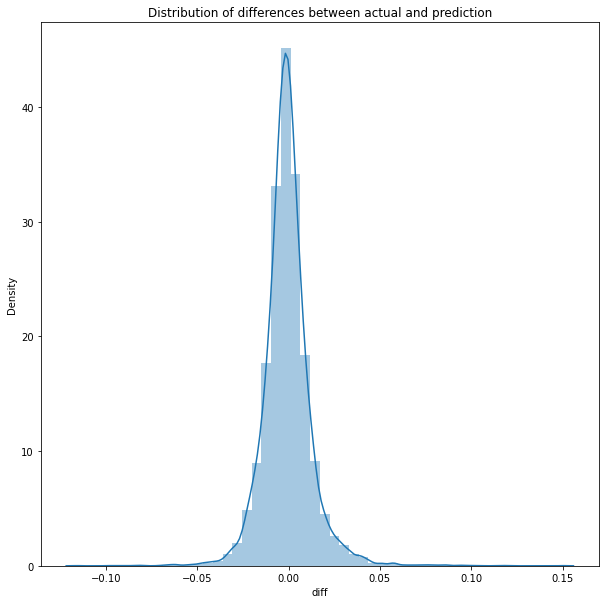

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001745235596087529
RMSE :  0.013210736527868265
MAE :  0.009017467525426221
464/464 [==============================] - 3s 7ms/step
R2_Score  : 0.9964055521810393


count    14819.000000
mean        -0.000765
std          0.013189
min         -0.115962
25%         -0.007252
50%         -0.001228
75%          0.005096
max          0.150193
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 964.5092 - mae: 13.6752 - mse: 964.5092 - root_mean_squared_error: 31.0565 - mape: 285006.1250
Epoch 1: val_mse improved from inf to 9.35603, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 26s 46ms/step - loss: 962.5977 - mae: 13.6538 - mse: 962.5977 - root_mean_squared_error: 31.0258 - mape: 284438.1250 - val_loss: 9.3560 - val_mae: 3.0506 - val_mse: 9.3560 - val_root_mean_squared_error: 3.0588 - val_mape: 224641.2969
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 4.3895 - mae: 2.0375 - mse: 4.3895 - root_mean_squared_error: 2.0951 - mape: 55625.7070
Epoch 2: val_mse improved from 9.35603 to 2.70875, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 4.3792 - mae: 2.0348 - mse: 4.3792 - root_mean_squared_error: 2.0927 - mape: 55357.4336 - val_loss: 2.7087 - val_mae: 1.6307 - val_mse: 2.7087 - val_root_mean_squared_error: 1.6458 - val_mape: 127590.3359
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 1.4157 - mae: 1.1520 - mse: 1.4157 - root_mean_squared_error: 1.1898 - mape: 36494.7695
Epoch 3: val_mse improved from 2.70875 to 1.25904, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 1.4157 - mae: 1.1520 - mse: 1.4157 - root_mean_squared_error: 1.1898 - mape: 36494.7695 - val_loss: 1.2590 - val_mae: 1.0998 - val_mse: 1.2590 - val_root_mean_squared_error: 1.1221 - val_mape: 91301.8438
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.6435 - mae: 0.7581 - mse: 0.6435 - root_mean_squared_error: 0.8022 - mape: 28456.4727
Epoch 4: val_mse improved from 1.25904 to 0.72030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.6435 - mae: 0.7581 - mse: 0.6435 - root_mean_squared_error: 0.8022 - mape: 28456.4727 - val_loss: 0.7203 - val_mae: 0.8190 - val_mse: 0.7203 - val_root_mean_squared_error: 0.8487 - val_mape: 72111.3594
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.3477 - mae: 0.5332 - mse: 0.3477 - root_mean_squared_error: 0.5897 - mape: 24195.9824
Epoch 5: val_mse improved from 0.72030 to 0.46517, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.3474 - mae: 0.5329 - mse: 0.3474 - root_mean_squared_error: 0.5894 - mape: 24078.9766 - val_loss: 0.4652 - val_mae: 0.6480 - val_mse: 0.4652 - val_root_mean_squared_error: 0.6820 - val_mape: 60198.0508
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.2110 - mae: 0.3983 - mse: 0.2110 - root_mean_squared_error: 0.4594 - mape: 17480.1895
Epoch 6: val_mse improved from 0.46517 to 0.32637, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.2110 - mae: 0.3983 - mse: 0.2110 - root_mean_squared_error: 0.4594 - mape: 17480.1895 - val_loss: 0.3264 - val_mae: 0.5414 - val_mse: 0.3264 - val_root_mean_squared_error: 0.5713 - val_mape: 52096.9727
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.1412 - mae: 0.3278 - mse: 0.1412 - root_mean_squared_error: 0.3758 - mape: 17579.9238
Epoch 7: val_mse improved from 0.32637 to 0.24395, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.1412 - mae: 0.3278 - mse: 0.1412 - root_mean_squared_error: 0.3758 - mape: 17579.9238 - val_loss: 0.2439 - val_mae: 0.4684 - val_mse: 0.2439 - val_root_mean_squared_error: 0.4939 - val_mape: 46273.1602
Epoch 8/75
345/348 [============================>.] - ETA: 0s - loss: 0.1041 - mae: 0.2863 - mse: 0.1041 - root_mean_squared_error: 0.3226 - mape: 14510.8564
Epoch 8: val_mse improved from 0.24395 to 0.19186, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.1040 - mae: 0.2862 - mse: 0.1040 - root_mean_squared_error: 0.3225 - mape: 14399.5410 - val_loss: 0.1919 - val_mae: 0.4172 - val_mse: 0.1919 - val_root_mean_squared_error: 0.4380 - val_mape: 41923.8398
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0834 - mae: 0.2584 - mse: 0.0834 - root_mean_squared_error: 0.2887 - mape: 13627.3037
Epoch 9: val_mse improved from 0.19186 to 0.15781, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0833 - mae: 0.2583 - mse: 0.0833 - root_mean_squared_error: 0.2887 - mape: 13600.2266 - val_loss: 0.1578 - val_mae: 0.3798 - val_mse: 0.1578 - val_root_mean_squared_error: 0.3972 - val_mape: 38629.3555
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0720 - mae: 0.2401 - mse: 0.0720 - root_mean_squared_error: 0.2684 - mape: 12775.5605
Epoch 10: val_mse improved from 0.15781 to 0.13481, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0721 - mae: 0.2402 - mse: 0.0721 - root_mean_squared_error: 0.2684 - mape: 12750.2988 - val_loss: 0.1348 - val_mae: 0.3514 - val_mse: 0.1348 - val_root_mean_squared_error: 0.3672 - val_mape: 36099.5078
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0657 - mae: 0.2276 - mse: 0.0657 - root_mean_squared_error: 0.2563 - mape: 11447.2695
Epoch 11: val_mse improved from 0.13481 to 0.11919, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0657 - mae: 0.2275 - mse: 0.0657 - root_mean_squared_error: 0.2563 - mape: 11424.5518 - val_loss: 0.1192 - val_mae: 0.3301 - val_mse: 0.1192 - val_root_mean_squared_error: 0.3452 - val_mape: 34179.8477
Epoch 12/75
344/348 [============================>.] - ETA: 0s - loss: 0.0624 - mae: 0.2189 - mse: 0.0624 - root_mean_squared_error: 0.2498 - mape: 10834.1680
Epoch 12: val_mse improved from 0.11919 to 0.10850, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0624 - mae: 0.2188 - mse: 0.0624 - root_mean_squared_error: 0.2498 - mape: 10719.8389 - val_loss: 0.1085 - val_mae: 0.3145 - val_mse: 0.1085 - val_root_mean_squared_error: 0.3294 - val_mape: 32739.6445
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2129 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 10530.5928
Epoch 13: val_mse improved from 0.10850 to 0.10129, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0608 - mae: 0.2129 - mse: 0.0608 - root_mean_squared_error: 0.2467 - mape: 10509.8193 - val_loss: 0.1013 - val_mae: 0.3032 - val_mse: 0.1013 - val_root_mean_squared_error: 0.3183 - val_mape: 31691.1113
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0601 - mae: 0.2091 - mse: 0.0601 - root_mean_squared_error: 0.2452 - mape: 10255.1553
Epoch 14: val_mse improved from 0.10129 to 0.09648, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0601 - mae: 0.2091 - mse: 0.0601 - root_mean_squared_error: 0.2452 - mape: 10234.8330 - val_loss: 0.0965 - val_mae: 0.2953 - val_mse: 0.0965 - val_root_mean_squared_error: 0.3106 - val_mape: 30951.2090
Epoch 15/75
344/348 [============================>.] - ETA: 0s - loss: 0.0600 - mae: 0.2068 - mse: 0.0600 - root_mean_squared_error: 0.2449 - mape: 10601.7031
Epoch 15: val_mse improved from 0.09648 to 0.09351, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0600 - mae: 0.2068 - mse: 0.0600 - root_mean_squared_error: 0.2449 - mape: 10489.9648 - val_loss: 0.0935 - val_mae: 0.2903 - val_mse: 0.0935 - val_root_mean_squared_error: 0.3058 - val_mape: 30476.4824
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.2052 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 10354.4990
Epoch 16: val_mse improved from 0.09351 to 0.09173, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0597 - mae: 0.2052 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 10333.9824 - val_loss: 0.0917 - val_mae: 0.2872 - val_mse: 0.0917 - val_root_mean_squared_error: 0.3029 - val_mape: 30183.1953
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2045 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 10422.4443
Epoch 17: val_mse improved from 0.09173 to 0.09093, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0596 - mae: 0.2045 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 10342.2637 - val_loss: 0.0909 - val_mae: 0.2858 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3016 - val_mape: 30049.9121
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0598 - mae: 0.2044 - mse: 0.0598 - root_mean_squared_error: 0.2445 - mape: 10023.4395
Epoch 18: val_mse improved from 0.09093 to 0.09069, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0597 - mae: 0.2043 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 9946.3252 - val_loss: 0.0907 - val_mae: 0.2854 - val_mse: 0.0907 - val_root_mean_squared_error: 0.3011 - val_mape: 30009.1289
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2040 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 10710.1377
Epoch 19: val_mse improved from 0.09069 to 0.09013, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.0596 - mae: 0.2040 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 10627.6719 - val_loss: 0.0901 - val_mae: 0.2844 - val_mse: 0.0901 - val_root_mean_squared_error: 0.3002 - val_mape: 29915.3457
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 0.0596 - mae: 0.2037 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 9599.4600
Epoch 20: val_mse did not improve from 0.09013
348/348 [==============================] - 4s 12ms/step - loss: 0.0596 - mae: 0.2037 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 9599.4600 - val_loss: 0.0904 - val_mae: 0.2849 - val_mse: 0.0904 - val_root_mean_squared_error: 0.3007 - val_mape: 29967.3262
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.2041 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 10130.3213
Epoch 21: val_mse did not improve from 0.09013
348/348 [==============================] - 4s 12ms/st

348/348 [==============================] - 15s 43ms/step - loss: 0.0596 - mae: 0.2040 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 10136.1777 - val_loss: 0.0900 - val_mae: 0.2841 - val_mse: 0.0900 - val_root_mean_squared_error: 0.3000 - val_mape: 29891.5645
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 0.0597 - mae: 0.2039 - mse: 0.0597 - root_mean_squared_error: 0.2442 - mape: 10324.6631
Epoch 23: val_mse did not improve from 0.08999
348/348 [==============================] - 4s 12ms/step - loss: 0.0597 - mae: 0.2039 - mse: 0.0597 - root_mean_squared_error: 0.2442 - mape: 10324.6631 - val_loss: 0.0908 - val_mae: 0.2856 - val_mse: 0.0908 - val_root_mean_squared_error: 0.3014 - val_mape: 30032.0664
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2039 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 10121.5791
Epoch 24: val_mse did not improve from 0.08999
348/348 [==============================] - 4s 12ms/

348/348 [==============================] - 15s 44ms/step - loss: 0.0596 - mae: 0.2038 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 10411.2314 - val_loss: 0.0894 - val_mae: 0.2830 - val_mse: 0.0894 - val_root_mean_squared_error: 0.2990 - val_mape: 29788.3613
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.2036 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 10367.7188
Epoch 32: val_mse improved from 0.08939 to 0.08830, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0595 - mae: 0.2036 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 10317.5283 - val_loss: 0.0883 - val_mae: 0.2810 - val_mse: 0.0883 - val_root_mean_squared_error: 0.2972 - val_mape: 29600.6074
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2036 - mse: 0.0596 - root_mean_squared_error: 0.2440 - mape: 10347.0928
Epoch 33: val_mse did not improve from 0.08830
348/348 [==============================] - 4s 12ms/step - loss: 0.0595 - mae: 0.2035 - mse: 0.0595 - root_mean_squared_error: 0.2440 - mape: 10237.8750 - val_loss: 0.0919 - val_mae: 0.2875 - val_mse: 0.0919 - val_root_mean_squared_error: 0.3032 - val_mape: 30211.9043
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.2037 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 12879.0410
Epoch 34: val_mse did not improve from 0.08830
348/348 [==============================] - 4s 12ms/

348/348 [==============================] - 15s 43ms/step - loss: 0.0594 - mae: 0.2036 - mse: 0.0594 - root_mean_squared_error: 0.2436 - mape: 11497.4258 - val_loss: 0.0871 - val_mae: 0.2788 - val_mse: 0.0871 - val_root_mean_squared_error: 0.2950 - val_mape: 29381.9043
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 0.0593 - mae: 0.2032 - mse: 0.0593 - root_mean_squared_error: 0.2435 - mape: 9784.7285
Epoch 42: val_mse did not improve from 0.08705
348/348 [==============================] - 4s 12ms/step - loss: 0.0593 - mae: 0.2032 - mse: 0.0593 - root_mean_squared_error: 0.2435 - mape: 9784.7285 - val_loss: 0.0884 - val_mae: 0.2813 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2974 - val_mape: 29622.4277
Epoch 43/75
345/348 [============================>.] - ETA: 0s - loss: 0.0594 - mae: 0.2035 - mse: 0.0594 - root_mean_squared_error: 0.2437 - mape: 10119.8896
Epoch 43: val_mse did not improve from 0.08705
348/348 [==============================] - 4s 12ms/st

348/348 [==============================] - 15s 44ms/step - loss: 0.0593 - mae: 0.2034 - mse: 0.0593 - root_mean_squared_error: 0.2436 - mape: 9806.6787 - val_loss: 0.0851 - val_mae: 0.2753 - val_mse: 0.0851 - val_root_mean_squared_error: 0.2918 - val_mape: 29064.9746
Epoch 45/75
344/348 [============================>.] - ETA: 0s - loss: 0.0586 - mae: 0.2017 - mse: 0.0586 - root_mean_squared_error: 0.2421 - mape: 10073.9111
Epoch 45: val_mse did not improve from 0.08515
348/348 [==============================] - 4s 12ms/step - loss: 0.0586 - mae: 0.2018 - mse: 0.0586 - root_mean_squared_error: 0.2421 - mape: 9967.8584 - val_loss: 0.0921 - val_mae: 0.2878 - val_mse: 0.0921 - val_root_mean_squared_error: 0.3034 - val_mape: 30238.3223
Epoch 46/75
346/348 [============================>.] - ETA: 0s - loss: 0.0590 - mae: 0.2022 - mse: 0.0590 - root_mean_squared_error: 0.2428 - mape: 12628.0215
Epoch 46: val_mse did not improve from 0.08515
348/348 [==============================] - 4s 12ms/st

348/348 [==============================] - 15s 44ms/step - loss: 0.0154 - mae: 0.0850 - mse: 0.0154 - root_mean_squared_error: 0.1241 - mape: 4118.0098 - val_loss: 0.0036 - val_mae: 0.0466 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0603 - val_mape: 11079.3125
Epoch 48/75
345/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0356 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 2844.3645
Epoch 48: val_mse improved from 0.00364 to 0.00185, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0021 - mae: 0.0355 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 2822.4053 - val_loss: 0.0018 - val_mae: 0.0320 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0430 - val_mape: 9019.5137
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 2834.6233
Epoch 49: val_mse improved from 0.00185 to 0.00140, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 2812.7375 - val_loss: 0.0014 - val_mae: 0.0290 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 7837.3809
Epoch 50/75
345/348 [============================>.] - ETA: 0s - loss: 8.6640e-04 - mae: 0.0226 - mse: 8.6640e-04 - root_mean_squared_error: 0.0294 - mape: 2493.9915
Epoch 50: val_mse improved from 0.00140 to 0.00105, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.6530e-04 - mae: 0.0226 - mse: 8.6530e-04 - root_mean_squared_error: 0.0294 - mape: 2474.7629 - val_loss: 0.0011 - val_mae: 0.0251 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 7234.7578
Epoch 51/75
344/348 [============================>.] - ETA: 0s - loss: 6.5099e-04 - mae: 0.0197 - mse: 6.5099e-04 - root_mean_squared_error: 0.0255 - mape: 2150.1294
Epoch 51: val_mse improved from 0.00105 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 6.5208e-04 - mae: 0.0197 - mse: 6.5208e-04 - root_mean_squared_error: 0.0255 - mape: 2127.3489 - val_loss: 7.1978e-04 - val_mae: 0.0193 - val_mse: 7.1978e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 6786.5479
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 5.3541e-04 - mae: 0.0178 - mse: 5.3541e-04 - root_mean_squared_error: 0.0231 - mape: 2237.2966
Epoch 52: val_mse improved from 0.00072 to 0.00064, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 5.3563e-04 - mae: 0.0178 - mse: 5.3563e-04 - root_mean_squared_error: 0.0231 - mape: 2232.8345 - val_loss: 6.4258e-04 - val_mae: 0.0188 - val_mse: 6.4258e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 6375.8530
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 4.6762e-04 - mae: 0.0166 - mse: 4.6762e-04 - root_mean_squared_error: 0.0216 - mape: 2301.6477
Epoch 53: val_mse improved from 0.00064 to 0.00054, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.6710e-04 - mae: 0.0166 - mse: 4.6710e-04 - root_mean_squared_error: 0.0216 - mape: 2290.4590 - val_loss: 5.4267e-04 - val_mae: 0.0172 - val_mse: 5.4267e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 6034.5532
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 3.9231e-04 - mae: 0.0152 - mse: 3.9231e-04 - root_mean_squared_error: 0.0198 - mape: 1931.1005
Epoch 54: val_mse did not improve from 0.00054
348/348 [==============================] - 4s 12ms/step - loss: 3.9230e-04 - mae: 0.0152 - mse: 3.9230e-04 - root_mean_squared_error: 0.0198 - mape: 1921.7102 - val_loss: 5.7774e-04 - val_mae: 0.0185 - val_mse: 5.7774e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 5726.1631
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 3.5283e-04 - mae: 0.0144 - mse: 3.5283e-04 - root_mean_squared_error: 0.0188 - mape: 2041.3500
Epoch 55: val_mse improved from 0.00054 to 0.00038, savi

348/348 [==============================] - 15s 44ms/step - loss: 3.5294e-04 - mae: 0.0144 - mse: 3.5294e-04 - root_mean_squared_error: 0.0188 - mape: 2037.2758 - val_loss: 3.8289e-04 - val_mae: 0.0141 - val_mse: 3.8289e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 5476.5635
Epoch 56/75
345/348 [============================>.] - ETA: 0s - loss: 3.4396e-04 - mae: 0.0143 - mse: 3.4396e-04 - root_mean_squared_error: 0.0185 - mape: 1915.3765
Epoch 56: val_mse did not improve from 0.00038
348/348 [==============================] - 4s 12ms/step - loss: 3.4486e-04 - mae: 0.0143 - mse: 3.4486e-04 - root_mean_squared_error: 0.0186 - mape: 1900.5803 - val_loss: 5.5581e-04 - val_mae: 0.0185 - val_mse: 5.5581e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 5410.0864
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 2.9892e-04 - mae: 0.0133 - mse: 2.9892e-04 - root_mean_squared_error: 0.0173 - mape: 1698.5071
Epoch 57: val_mse improved from 0.00038 to 0.00033, savi

348/348 [==============================] - 15s 44ms/step - loss: 2.9865e-04 - mae: 0.0132 - mse: 2.9865e-04 - root_mean_squared_error: 0.0173 - mape: 1695.1158 - val_loss: 3.3045e-04 - val_mae: 0.0132 - val_mse: 3.3045e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 5138.9946
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 2.6443e-04 - mae: 0.0124 - mse: 2.6443e-04 - root_mean_squared_error: 0.0163 - mape: 7.6354
Epoch 58: val_mse improved from 0.00033 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.6435e-04 - mae: 0.0124 - mse: 2.6435e-04 - root_mean_squared_error: 0.0163 - mape: 1610.3684 - val_loss: 2.7348e-04 - val_mae: 0.0115 - val_mse: 2.7348e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 4936.1274
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 2.4692e-04 - mae: 0.0121 - mse: 2.4692e-04 - root_mean_squared_error: 0.0157 - mape: 1586.9550
Epoch 59: val_mse improved from 0.00027 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 2.4696e-04 - mae: 0.0121 - mse: 2.4696e-04 - root_mean_squared_error: 0.0157 - mape: 1583.8368 - val_loss: 2.4431e-04 - val_mae: 0.0111 - val_mse: 2.4431e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 4705.7007
Epoch 60/75
348/348 [==============================] - ETA: 0s - loss: 2.3576e-04 - mae: 0.0119 - mse: 2.3576e-04 - root_mean_squared_error: 0.0154 - mape: 1750.8417
Epoch 60: val_mse improved from 0.00024 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.3576e-04 - mae: 0.0119 - mse: 2.3576e-04 - root_mean_squared_error: 0.0154 - mape: 1750.8417 - val_loss: 2.2492e-04 - val_mae: 0.0106 - val_mse: 2.2492e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 4538.0923
Epoch 61/75
345/348 [============================>.] - ETA: 0s - loss: 2.1117e-04 - mae: 0.0112 - mse: 2.1117e-04 - root_mean_squared_error: 0.0145 - mape: 1550.3223
Epoch 61: val_mse did not improve from 0.00022
348/348 [==============================] - 4s 12ms/step - loss: 2.1121e-04 - mae: 0.0112 - mse: 2.1121e-04 - root_mean_squared_error: 0.0145 - mape: 1538.3398 - val_loss: 3.2661e-04 - val_mae: 0.0137 - val_mse: 3.2661e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 4252.7915
Epoch 62/75
346/348 [============================>.] - ETA: 0s - loss: 1.8757e-04 - mae: 0.0105 - mse: 1.8757e-04 - root_mean_squared_error: 0.0137 - mape: 1414.9401
Epoch 62: val_mse did not improve from 0.00022
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.8693e-04 - mae: 0.0105 - mse: 1.8693e-04 - root_mean_squared_error: 0.0137 - mape: 1329.7103 - val_loss: 2.2200e-04 - val_mae: 0.0117 - val_mse: 2.2200e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 3970.4878
Epoch 64/75
345/348 [============================>.] - ETA: 0s - loss: 1.6898e-04 - mae: 0.0100 - mse: 1.6898e-04 - root_mean_squared_error: 0.0130 - mape: 1313.7036
Epoch 64: val_mse improved from 0.00022 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.6893e-04 - mae: 0.0100 - mse: 1.6893e-04 - root_mean_squared_error: 0.0130 - mape: 1303.5435 - val_loss: 1.8923e-04 - val_mae: 0.0101 - val_mse: 1.8923e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 3849.6211
Epoch 65/75
344/348 [============================>.] - ETA: 0s - loss: 1.6019e-04 - mae: 0.0097 - mse: 1.6019e-04 - root_mean_squared_error: 0.0127 - mape: 1235.1519
Epoch 65: val_mse improved from 0.00019 to 0.00015, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.6042e-04 - mae: 0.0097 - mse: 1.6042e-04 - root_mean_squared_error: 0.0127 - mape: 1222.0613 - val_loss: 1.4540e-04 - val_mae: 0.0085 - val_mse: 1.4540e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 3721.6826
Epoch 66/75
345/348 [============================>.] - ETA: 0s - loss: 1.5138e-04 - mae: 0.0095 - mse: 1.5138e-04 - root_mean_squared_error: 0.0123 - mape: 1192.9000
Epoch 66: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.5112e-04 - mae: 0.0095 - mse: 1.5112e-04 - root_mean_squared_error: 0.0123 - mape: 1183.6737 - val_loss: 1.3198e-04 - val_mae: 0.0080 - val_mse: 1.3198e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 3589.0925
Epoch 67/75
344/348 [============================>.] - ETA: 0s - loss: 1.4422e-04 - mae: 0.0093 - mse: 1.4422e-04 - root_mean_squared_error: 0.0120 - mape: 1195.4392
Epoch 67: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 12ms/step - loss: 1.4450e-04 - mae: 0.0093 - mse: 1.4450e-04 - root_mean_squared_error: 0.0120 - mape: 1182.7734 - val_loss: 2.0453e-04 - val_mae: 0.0099 - val_mse: 2.0453e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3415.3921
Epoch 68/75
348/348 [==============================] - ETA: 0s - loss: 1.4262e-04 - mae: 0.0092 - mse: 1.4262e-04 - root_mean_squared_error: 0.0119 - mape: 1148.5090
Epoch 68: val_mse did not improve from 0.00013
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.2277e-04 - mae: 0.0085 - mse: 1.2277e-04 - root_mean_squared_error: 0.0111 - mape: 1078.8584 - val_loss: 1.1138e-04 - val_mae: 0.0075 - val_mse: 1.1138e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3318.6138
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 1.2901e-04 - mae: 0.0087 - mse: 1.2901e-04 - root_mean_squared_error: 0.0114 - mape: 1115.7209
Epoch 70: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 12ms/step - loss: 1.2909e-04 - mae: 0.0087 - mse: 1.2909e-04 - root_mean_squared_error: 0.0114 - mape: 1113.4974 - val_loss: 1.1185e-04 - val_mae: 0.0073 - val_mse: 1.1185e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3220.6113
Epoch 71/75
344/348 [============================>.] - ETA: 0s - loss: 1.1812e-04 - mae: 0.0083 - mse: 1.1812e-04 - root_mean_squared_error: 0.0109 - mape: 1101.9171
Epoch 71: val_mse did not improve from 0.00011
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 9.1060e-05 - mae: 0.0073 - mse: 9.1060e-05 - root_mean_squared_error: 0.0095 - mape: 1008.1860 - val_loss: 1.0563e-04 - val_mae: 0.0075 - val_mse: 1.0563e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 3347.4807
Epoch 75/75
348/348 [==============================] - ETA: 0s - loss: 1.1434e-04 - mae: 0.0083 - mse: 1.1434e-04 - root_mean_squared_error: 0.0107 - mape: 1040.6699
Epoch 75: val_mse did not improve from 0.00011
348/348 [==============================] - 4s 12ms/step - loss: 1.1434e-04 - mae: 0.0083 - mse: 1.1434e-04 - root_mean_squared_error: 0.0107 - mape: 1040.6699 - val_loss: 1.9325e-04 - val_mae: 0.0120 - val_mse: 1.9325e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2962.8938


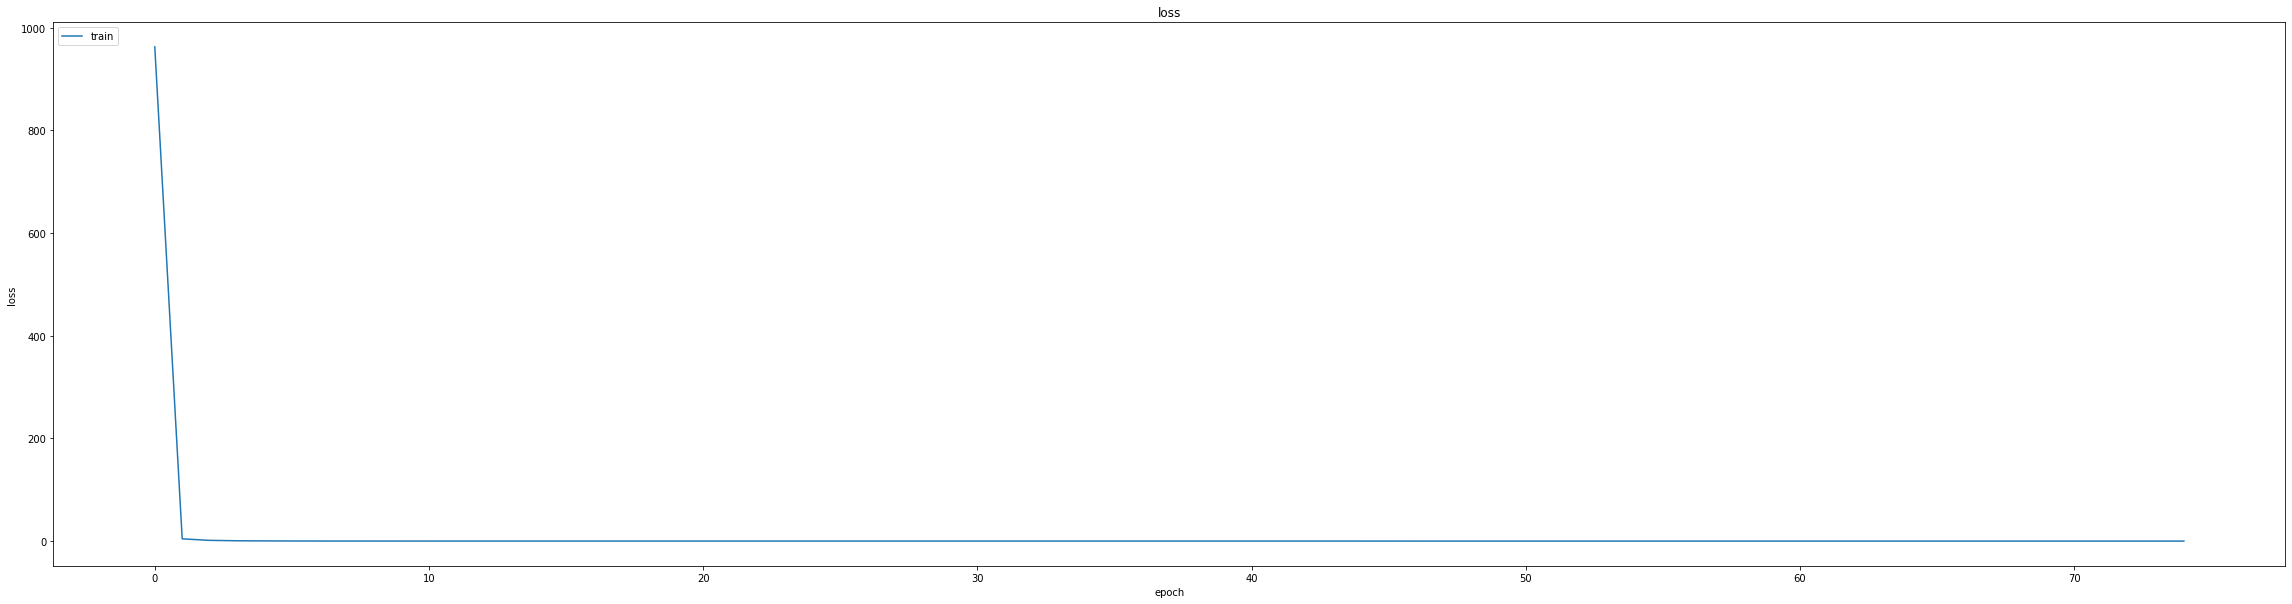

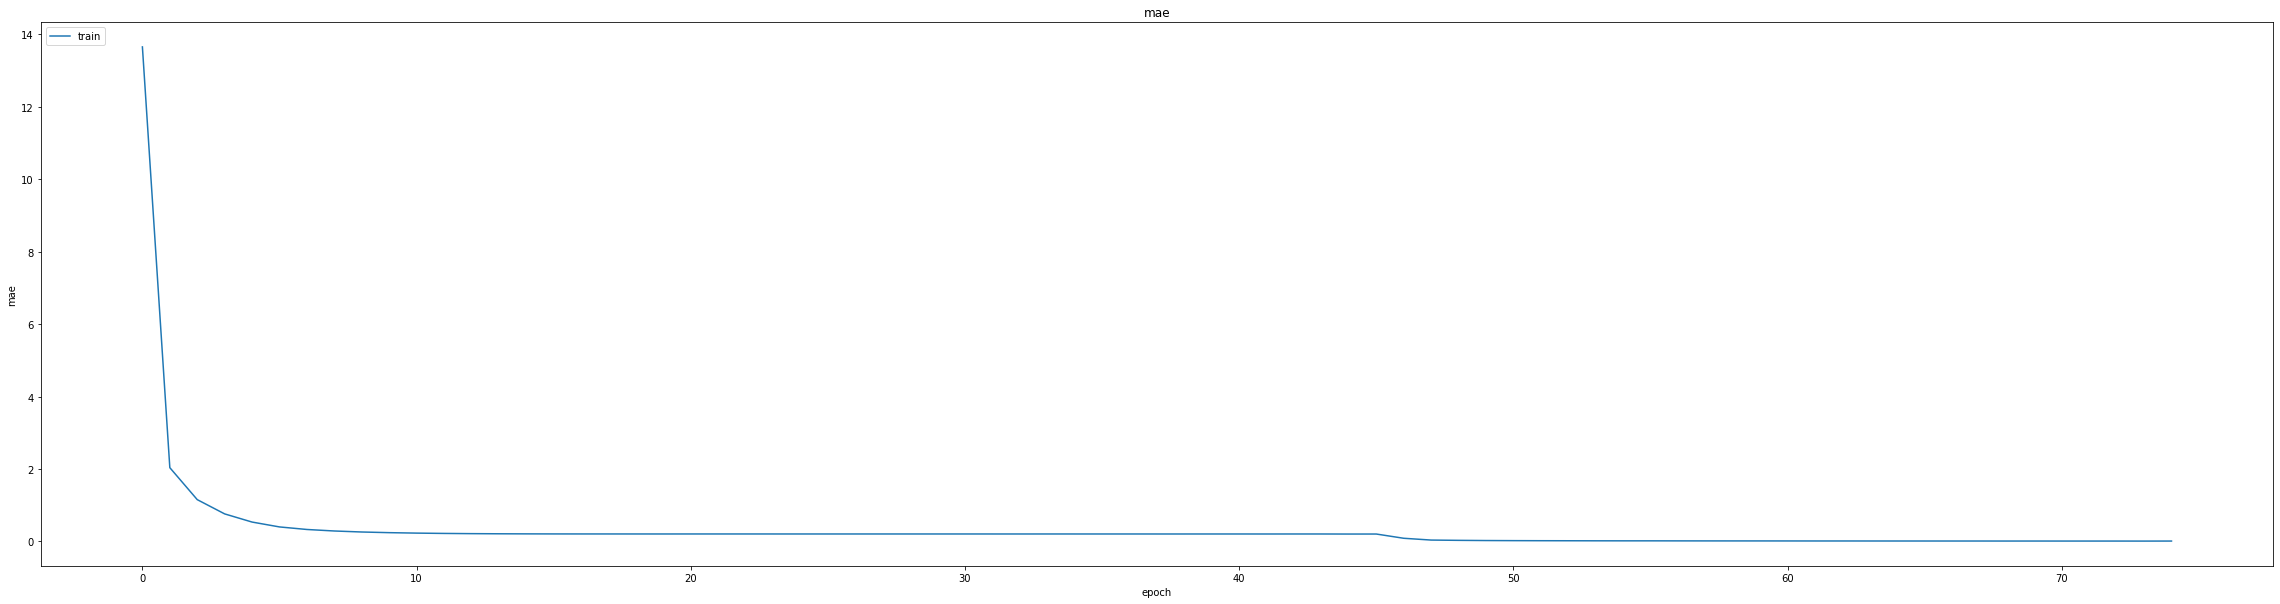

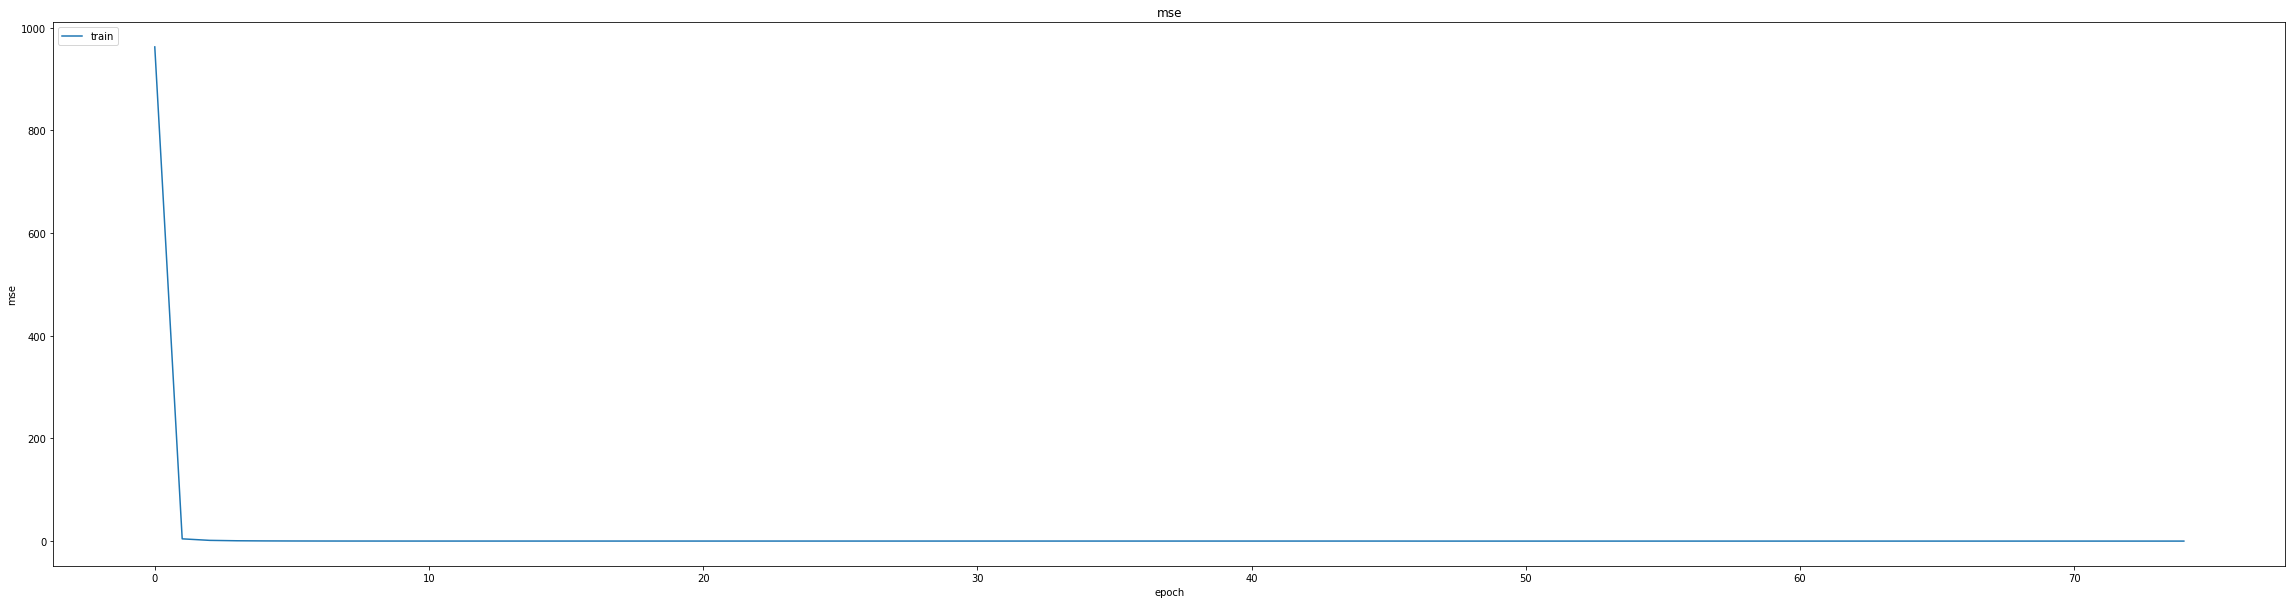

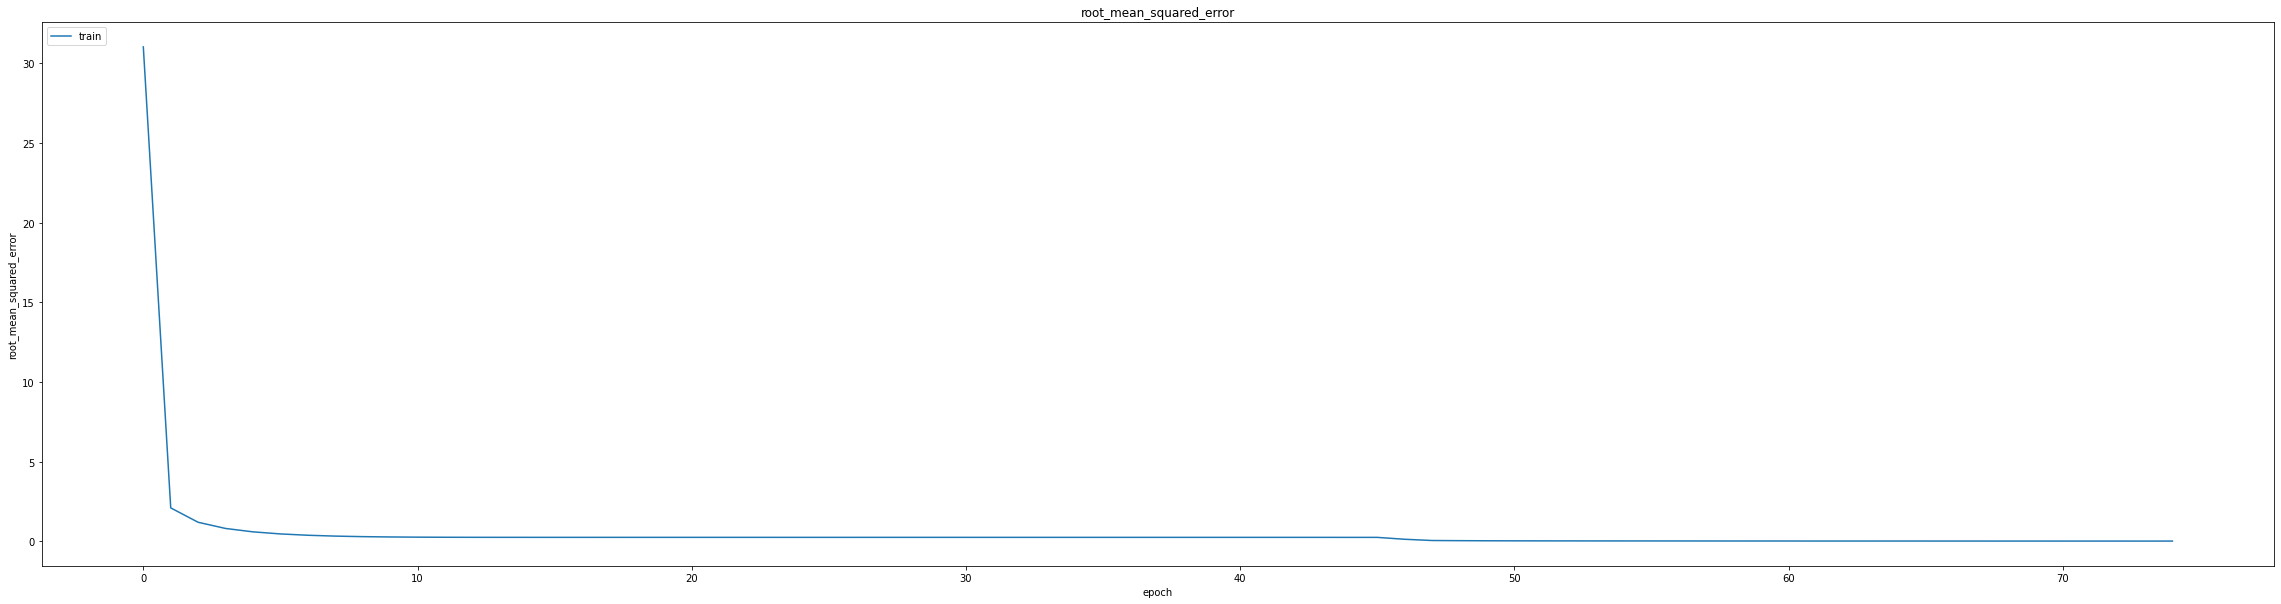

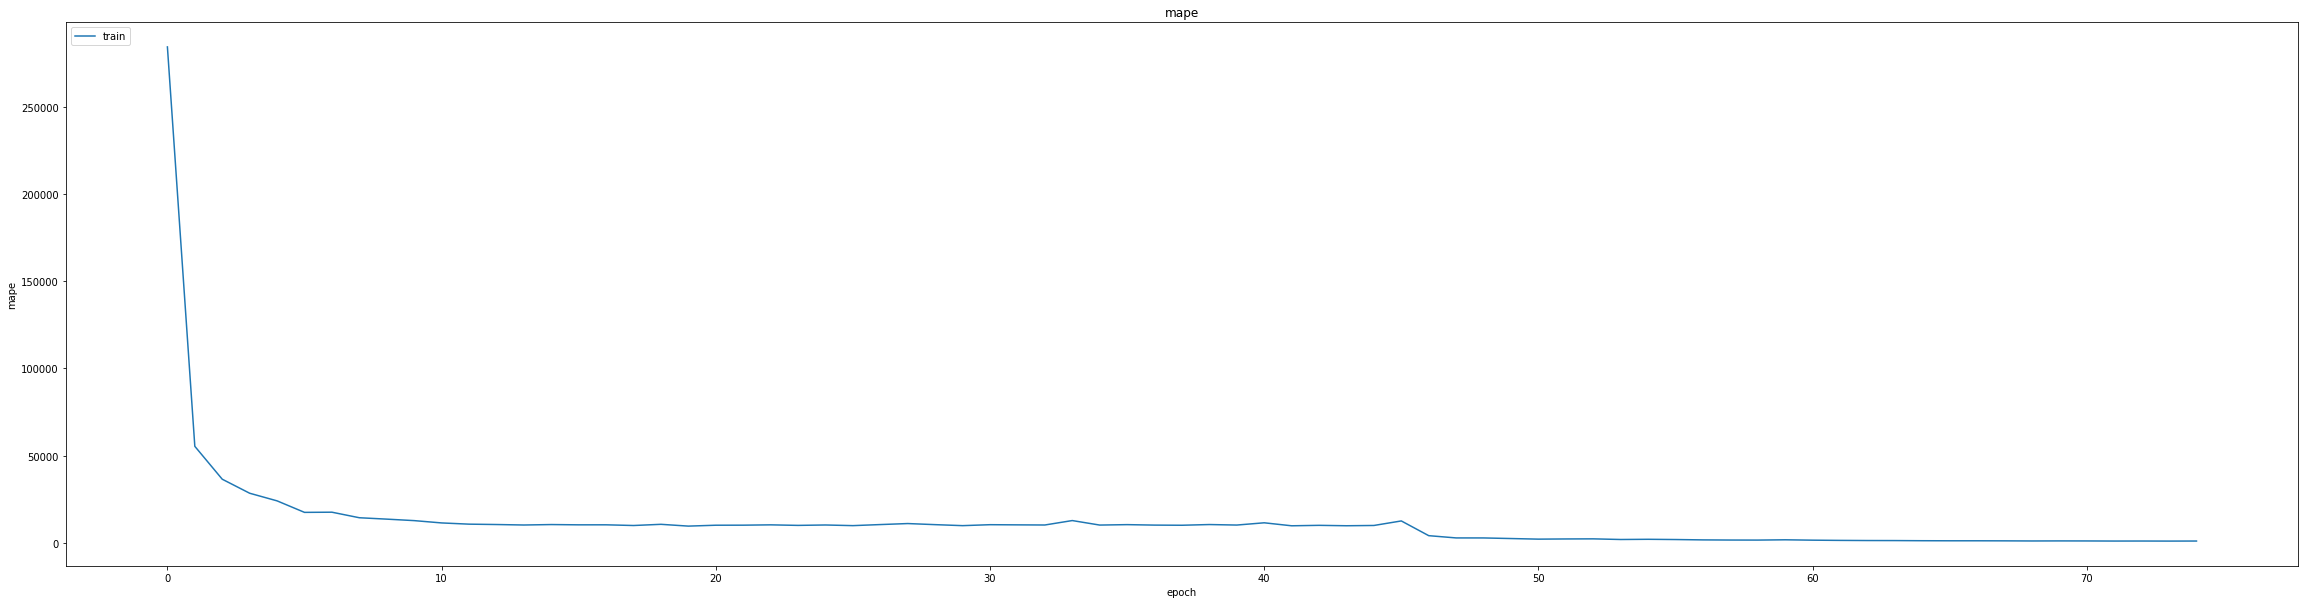

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0072825588285923
0.010277870111167431
464/464 [==============================] - 3s 4ms/step
0.9960988260849837


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 1.9282e-04 - mae: 0.0091 - mse: 1.9282e-04 - root_mean_squared_error: 0.0139 - mape: 1049.9736
Epoch 1: val_mse improved from 0.00011 to 0.00009, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)


348/348 [==============================] - 20s 48ms/step - loss: 1.9218e-04 - mae: 0.0091 - mse: 1.9218e-04 - root_mean_squared_error: 0.0139 - mape: 1041.8533 - val_loss: 9.3544e-05 - val_mae: 0.0068 - val_mse: 9.3544e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 3273.1472 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 8.4830e-05 - mae: 0.0070 - mse: 8.4830e-05 - root_mean_squared_error: 0.0092 - mape: 1103.7344
Epoch 2: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 12ms/step - loss: 8.4823e-05 - mae: 0.0070 - mse: 8.4823e-05 - root_mean_squared_error: 0.0092 - mape: 1101.5317 - val_loss: 1.1340e-04 - val_mae: 0.0078 - val_mse: 1.1340e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3152.3506 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
347/348 [============================>.] - ETA: 0s - loss: 9.3645e-05 - mae: 0.0074 - mse: 9.3645e-05 - root_mean_squared_error: 0.0097 - mape: 985.937

348/348 [==============================] - 15s 43ms/step - loss: 7.3438e-05 - mae: 0.0066 - mse: 7.3438e-05 - root_mean_squared_error: 0.0086 - mape: 954.9853 - val_loss: 7.8320e-05 - val_mae: 0.0063 - val_mse: 7.8320e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 2973.4417 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
348/348 [==============================] - ETA: 0s - loss: 6.6103e-05 - mae: 0.0062 - mse: 6.6103e-05 - root_mean_squared_error: 0.0081 - mape: 924.5316
Epoch 7: val_mse did not improve from 0.00008
348/348 [==============================] - 4s 12ms/step - loss: 6.6103e-05 - mae: 0.0062 - mse: 6.6103e-05 - root_mean_squared_error: 0.0081 - mape: 924.5316 - val_loss: 1.3586e-04 - val_mae: 0.0100 - val_mse: 1.3586e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 3064.8003 - lr: 7.2900e-04
Epoch 8/25
344/348 [============================>.] - ETA: 0s - loss: 7.2246e-05 - mae: 0.0064 - mse: 7.2246e-05 - root_mean_squared_error: 0.0085 - mape: 99

348/348 [==============================] - 15s 44ms/step - loss: 5.5127e-05 - mae: 0.0057 - mse: 5.5127e-05 - root_mean_squared_error: 0.0074 - mape: 816.5042 - val_loss: 5.2821e-05 - val_mae: 0.0055 - val_mse: 5.2821e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 2535.9727 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
344/348 [============================>.] - ETA: 0s - loss: 4.4678e-05 - mae: 0.0050 - mse: 4.4678e-05 - root_mean_squared_error: 0.0067 - mape: 803.1492
Epoch 15: val_mse did not improve from 0.00005
348/348 [==============================] - 4s 12ms/step - loss: 4.4634e-05 - mae: 0.0050 - mse: 4.4634e-05 - root_mean_squared_error: 0.0067 - mape: 794.6304 - val_loss: 1.6531e-04 - val_mae: 0.0118 - val_mse: 1.6531e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2556.0408 - lr: 4.7830e-04
Epoch 16/25
348/348 [==============================] - ETA: 0s - loss: 4.4989e-05 - mae: 0.0051 - mse: 4.4989e-05 - root_mean_squared_error: 0.0067 - mape

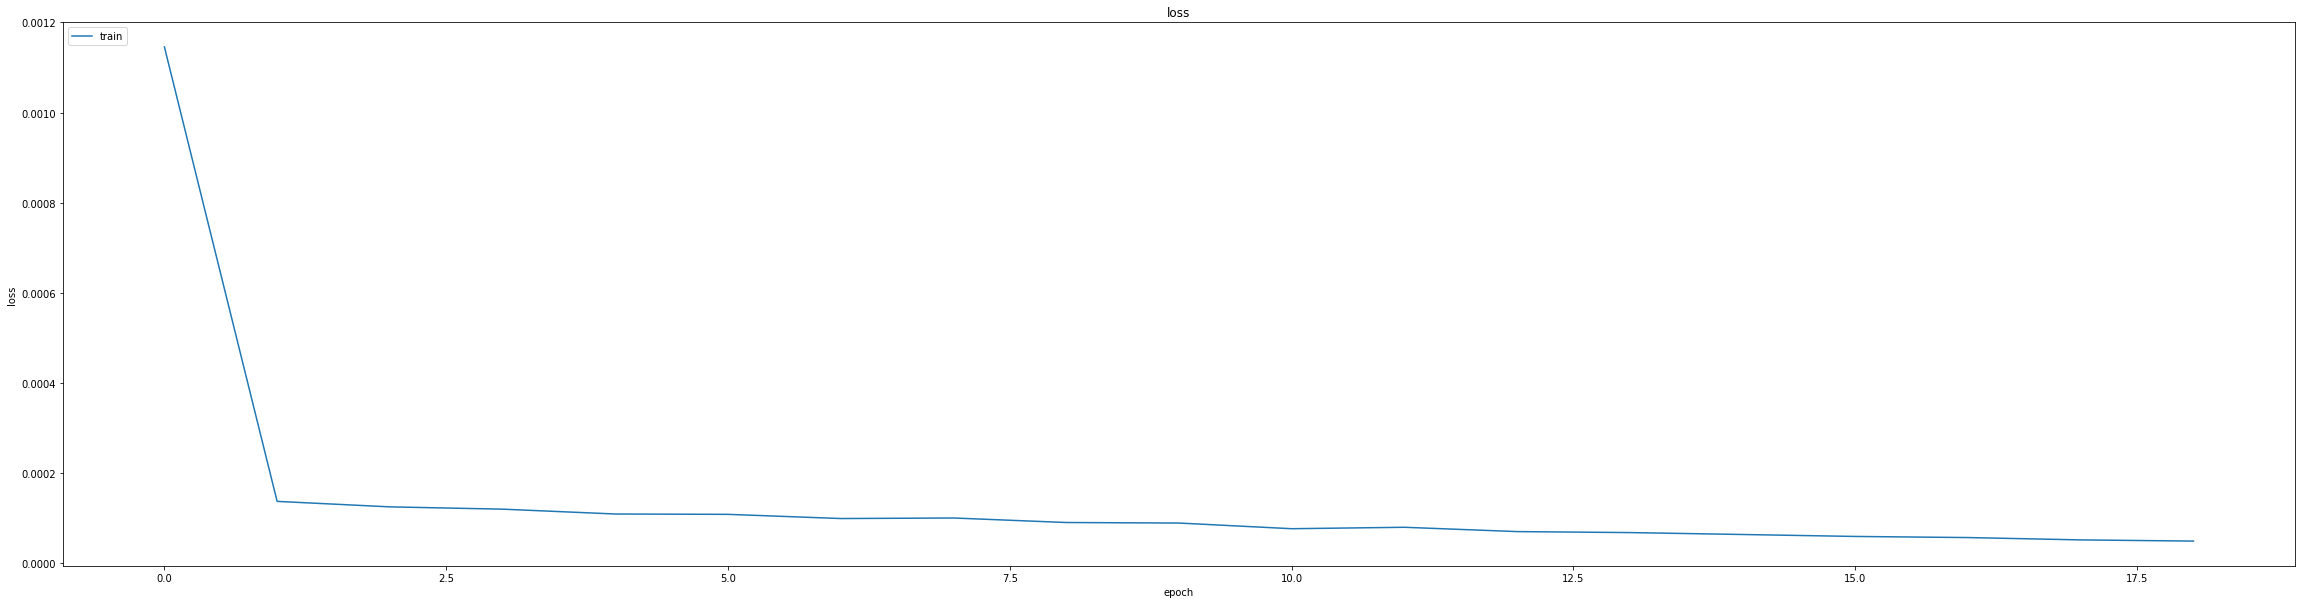

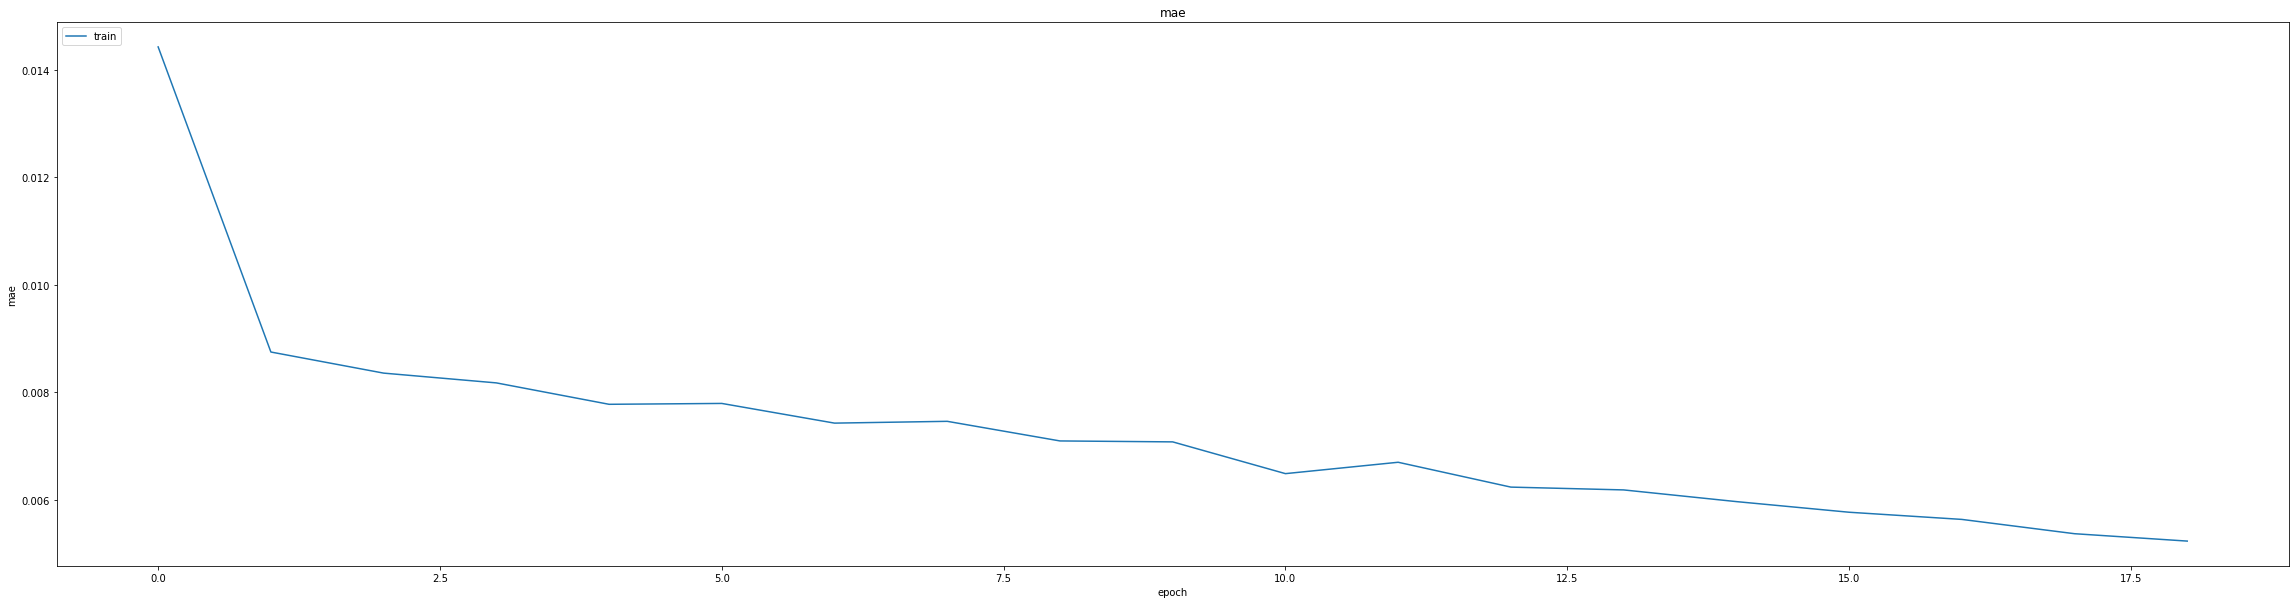

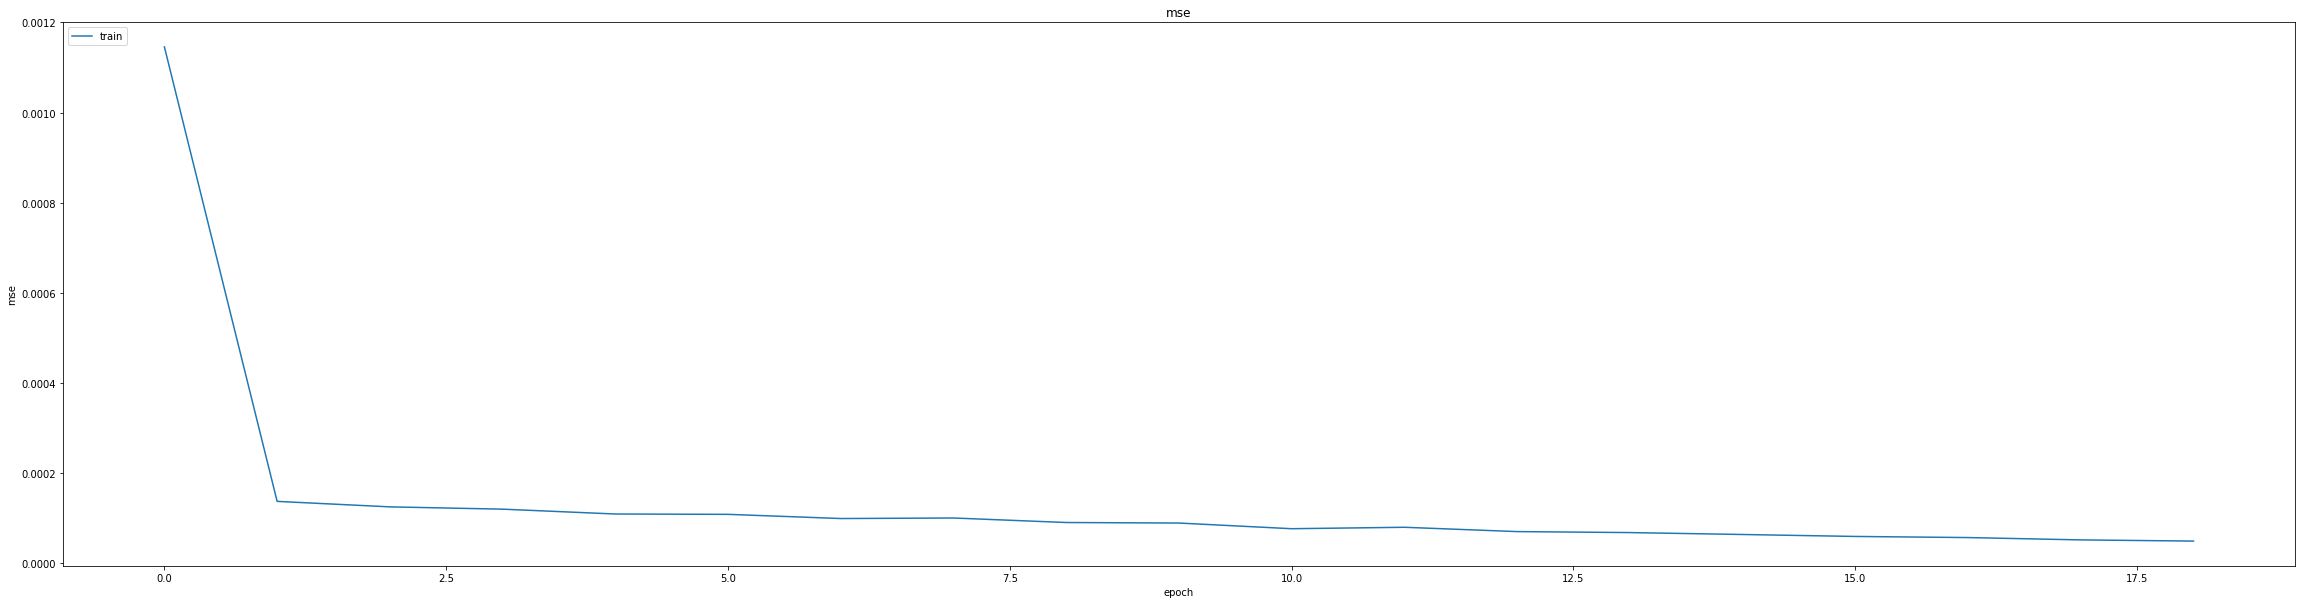

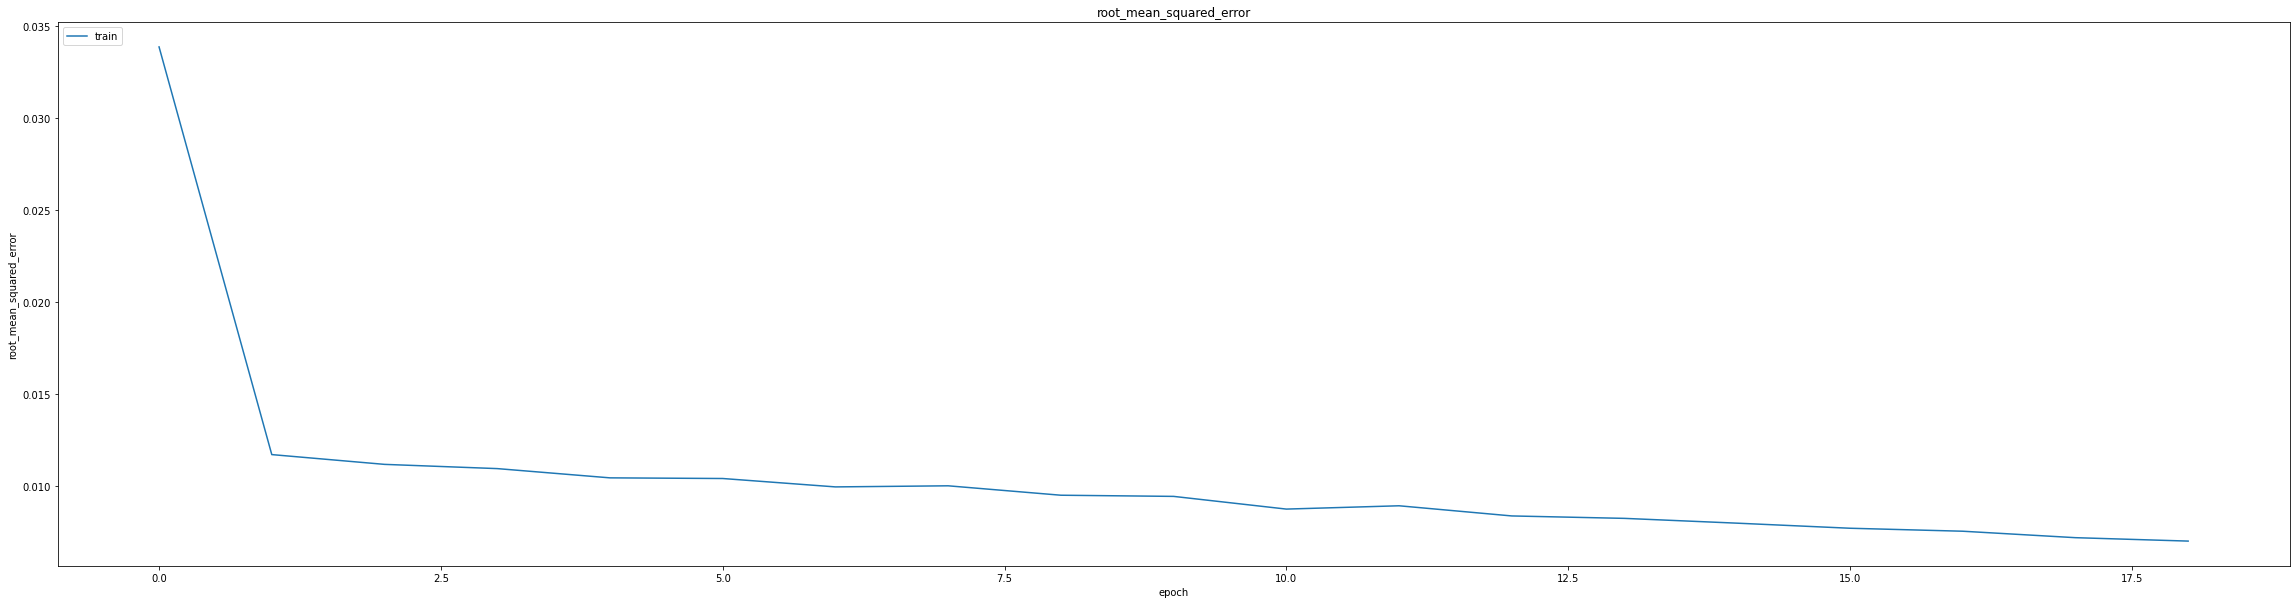

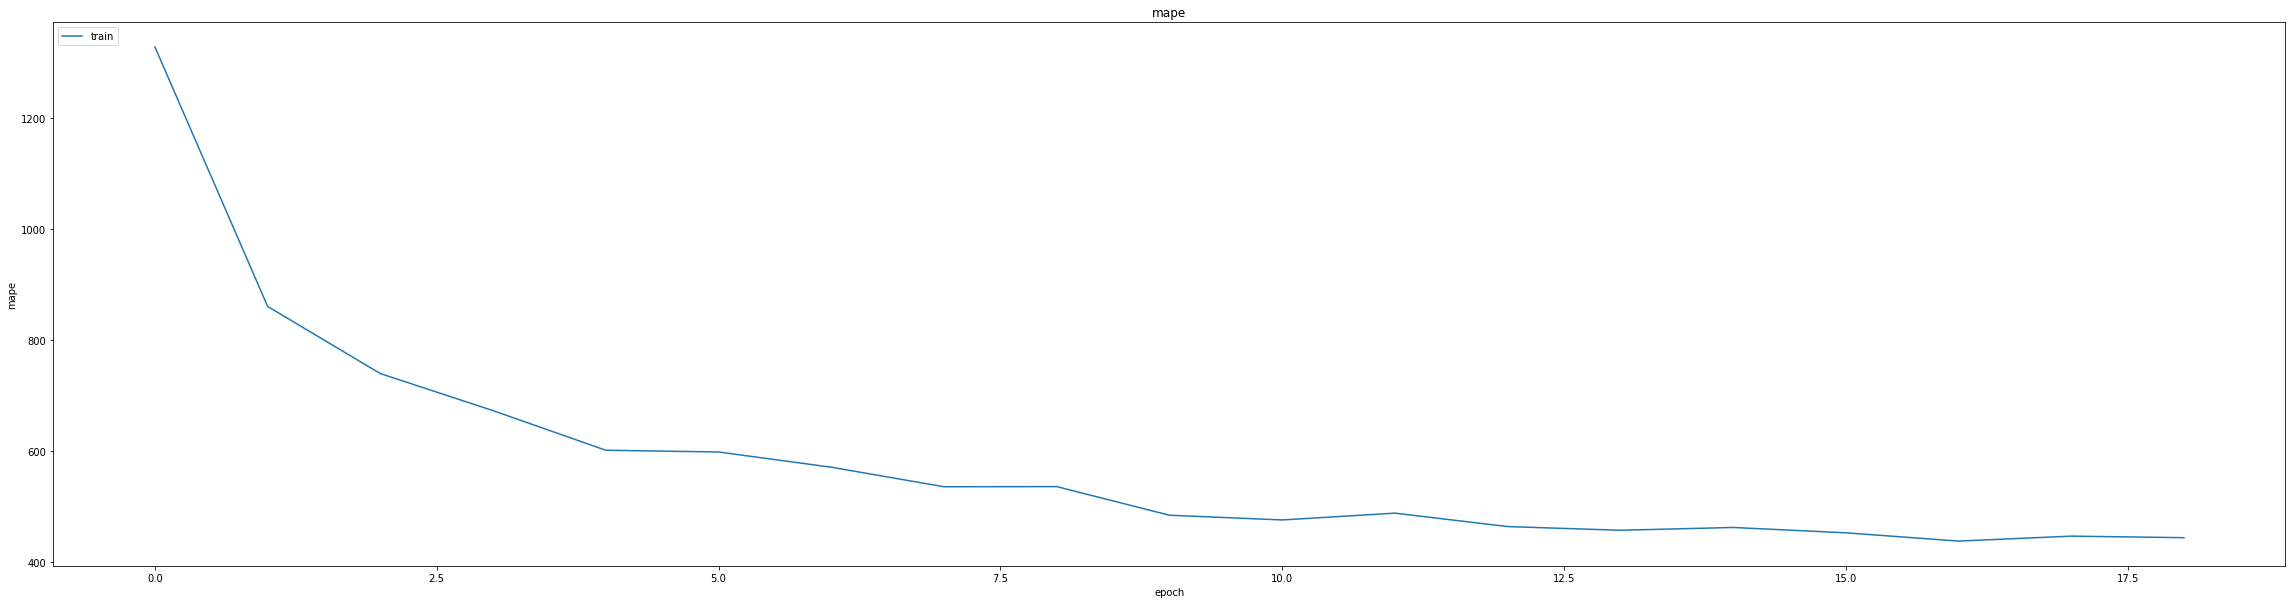

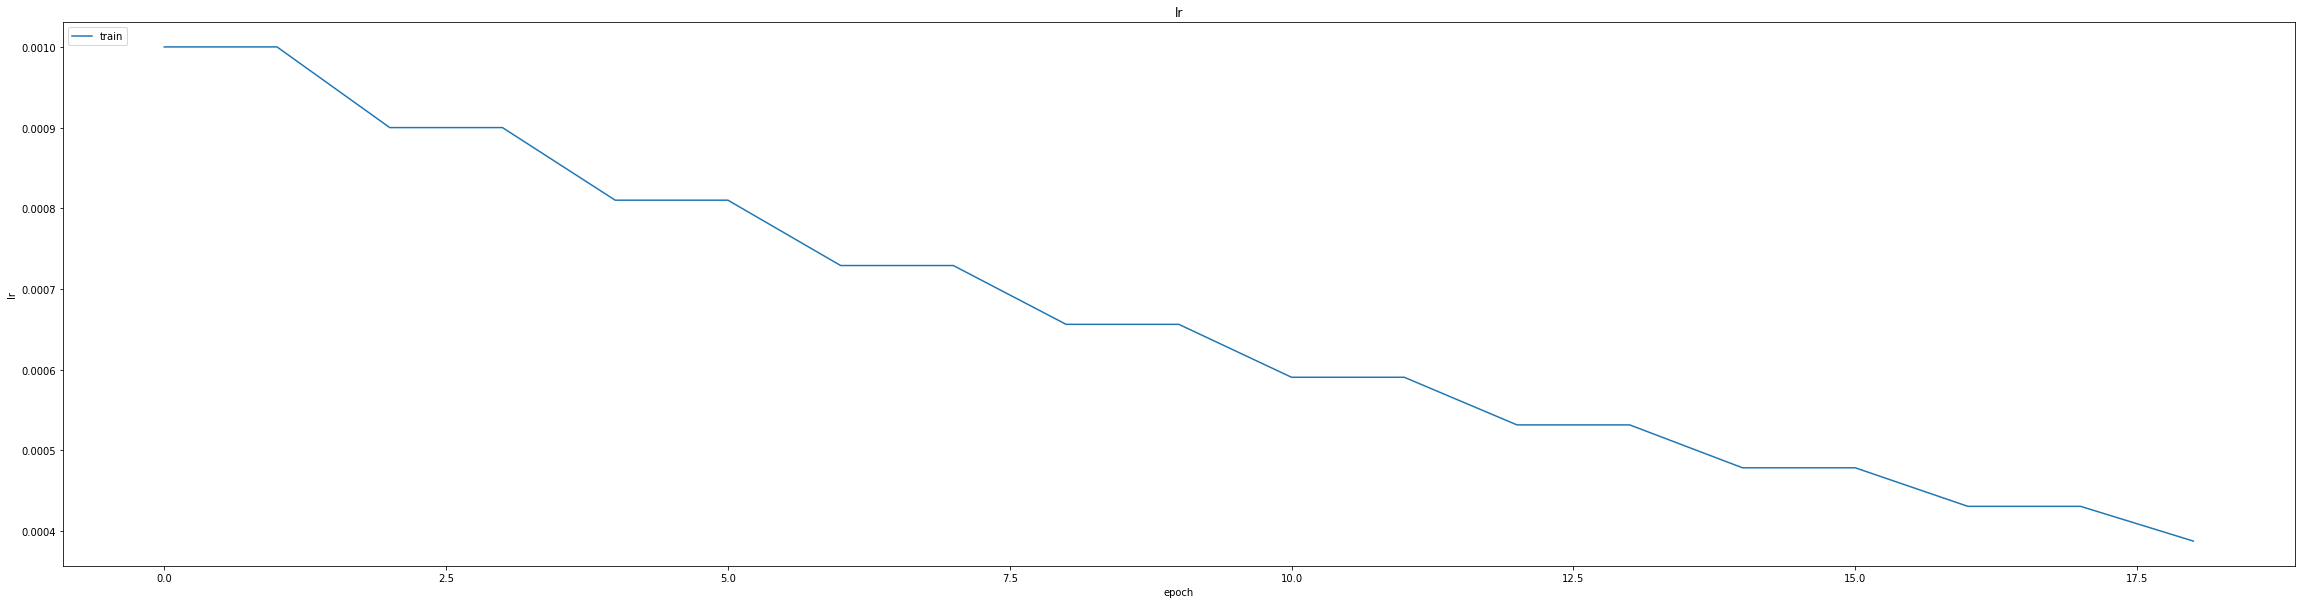

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005527794826775789
0.007267778739333153
464/464 [==============================] - 3s 4ms/step
0.997855600990049


464/464 [==============================] - 2s 4ms/step


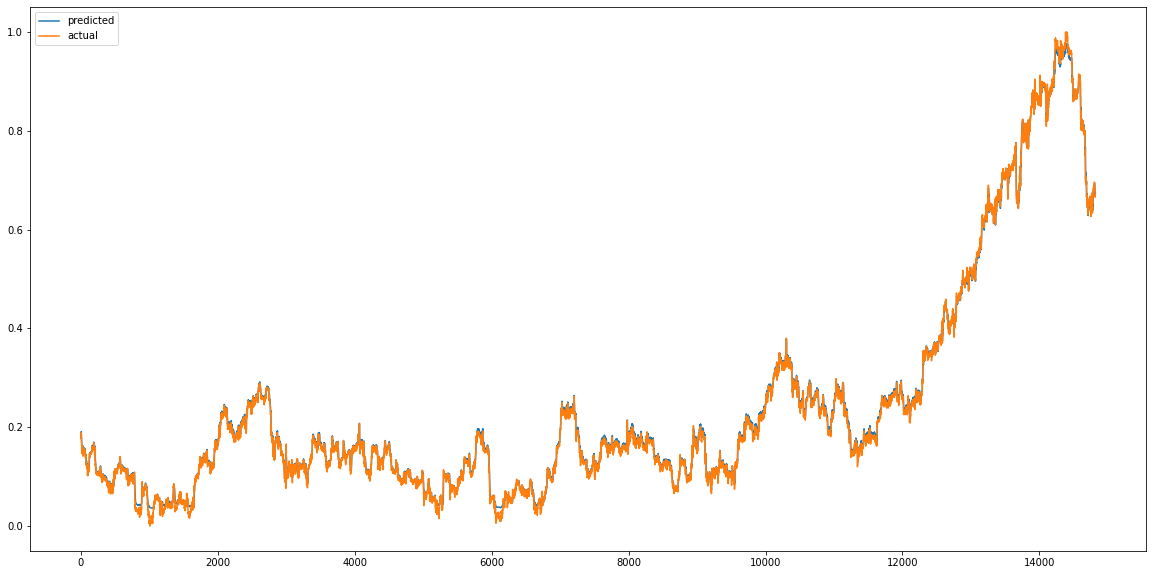

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


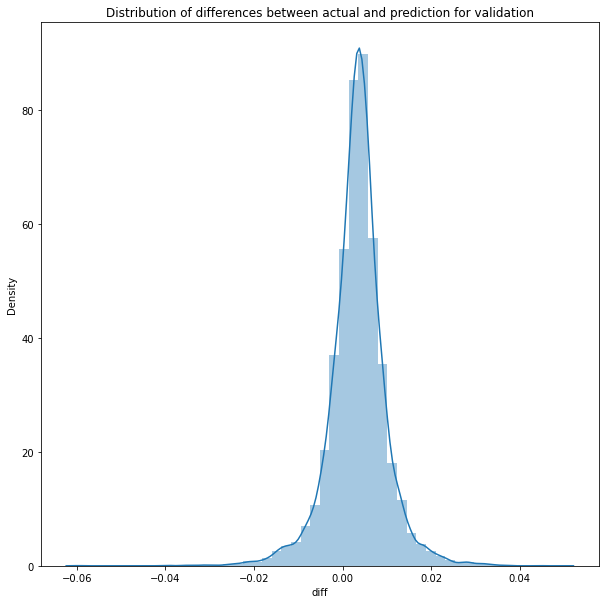

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


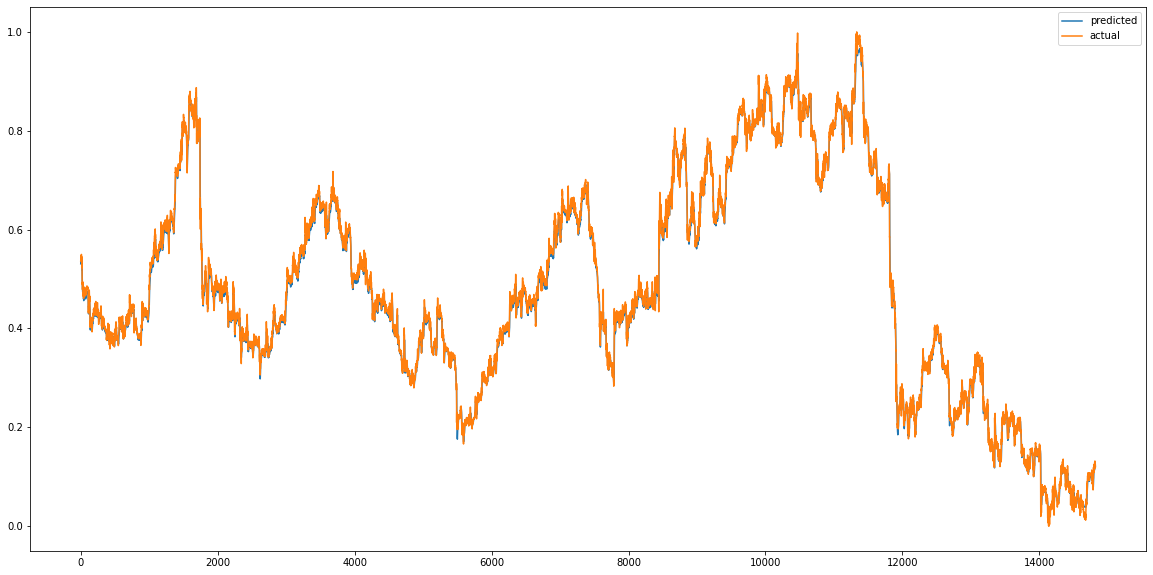

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


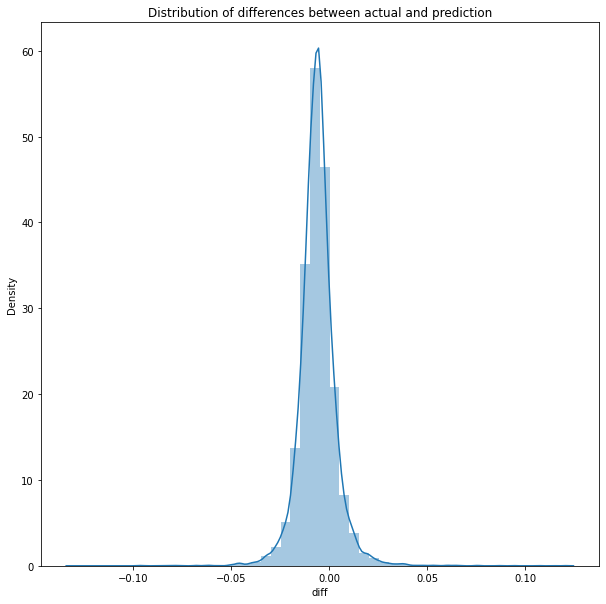

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001267076916207043
RMSE :  0.011256451111283
MAE :  0.008530820603945919
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.9973903570028196


count    14819.000000
mean        -0.005980
std          0.009537
min         -0.130041
25%         -0.010635
50%         -0.006101
75%         -0.001555
max          0.120575
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 1744.7550 - mae: 19.8042 - mse: 1744.7550 - root_mean_squared_error: 41.7703 - mape: 270255.0938
Epoch 1: val_mse improved from inf to 13.90466, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 18s 42ms/step - loss: 1744.7550 - mae: 19.8042 - mse: 1744.7550 - root_mean_squared_error: 41.7703 - mape: 270255.0938 - val_loss: 13.9047 - val_mae: 3.7222 - val_mse: 13.9047 - val_root_mean_squared_error: 3.7289 - val_mape: 270502.1875
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 6.5013 - mae: 2.4837 - mse: 6.5013 - root_mean_squared_error: 2.5498 - mape: 50691.4336
Epoch 2: val_mse improved from 13.90466 to 3.68857, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 6.4851 - mae: 2.4802 - mse: 6.4851 - root_mean_squared_error: 2.5466 - mape: 50447.7852 - val_loss: 3.6886 - val_mae: 1.9076 - val_mse: 3.6886 - val_root_mean_squared_error: 1.9206 - val_mape: 146494.8438
Epoch 3/75
344/348 [============================>.] - ETA: 0s - loss: 1.9996 - mae: 1.3799 - mse: 1.9996 - root_mean_squared_error: 1.4141 - mape: 47392.2227
Epoch 3: val_mse improved from 3.68857 to 1.64767, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 1.9916 - mae: 1.3768 - mse: 1.9916 - root_mean_squared_error: 1.4112 - mape: 46892.9492 - val_loss: 1.6477 - val_mae: 1.2641 - val_mse: 1.6477 - val_root_mean_squared_error: 1.2836 - val_mape: 102524.4766
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.8862 - mae: 0.9037 - mse: 0.8862 - root_mean_squared_error: 0.9414 - mape: 31085.1621
Epoch 4: val_mse improved from 1.64767 to 0.91748, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.8849 - mae: 0.9029 - mse: 0.8849 - root_mean_squared_error: 0.9407 - mape: 30935.1562 - val_loss: 0.9175 - val_mae: 0.9316 - val_mse: 0.9175 - val_root_mean_squared_error: 0.9579 - val_mape: 79802.0391
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.4681 - mae: 0.6363 - mse: 0.4681 - root_mean_squared_error: 0.6841 - mape: 25757.0586
Epoch 5: val_mse improved from 0.91748 to 0.57948, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.4679 - mae: 0.6362 - mse: 0.4679 - root_mean_squared_error: 0.6840 - mape: 25706.0293 - val_loss: 0.5795 - val_mae: 0.7281 - val_mse: 0.5795 - val_root_mean_squared_error: 0.7612 - val_mape: 65887.0625
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.2769 - mae: 0.4664 - mse: 0.2769 - root_mean_squared_error: 0.5262 - mape: 20516.0742
Epoch 6: val_mse improved from 0.57948 to 0.39837, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.2769 - mae: 0.4664 - mse: 0.2769 - root_mean_squared_error: 0.5262 - mape: 20516.0742 - val_loss: 0.3984 - val_mae: 0.5985 - val_mse: 0.3984 - val_root_mean_squared_error: 0.6312 - val_mape: 56501.7695
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.1797 - mae: 0.3666 - mse: 0.1797 - root_mean_squared_error: 0.4239 - mape: 18031.4531
Epoch 7: val_mse improved from 0.39837 to 0.29217, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.1796 - mae: 0.3666 - mse: 0.1796 - root_mean_squared_error: 0.4238 - mape: 17995.6445 - val_loss: 0.2922 - val_mae: 0.5122 - val_mse: 0.2922 - val_root_mean_squared_error: 0.5405 - val_mape: 49801.7969
Epoch 8/75
343/348 [============================>.] - ETA: 0s - loss: 0.1270 - mae: 0.3135 - mse: 0.1270 - root_mean_squared_error: 0.3564 - mape: 16731.9590
Epoch 8: val_mse improved from 0.29217 to 0.22587, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.1268 - mae: 0.3132 - mse: 0.1268 - root_mean_squared_error: 0.3561 - mape: 16507.8398 - val_loss: 0.2259 - val_mae: 0.4510 - val_mse: 0.2259 - val_root_mean_squared_error: 0.4753 - val_mape: 44836.9805
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0972 - mae: 0.2782 - mse: 0.0972 - root_mean_squared_error: 0.3118 - mape: 15081.6807
Epoch 9: val_mse improved from 0.22587 to 0.18231, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0971 - mae: 0.2781 - mse: 0.0971 - root_mean_squared_error: 0.3116 - mape: 15008.5957 - val_loss: 0.1823 - val_mae: 0.4072 - val_mse: 0.1823 - val_root_mean_squared_error: 0.4270 - val_mape: 41042.0391
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0801 - mae: 0.2541 - mse: 0.0801 - root_mean_squared_error: 0.2830 - mape: 13246.3311
Epoch 10: val_mse improved from 0.18231 to 0.15288, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0801 - mae: 0.2541 - mse: 0.0801 - root_mean_squared_error: 0.2830 - mape: 13182.3477 - val_loss: 0.1529 - val_mae: 0.3740 - val_mse: 0.1529 - val_root_mean_squared_error: 0.3910 - val_mape: 38109.9570
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0703 - mae: 0.2378 - mse: 0.0703 - root_mean_squared_error: 0.2652 - mape: 13113.7266
Epoch 11: val_mse improved from 0.15288 to 0.13249, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0703 - mae: 0.2379 - mse: 0.0703 - root_mean_squared_error: 0.2652 - mape: 13087.7363 - val_loss: 0.1325 - val_mae: 0.3483 - val_mse: 0.1325 - val_root_mean_squared_error: 0.3640 - val_mape: 35825.3008
Epoch 12/75
344/348 [============================>.] - ETA: 0s - loss: 0.0648 - mae: 0.2267 - mse: 0.0648 - root_mean_squared_error: 0.2546 - mape: 12091.1748
Epoch 12: val_mse improved from 0.13249 to 0.11829, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0649 - mae: 0.2267 - mse: 0.0649 - root_mean_squared_error: 0.2547 - mape: 11963.7158 - val_loss: 0.1183 - val_mae: 0.3288 - val_mse: 0.1183 - val_root_mean_squared_error: 0.3439 - val_mape: 34061.7344
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0619 - mae: 0.2186 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 11251.4629
Epoch 13: val_mse improved from 0.11829 to 0.10841, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0619 - mae: 0.2186 - mse: 0.0619 - root_mean_squared_error: 0.2488 - mape: 11197.1904 - val_loss: 0.1084 - val_mae: 0.3144 - val_mse: 0.1084 - val_root_mean_squared_error: 0.3293 - val_mape: 32724.8477
Epoch 14/75
344/348 [============================>.] - ETA: 0s - loss: 0.0604 - mae: 0.2130 - mse: 0.0604 - root_mean_squared_error: 0.2459 - mape: 11263.9639
Epoch 14: val_mse improved from 0.10841 to 0.10162, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0604 - mae: 0.2129 - mse: 0.0604 - root_mean_squared_error: 0.2458 - mape: 11145.0381 - val_loss: 0.1016 - val_mae: 0.3038 - val_mse: 0.1016 - val_root_mean_squared_error: 0.3188 - val_mape: 31739.0879
Epoch 15/75
343/348 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2088 - mse: 0.0596 - root_mean_squared_error: 0.2440 - mape: 10709.4951
Epoch 15: val_mse improved from 0.10162 to 0.09695, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0597 - mae: 0.2091 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 10566.1113 - val_loss: 0.0970 - val_mae: 0.2961 - val_mse: 0.0970 - val_root_mean_squared_error: 0.3114 - val_mape: 31024.1152
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 0.0594 - mae: 0.2065 - mse: 0.0594 - root_mean_squared_error: 0.2436 - mape: 10737.9902
Epoch 16: val_mse improved from 0.09695 to 0.09399, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0594 - mae: 0.2066 - mse: 0.0594 - root_mean_squared_error: 0.2437 - mape: 10655.4297 - val_loss: 0.0940 - val_mae: 0.2911 - val_mse: 0.0940 - val_root_mean_squared_error: 0.3066 - val_mape: 30552.1191
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2052 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 10385.2100
Epoch 17: val_mse improved from 0.09399 to 0.09210, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0592 - mae: 0.2051 - mse: 0.0592 - root_mean_squared_error: 0.2434 - mape: 10334.9316 - val_loss: 0.0921 - val_mae: 0.2879 - val_mse: 0.0921 - val_root_mean_squared_error: 0.3035 - val_mape: 30243.6211
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2041 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10185.5146
Epoch 18: val_mse improved from 0.09210 to 0.09106, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0592 - mae: 0.2042 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 10107.2656 - val_loss: 0.0911 - val_mae: 0.2860 - val_mse: 0.0911 - val_root_mean_squared_error: 0.3018 - val_mape: 30069.5117
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2037 - mse: 0.0592 - root_mean_squared_error: 0.2432 - mape: 10264.6426
Epoch 19: val_mse improved from 0.09106 to 0.09060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0592 - mae: 0.2037 - mse: 0.0592 - root_mean_squared_error: 0.2432 - mape: 10185.6963 - val_loss: 0.0906 - val_mae: 0.2852 - val_mse: 0.0906 - val_root_mean_squared_error: 0.3010 - val_mape: 29993.0566
Epoch 20/75
345/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2035 - mse: 0.0592 - root_mean_squared_error: 0.2432 - mape: 10377.7061
Epoch 20: val_mse improved from 0.09060 to 0.09023, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0592 - mae: 0.2035 - mse: 0.0592 - root_mean_squared_error: 0.2432 - mape: 10297.7773 - val_loss: 0.0902 - val_mae: 0.2845 - val_mse: 0.0902 - val_root_mean_squared_error: 0.3004 - val_mape: 29930.9785
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 0.0591 - mae: 0.2033 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10116.6445
Epoch 21: val_mse did not improve from 0.09023
348/348 [==============================] - 4s 11ms/step - loss: 0.0591 - mae: 0.2033 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10116.6445 - val_loss: 0.0904 - val_mae: 0.2848 - val_mse: 0.0904 - val_root_mean_squared_error: 0.3006 - val_mape: 29956.8066
Epoch 22/75
345/348 [============================>.] - ETA: 0s - loss: 0.0591 - mae: 0.2033 - mse: 0.0591 - root_mean_squared_error: 0.2431 - mape: 10145.4902
Epoch 22: val_mse did not improve from 0.09023
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 14s 39ms/step - loss: 0.0591 - mae: 0.2034 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10087.0527 - val_loss: 0.0900 - val_mae: 0.2842 - val_mse: 0.0900 - val_root_mean_squared_error: 0.3001 - val_mape: 29898.9844
Epoch 24/75
345/348 [============================>.] - ETA: 0s - loss: 0.0591 - mae: 0.2031 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10182.6025
Epoch 24: val_mse did not improve from 0.09004
348/348 [==============================] - 4s 11ms/step - loss: 0.0591 - mae: 0.2031 - mse: 0.0591 - root_mean_squared_error: 0.2432 - mape: 10104.4092 - val_loss: 0.0906 - val_mae: 0.2852 - val_mse: 0.0906 - val_root_mean_squared_error: 0.3010 - val_mape: 29989.3184
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2034 - mse: 0.0592 - root_mean_squared_error: 0.2432 - mape: 10206.4180
Epoch 25: val_mse did not improve from 0.09004
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 14s 39ms/step - loss: 0.0590 - mae: 0.2032 - mse: 0.0590 - root_mean_squared_error: 0.2430 - mape: 10128.3438 - val_loss: 0.0900 - val_mae: 0.2841 - val_mse: 0.0900 - val_root_mean_squared_error: 0.3000 - val_mape: 29890.4473
Epoch 28/75
345/348 [============================>.] - ETA: 0s - loss: 0.0590 - mae: 0.2031 - mse: 0.0590 - root_mean_squared_error: 0.2429 - mape: 10133.6475
Epoch 28: val_mse did not improve from 0.08999
348/348 [==============================] - 4s 11ms/step - loss: 0.0590 - mae: 0.2030 - mse: 0.0590 - root_mean_squared_error: 0.2428 - mape: 10055.6338 - val_loss: 0.0902 - val_mae: 0.2845 - val_mse: 0.0902 - val_root_mean_squared_error: 0.3003 - val_mape: 29922.6523
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 0.0590 - mae: 0.2031 - mse: 0.0590 - root_mean_squared_error: 0.2428 - mape: 10382.0322
Epoch 29: val_mse improved from 0.08999 to 0.08951, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 14s 41ms/step - loss: 0.0589 - mae: 0.2030 - mse: 0.0589 - root_mean_squared_error: 0.2427 - mape: 10302.1865 - val_loss: 0.0895 - val_mae: 0.2833 - val_mse: 0.0895 - val_root_mean_squared_error: 0.2992 - val_mape: 29809.2539
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 0.0588 - mae: 0.2026 - mse: 0.0588 - root_mean_squared_error: 0.2424 - mape: 10260.9102
Epoch 30: val_mse did not improve from 0.08951
348/348 [==============================] - 4s 11ms/step - loss: 0.0588 - mae: 0.2027 - mse: 0.0588 - root_mean_squared_error: 0.2425 - mape: 10152.7861 - val_loss: 0.0896 - val_mae: 0.2834 - val_mse: 0.0896 - val_root_mean_squared_error: 0.2993 - val_mape: 29824.0020
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 0.0583 - mae: 0.2021 - mse: 0.0583 - root_mean_squared_error: 0.2414 - mape: 10155.8535
Epoch 31: val_mse improved from 0.08951 to 0.08809, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 13s 38ms/step - loss: 0.0582 - mae: 0.2021 - mse: 0.0582 - root_mean_squared_error: 0.2413 - mape: 10077.7695 - val_loss: 0.0881 - val_mae: 0.2810 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 29602.0430
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 0.0404 - mae: 0.1616 - mse: 0.0404 - root_mean_squared_error: 0.2011 - mape: 9992.8037 
Epoch 32: val_mse improved from 0.08809 to 0.02648, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0404 - mae: 0.1614 - mse: 0.0404 - root_mean_squared_error: 0.2010 - mape: 9972.8936 - val_loss: 0.0265 - val_mae: 0.1441 - val_mse: 0.0265 - val_root_mean_squared_error: 0.1627 - val_mape: 20774.3672
Epoch 33/75
345/348 [============================>.] - ETA: 0s - loss: 0.0054 - mae: 0.0519 - mse: 0.0054 - root_mean_squared_error: 0.0733 - mape: 7193.0557
Epoch 33: val_mse improved from 0.02648 to 0.00947, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0054 - mae: 0.0519 - mse: 0.0054 - root_mean_squared_error: 0.0732 - mape: 7137.4834 - val_loss: 0.0095 - val_mae: 0.0793 - val_mse: 0.0095 - val_root_mean_squared_error: 0.0973 - val_mape: 15272.7705
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 4985.5430
Epoch 34: val_mse improved from 0.00947 to 0.00559, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0026 - mae: 0.0367 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 4947.0527 - val_loss: 0.0056 - val_mae: 0.0596 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0748 - val_mape: 13046.0811
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0310 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 4591.9204
Epoch 35: val_mse improved from 0.00559 to 0.00382, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0019 - mae: 0.0310 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 4582.7593 - val_loss: 0.0038 - val_mae: 0.0473 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mape: 11711.3418
Epoch 36/75
344/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0272 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 3930.6846
Epoch 36: val_mse improved from 0.00382 to 0.00267, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0014 - mae: 0.0272 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 3889.0378 - val_loss: 0.0027 - val_mae: 0.0383 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0517 - val_mape: 10589.0293
Epoch 37/75
345/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3403.5833
Epoch 37: val_mse improved from 0.00267 to 0.00207, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3377.4487 - val_loss: 0.0021 - val_mae: 0.0339 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 9687.5283
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 8.8806e-04 - mae: 0.0223 - mse: 8.8806e-04 - root_mean_squared_error: 0.0298 - mape: 3180.1807
Epoch 38: val_mse improved from 0.00207 to 0.00158, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 8.8806e-04 - mae: 0.0223 - mse: 8.8806e-04 - root_mean_squared_error: 0.0298 - mape: 3180.1807 - val_loss: 0.0016 - val_mae: 0.0288 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 9036.5029
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 7.7292e-04 - mae: 0.0208 - mse: 7.7292e-04 - root_mean_squared_error: 0.0278 - mape: 3006.1243
Epoch 39: val_mse improved from 0.00158 to 0.00146, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 7.7209e-04 - mae: 0.0208 - mse: 7.7209e-04 - root_mean_squared_error: 0.0278 - mape: 2991.5022 - val_loss: 0.0015 - val_mae: 0.0280 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 8510.1455
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 7.0456e-04 - mae: 0.0199 - mse: 7.0456e-04 - root_mean_squared_error: 0.0265 - mape: 2787.6340
Epoch 40: val_mse improved from 0.00146 to 0.00125, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 7.0404e-04 - mae: 0.0199 - mse: 7.0404e-04 - root_mean_squared_error: 0.0265 - mape: 2758.0811 - val_loss: 0.0012 - val_mae: 0.0264 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 8065.5547
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 6.2549e-04 - mae: 0.0188 - mse: 6.2549e-04 - root_mean_squared_error: 0.0250 - mape: 2650.0713
Epoch 41: val_mse improved from 0.00125 to 0.00106, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 6.2521e-04 - mae: 0.0188 - mse: 6.2521e-04 - root_mean_squared_error: 0.0250 - mape: 2629.7292 - val_loss: 0.0011 - val_mae: 0.0234 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 7706.6055
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 5.7974e-04 - mae: 0.0180 - mse: 5.7974e-04 - root_mean_squared_error: 0.0241 - mape: 2637.4841
Epoch 42: val_mse improved from 0.00106 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 5.7907e-04 - mae: 0.0180 - mse: 5.7907e-04 - root_mean_squared_error: 0.0241 - mape: 2624.6614 - val_loss: 9.5550e-04 - val_mae: 0.0222 - val_mse: 9.5550e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 7399.8721
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 5.5479e-04 - mae: 0.0177 - mse: 5.5479e-04 - root_mean_squared_error: 0.0236 - mape: 2588.0286
Epoch 43: val_mse improved from 0.00096 to 0.00084, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 5.5449e-04 - mae: 0.0177 - mse: 5.5449e-04 - root_mean_squared_error: 0.0235 - mape: 2582.8660 - val_loss: 8.3908e-04 - val_mae: 0.0207 - val_mse: 8.3908e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 7135.2627
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 5.1467e-04 - mae: 0.0170 - mse: 5.1467e-04 - root_mean_squared_error: 0.0227 - mape: 2402.0676
Epoch 44: val_mse improved from 0.00084 to 0.00078, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 5.1367e-04 - mae: 0.0169 - mse: 5.1367e-04 - root_mean_squared_error: 0.0227 - mape: 2376.5913 - val_loss: 7.8122e-04 - val_mae: 0.0201 - val_mse: 7.8122e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 6896.3467
Epoch 45/75
344/348 [============================>.] - ETA: 0s - loss: 4.8754e-04 - mae: 0.0165 - mse: 4.8754e-04 - root_mean_squared_error: 0.0221 - mape: 2397.2476
Epoch 45: val_mse improved from 0.00078 to 0.00071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 4.8702e-04 - mae: 0.0165 - mse: 4.8702e-04 - root_mean_squared_error: 0.0221 - mape: 2371.8174 - val_loss: 7.1284e-04 - val_mae: 0.0192 - val_mse: 7.1284e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 6658.3745
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 4.8076e-04 - mae: 0.0164 - mse: 4.8076e-04 - root_mean_squared_error: 0.0219 - mape: 2265.5520
Epoch 46: val_mse improved from 0.00071 to 0.00071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 4.8076e-04 - mae: 0.0164 - mse: 4.8076e-04 - root_mean_squared_error: 0.0219 - mape: 2265.5520 - val_loss: 7.1072e-04 - val_mae: 0.0194 - val_mse: 7.1072e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 6461.5430
Epoch 47/75
346/348 [============================>.] - ETA: 0s - loss: 4.4761e-04 - mae: 0.0158 - mse: 4.4761e-04 - root_mean_squared_error: 0.0212 - mape: 2194.1331
Epoch 47: val_mse improved from 0.00071 to 0.00070, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 4.4758e-04 - mae: 0.0158 - mse: 4.4758e-04 - root_mean_squared_error: 0.0212 - mape: 2183.4722 - val_loss: 6.9936e-04 - val_mae: 0.0197 - val_mse: 6.9936e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 6280.4199
Epoch 48/75
343/348 [============================>.] - ETA: 0s - loss: 4.1578e-04 - mae: 0.0152 - mse: 4.1578e-04 - root_mean_squared_error: 0.0204 - mape: 2148.3911
Epoch 48: val_mse improved from 0.00070 to 0.00068, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 4.1549e-04 - mae: 0.0152 - mse: 4.1549e-04 - root_mean_squared_error: 0.0204 - mape: 2119.5784 - val_loss: 6.8248e-04 - val_mae: 0.0191 - val_mse: 6.8248e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 6067.4023
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 4.1695e-04 - mae: 0.0153 - mse: 4.1695e-04 - root_mean_squared_error: 0.0204 - mape: 2082.2378
Epoch 49: val_mse improved from 0.00068 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 4.1759e-04 - mae: 0.0153 - mse: 4.1759e-04 - root_mean_squared_error: 0.0204 - mape: 2066.2168 - val_loss: 5.9387e-04 - val_mae: 0.0179 - val_mse: 5.9387e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 5923.6606
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 3.9928e-04 - mae: 0.0149 - mse: 3.9928e-04 - root_mean_squared_error: 0.0200 - mape: 2024.2625
Epoch 50: val_mse improved from 0.00059 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 3.9916e-04 - mae: 0.0149 - mse: 3.9916e-04 - root_mean_squared_error: 0.0200 - mape: 2020.2275 - val_loss: 5.5847e-04 - val_mae: 0.0173 - val_mse: 5.5847e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 5779.7036
Epoch 51/75
347/348 [============================>.] - ETA: 0s - loss: 3.7729e-04 - mae: 0.0145 - mse: 3.7729e-04 - root_mean_squared_error: 0.0194 - mape: 1981.9611
Epoch 51: val_mse improved from 0.00056 to 0.00053, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 3.7725e-04 - mae: 0.0145 - mse: 3.7725e-04 - root_mean_squared_error: 0.0194 - mape: 1978.0282 - val_loss: 5.3335e-04 - val_mae: 0.0170 - val_mse: 5.3335e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 5602.5742
Epoch 52/75
343/348 [============================>.] - ETA: 0s - loss: 3.6554e-04 - mae: 0.0142 - mse: 3.6554e-04 - root_mean_squared_error: 0.0191 - mape: 1936.9248
Epoch 52: val_mse improved from 0.00053 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 3.6513e-04 - mae: 0.0142 - mse: 3.6513e-04 - root_mean_squared_error: 0.0191 - mape: 1910.8307 - val_loss: 5.0882e-04 - val_mae: 0.0166 - val_mse: 5.0882e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 5435.4185
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 3.6145e-04 - mae: 0.0142 - mse: 3.6145e-04 - root_mean_squared_error: 0.0190 - mape: 1842.2864
Epoch 53: val_mse did not improve from 0.00051
348/348 [==============================] - 4s 11ms/step - loss: 3.6139e-04 - mae: 0.0142 - mse: 3.6139e-04 - root_mean_squared_error: 0.0190 - mape: 1828.1399 - val_loss: 5.9906e-04 - val_mae: 0.0190 - val_mse: 5.9906e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 5344.8398
Epoch 54/75
347/348 [============================>.] - ETA: 0s - loss: 3.5788e-04 - mae: 0.0142 - mse: 3.5788e-04 - root_mean_squared_error: 0.0189 - mape: 1896.4467
Epoch 54: val_mse improved from 0.00051 to 0.00047, savi

348/348 [==============================] - 13s 39ms/step - loss: 3.5760e-04 - mae: 0.0142 - mse: 3.5760e-04 - root_mean_squared_error: 0.0189 - mape: 1892.6682 - val_loss: 4.6559e-04 - val_mae: 0.0160 - val_mse: 4.6559e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 5208.0391
Epoch 55/75
344/348 [============================>.] - ETA: 0s - loss: 3.3347e-04 - mae: 0.0137 - mse: 3.3347e-04 - root_mean_squared_error: 0.0183 - mape: 1791.3832
Epoch 55: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 11ms/step - loss: 3.3370e-04 - mae: 0.0137 - mse: 3.3370e-04 - root_mean_squared_error: 0.0183 - mape: 1772.4103 - val_loss: 5.1381e-04 - val_mae: 0.0175 - val_mse: 5.1381e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 5061.8413
Epoch 56/75
346/348 [============================>.] - ETA: 0s - loss: 3.1917e-04 - mae: 0.0133 - mse: 3.1917e-04 - root_mean_squared_error: 0.0179 - mape: 1724.9669
Epoch 56: val_mse improved from 0.00047 to 0.00043, savi

348/348 [==============================] - 13s 38ms/step - loss: 3.1899e-04 - mae: 0.0133 - mse: 3.1899e-04 - root_mean_squared_error: 0.0179 - mape: 1716.5769 - val_loss: 4.2800e-04 - val_mae: 0.0154 - val_mse: 4.2800e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 4902.7500
Epoch 57/75
346/348 [============================>.] - ETA: 0s - loss: 3.2014e-04 - mae: 0.0135 - mse: 3.2014e-04 - root_mean_squared_error: 0.0179 - mape: 1640.9240
Epoch 57: val_mse did not improve from 0.00043
348/348 [==============================] - 4s 11ms/step - loss: 3.1998e-04 - mae: 0.0134 - mse: 3.1998e-04 - root_mean_squared_error: 0.0179 - mape: 1632.9559 - val_loss: 4.4181e-04 - val_mae: 0.0155 - val_mse: 4.4181e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 4785.7119
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 3.0058e-04 - mae: 0.0130 - mse: 3.0058e-04 - root_mean_squared_error: 0.0173 - mape: 1675.4651
Epoch 58: val_mse did not improve from 0.00043
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 2.9782e-04 - mae: 0.0130 - mse: 2.9782e-04 - root_mean_squared_error: 0.0173 - mape: 1568.1420 - val_loss: 4.0249e-04 - val_mae: 0.0152 - val_mse: 4.0249e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 4621.9160
Epoch 60/75
344/348 [============================>.] - ETA: 0s - loss: 2.7272e-04 - mae: 0.0124 - mse: 2.7272e-04 - root_mean_squared_error: 0.0165 - mape: 1545.2485
Epoch 60: val_mse did not improve from 0.00040
348/348 [==============================] - 4s 12ms/step - loss: 2.7332e-04 - mae: 0.0124 - mse: 2.7332e-04 - root_mean_squared_error: 0.0165 - mape: 1528.8767 - val_loss: 5.7899e-04 - val_mae: 0.0199 - val_mse: 5.7899e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 4549.5073
Epoch 61/75
346/348 [============================>.] - ETA: 0s - loss: 2.6560e-04 - mae: 0.0123 - mse: 2.6560e-04 - root_mean_squared_error: 0.0163 - mape: 1569.2876
Epoch 61: val_mse improved from 0.00040 to 0.00039, savi

348/348 [==============================] - 13s 39ms/step - loss: 2.6536e-04 - mae: 0.0123 - mse: 2.6536e-04 - root_mean_squared_error: 0.0163 - mape: 1561.6537 - val_loss: 3.9239e-04 - val_mae: 0.0153 - val_mse: 3.9239e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 4395.1074
Epoch 62/75
344/348 [============================>.] - ETA: 0s - loss: 2.3981e-04 - mae: 0.0117 - mse: 2.3981e-04 - root_mean_squared_error: 0.0155 - mape: 1455.6412
Epoch 62: val_mse improved from 0.00039 to 0.00034, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 2.3922e-04 - mae: 0.0117 - mse: 2.3922e-04 - root_mean_squared_error: 0.0155 - mape: 1440.2120 - val_loss: 3.4303e-04 - val_mae: 0.0141 - val_mse: 3.4303e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 4243.2808
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 2.4731e-04 - mae: 0.0120 - mse: 2.4731e-04 - root_mean_squared_error: 0.0157 - mape: 1476.0225
Epoch 63: val_mse improved from 0.00034 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 2.4731e-04 - mae: 0.0120 - mse: 2.4731e-04 - root_mean_squared_error: 0.0157 - mape: 1464.6228 - val_loss: 3.0457e-04 - val_mae: 0.0129 - val_mse: 3.0457e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 4164.3369
Epoch 64/75
344/348 [============================>.] - ETA: 0s - loss: 2.5357e-04 - mae: 0.0121 - mse: 2.5357e-04 - root_mean_squared_error: 0.0159 - mape: 1449.1659
Epoch 64: val_mse did not improve from 0.00030
348/348 [==============================] - 4s 11ms/step - loss: 2.5293e-04 - mae: 0.0121 - mse: 2.5293e-04 - root_mean_squared_error: 0.0159 - mape: 1433.8013 - val_loss: 4.2748e-04 - val_mae: 0.0167 - val_mse: 4.2748e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 4200.1260
Epoch 65/75
346/348 [============================>.] - ETA: 0s - loss: 2.2961e-04 - mae: 0.0115 - mse: 2.2961e-04 - root_mean_squared_error: 0.0152 - mape: 1457.7408
Epoch 65: val_mse did not improve from 0.00030
348/348 [

348/348 [==============================] - 13s 39ms/step - loss: 1.7591e-04 - mae: 0.0101 - mse: 1.7591e-04 - root_mean_squared_error: 0.0133 - mape: 1311.2325 - val_loss: 2.6060e-04 - val_mae: 0.0127 - val_mse: 2.6060e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 3711.1448
Epoch 71/75
343/348 [============================>.] - ETA: 0s - loss: 1.7805e-04 - mae: 0.0102 - mse: 1.7805e-04 - root_mean_squared_error: 0.0133 - mape: 1322.9438
Epoch 71: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 11ms/step - loss: 1.7826e-04 - mae: 0.0102 - mse: 1.7826e-04 - root_mean_squared_error: 0.0134 - mape: 1305.1292 - val_loss: 4.1728e-04 - val_mae: 0.0176 - val_mse: 4.1728e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 3714.7542
Epoch 72/75
345/348 [============================>.] - ETA: 0s - loss: 1.6548e-04 - mae: 0.0098 - mse: 1.6548e-04 - root_mean_squared_error: 0.0129 - mape: 1309.9709
Epoch 72: val_mse improved from 0.00026 to 0.00026, savi

348/348 [==============================] - 14s 39ms/step - loss: 1.6527e-04 - mae: 0.0098 - mse: 1.6527e-04 - root_mean_squared_error: 0.0129 - mape: 1299.8439 - val_loss: 2.5597e-04 - val_mae: 0.0129 - val_mse: 2.5597e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 3641.5098
Epoch 73/75
346/348 [============================>.] - ETA: 0s - loss: 1.5174e-04 - mae: 0.0093 - mse: 1.5174e-04 - root_mean_squared_error: 0.0123 - mape: 1294.2212
Epoch 73: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 11ms/step - loss: 1.5180e-04 - mae: 0.0093 - mse: 1.5180e-04 - root_mean_squared_error: 0.0123 - mape: 1287.9274 - val_loss: 6.8955e-04 - val_mae: 0.0239 - val_mse: 6.8955e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 3658.8547
Epoch 74/75
343/348 [============================>.] - ETA: 0s - loss: 1.3054e-04 - mae: 0.0087 - mse: 1.3054e-04 - root_mean_squared_error: 0.0114 - mape: 1242.0226
Epoch 74: val_mse did not improve from 0.00026
348/348 [

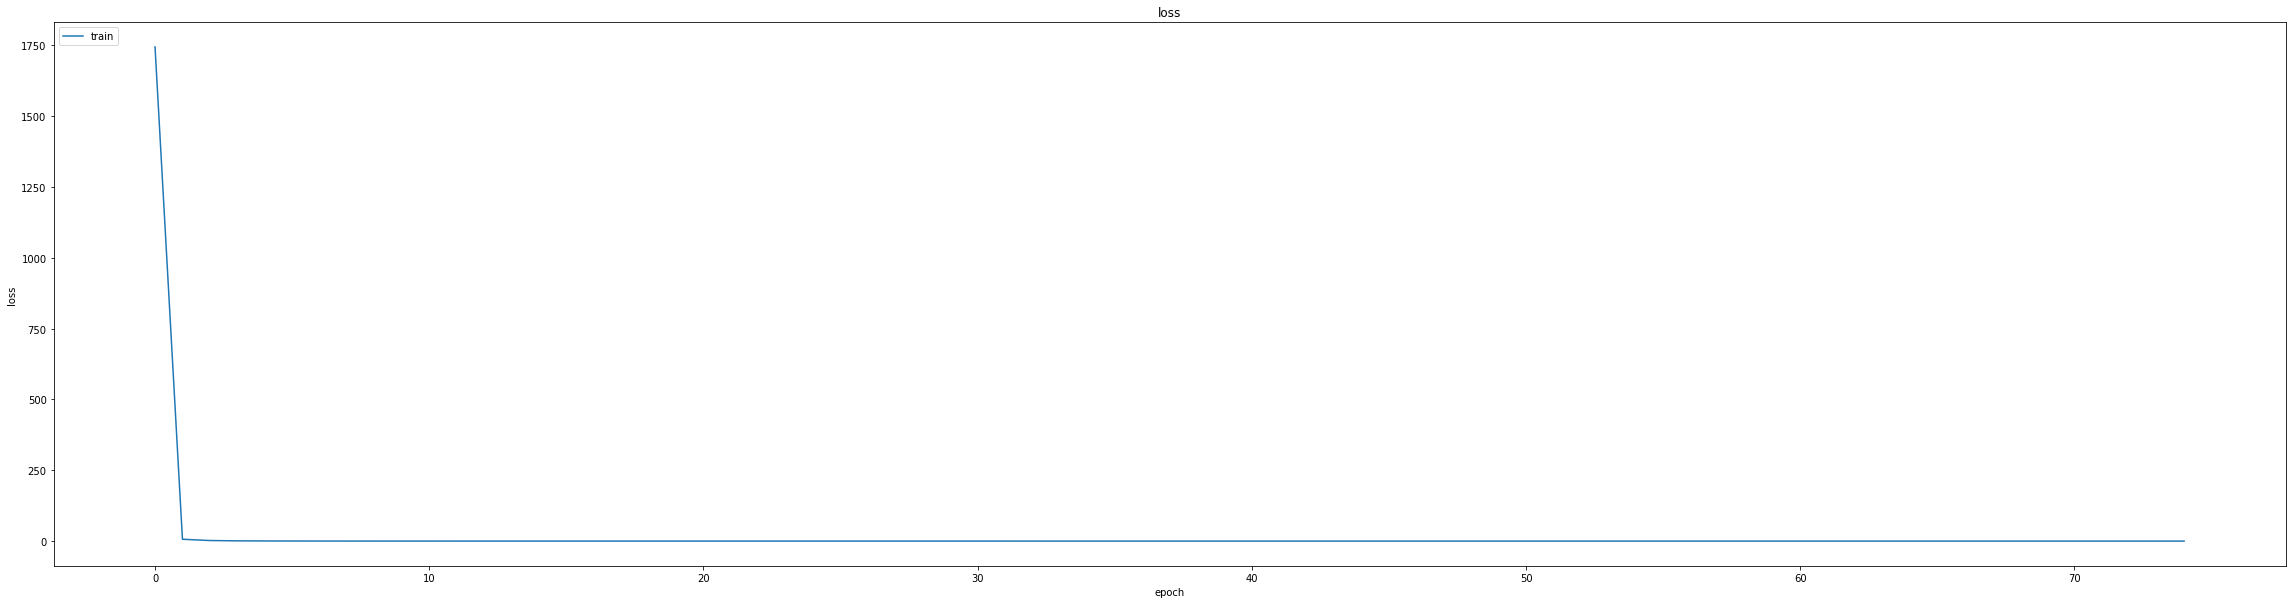

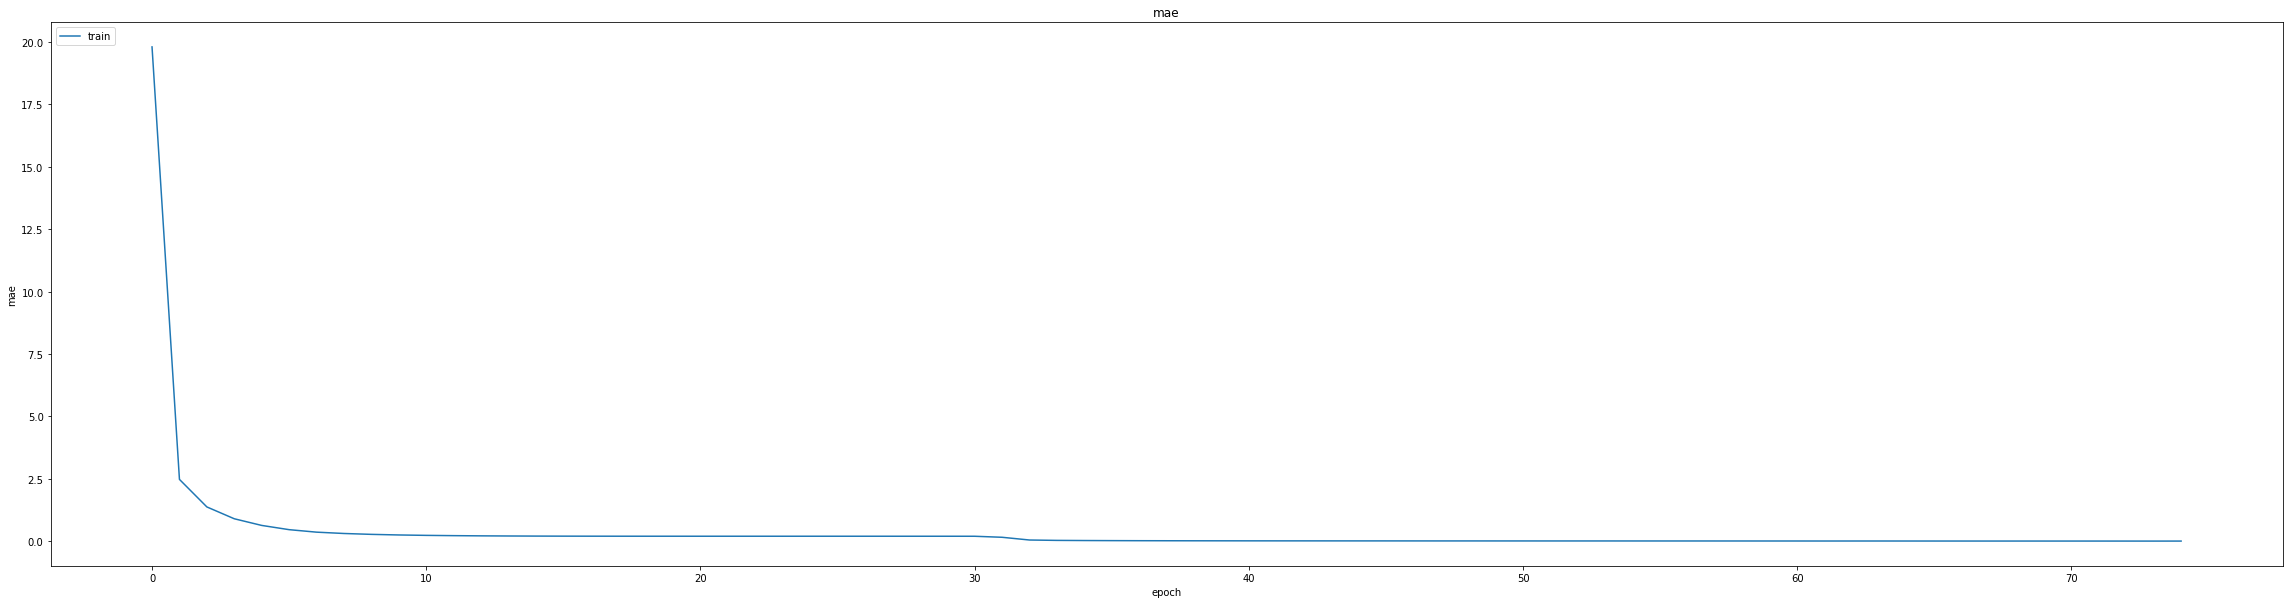

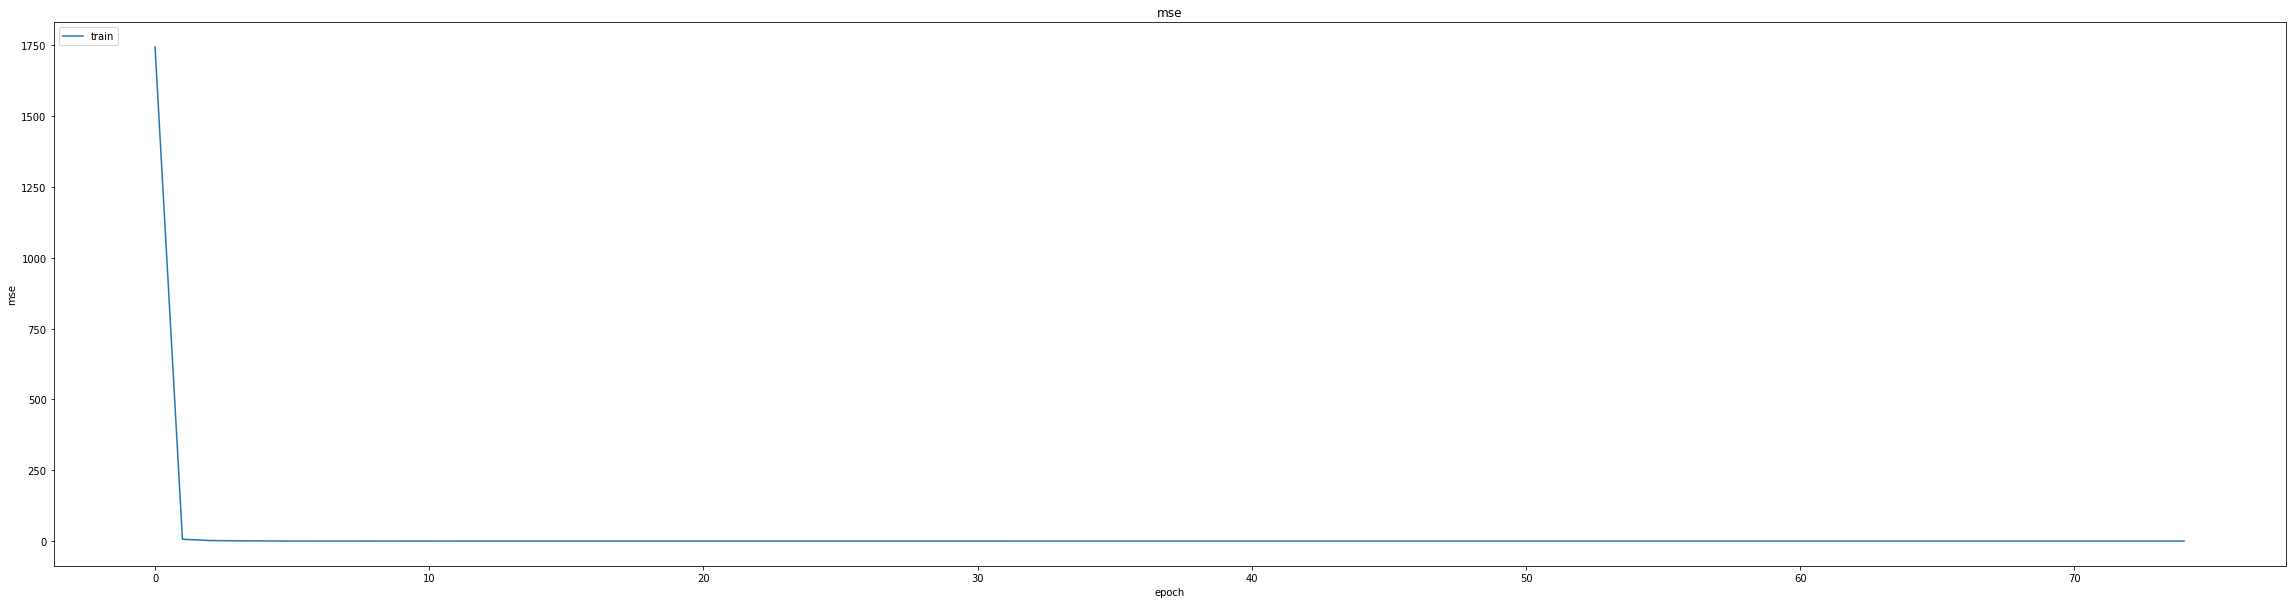

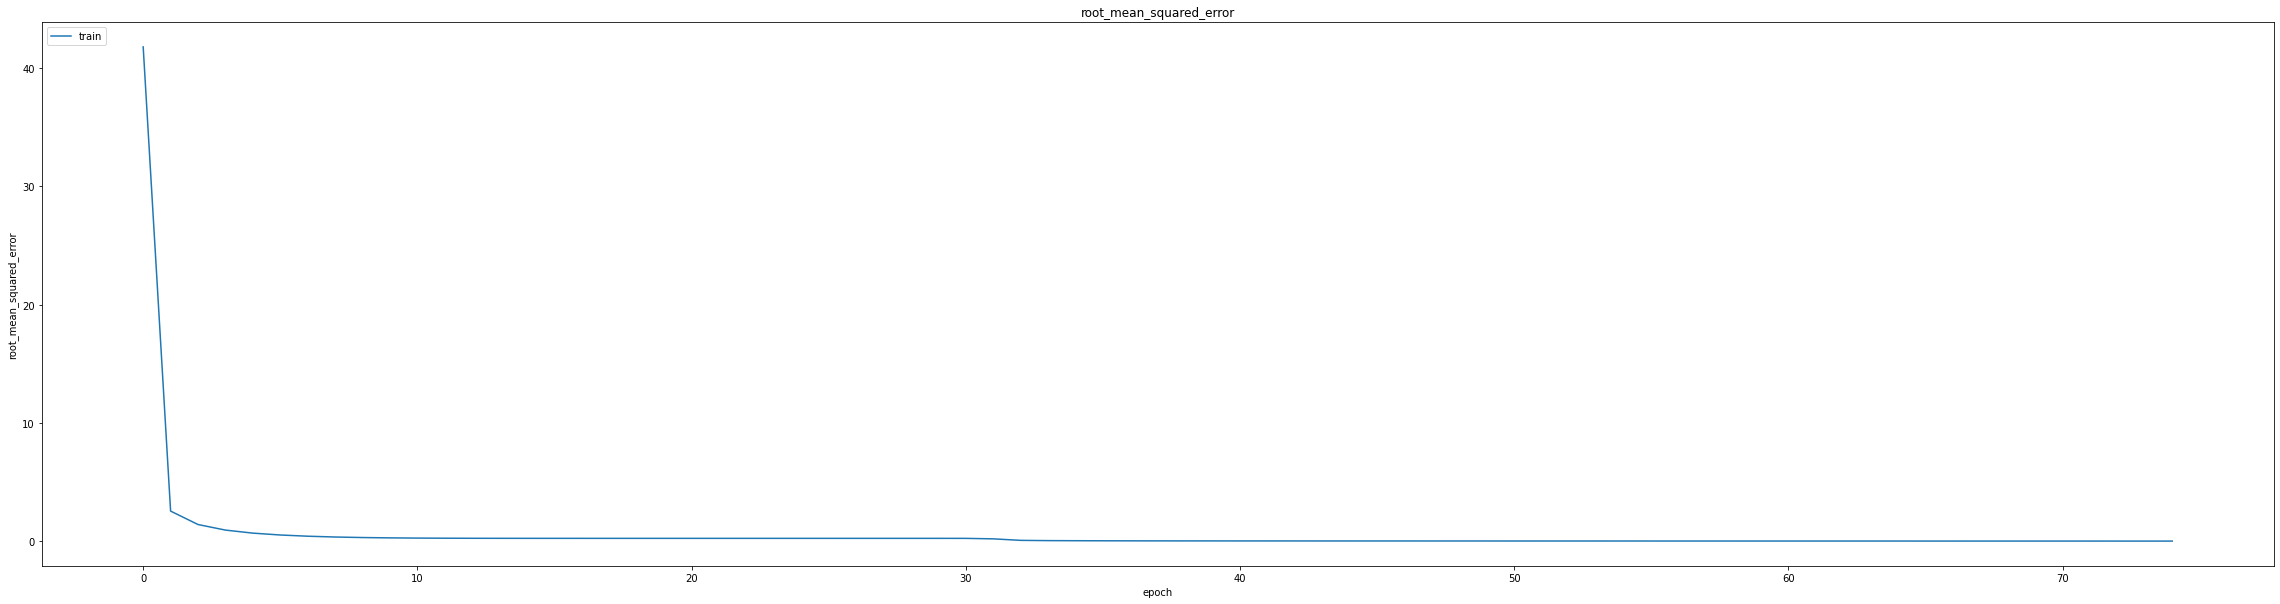

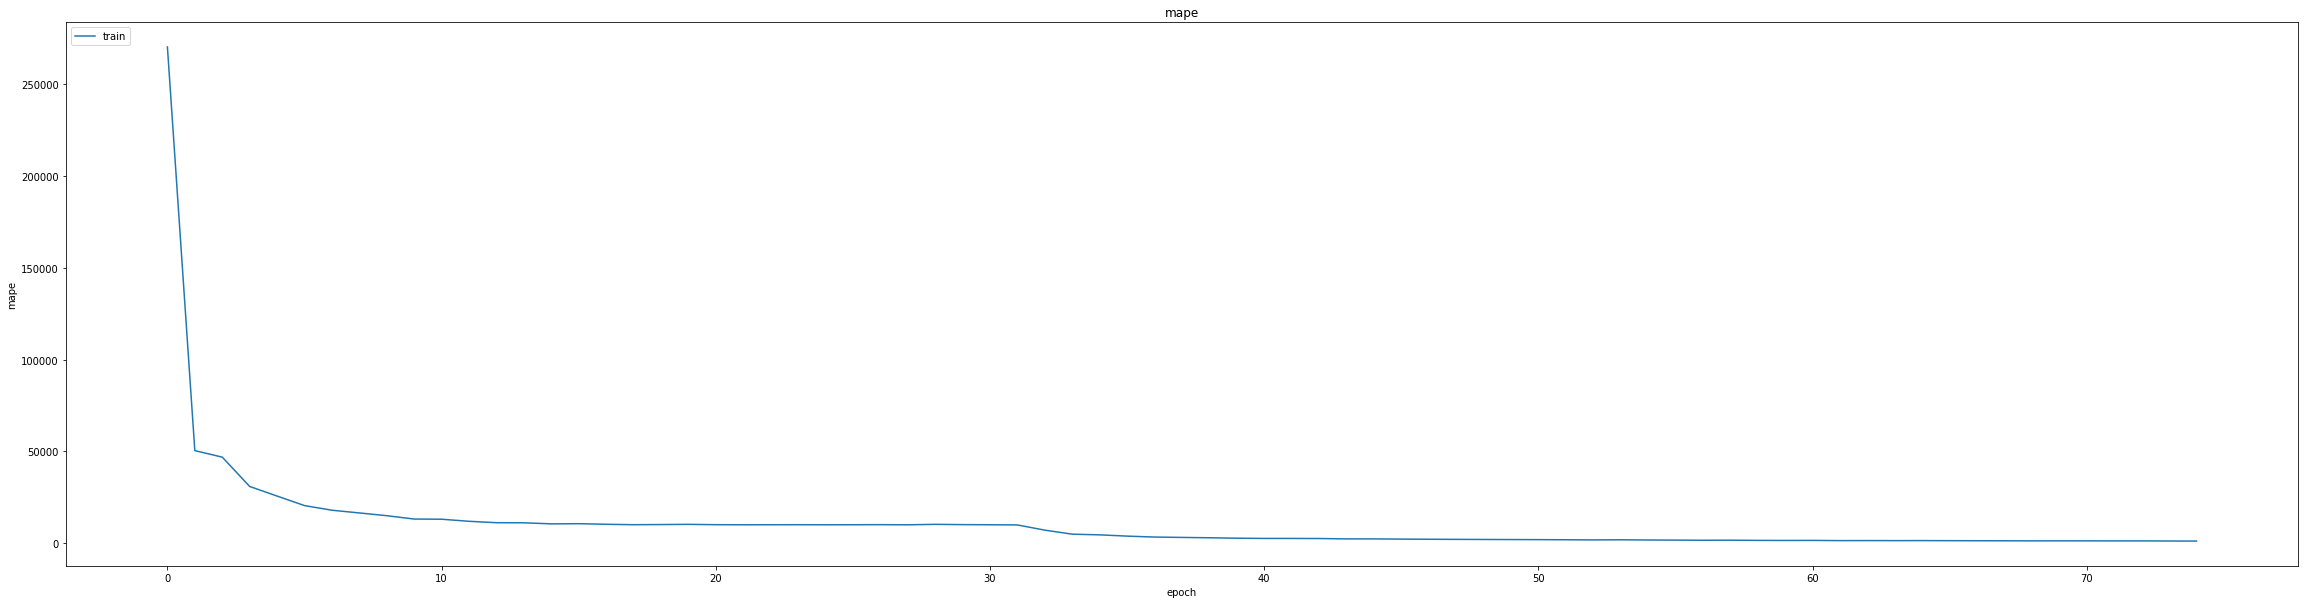

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01274828054010868
0.01274828054010868
0.015999116003513336
464/464 [==============================] - 2s 3ms/step
0.9922172907867913


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
344/348 [============================>.] - ETA: 0s - loss: 6.3441e-04 - mae: 0.0138 - mse: 6.3441e-04 - root_mean_squared_error: 0.0252 - mape: 1278.5011
Epoch 1: val_mse did not improve from 0.00026
348/348 [==============================] - 8s 13ms/step - loss: 6.2901e-04 - mae: 0.0138 - mse: 6.2901e-04 - root_mean_squared_error: 0.0251 - mape: 1264.9440 - val_loss: 4.3832e-04 - val_mae: 0.0180 - val_mse: 4.3832e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3802.5972 - lr: 0.0010
Epoch 2/25
343/348 [============================>.] - ETA: 0s - loss: 1.2243e-04 - mae: 0.0083 - mse: 1.2243e-04 - root_mean_squared_error: 0.0111 - mape: 1258.6876
Epoch 2: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 11ms/step - loss: 1.2271e-04 - mae: 0.0083 - mse: 1.2271e-04 - root_mean_squared_error: 0.0111 - mape: 1241.7393 - val_loss: 5.3258e-04 - val_mae: 0.0207 - val_mse: 5.3258e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 3665.2495 -

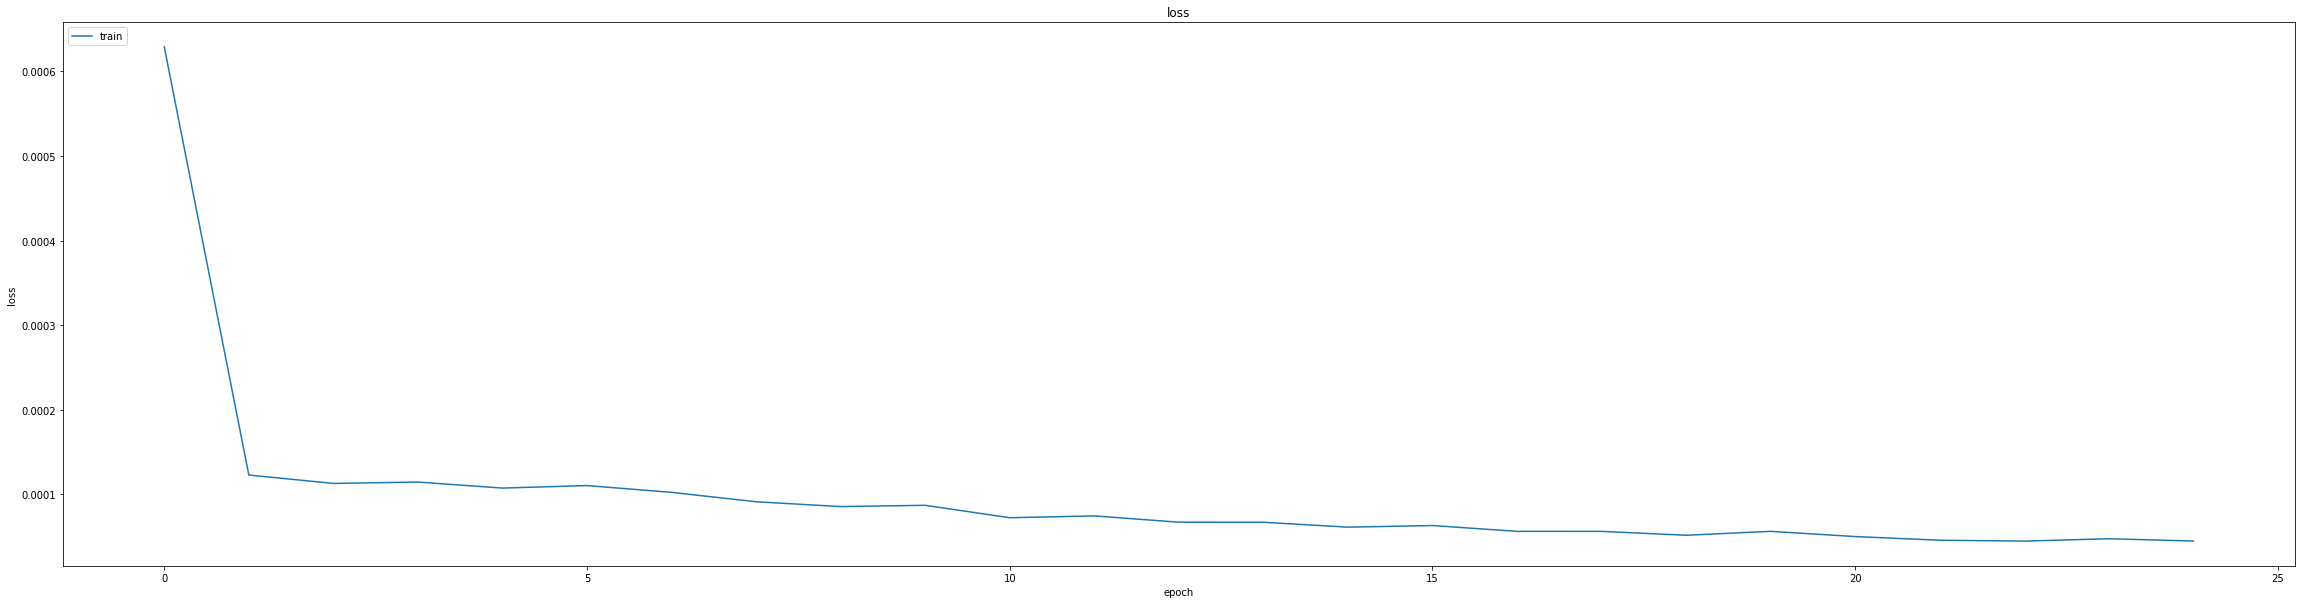

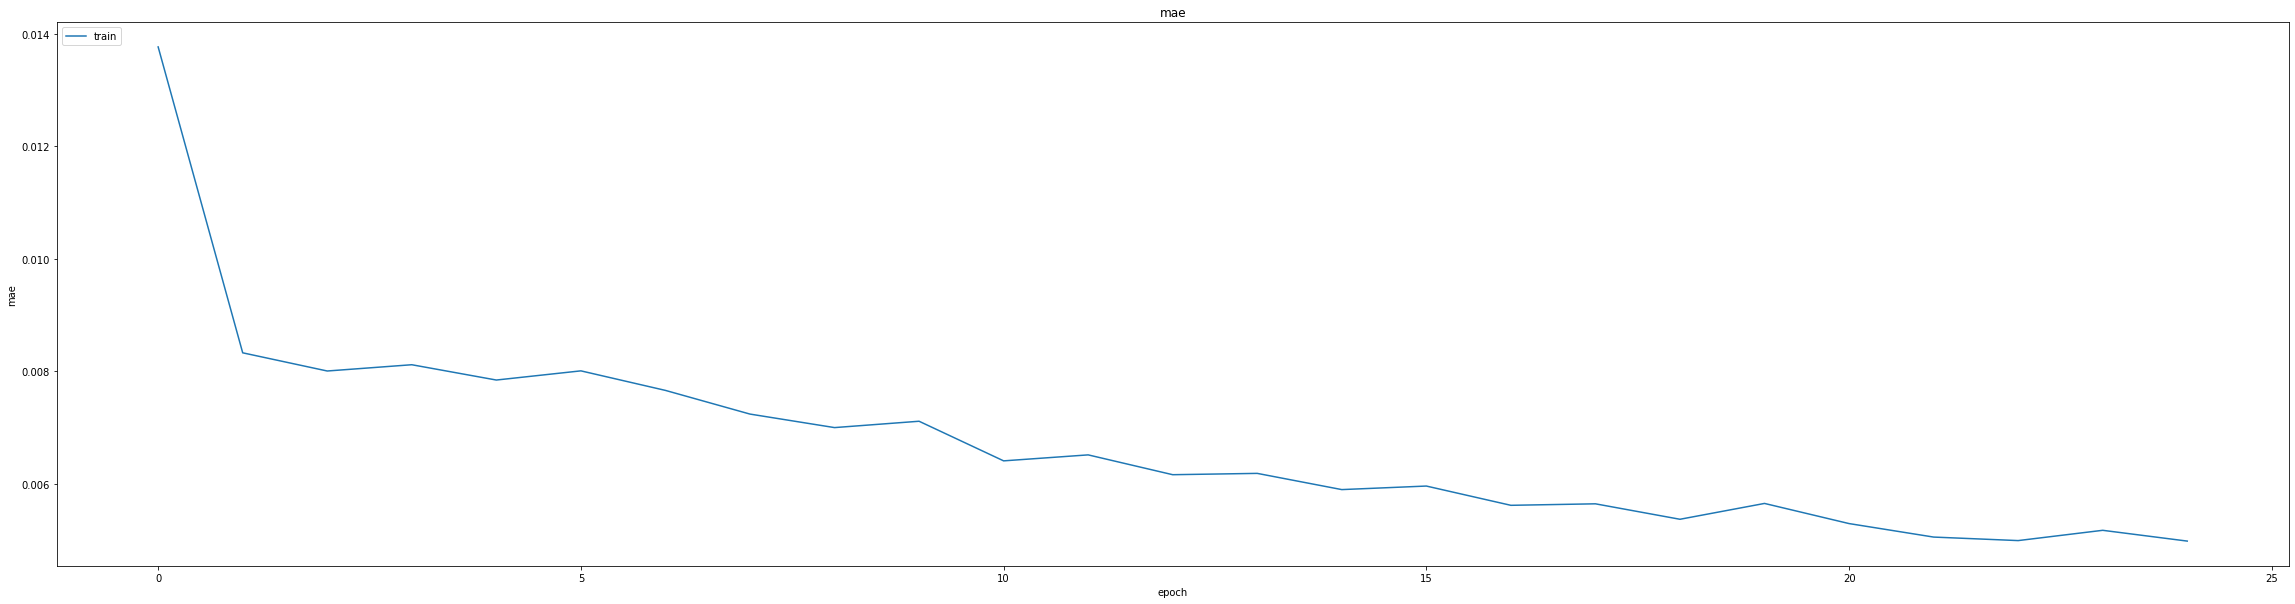

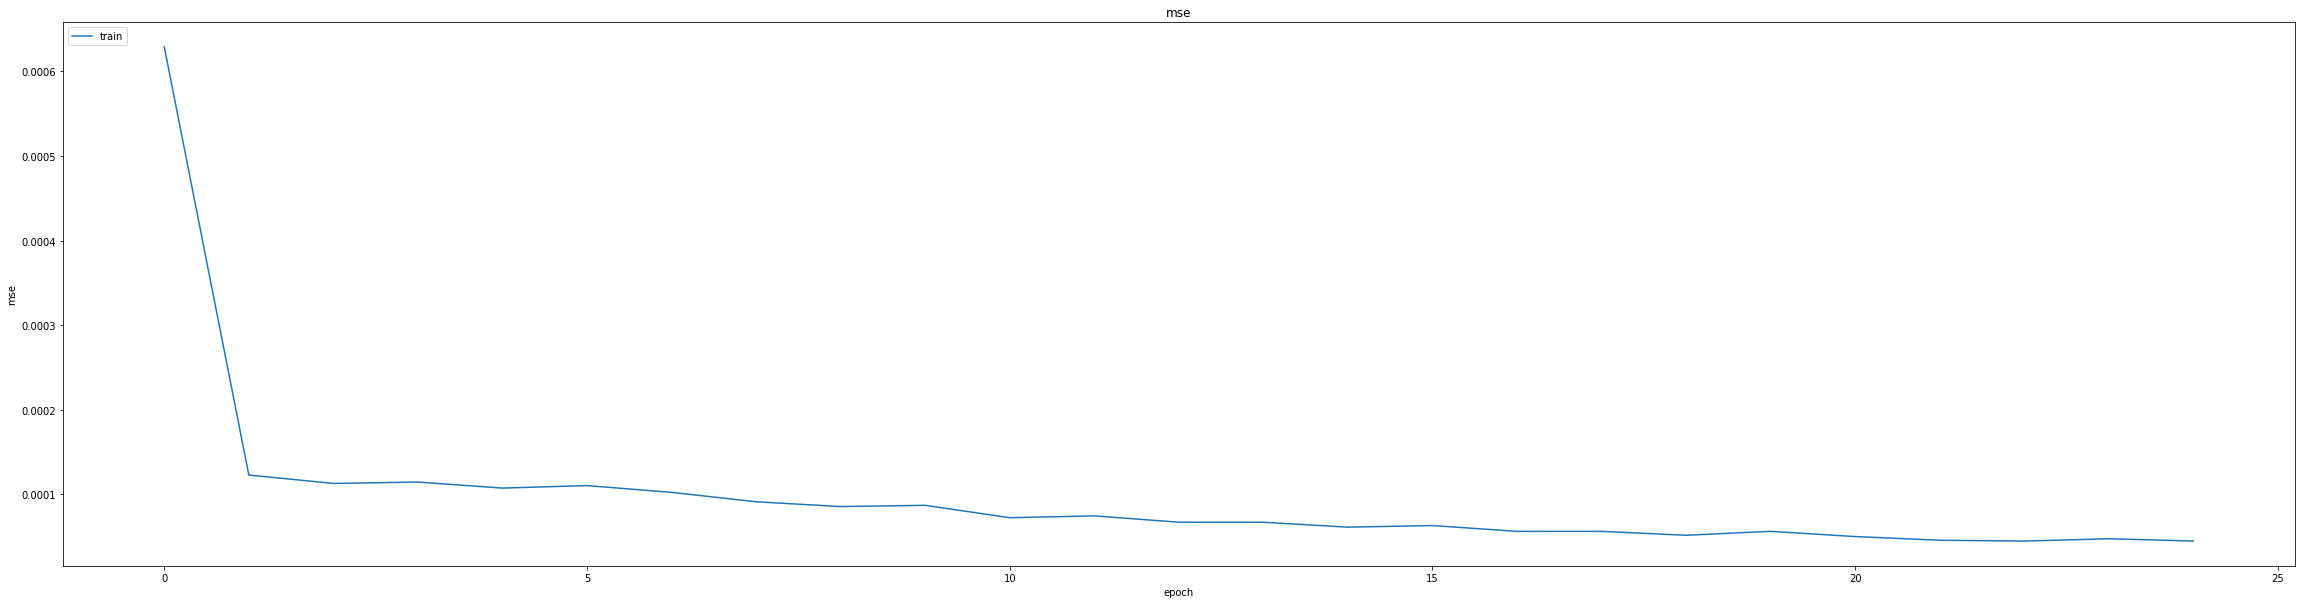

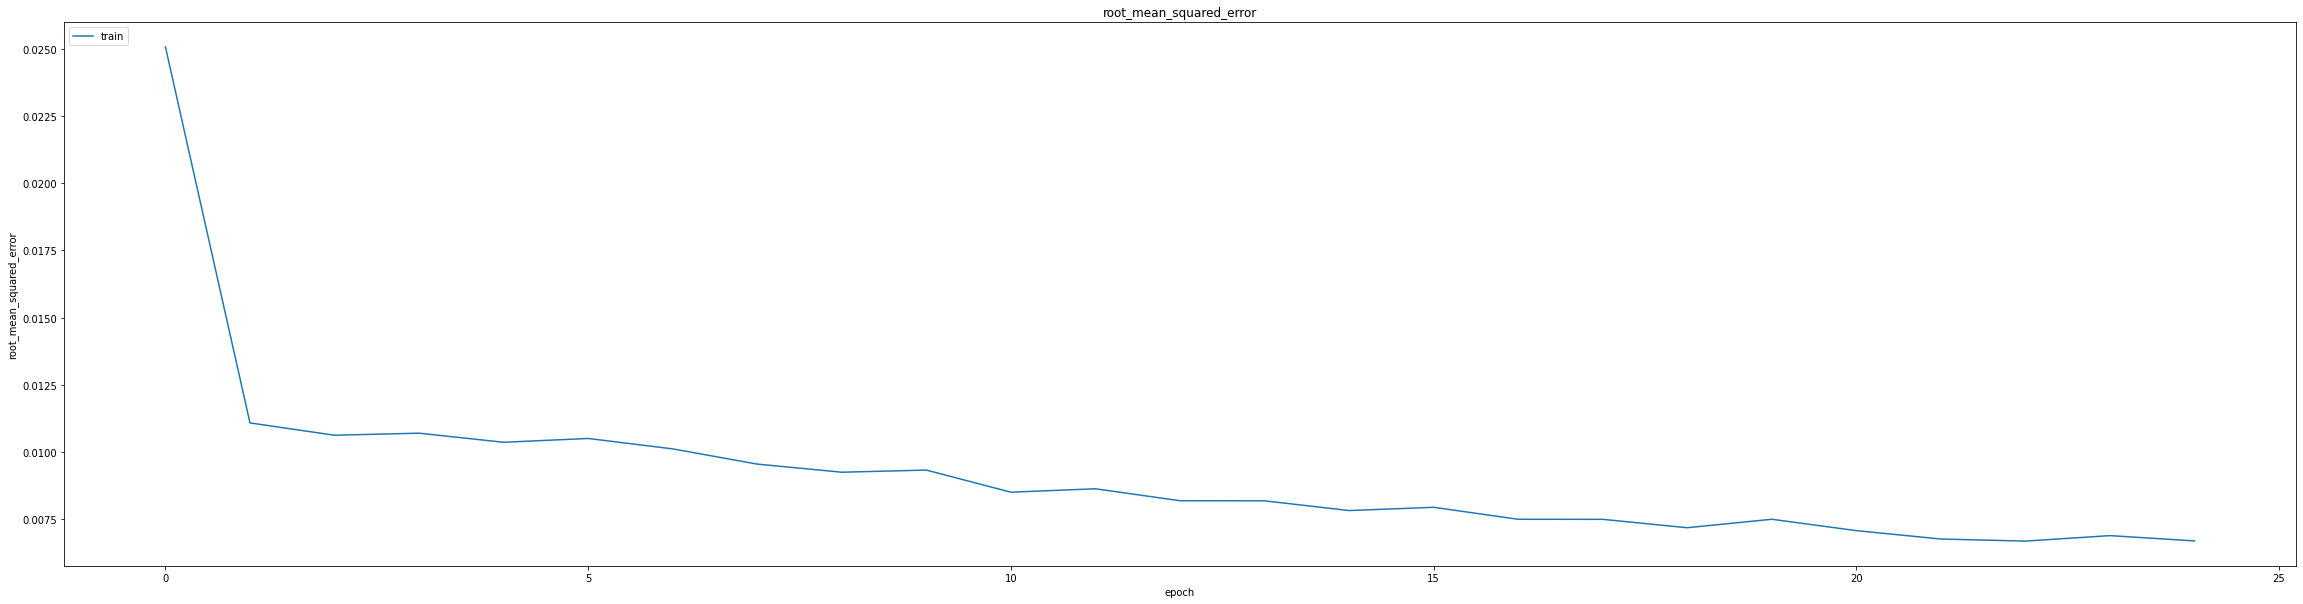

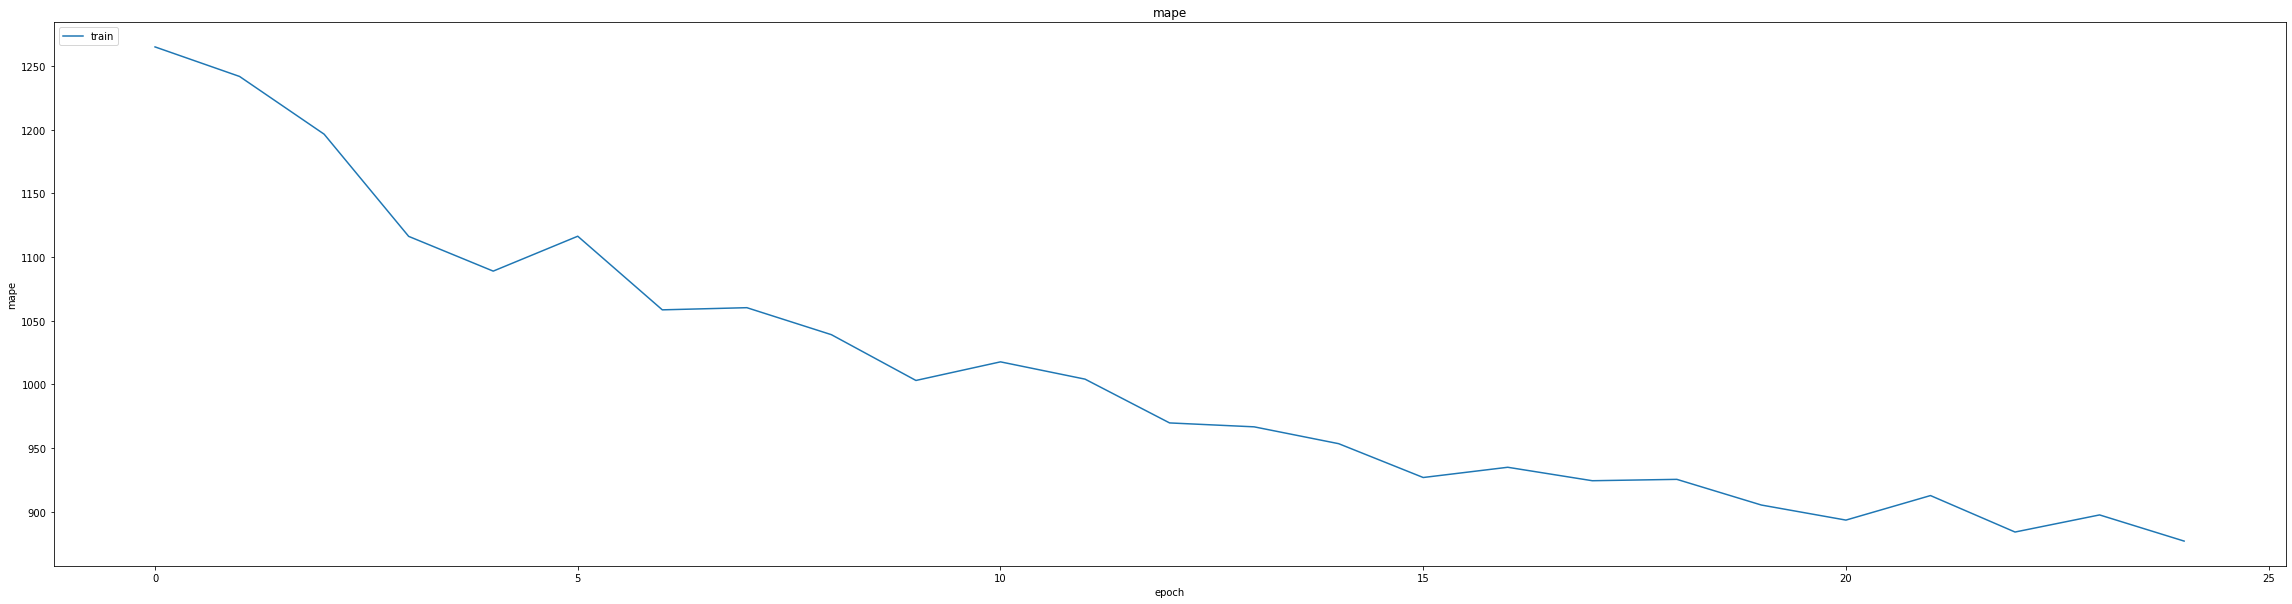

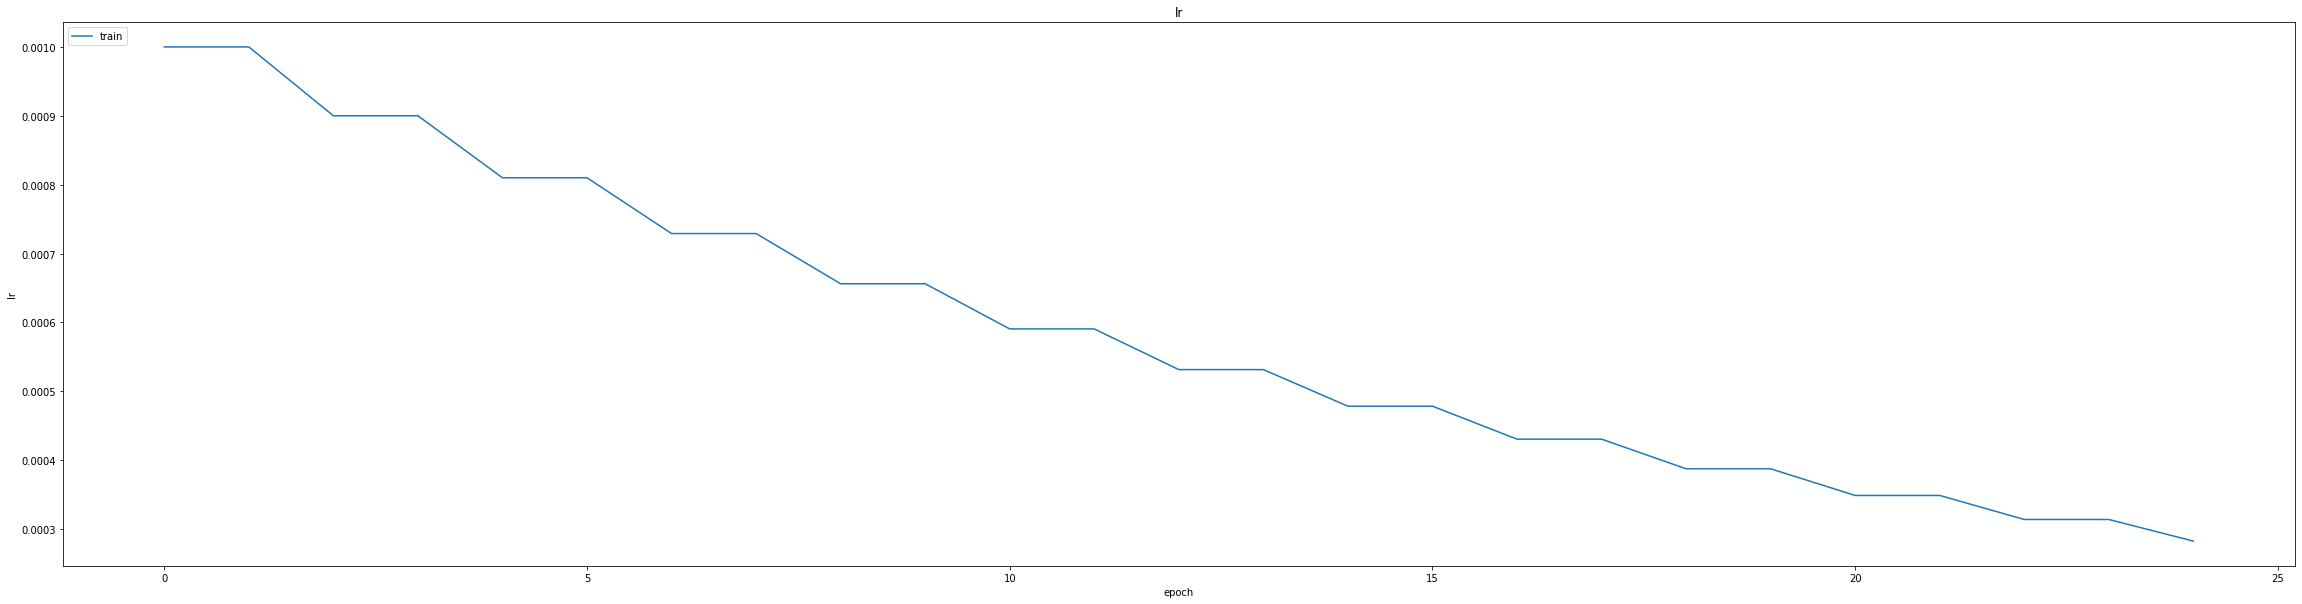

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.017767054960131645
0.017767054960131645
0.018850507214665413
464/464 [==============================] - 2s 4ms/step
0.9857683361594332


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


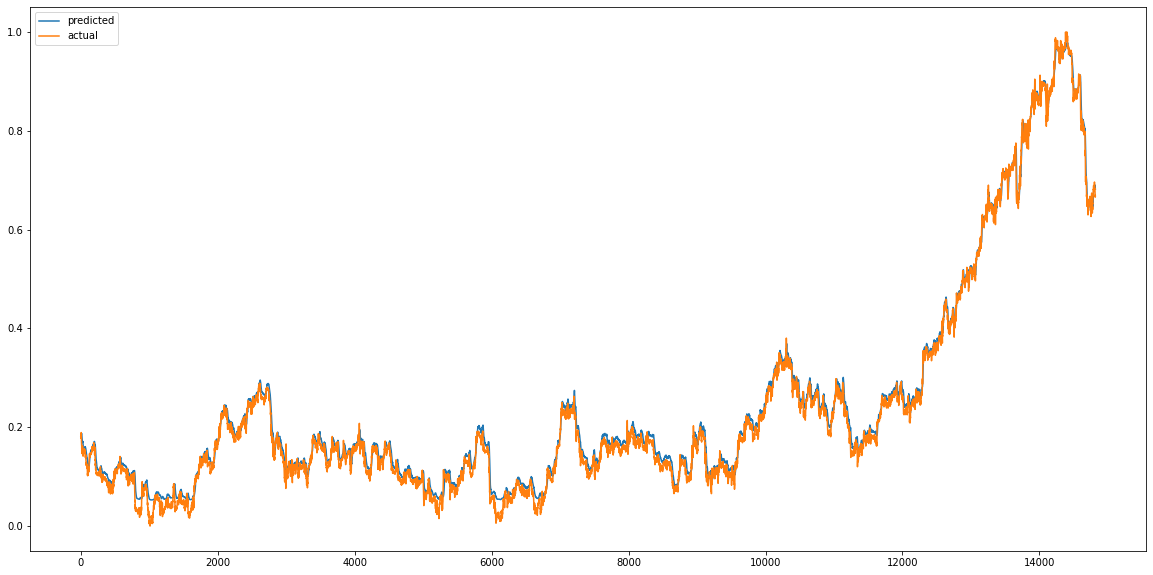

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


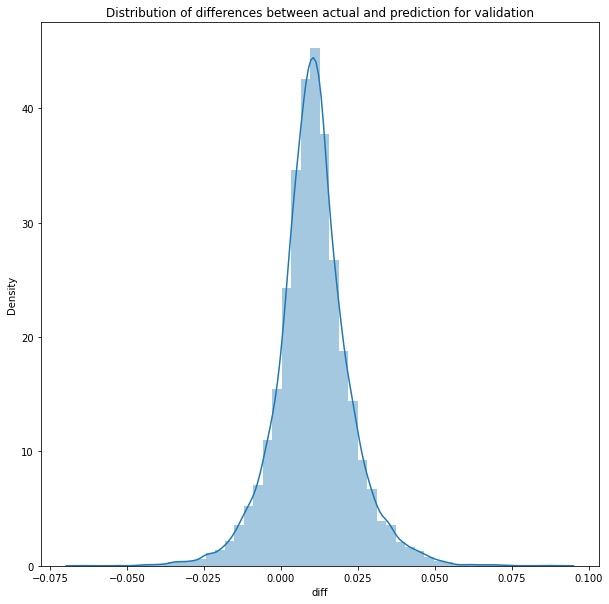

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


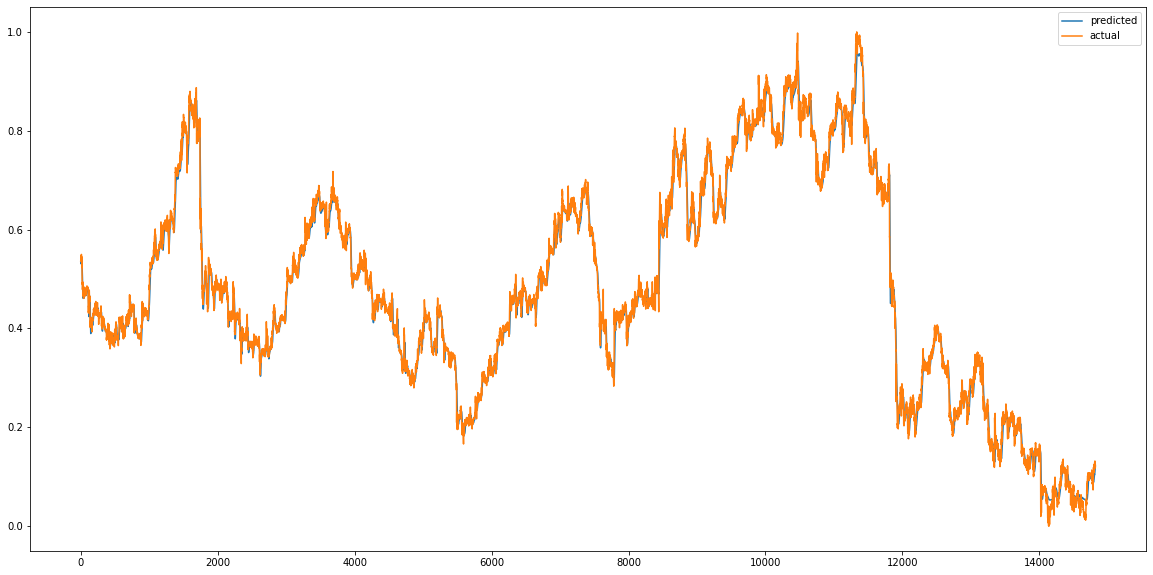

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


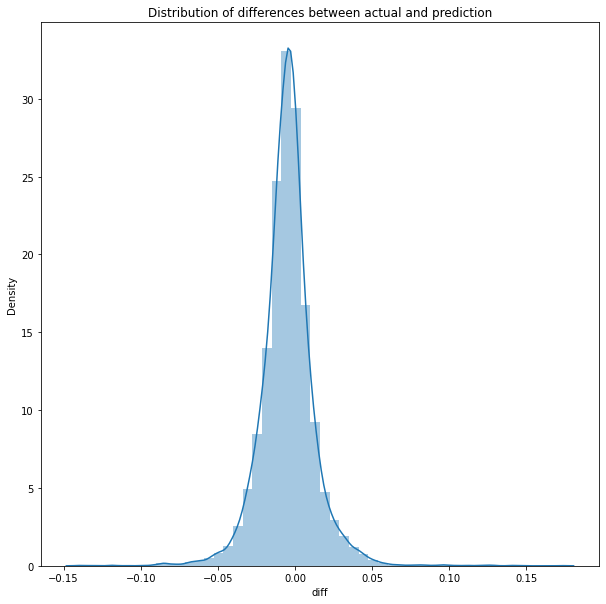

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00032812332821370544
RMSE :  0.018114174786992242
MAE :  0.012759163926695351
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.993242046037257


count    14819.000000
mean        -0.004835
std          0.017457
min         -0.140621
25%         -0.013248
50%         -0.004726
75%          0.003298
max          0.173075
Name: diff, dtype: float64